In [1]:
import pandas as pd
import numpy as np

In [2]:
#use csv with already preprocessed features (scaling, differnecing etc needed)
df = pd.read_csv("Data_Prep.csv", index_col=0)

In [3]:
df.reset_index() [["index", "Total_Heat"]]

,index,Total_Heat
0,2008-01-01 00:00:00+00:00,98086.0
1,2008-01-01 01:00:00+00:00,100454.0
2,2008-01-01 02:00:00+00:00,107183.0
3,2008-01-01 03:00:00+00:00,120688.0
4,2008-01-01 04:00:00+00:00,158569.0
...,...,...
61363,2014-12-31 19:00:00+00:00,153908.0
61364,2014-12-31 20:00:00+00:00,139544.0
61365,2014-12-31 21:00:00+00:00,114048.0
61366,2014-12-31 22:00:00+00:00,71690.5


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Preprocessing for Prophet
my_df = df.reset_index() [["index", "Total_Heat"]]
my_df.columns = ["ds", "y"]
my_df.ds = pd.to_datetime(my_df.ds).dt.tz_convert(None)

In [6]:
my_df[my_df.ds == "2013-01-01 00:00:00"]

,ds,y
43848,2013-01-01,58397.0


In [7]:
my_df[my_df.ds == "2014-01-01 00:00:00"]

,ds,y
52608,2014-01-01,76671.0


In [8]:
df_scaler = MinMaxScaler()
my_df.y = pd.DataFrame(df_scaler.fit_transform(my_df[["y"]]), columns=["y"])


In [9]:
# Hyperparameter
train_days = 30
forecast_days = 2

In [10]:
# creating two seperate lists with a function

def create_X_y(data_df: pd.DataFrame, train_days:int, forecast_days:int):
    """"""
    X_list = []
    y_list = []

    for i in range(train_days*24, len(data_df)-forecast_days*24, 24):
        X_list.append(data_df.iloc[i-train_days*24:i])
        y_list.append(data_df[i:i+forecast_days*24])
    
    return X_list, y_list
    

In [13]:
# creating two seperate lists with a function

def create_X_y_forLastDayBaseline(data_df: pd.DataFrame, train_days:int, forecast_days:int):
    """"""
    X_list = []
    y_list = []

    for i in range(train_days*24, len(data_df)-forecast_days*24, 24):
        X_list.append(data_df.iloc[i-train_days*24:i])
        y_list.append(data_df[i:i+forecast_days*24])
    
    return X_list, y_list
    

In [11]:
my_df.iloc[720-train_days*24:720,:]

,ds,y
0,2008-01-01 00:00:00,0.362881
1,2008-01-01 01:00:00,0.371961
2,2008-01-01 02:00:00,0.397763
3,2008-01-01 03:00:00,0.449547
4,2008-01-01 04:00:00,0.594798
...,...,...
715,2008-01-30 19:00:00,0.463040
716,2008-01-30 20:00:00,0.417460
717,2008-01-30 21:00:00,0.325592
718,2008-01-30 22:00:00,0.263363


In [12]:
X_list, y_list = create_X_y(my_df[["ds", "y"]], train_days, forecast_days)

In [173]:
X_list[0]

,ds,y
0,2008-01-01 00:00:00,0.362881
1,2008-01-01 01:00:00,0.371961
2,2008-01-01 02:00:00,0.397763
3,2008-01-01 03:00:00,0.449547
4,2008-01-01 04:00:00,0.594798
...,...,...
715,2008-01-30 19:00:00,0.463040
716,2008-01-30 20:00:00,0.417460
717,2008-01-30 21:00:00,0.325592
718,2008-01-30 22:00:00,0.263363


In [174]:
y_list[0]

,ds,y
720,2008-01-31 00:00:00,0.285139
721,2008-01-31 01:00:00,0.292455
722,2008-01-31 02:00:00,0.315806
723,2008-01-31 03:00:00,0.365263
724,2008-01-31 04:00:00,0.497795
725,2008-01-31 05:00:00,0.590339
726,2008-01-31 06:00:00,0.574319
727,2008-01-31 07:00:00,0.561485
728,2008-01-31 08:00:00,0.539548
729,2008-01-31 09:00:00,0.514322


pip install fbprophet

In [175]:
from prophet import Prophet
m = Prophet()

In [203]:
43848/24, 52608/24

(1827.0, 2192.0)

In [201]:
X_list[int(43848/24)]

,ds,y
43848,2013-01-01 00:00:00,0.210697
43849,2013-01-01 01:00:00,0.215839
43850,2013-01-01 02:00:00,0.239049
43851,2013-01-01 03:00:00,0.289978
43852,2013-01-01 04:00:00,0.396022
...,...,...
44563,2013-01-30 19:00:00,0.334725
44564,2013-01-30 20:00:00,0.300093
44565,2013-01-30 21:00:00,0.225832
44566,2013-01-30 22:00:00,0.174914


In [180]:
def model_test(
    holidays, 
    weekly_seasonality, 
    add_daily,
    changepoint_prior_scale, 
    holidays_prior_scale, 
    month_fourier):

    mse_list = []
    for i in range(10):
      m4 = Prophet(
          weekly_seasonality=weekly_seasonality,
          changepoint_prior_scale=changepoint_prior_scale, 
          holidays_prior_scale=holidays_prior_scale)

      if holidays: 
          m4.add_country_holidays(country_name='DE')
      
      if add_daily:    
          m4.add_seasonality(
              name='daily', 
              period=24, 
              fourier_order=month_fourier)
    

      m4.fit(X_list[i])
      future = m4.make_future_dataframe(periods=len(y_list[i]), freq='H')
      forecast = m4.predict(future)
      mse = ((forecast.iloc[-48:,-1].values - y_list[i]['y'].values)**2).mean()
      mse_list.append(mse)

    return np.array(mse_list).mean()

# Setting the grid
holidays_opt = [True, False]
weekly_seas = [ 5, 10, 30, 50]
add_daily = [True, False]
changepoint_prior_scale = [0.1, 0.3, 0.5]
holidays_prior_scale = [0.1, 0.3, 0.5]
month_fourier = [5, 10, 30, 50]

# Looping through the grid
grid_results = []
for h in holidays_opt:
  for w in weekly_seas:
    for d in add_daily:
      for c in changepoint_prior_scale:
        for hp in holidays_prior_scale:
          for mf in month_fourier:
            mse=model_test(h,w,d,c,hp,mf)
            print([h,w,d, c,hp,mf,mse])
            grid_results.append([h,w,d, c,hp,mf,mse])

# adding it all to a dataframe and extract the best model
benchmark = pd.DataFrame(grid_results)
benchmark = benchmark.sort_values(8, ascending=False)

h, w,ys, m, r, c,hp,mf,r2 = list(benchmark.iloc[0,:])


18:43:13 - cmdstanpy - INFO - Chain [1] start processing
18:43:13 - cmdstanpy - INFO - Chain [1] done processing
18:43:14 - cmdstanpy - INFO - Chain [1] start processing
18:43:14 - cmdstanpy - INFO - Chain [1] done processing
18:43:14 - cmdstanpy - INFO - Chain [1] start processing
18:43:15 - cmdstanpy - INFO - Chain [1] done processing
18:43:15 - cmdstanpy - INFO - Chain [1] start processing
18:43:16 - cmdstanpy - INFO - Chain [1] done processing
18:43:16 - cmdstanpy - INFO - Chain [1] start processing
18:43:16 - cmdstanpy - INFO - Chain [1] done processing
18:43:17 - cmdstanpy - INFO - Chain [1] start processing
18:43:17 - cmdstanpy - INFO - Chain [1] done processing
18:43:18 - cmdstanpy - INFO - Chain [1] start processing
18:43:18 - cmdstanpy - INFO - Chain [1] done processing
18:43:19 - cmdstanpy - INFO - Chain [1] start processing
18:43:19 - cmdstanpy - INFO - Chain [1] done processing
18:43:19 - cmdstanpy - INFO - Chain [1] start processing
18:43:19 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.1, 5, 0.026757058589824134]


18:43:21 - cmdstanpy - INFO - Chain [1] start processing
18:43:21 - cmdstanpy - INFO - Chain [1] done processing
18:43:22 - cmdstanpy - INFO - Chain [1] start processing
18:43:22 - cmdstanpy - INFO - Chain [1] done processing
18:43:23 - cmdstanpy - INFO - Chain [1] start processing
18:43:23 - cmdstanpy - INFO - Chain [1] done processing
18:43:23 - cmdstanpy - INFO - Chain [1] start processing
18:43:24 - cmdstanpy - INFO - Chain [1] done processing
18:43:24 - cmdstanpy - INFO - Chain [1] start processing
18:43:24 - cmdstanpy - INFO - Chain [1] done processing
18:43:25 - cmdstanpy - INFO - Chain [1] start processing
18:43:25 - cmdstanpy - INFO - Chain [1] done processing
18:43:26 - cmdstanpy - INFO - Chain [1] start processing
18:43:26 - cmdstanpy - INFO - Chain [1] done processing
18:43:27 - cmdstanpy - INFO - Chain [1] start processing
18:43:27 - cmdstanpy - INFO - Chain [1] done processing
18:43:28 - cmdstanpy - INFO - Chain [1] start processing
18:43:28 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.1, 10, 0.034152838836556045]


18:43:29 - cmdstanpy - INFO - Chain [1] start processing
18:43:30 - cmdstanpy - INFO - Chain [1] done processing
18:43:30 - cmdstanpy - INFO - Chain [1] start processing
18:43:30 - cmdstanpy - INFO - Chain [1] done processing
18:43:31 - cmdstanpy - INFO - Chain [1] start processing
18:43:31 - cmdstanpy - INFO - Chain [1] done processing
18:43:32 - cmdstanpy - INFO - Chain [1] start processing
18:43:32 - cmdstanpy - INFO - Chain [1] done processing
18:43:33 - cmdstanpy - INFO - Chain [1] start processing
18:43:33 - cmdstanpy - INFO - Chain [1] done processing
18:43:34 - cmdstanpy - INFO - Chain [1] start processing
18:43:34 - cmdstanpy - INFO - Chain [1] done processing
18:43:34 - cmdstanpy - INFO - Chain [1] start processing
18:43:35 - cmdstanpy - INFO - Chain [1] done processing
18:43:35 - cmdstanpy - INFO - Chain [1] start processing
18:43:35 - cmdstanpy - INFO - Chain [1] done processing
18:43:36 - cmdstanpy - INFO - Chain [1] start processing
18:43:36 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.1, 30, 0.026776835299578187]


18:43:38 - cmdstanpy - INFO - Chain [1] start processing
18:43:38 - cmdstanpy - INFO - Chain [1] done processing
18:43:39 - cmdstanpy - INFO - Chain [1] start processing
18:43:39 - cmdstanpy - INFO - Chain [1] done processing
18:43:40 - cmdstanpy - INFO - Chain [1] start processing
18:43:40 - cmdstanpy - INFO - Chain [1] done processing
18:43:40 - cmdstanpy - INFO - Chain [1] start processing
18:43:40 - cmdstanpy - INFO - Chain [1] done processing
18:43:41 - cmdstanpy - INFO - Chain [1] start processing
18:43:42 - cmdstanpy - INFO - Chain [1] done processing
18:43:42 - cmdstanpy - INFO - Chain [1] start processing
18:43:42 - cmdstanpy - INFO - Chain [1] done processing
18:43:43 - cmdstanpy - INFO - Chain [1] start processing
18:43:43 - cmdstanpy - INFO - Chain [1] done processing
18:43:44 - cmdstanpy - INFO - Chain [1] start processing
18:43:44 - cmdstanpy - INFO - Chain [1] done processing
18:43:45 - cmdstanpy - INFO - Chain [1] start processing
18:43:45 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.1, 50, 0.024043809557703015]


18:43:46 - cmdstanpy - INFO - Chain [1] start processing
18:43:47 - cmdstanpy - INFO - Chain [1] done processing
18:43:47 - cmdstanpy - INFO - Chain [1] start processing
18:43:47 - cmdstanpy - INFO - Chain [1] done processing
18:43:48 - cmdstanpy - INFO - Chain [1] start processing
18:43:48 - cmdstanpy - INFO - Chain [1] done processing
18:43:48 - cmdstanpy - INFO - Chain [1] start processing
18:43:48 - cmdstanpy - INFO - Chain [1] done processing
18:43:49 - cmdstanpy - INFO - Chain [1] start processing
18:43:49 - cmdstanpy - INFO - Chain [1] done processing
18:43:50 - cmdstanpy - INFO - Chain [1] start processing
18:43:50 - cmdstanpy - INFO - Chain [1] done processing
18:43:50 - cmdstanpy - INFO - Chain [1] start processing
18:43:50 - cmdstanpy - INFO - Chain [1] done processing
18:43:51 - cmdstanpy - INFO - Chain [1] start processing
18:43:51 - cmdstanpy - INFO - Chain [1] done processing
18:43:51 - cmdstanpy - INFO - Chain [1] start processing
18:43:51 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.3, 5, 0.026601585566322562]


18:43:53 - cmdstanpy - INFO - Chain [1] start processing
18:43:53 - cmdstanpy - INFO - Chain [1] done processing
18:43:53 - cmdstanpy - INFO - Chain [1] start processing
18:43:53 - cmdstanpy - INFO - Chain [1] done processing
18:43:54 - cmdstanpy - INFO - Chain [1] start processing
18:43:54 - cmdstanpy - INFO - Chain [1] done processing
18:43:55 - cmdstanpy - INFO - Chain [1] start processing
18:43:55 - cmdstanpy - INFO - Chain [1] done processing
18:43:55 - cmdstanpy - INFO - Chain [1] start processing
18:43:55 - cmdstanpy - INFO - Chain [1] done processing
18:43:56 - cmdstanpy - INFO - Chain [1] start processing
18:43:56 - cmdstanpy - INFO - Chain [1] done processing
18:43:56 - cmdstanpy - INFO - Chain [1] start processing
18:43:57 - cmdstanpy - INFO - Chain [1] done processing
18:43:57 - cmdstanpy - INFO - Chain [1] start processing
18:43:57 - cmdstanpy - INFO - Chain [1] done processing
18:43:58 - cmdstanpy - INFO - Chain [1] start processing
18:43:58 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.3, 10, 0.03452578966510505]


18:43:59 - cmdstanpy - INFO - Chain [1] start processing
18:43:59 - cmdstanpy - INFO - Chain [1] done processing
18:44:00 - cmdstanpy - INFO - Chain [1] start processing
18:44:00 - cmdstanpy - INFO - Chain [1] done processing
18:44:01 - cmdstanpy - INFO - Chain [1] start processing
18:44:01 - cmdstanpy - INFO - Chain [1] done processing
18:44:01 - cmdstanpy - INFO - Chain [1] start processing
18:44:01 - cmdstanpy - INFO - Chain [1] done processing
18:44:02 - cmdstanpy - INFO - Chain [1] start processing
18:44:02 - cmdstanpy - INFO - Chain [1] done processing
18:44:03 - cmdstanpy - INFO - Chain [1] start processing
18:44:03 - cmdstanpy - INFO - Chain [1] done processing
18:44:04 - cmdstanpy - INFO - Chain [1] start processing
18:44:04 - cmdstanpy - INFO - Chain [1] done processing
18:44:05 - cmdstanpy - INFO - Chain [1] start processing
18:44:05 - cmdstanpy - INFO - Chain [1] done processing
18:44:05 - cmdstanpy - INFO - Chain [1] start processing
18:44:05 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.3, 30, 0.026819985573178586]


18:44:07 - cmdstanpy - INFO - Chain [1] start processing
18:44:07 - cmdstanpy - INFO - Chain [1] done processing
18:44:08 - cmdstanpy - INFO - Chain [1] start processing
18:44:08 - cmdstanpy - INFO - Chain [1] done processing
18:44:09 - cmdstanpy - INFO - Chain [1] start processing
18:44:09 - cmdstanpy - INFO - Chain [1] done processing
18:44:10 - cmdstanpy - INFO - Chain [1] start processing
18:44:10 - cmdstanpy - INFO - Chain [1] done processing
18:44:10 - cmdstanpy - INFO - Chain [1] start processing
18:44:11 - cmdstanpy - INFO - Chain [1] done processing
18:44:11 - cmdstanpy - INFO - Chain [1] start processing
18:44:11 - cmdstanpy - INFO - Chain [1] done processing
18:44:12 - cmdstanpy - INFO - Chain [1] start processing
18:44:12 - cmdstanpy - INFO - Chain [1] done processing
18:44:14 - cmdstanpy - INFO - Chain [1] start processing
18:44:15 - cmdstanpy - INFO - Chain [1] done processing
18:44:15 - cmdstanpy - INFO - Chain [1] start processing
18:44:16 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.3, 50, 0.024112698104618545]


18:44:17 - cmdstanpy - INFO - Chain [1] start processing
18:44:17 - cmdstanpy - INFO - Chain [1] done processing
18:44:18 - cmdstanpy - INFO - Chain [1] start processing
18:44:18 - cmdstanpy - INFO - Chain [1] done processing
18:44:18 - cmdstanpy - INFO - Chain [1] start processing
18:44:18 - cmdstanpy - INFO - Chain [1] done processing
18:44:19 - cmdstanpy - INFO - Chain [1] start processing
18:44:19 - cmdstanpy - INFO - Chain [1] done processing
18:44:20 - cmdstanpy - INFO - Chain [1] start processing
18:44:20 - cmdstanpy - INFO - Chain [1] done processing
18:44:20 - cmdstanpy - INFO - Chain [1] start processing
18:44:20 - cmdstanpy - INFO - Chain [1] done processing
18:44:21 - cmdstanpy - INFO - Chain [1] start processing
18:44:21 - cmdstanpy - INFO - Chain [1] done processing
18:44:21 - cmdstanpy - INFO - Chain [1] start processing
18:44:21 - cmdstanpy - INFO - Chain [1] done processing
18:44:22 - cmdstanpy - INFO - Chain [1] start processing
18:44:22 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.5, 5, 0.026606867372826616]


18:44:23 - cmdstanpy - INFO - Chain [1] start processing
18:44:24 - cmdstanpy - INFO - Chain [1] done processing
18:44:24 - cmdstanpy - INFO - Chain [1] start processing
18:44:24 - cmdstanpy - INFO - Chain [1] done processing
18:44:25 - cmdstanpy - INFO - Chain [1] start processing
18:44:25 - cmdstanpy - INFO - Chain [1] done processing
18:44:25 - cmdstanpy - INFO - Chain [1] start processing
18:44:26 - cmdstanpy - INFO - Chain [1] done processing
18:44:26 - cmdstanpy - INFO - Chain [1] start processing
18:44:26 - cmdstanpy - INFO - Chain [1] done processing
18:44:27 - cmdstanpy - INFO - Chain [1] start processing
18:44:27 - cmdstanpy - INFO - Chain [1] done processing
18:44:27 - cmdstanpy - INFO - Chain [1] start processing
18:44:28 - cmdstanpy - INFO - Chain [1] done processing
18:44:28 - cmdstanpy - INFO - Chain [1] start processing
18:44:28 - cmdstanpy - INFO - Chain [1] done processing
18:44:29 - cmdstanpy - INFO - Chain [1] start processing
18:44:29 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.5, 10, 0.0346536390792037]


18:44:30 - cmdstanpy - INFO - Chain [1] start processing
18:44:30 - cmdstanpy - INFO - Chain [1] done processing
18:44:31 - cmdstanpy - INFO - Chain [1] start processing
18:44:31 - cmdstanpy - INFO - Chain [1] done processing
18:44:32 - cmdstanpy - INFO - Chain [1] start processing
18:44:32 - cmdstanpy - INFO - Chain [1] done processing
18:44:33 - cmdstanpy - INFO - Chain [1] start processing
18:44:33 - cmdstanpy - INFO - Chain [1] done processing
18:44:34 - cmdstanpy - INFO - Chain [1] start processing
18:44:34 - cmdstanpy - INFO - Chain [1] done processing
18:44:35 - cmdstanpy - INFO - Chain [1] start processing
18:44:35 - cmdstanpy - INFO - Chain [1] done processing
18:44:36 - cmdstanpy - INFO - Chain [1] start processing
18:44:36 - cmdstanpy - INFO - Chain [1] done processing
18:44:37 - cmdstanpy - INFO - Chain [1] start processing
18:44:37 - cmdstanpy - INFO - Chain [1] done processing
18:44:38 - cmdstanpy - INFO - Chain [1] start processing
18:44:38 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.5, 30, 0.026758834414584903]


18:44:40 - cmdstanpy - INFO - Chain [1] start processing
18:44:40 - cmdstanpy - INFO - Chain [1] done processing
18:44:41 - cmdstanpy - INFO - Chain [1] start processing
18:44:42 - cmdstanpy - INFO - Chain [1] done processing
18:44:43 - cmdstanpy - INFO - Chain [1] start processing
18:44:44 - cmdstanpy - INFO - Chain [1] done processing
18:44:44 - cmdstanpy - INFO - Chain [1] start processing
18:44:44 - cmdstanpy - INFO - Chain [1] done processing
18:44:45 - cmdstanpy - INFO - Chain [1] start processing
18:44:45 - cmdstanpy - INFO - Chain [1] done processing
18:44:46 - cmdstanpy - INFO - Chain [1] start processing
18:44:46 - cmdstanpy - INFO - Chain [1] done processing
18:44:47 - cmdstanpy - INFO - Chain [1] start processing
18:44:47 - cmdstanpy - INFO - Chain [1] done processing
18:44:48 - cmdstanpy - INFO - Chain [1] start processing
18:44:48 - cmdstanpy - INFO - Chain [1] done processing
18:44:49 - cmdstanpy - INFO - Chain [1] start processing
18:44:49 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.1, 0.5, 50, 0.024148402077753855]


18:44:51 - cmdstanpy - INFO - Chain [1] start processing
18:44:51 - cmdstanpy - INFO - Chain [1] done processing
18:44:51 - cmdstanpy - INFO - Chain [1] start processing
18:44:51 - cmdstanpy - INFO - Chain [1] done processing
18:44:52 - cmdstanpy - INFO - Chain [1] start processing
18:44:52 - cmdstanpy - INFO - Chain [1] done processing
18:44:53 - cmdstanpy - INFO - Chain [1] start processing
18:44:53 - cmdstanpy - INFO - Chain [1] done processing
18:44:53 - cmdstanpy - INFO - Chain [1] start processing
18:44:53 - cmdstanpy - INFO - Chain [1] done processing
18:44:54 - cmdstanpy - INFO - Chain [1] start processing
18:44:54 - cmdstanpy - INFO - Chain [1] done processing
18:44:55 - cmdstanpy - INFO - Chain [1] start processing
18:44:55 - cmdstanpy - INFO - Chain [1] done processing
18:44:55 - cmdstanpy - INFO - Chain [1] start processing
18:44:55 - cmdstanpy - INFO - Chain [1] done processing
18:44:56 - cmdstanpy - INFO - Chain [1] start processing
18:44:56 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.1, 5, 0.02220746444446562]


18:44:57 - cmdstanpy - INFO - Chain [1] start processing
18:44:57 - cmdstanpy - INFO - Chain [1] done processing
18:44:58 - cmdstanpy - INFO - Chain [1] start processing
18:44:58 - cmdstanpy - INFO - Chain [1] done processing
18:44:59 - cmdstanpy - INFO - Chain [1] start processing
18:44:59 - cmdstanpy - INFO - Chain [1] done processing
18:44:59 - cmdstanpy - INFO - Chain [1] start processing
18:44:59 - cmdstanpy - INFO - Chain [1] done processing
18:45:00 - cmdstanpy - INFO - Chain [1] start processing
18:45:00 - cmdstanpy - INFO - Chain [1] done processing
18:45:01 - cmdstanpy - INFO - Chain [1] start processing
18:45:01 - cmdstanpy - INFO - Chain [1] done processing
18:45:01 - cmdstanpy - INFO - Chain [1] start processing
18:45:01 - cmdstanpy - INFO - Chain [1] done processing
18:45:02 - cmdstanpy - INFO - Chain [1] start processing
18:45:02 - cmdstanpy - INFO - Chain [1] done processing
18:45:02 - cmdstanpy - INFO - Chain [1] start processing
18:45:02 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.1, 10, 0.03335248938544507]


18:45:04 - cmdstanpy - INFO - Chain [1] start processing
18:45:04 - cmdstanpy - INFO - Chain [1] done processing
18:45:04 - cmdstanpy - INFO - Chain [1] start processing
18:45:05 - cmdstanpy - INFO - Chain [1] done processing
18:45:05 - cmdstanpy - INFO - Chain [1] start processing
18:45:05 - cmdstanpy - INFO - Chain [1] done processing
18:45:06 - cmdstanpy - INFO - Chain [1] start processing
18:45:06 - cmdstanpy - INFO - Chain [1] done processing
18:45:07 - cmdstanpy - INFO - Chain [1] start processing
18:45:07 - cmdstanpy - INFO - Chain [1] done processing
18:45:07 - cmdstanpy - INFO - Chain [1] start processing
18:45:07 - cmdstanpy - INFO - Chain [1] done processing
18:45:08 - cmdstanpy - INFO - Chain [1] start processing
18:45:08 - cmdstanpy - INFO - Chain [1] done processing
18:45:09 - cmdstanpy - INFO - Chain [1] start processing
18:45:09 - cmdstanpy - INFO - Chain [1] done processing
18:45:09 - cmdstanpy - INFO - Chain [1] start processing
18:45:10 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.1, 30, 0.02621344093765644]


18:45:11 - cmdstanpy - INFO - Chain [1] start processing
18:45:11 - cmdstanpy - INFO - Chain [1] done processing
18:45:12 - cmdstanpy - INFO - Chain [1] start processing
18:45:12 - cmdstanpy - INFO - Chain [1] done processing
18:45:13 - cmdstanpy - INFO - Chain [1] start processing
18:45:13 - cmdstanpy - INFO - Chain [1] done processing
18:45:14 - cmdstanpy - INFO - Chain [1] start processing
18:45:15 - cmdstanpy - INFO - Chain [1] done processing
18:45:15 - cmdstanpy - INFO - Chain [1] start processing
18:45:16 - cmdstanpy - INFO - Chain [1] done processing
18:45:16 - cmdstanpy - INFO - Chain [1] start processing
18:45:17 - cmdstanpy - INFO - Chain [1] done processing
18:45:18 - cmdstanpy - INFO - Chain [1] start processing
18:45:18 - cmdstanpy - INFO - Chain [1] done processing
18:45:19 - cmdstanpy - INFO - Chain [1] start processing
18:45:19 - cmdstanpy - INFO - Chain [1] done processing
18:45:20 - cmdstanpy - INFO - Chain [1] start processing
18:45:20 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.1, 50, 0.03966240898287503]


18:45:22 - cmdstanpy - INFO - Chain [1] start processing
18:45:22 - cmdstanpy - INFO - Chain [1] done processing
18:45:22 - cmdstanpy - INFO - Chain [1] start processing
18:45:22 - cmdstanpy - INFO - Chain [1] done processing
18:45:23 - cmdstanpy - INFO - Chain [1] start processing
18:45:23 - cmdstanpy - INFO - Chain [1] done processing
18:45:24 - cmdstanpy - INFO - Chain [1] start processing
18:45:24 - cmdstanpy - INFO - Chain [1] done processing
18:45:24 - cmdstanpy - INFO - Chain [1] start processing
18:45:24 - cmdstanpy - INFO - Chain [1] done processing
18:45:25 - cmdstanpy - INFO - Chain [1] start processing
18:45:25 - cmdstanpy - INFO - Chain [1] done processing
18:45:25 - cmdstanpy - INFO - Chain [1] start processing
18:45:25 - cmdstanpy - INFO - Chain [1] done processing
18:45:26 - cmdstanpy - INFO - Chain [1] start processing
18:45:26 - cmdstanpy - INFO - Chain [1] done processing
18:45:27 - cmdstanpy - INFO - Chain [1] start processing
18:45:27 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.3, 5, 0.02213758193619005]


18:45:28 - cmdstanpy - INFO - Chain [1] start processing
18:45:28 - cmdstanpy - INFO - Chain [1] done processing
18:45:29 - cmdstanpy - INFO - Chain [1] start processing
18:45:29 - cmdstanpy - INFO - Chain [1] done processing
18:45:29 - cmdstanpy - INFO - Chain [1] start processing
18:45:29 - cmdstanpy - INFO - Chain [1] done processing
18:45:30 - cmdstanpy - INFO - Chain [1] start processing
18:45:30 - cmdstanpy - INFO - Chain [1] done processing
18:45:30 - cmdstanpy - INFO - Chain [1] start processing
18:45:30 - cmdstanpy - INFO - Chain [1] done processing
18:45:31 - cmdstanpy - INFO - Chain [1] start processing
18:45:31 - cmdstanpy - INFO - Chain [1] done processing
18:45:32 - cmdstanpy - INFO - Chain [1] start processing
18:45:32 - cmdstanpy - INFO - Chain [1] done processing
18:45:32 - cmdstanpy - INFO - Chain [1] start processing
18:45:33 - cmdstanpy - INFO - Chain [1] done processing
18:45:33 - cmdstanpy - INFO - Chain [1] start processing
18:45:33 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.3, 10, 0.03392440369654747]


18:45:34 - cmdstanpy - INFO - Chain [1] start processing
18:45:35 - cmdstanpy - INFO - Chain [1] done processing
18:45:35 - cmdstanpy - INFO - Chain [1] start processing
18:45:35 - cmdstanpy - INFO - Chain [1] done processing
18:45:36 - cmdstanpy - INFO - Chain [1] start processing
18:45:36 - cmdstanpy - INFO - Chain [1] done processing
18:45:37 - cmdstanpy - INFO - Chain [1] start processing
18:45:37 - cmdstanpy - INFO - Chain [1] done processing
18:45:38 - cmdstanpy - INFO - Chain [1] start processing
18:45:38 - cmdstanpy - INFO - Chain [1] done processing
18:45:39 - cmdstanpy - INFO - Chain [1] start processing
18:45:39 - cmdstanpy - INFO - Chain [1] done processing
18:45:40 - cmdstanpy - INFO - Chain [1] start processing
18:45:40 - cmdstanpy - INFO - Chain [1] done processing
18:45:41 - cmdstanpy - INFO - Chain [1] start processing
18:45:42 - cmdstanpy - INFO - Chain [1] done processing
18:45:42 - cmdstanpy - INFO - Chain [1] start processing
18:45:43 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.3, 30, 0.02672513021604067]


18:45:44 - cmdstanpy - INFO - Chain [1] start processing
18:45:45 - cmdstanpy - INFO - Chain [1] done processing
18:45:45 - cmdstanpy - INFO - Chain [1] start processing
18:45:46 - cmdstanpy - INFO - Chain [1] done processing
18:45:47 - cmdstanpy - INFO - Chain [1] start processing
18:45:47 - cmdstanpy - INFO - Chain [1] done processing
18:45:48 - cmdstanpy - INFO - Chain [1] start processing
18:45:48 - cmdstanpy - INFO - Chain [1] done processing
18:45:49 - cmdstanpy - INFO - Chain [1] start processing
18:45:49 - cmdstanpy - INFO - Chain [1] done processing
18:45:50 - cmdstanpy - INFO - Chain [1] start processing
18:45:50 - cmdstanpy - INFO - Chain [1] done processing
18:45:51 - cmdstanpy - INFO - Chain [1] start processing
18:45:51 - cmdstanpy - INFO - Chain [1] done processing
18:45:52 - cmdstanpy - INFO - Chain [1] start processing
18:45:52 - cmdstanpy - INFO - Chain [1] done processing
18:45:53 - cmdstanpy - INFO - Chain [1] start processing
18:45:53 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.3, 50, 0.03976287595875864]


18:45:55 - cmdstanpy - INFO - Chain [1] start processing
18:45:55 - cmdstanpy - INFO - Chain [1] done processing
18:45:55 - cmdstanpy - INFO - Chain [1] start processing
18:45:55 - cmdstanpy - INFO - Chain [1] done processing
18:45:56 - cmdstanpy - INFO - Chain [1] start processing
18:45:56 - cmdstanpy - INFO - Chain [1] done processing
18:45:56 - cmdstanpy - INFO - Chain [1] start processing
18:45:56 - cmdstanpy - INFO - Chain [1] done processing
18:45:57 - cmdstanpy - INFO - Chain [1] start processing
18:45:57 - cmdstanpy - INFO - Chain [1] done processing
18:45:57 - cmdstanpy - INFO - Chain [1] start processing
18:45:58 - cmdstanpy - INFO - Chain [1] done processing
18:45:58 - cmdstanpy - INFO - Chain [1] start processing
18:45:58 - cmdstanpy - INFO - Chain [1] done processing
18:45:59 - cmdstanpy - INFO - Chain [1] start processing
18:45:59 - cmdstanpy - INFO - Chain [1] done processing
18:45:59 - cmdstanpy - INFO - Chain [1] start processing
18:45:59 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.5, 5, 0.022141850011207748]


18:46:00 - cmdstanpy - INFO - Chain [1] start processing
18:46:00 - cmdstanpy - INFO - Chain [1] done processing
18:46:01 - cmdstanpy - INFO - Chain [1] start processing
18:46:01 - cmdstanpy - INFO - Chain [1] done processing
18:46:02 - cmdstanpy - INFO - Chain [1] start processing
18:46:02 - cmdstanpy - INFO - Chain [1] done processing
18:46:02 - cmdstanpy - INFO - Chain [1] start processing
18:46:02 - cmdstanpy - INFO - Chain [1] done processing
18:46:03 - cmdstanpy - INFO - Chain [1] start processing
18:46:03 - cmdstanpy - INFO - Chain [1] done processing
18:46:04 - cmdstanpy - INFO - Chain [1] start processing
18:46:04 - cmdstanpy - INFO - Chain [1] done processing
18:46:04 - cmdstanpy - INFO - Chain [1] start processing
18:46:05 - cmdstanpy - INFO - Chain [1] done processing
18:46:05 - cmdstanpy - INFO - Chain [1] start processing
18:46:05 - cmdstanpy - INFO - Chain [1] done processing
18:46:06 - cmdstanpy - INFO - Chain [1] start processing
18:46:06 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.5, 10, 0.03394612895935233]


18:46:07 - cmdstanpy - INFO - Chain [1] start processing
18:46:07 - cmdstanpy - INFO - Chain [1] done processing
18:46:07 - cmdstanpy - INFO - Chain [1] start processing
18:46:08 - cmdstanpy - INFO - Chain [1] done processing
18:46:08 - cmdstanpy - INFO - Chain [1] start processing
18:46:08 - cmdstanpy - INFO - Chain [1] done processing
18:46:09 - cmdstanpy - INFO - Chain [1] start processing
18:46:09 - cmdstanpy - INFO - Chain [1] done processing
18:46:10 - cmdstanpy - INFO - Chain [1] start processing
18:46:10 - cmdstanpy - INFO - Chain [1] done processing
18:46:10 - cmdstanpy - INFO - Chain [1] start processing
18:46:10 - cmdstanpy - INFO - Chain [1] done processing
18:46:11 - cmdstanpy - INFO - Chain [1] start processing
18:46:11 - cmdstanpy - INFO - Chain [1] done processing
18:46:12 - cmdstanpy - INFO - Chain [1] start processing
18:46:12 - cmdstanpy - INFO - Chain [1] done processing
18:46:12 - cmdstanpy - INFO - Chain [1] start processing
18:46:12 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.5, 30, 0.02674972605191196]


18:46:14 - cmdstanpy - INFO - Chain [1] start processing
18:46:14 - cmdstanpy - INFO - Chain [1] done processing
18:46:15 - cmdstanpy - INFO - Chain [1] start processing
18:46:15 - cmdstanpy - INFO - Chain [1] done processing
18:46:15 - cmdstanpy - INFO - Chain [1] start processing
18:46:16 - cmdstanpy - INFO - Chain [1] done processing
18:46:16 - cmdstanpy - INFO - Chain [1] start processing
18:46:17 - cmdstanpy - INFO - Chain [1] done processing
18:46:17 - cmdstanpy - INFO - Chain [1] start processing
18:46:18 - cmdstanpy - INFO - Chain [1] done processing
18:46:18 - cmdstanpy - INFO - Chain [1] start processing
18:46:18 - cmdstanpy - INFO - Chain [1] done processing
18:46:19 - cmdstanpy - INFO - Chain [1] start processing
18:46:20 - cmdstanpy - INFO - Chain [1] done processing
18:46:20 - cmdstanpy - INFO - Chain [1] start processing
18:46:20 - cmdstanpy - INFO - Chain [1] done processing
18:46:21 - cmdstanpy - INFO - Chain [1] start processing
18:46:21 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.3, 0.5, 50, 0.0397606510902328]


18:46:23 - cmdstanpy - INFO - Chain [1] start processing
18:46:23 - cmdstanpy - INFO - Chain [1] done processing
18:46:23 - cmdstanpy - INFO - Chain [1] start processing
18:46:24 - cmdstanpy - INFO - Chain [1] done processing
18:46:24 - cmdstanpy - INFO - Chain [1] start processing
18:46:24 - cmdstanpy - INFO - Chain [1] done processing
18:46:25 - cmdstanpy - INFO - Chain [1] start processing
18:46:25 - cmdstanpy - INFO - Chain [1] done processing
18:46:25 - cmdstanpy - INFO - Chain [1] start processing
18:46:25 - cmdstanpy - INFO - Chain [1] done processing
18:46:26 - cmdstanpy - INFO - Chain [1] start processing
18:46:26 - cmdstanpy - INFO - Chain [1] done processing
18:46:27 - cmdstanpy - INFO - Chain [1] start processing
18:46:27 - cmdstanpy - INFO - Chain [1] done processing
18:46:27 - cmdstanpy - INFO - Chain [1] start processing
18:46:27 - cmdstanpy - INFO - Chain [1] done processing
18:46:28 - cmdstanpy - INFO - Chain [1] start processing
18:46:28 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.1, 5, 0.02157541125235691]


18:46:29 - cmdstanpy - INFO - Chain [1] start processing
18:46:29 - cmdstanpy - INFO - Chain [1] done processing
18:46:30 - cmdstanpy - INFO - Chain [1] start processing
18:46:30 - cmdstanpy - INFO - Chain [1] done processing
18:46:31 - cmdstanpy - INFO - Chain [1] start processing
18:46:31 - cmdstanpy - INFO - Chain [1] done processing
18:46:31 - cmdstanpy - INFO - Chain [1] start processing
18:46:31 - cmdstanpy - INFO - Chain [1] done processing
18:46:32 - cmdstanpy - INFO - Chain [1] start processing
18:46:32 - cmdstanpy - INFO - Chain [1] done processing
18:46:33 - cmdstanpy - INFO - Chain [1] start processing
18:46:33 - cmdstanpy - INFO - Chain [1] done processing
18:46:33 - cmdstanpy - INFO - Chain [1] start processing
18:46:33 - cmdstanpy - INFO - Chain [1] done processing
18:46:34 - cmdstanpy - INFO - Chain [1] start processing
18:46:34 - cmdstanpy - INFO - Chain [1] done processing
18:46:34 - cmdstanpy - INFO - Chain [1] start processing
18:46:34 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.1, 10, 0.0335661382301869]


18:46:36 - cmdstanpy - INFO - Chain [1] start processing
18:46:36 - cmdstanpy - INFO - Chain [1] done processing
18:46:37 - cmdstanpy - INFO - Chain [1] start processing
18:46:37 - cmdstanpy - INFO - Chain [1] done processing
18:46:38 - cmdstanpy - INFO - Chain [1] start processing
18:46:38 - cmdstanpy - INFO - Chain [1] done processing
18:46:39 - cmdstanpy - INFO - Chain [1] start processing
18:46:39 - cmdstanpy - INFO - Chain [1] done processing
18:46:40 - cmdstanpy - INFO - Chain [1] start processing
18:46:40 - cmdstanpy - INFO - Chain [1] done processing
18:46:40 - cmdstanpy - INFO - Chain [1] start processing
18:46:41 - cmdstanpy - INFO - Chain [1] done processing
18:46:41 - cmdstanpy - INFO - Chain [1] start processing
18:46:41 - cmdstanpy - INFO - Chain [1] done processing
18:46:42 - cmdstanpy - INFO - Chain [1] start processing
18:46:42 - cmdstanpy - INFO - Chain [1] done processing
18:46:43 - cmdstanpy - INFO - Chain [1] start processing
18:46:43 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.1, 30, 0.026424563525567275]


18:46:44 - cmdstanpy - INFO - Chain [1] start processing
18:46:45 - cmdstanpy - INFO - Chain [1] done processing
18:46:45 - cmdstanpy - INFO - Chain [1] start processing
18:46:46 - cmdstanpy - INFO - Chain [1] done processing
18:46:46 - cmdstanpy - INFO - Chain [1] start processing
18:46:47 - cmdstanpy - INFO - Chain [1] done processing
18:46:48 - cmdstanpy - INFO - Chain [1] start processing
18:46:48 - cmdstanpy - INFO - Chain [1] done processing
18:46:49 - cmdstanpy - INFO - Chain [1] start processing
18:46:49 - cmdstanpy - INFO - Chain [1] done processing
18:46:50 - cmdstanpy - INFO - Chain [1] start processing
18:46:51 - cmdstanpy - INFO - Chain [1] done processing
18:46:51 - cmdstanpy - INFO - Chain [1] start processing
18:46:52 - cmdstanpy - INFO - Chain [1] done processing
18:46:53 - cmdstanpy - INFO - Chain [1] start processing
18:46:53 - cmdstanpy - INFO - Chain [1] done processing
18:46:55 - cmdstanpy - INFO - Chain [1] start processing
18:46:55 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.1, 50, 0.08734966836683004]


18:46:56 - cmdstanpy - INFO - Chain [1] start processing
18:46:57 - cmdstanpy - INFO - Chain [1] done processing
18:46:57 - cmdstanpy - INFO - Chain [1] start processing
18:46:57 - cmdstanpy - INFO - Chain [1] done processing
18:46:58 - cmdstanpy - INFO - Chain [1] start processing
18:46:58 - cmdstanpy - INFO - Chain [1] done processing
18:46:58 - cmdstanpy - INFO - Chain [1] start processing
18:46:59 - cmdstanpy - INFO - Chain [1] done processing
18:46:59 - cmdstanpy - INFO - Chain [1] start processing
18:46:59 - cmdstanpy - INFO - Chain [1] done processing
18:47:00 - cmdstanpy - INFO - Chain [1] start processing
18:47:00 - cmdstanpy - INFO - Chain [1] done processing
18:47:00 - cmdstanpy - INFO - Chain [1] start processing
18:47:00 - cmdstanpy - INFO - Chain [1] done processing
18:47:01 - cmdstanpy - INFO - Chain [1] start processing
18:47:01 - cmdstanpy - INFO - Chain [1] done processing
18:47:02 - cmdstanpy - INFO - Chain [1] start processing
18:47:02 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.3, 5, 0.021518884887780337]


18:47:03 - cmdstanpy - INFO - Chain [1] start processing
18:47:03 - cmdstanpy - INFO - Chain [1] done processing
18:47:04 - cmdstanpy - INFO - Chain [1] start processing
18:47:04 - cmdstanpy - INFO - Chain [1] done processing
18:47:05 - cmdstanpy - INFO - Chain [1] start processing
18:47:05 - cmdstanpy - INFO - Chain [1] done processing
18:47:05 - cmdstanpy - INFO - Chain [1] start processing
18:47:05 - cmdstanpy - INFO - Chain [1] done processing
18:47:06 - cmdstanpy - INFO - Chain [1] start processing
18:47:06 - cmdstanpy - INFO - Chain [1] done processing
18:47:07 - cmdstanpy - INFO - Chain [1] start processing
18:47:07 - cmdstanpy - INFO - Chain [1] done processing
18:47:07 - cmdstanpy - INFO - Chain [1] start processing
18:47:08 - cmdstanpy - INFO - Chain [1] done processing
18:47:08 - cmdstanpy - INFO - Chain [1] start processing
18:47:08 - cmdstanpy - INFO - Chain [1] done processing
18:47:09 - cmdstanpy - INFO - Chain [1] start processing
18:47:09 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.3, 10, 0.03415630137719651]


18:47:10 - cmdstanpy - INFO - Chain [1] start processing
18:47:10 - cmdstanpy - INFO - Chain [1] done processing
18:47:11 - cmdstanpy - INFO - Chain [1] start processing
18:47:11 - cmdstanpy - INFO - Chain [1] done processing
18:47:12 - cmdstanpy - INFO - Chain [1] start processing
18:47:12 - cmdstanpy - INFO - Chain [1] done processing
18:47:13 - cmdstanpy - INFO - Chain [1] start processing
18:47:13 - cmdstanpy - INFO - Chain [1] done processing
18:47:14 - cmdstanpy - INFO - Chain [1] start processing
18:47:14 - cmdstanpy - INFO - Chain [1] done processing
18:47:15 - cmdstanpy - INFO - Chain [1] start processing
18:47:15 - cmdstanpy - INFO - Chain [1] done processing
18:47:15 - cmdstanpy - INFO - Chain [1] start processing
18:47:15 - cmdstanpy - INFO - Chain [1] done processing
18:47:16 - cmdstanpy - INFO - Chain [1] start processing
18:47:16 - cmdstanpy - INFO - Chain [1] done processing
18:47:17 - cmdstanpy - INFO - Chain [1] start processing
18:47:17 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.3, 30, 0.026640808592739946]


18:47:19 - cmdstanpy - INFO - Chain [1] start processing
18:47:19 - cmdstanpy - INFO - Chain [1] done processing
18:47:20 - cmdstanpy - INFO - Chain [1] start processing
18:47:20 - cmdstanpy - INFO - Chain [1] done processing
18:47:21 - cmdstanpy - INFO - Chain [1] start processing
18:47:22 - cmdstanpy - INFO - Chain [1] done processing
18:47:22 - cmdstanpy - INFO - Chain [1] start processing
18:47:23 - cmdstanpy - INFO - Chain [1] done processing
18:47:23 - cmdstanpy - INFO - Chain [1] start processing
18:47:24 - cmdstanpy - INFO - Chain [1] done processing
18:47:25 - cmdstanpy - INFO - Chain [1] start processing
18:47:25 - cmdstanpy - INFO - Chain [1] done processing
18:47:26 - cmdstanpy - INFO - Chain [1] start processing
18:47:26 - cmdstanpy - INFO - Chain [1] done processing
18:47:27 - cmdstanpy - INFO - Chain [1] start processing
18:47:27 - cmdstanpy - INFO - Chain [1] done processing
18:47:28 - cmdstanpy - INFO - Chain [1] start processing
18:47:28 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.3, 50, 0.08731259741331632]


18:47:30 - cmdstanpy - INFO - Chain [1] start processing
18:47:30 - cmdstanpy - INFO - Chain [1] done processing
18:47:31 - cmdstanpy - INFO - Chain [1] start processing
18:47:31 - cmdstanpy - INFO - Chain [1] done processing
18:47:31 - cmdstanpy - INFO - Chain [1] start processing
18:47:31 - cmdstanpy - INFO - Chain [1] done processing
18:47:32 - cmdstanpy - INFO - Chain [1] start processing
18:47:32 - cmdstanpy - INFO - Chain [1] done processing
18:47:33 - cmdstanpy - INFO - Chain [1] start processing
18:47:33 - cmdstanpy - INFO - Chain [1] done processing
18:47:34 - cmdstanpy - INFO - Chain [1] start processing
18:47:34 - cmdstanpy - INFO - Chain [1] done processing
18:47:34 - cmdstanpy - INFO - Chain [1] start processing
18:47:34 - cmdstanpy - INFO - Chain [1] done processing
18:47:35 - cmdstanpy - INFO - Chain [1] start processing
18:47:35 - cmdstanpy - INFO - Chain [1] done processing
18:47:36 - cmdstanpy - INFO - Chain [1] start processing
18:47:36 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.5, 5, 0.021528671871168366]


18:47:37 - cmdstanpy - INFO - Chain [1] start processing
18:47:37 - cmdstanpy - INFO - Chain [1] done processing
18:47:38 - cmdstanpy - INFO - Chain [1] start processing
18:47:38 - cmdstanpy - INFO - Chain [1] done processing
18:47:39 - cmdstanpy - INFO - Chain [1] start processing
18:47:39 - cmdstanpy - INFO - Chain [1] done processing
18:47:39 - cmdstanpy - INFO - Chain [1] start processing
18:47:40 - cmdstanpy - INFO - Chain [1] done processing
18:47:40 - cmdstanpy - INFO - Chain [1] start processing
18:47:40 - cmdstanpy - INFO - Chain [1] done processing
18:47:41 - cmdstanpy - INFO - Chain [1] start processing
18:47:41 - cmdstanpy - INFO - Chain [1] done processing
18:47:42 - cmdstanpy - INFO - Chain [1] start processing
18:47:42 - cmdstanpy - INFO - Chain [1] done processing
18:47:43 - cmdstanpy - INFO - Chain [1] start processing
18:47:43 - cmdstanpy - INFO - Chain [1] done processing
18:47:43 - cmdstanpy - INFO - Chain [1] start processing
18:47:44 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.5, 10, 0.03422111451032085]


18:47:45 - cmdstanpy - INFO - Chain [1] start processing
18:47:45 - cmdstanpy - INFO - Chain [1] done processing
18:47:46 - cmdstanpy - INFO - Chain [1] start processing
18:47:46 - cmdstanpy - INFO - Chain [1] done processing
18:47:47 - cmdstanpy - INFO - Chain [1] start processing
18:47:47 - cmdstanpy - INFO - Chain [1] done processing
18:47:48 - cmdstanpy - INFO - Chain [1] start processing
18:47:48 - cmdstanpy - INFO - Chain [1] done processing
18:47:49 - cmdstanpy - INFO - Chain [1] start processing
18:47:49 - cmdstanpy - INFO - Chain [1] done processing
18:47:50 - cmdstanpy - INFO - Chain [1] start processing
18:47:50 - cmdstanpy - INFO - Chain [1] done processing
18:47:51 - cmdstanpy - INFO - Chain [1] start processing
18:47:51 - cmdstanpy - INFO - Chain [1] done processing
18:47:52 - cmdstanpy - INFO - Chain [1] start processing
18:47:52 - cmdstanpy - INFO - Chain [1] done processing
18:47:52 - cmdstanpy - INFO - Chain [1] start processing
18:47:53 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.5, 30, 0.026682963275664946]


18:47:54 - cmdstanpy - INFO - Chain [1] start processing
18:47:54 - cmdstanpy - INFO - Chain [1] done processing
18:47:55 - cmdstanpy - INFO - Chain [1] start processing
18:47:55 - cmdstanpy - INFO - Chain [1] done processing
18:47:56 - cmdstanpy - INFO - Chain [1] start processing
18:47:56 - cmdstanpy - INFO - Chain [1] done processing
18:47:57 - cmdstanpy - INFO - Chain [1] start processing
18:47:57 - cmdstanpy - INFO - Chain [1] done processing
18:47:58 - cmdstanpy - INFO - Chain [1] start processing
18:47:58 - cmdstanpy - INFO - Chain [1] done processing
18:47:59 - cmdstanpy - INFO - Chain [1] start processing
18:47:59 - cmdstanpy - INFO - Chain [1] done processing
18:48:00 - cmdstanpy - INFO - Chain [1] start processing
18:48:00 - cmdstanpy - INFO - Chain [1] done processing
18:48:01 - cmdstanpy - INFO - Chain [1] start processing
18:48:01 - cmdstanpy - INFO - Chain [1] done processing
18:48:02 - cmdstanpy - INFO - Chain [1] start processing
18:48:02 - cmdstanpy - INFO - Chain [1]

[True, 5, True, 0.5, 0.5, 50, 0.08733250234165497]


18:48:03 - cmdstanpy - INFO - Chain [1] start processing
18:48:04 - cmdstanpy - INFO - Chain [1] done processing
18:48:04 - cmdstanpy - INFO - Chain [1] start processing
18:48:04 - cmdstanpy - INFO - Chain [1] done processing
18:48:05 - cmdstanpy - INFO - Chain [1] start processing
18:48:05 - cmdstanpy - INFO - Chain [1] done processing
18:48:06 - cmdstanpy - INFO - Chain [1] start processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:06 - cmdstanpy - INFO - Chain [1] start processing
18:48:07 - cmdstanpy - INFO - Chain [1] done processing
18:48:07 - cmdstanpy - INFO - Chain [1] start processing
18:48:07 - cmdstanpy - INFO - Chain [1] done processing
18:48:08 - cmdstanpy - INFO - Chain [1] start processing
18:48:08 - cmdstanpy - INFO - Chain [1] done processing
18:48:09 - cmdstanpy - INFO - Chain [1] start processing
18:48:09 - cmdstanpy - INFO - Chain [1] done processing
18:48:09 - cmdstanpy - INFO - Chain [1] start processing
18:48:10 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.1, 5, 0.0055978639995418345]


18:48:11 - cmdstanpy - INFO - Chain [1] start processing
18:48:11 - cmdstanpy - INFO - Chain [1] done processing
18:48:12 - cmdstanpy - INFO - Chain [1] start processing
18:48:12 - cmdstanpy - INFO - Chain [1] done processing
18:48:12 - cmdstanpy - INFO - Chain [1] start processing
18:48:13 - cmdstanpy - INFO - Chain [1] done processing
18:48:13 - cmdstanpy - INFO - Chain [1] start processing
18:48:13 - cmdstanpy - INFO - Chain [1] done processing
18:48:14 - cmdstanpy - INFO - Chain [1] start processing
18:48:14 - cmdstanpy - INFO - Chain [1] done processing
18:48:15 - cmdstanpy - INFO - Chain [1] start processing
18:48:15 - cmdstanpy - INFO - Chain [1] done processing
18:48:15 - cmdstanpy - INFO - Chain [1] start processing
18:48:15 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmdstanpy - INFO - Chain [1] start processing
18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:17 - cmdstanpy - INFO - Chain [1] start processing
18:48:17 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.1, 10, 0.0055978639995418345]


18:48:18 - cmdstanpy - INFO - Chain [1] start processing
18:48:19 - cmdstanpy - INFO - Chain [1] done processing
18:48:19 - cmdstanpy - INFO - Chain [1] start processing
18:48:19 - cmdstanpy - INFO - Chain [1] done processing
18:48:20 - cmdstanpy - INFO - Chain [1] start processing
18:48:20 - cmdstanpy - INFO - Chain [1] done processing
18:48:21 - cmdstanpy - INFO - Chain [1] start processing
18:48:21 - cmdstanpy - INFO - Chain [1] done processing
18:48:21 - cmdstanpy - INFO - Chain [1] start processing
18:48:22 - cmdstanpy - INFO - Chain [1] done processing
18:48:22 - cmdstanpy - INFO - Chain [1] start processing
18:48:22 - cmdstanpy - INFO - Chain [1] done processing
18:48:23 - cmdstanpy - INFO - Chain [1] start processing
18:48:23 - cmdstanpy - INFO - Chain [1] done processing
18:48:24 - cmdstanpy - INFO - Chain [1] start processing
18:48:24 - cmdstanpy - INFO - Chain [1] done processing
18:48:24 - cmdstanpy - INFO - Chain [1] start processing
18:48:25 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.1, 30, 0.0055978639995418345]


18:48:26 - cmdstanpy - INFO - Chain [1] start processing
18:48:26 - cmdstanpy - INFO - Chain [1] done processing
18:48:27 - cmdstanpy - INFO - Chain [1] start processing
18:48:27 - cmdstanpy - INFO - Chain [1] done processing
18:48:28 - cmdstanpy - INFO - Chain [1] start processing
18:48:28 - cmdstanpy - INFO - Chain [1] done processing
18:48:28 - cmdstanpy - INFO - Chain [1] start processing
18:48:29 - cmdstanpy - INFO - Chain [1] done processing
18:48:29 - cmdstanpy - INFO - Chain [1] start processing
18:48:29 - cmdstanpy - INFO - Chain [1] done processing
18:48:30 - cmdstanpy - INFO - Chain [1] start processing
18:48:30 - cmdstanpy - INFO - Chain [1] done processing
18:48:30 - cmdstanpy - INFO - Chain [1] start processing
18:48:31 - cmdstanpy - INFO - Chain [1] done processing
18:48:31 - cmdstanpy - INFO - Chain [1] start processing
18:48:32 - cmdstanpy - INFO - Chain [1] done processing
18:48:32 - cmdstanpy - INFO - Chain [1] start processing
18:48:32 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.1, 50, 0.0055978639995418345]


18:48:34 - cmdstanpy - INFO - Chain [1] start processing
18:48:34 - cmdstanpy - INFO - Chain [1] done processing
18:48:34 - cmdstanpy - INFO - Chain [1] start processing
18:48:35 - cmdstanpy - INFO - Chain [1] done processing
18:48:35 - cmdstanpy - INFO - Chain [1] start processing
18:48:35 - cmdstanpy - INFO - Chain [1] done processing
18:48:36 - cmdstanpy - INFO - Chain [1] start processing
18:48:36 - cmdstanpy - INFO - Chain [1] done processing
18:48:37 - cmdstanpy - INFO - Chain [1] start processing
18:48:37 - cmdstanpy - INFO - Chain [1] done processing
18:48:37 - cmdstanpy - INFO - Chain [1] start processing
18:48:38 - cmdstanpy - INFO - Chain [1] done processing
18:48:38 - cmdstanpy - INFO - Chain [1] start processing
18:48:38 - cmdstanpy - INFO - Chain [1] done processing
18:48:39 - cmdstanpy - INFO - Chain [1] start processing
18:48:39 - cmdstanpy - INFO - Chain [1] done processing
18:48:39 - cmdstanpy - INFO - Chain [1] start processing
18:48:40 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.3, 5, 0.005600513053973301]


18:48:41 - cmdstanpy - INFO - Chain [1] start processing
18:48:41 - cmdstanpy - INFO - Chain [1] done processing
18:48:42 - cmdstanpy - INFO - Chain [1] start processing
18:48:42 - cmdstanpy - INFO - Chain [1] done processing
18:48:42 - cmdstanpy - INFO - Chain [1] start processing
18:48:43 - cmdstanpy - INFO - Chain [1] done processing
18:48:43 - cmdstanpy - INFO - Chain [1] start processing
18:48:43 - cmdstanpy - INFO - Chain [1] done processing
18:48:44 - cmdstanpy - INFO - Chain [1] start processing
18:48:44 - cmdstanpy - INFO - Chain [1] done processing
18:48:45 - cmdstanpy - INFO - Chain [1] start processing
18:48:45 - cmdstanpy - INFO - Chain [1] done processing
18:48:45 - cmdstanpy - INFO - Chain [1] start processing
18:48:46 - cmdstanpy - INFO - Chain [1] done processing
18:48:46 - cmdstanpy - INFO - Chain [1] start processing
18:48:47 - cmdstanpy - INFO - Chain [1] done processing
18:48:47 - cmdstanpy - INFO - Chain [1] start processing
18:48:47 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.3, 10, 0.005600513053973301]


18:48:48 - cmdstanpy - INFO - Chain [1] start processing
18:48:49 - cmdstanpy - INFO - Chain [1] done processing
18:48:49 - cmdstanpy - INFO - Chain [1] start processing
18:48:50 - cmdstanpy - INFO - Chain [1] done processing
18:48:50 - cmdstanpy - INFO - Chain [1] start processing
18:48:50 - cmdstanpy - INFO - Chain [1] done processing
18:48:51 - cmdstanpy - INFO - Chain [1] start processing
18:48:51 - cmdstanpy - INFO - Chain [1] done processing
18:48:52 - cmdstanpy - INFO - Chain [1] start processing
18:48:52 - cmdstanpy - INFO - Chain [1] done processing
18:48:52 - cmdstanpy - INFO - Chain [1] start processing
18:48:53 - cmdstanpy - INFO - Chain [1] done processing
18:48:53 - cmdstanpy - INFO - Chain [1] start processing
18:48:53 - cmdstanpy - INFO - Chain [1] done processing
18:48:54 - cmdstanpy - INFO - Chain [1] start processing
18:48:54 - cmdstanpy - INFO - Chain [1] done processing
18:48:55 - cmdstanpy - INFO - Chain [1] start processing
18:48:55 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.3, 30, 0.005600513053973301]


18:48:56 - cmdstanpy - INFO - Chain [1] start processing
18:48:57 - cmdstanpy - INFO - Chain [1] done processing
18:48:57 - cmdstanpy - INFO - Chain [1] start processing
18:48:57 - cmdstanpy - INFO - Chain [1] done processing
18:48:58 - cmdstanpy - INFO - Chain [1] start processing
18:48:58 - cmdstanpy - INFO - Chain [1] done processing
18:48:59 - cmdstanpy - INFO - Chain [1] start processing
18:48:59 - cmdstanpy - INFO - Chain [1] done processing
18:48:59 - cmdstanpy - INFO - Chain [1] start processing
18:49:00 - cmdstanpy - INFO - Chain [1] done processing
18:49:00 - cmdstanpy - INFO - Chain [1] start processing
18:49:00 - cmdstanpy - INFO - Chain [1] done processing
18:49:01 - cmdstanpy - INFO - Chain [1] start processing
18:49:01 - cmdstanpy - INFO - Chain [1] done processing
18:49:01 - cmdstanpy - INFO - Chain [1] start processing
18:49:02 - cmdstanpy - INFO - Chain [1] done processing
18:49:02 - cmdstanpy - INFO - Chain [1] start processing
18:49:02 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.3, 50, 0.005600513053973301]


18:49:04 - cmdstanpy - INFO - Chain [1] done processing
18:49:04 - cmdstanpy - INFO - Chain [1] start processing
18:49:05 - cmdstanpy - INFO - Chain [1] done processing
18:49:05 - cmdstanpy - INFO - Chain [1] start processing
18:49:05 - cmdstanpy - INFO - Chain [1] done processing
18:49:06 - cmdstanpy - INFO - Chain [1] start processing
18:49:06 - cmdstanpy - INFO - Chain [1] done processing
18:49:06 - cmdstanpy - INFO - Chain [1] start processing
18:49:07 - cmdstanpy - INFO - Chain [1] done processing
18:49:07 - cmdstanpy - INFO - Chain [1] start processing
18:49:07 - cmdstanpy - INFO - Chain [1] done processing
18:49:08 - cmdstanpy - INFO - Chain [1] start processing
18:49:08 - cmdstanpy - INFO - Chain [1] done processing
18:49:09 - cmdstanpy - INFO - Chain [1] start processing
18:49:09 - cmdstanpy - INFO - Chain [1] done processing
18:49:09 - cmdstanpy - INFO - Chain [1] start processing
18:49:10 - cmdstanpy - INFO - Chain [1] done processing
18:49:10 - cmdstanpy - INFO - Chain [1] 

[True, 5, False, 0.1, 0.5, 5, 0.0055966169533658]


18:49:11 - cmdstanpy - INFO - Chain [1] start processing
18:49:11 - cmdstanpy - INFO - Chain [1] done processing
18:49:12 - cmdstanpy - INFO - Chain [1] start processing
18:49:12 - cmdstanpy - INFO - Chain [1] done processing
18:49:13 - cmdstanpy - INFO - Chain [1] start processing
18:49:13 - cmdstanpy - INFO - Chain [1] done processing
18:49:13 - cmdstanpy - INFO - Chain [1] start processing
18:49:13 - cmdstanpy - INFO - Chain [1] done processing
18:49:14 - cmdstanpy - INFO - Chain [1] start processing
18:49:14 - cmdstanpy - INFO - Chain [1] done processing
18:49:15 - cmdstanpy - INFO - Chain [1] start processing
18:49:15 - cmdstanpy - INFO - Chain [1] done processing
18:49:15 - cmdstanpy - INFO - Chain [1] start processing
18:49:16 - cmdstanpy - INFO - Chain [1] done processing
18:49:16 - cmdstanpy - INFO - Chain [1] start processing
18:49:16 - cmdstanpy - INFO - Chain [1] done processing
18:49:17 - cmdstanpy - INFO - Chain [1] start processing
18:49:17 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.5, 10, 0.0055966169533658]


18:49:18 - cmdstanpy - INFO - Chain [1] start processing
18:49:19 - cmdstanpy - INFO - Chain [1] done processing
18:49:19 - cmdstanpy - INFO - Chain [1] start processing
18:49:19 - cmdstanpy - INFO - Chain [1] done processing
18:49:20 - cmdstanpy - INFO - Chain [1] start processing
18:49:20 - cmdstanpy - INFO - Chain [1] done processing
18:49:21 - cmdstanpy - INFO - Chain [1] start processing
18:49:21 - cmdstanpy - INFO - Chain [1] done processing
18:49:21 - cmdstanpy - INFO - Chain [1] start processing
18:49:21 - cmdstanpy - INFO - Chain [1] done processing
18:49:22 - cmdstanpy - INFO - Chain [1] start processing
18:49:22 - cmdstanpy - INFO - Chain [1] done processing
18:49:23 - cmdstanpy - INFO - Chain [1] start processing
18:49:23 - cmdstanpy - INFO - Chain [1] done processing
18:49:23 - cmdstanpy - INFO - Chain [1] start processing
18:49:24 - cmdstanpy - INFO - Chain [1] done processing
18:49:24 - cmdstanpy - INFO - Chain [1] start processing
18:49:24 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.5, 30, 0.0055966169533658]


18:49:26 - cmdstanpy - INFO - Chain [1] start processing
18:49:26 - cmdstanpy - INFO - Chain [1] done processing
18:49:26 - cmdstanpy - INFO - Chain [1] start processing
18:49:27 - cmdstanpy - INFO - Chain [1] done processing
18:49:27 - cmdstanpy - INFO - Chain [1] start processing
18:49:27 - cmdstanpy - INFO - Chain [1] done processing
18:49:28 - cmdstanpy - INFO - Chain [1] start processing
18:49:28 - cmdstanpy - INFO - Chain [1] done processing
18:49:29 - cmdstanpy - INFO - Chain [1] start processing
18:49:29 - cmdstanpy - INFO - Chain [1] done processing
18:49:29 - cmdstanpy - INFO - Chain [1] start processing
18:49:29 - cmdstanpy - INFO - Chain [1] done processing
18:49:30 - cmdstanpy - INFO - Chain [1] start processing
18:49:30 - cmdstanpy - INFO - Chain [1] done processing
18:49:31 - cmdstanpy - INFO - Chain [1] start processing
18:49:31 - cmdstanpy - INFO - Chain [1] done processing
18:49:31 - cmdstanpy - INFO - Chain [1] start processing
18:49:32 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.1, 0.5, 50, 0.0055966169533658]


18:49:33 - cmdstanpy - INFO - Chain [1] start processing
18:49:33 - cmdstanpy - INFO - Chain [1] done processing
18:49:34 - cmdstanpy - INFO - Chain [1] start processing
18:49:34 - cmdstanpy - INFO - Chain [1] done processing
18:49:34 - cmdstanpy - INFO - Chain [1] start processing
18:49:35 - cmdstanpy - INFO - Chain [1] done processing
18:49:35 - cmdstanpy - INFO - Chain [1] start processing
18:49:35 - cmdstanpy - INFO - Chain [1] done processing
18:49:36 - cmdstanpy - INFO - Chain [1] start processing
18:49:36 - cmdstanpy - INFO - Chain [1] done processing
18:49:37 - cmdstanpy - INFO - Chain [1] start processing
18:49:37 - cmdstanpy - INFO - Chain [1] done processing
18:49:38 - cmdstanpy - INFO - Chain [1] start processing
18:49:38 - cmdstanpy - INFO - Chain [1] done processing
18:49:38 - cmdstanpy - INFO - Chain [1] start processing
18:49:38 - cmdstanpy - INFO - Chain [1] done processing
18:49:39 - cmdstanpy - INFO - Chain [1] start processing
18:49:39 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.1, 5, 0.004184286794438897]


18:49:41 - cmdstanpy - INFO - Chain [1] start processing
18:49:41 - cmdstanpy - INFO - Chain [1] done processing
18:49:41 - cmdstanpy - INFO - Chain [1] start processing
18:49:42 - cmdstanpy - INFO - Chain [1] done processing
18:49:42 - cmdstanpy - INFO - Chain [1] start processing
18:49:43 - cmdstanpy - INFO - Chain [1] done processing
18:49:43 - cmdstanpy - INFO - Chain [1] start processing
18:49:44 - cmdstanpy - INFO - Chain [1] done processing
18:49:44 - cmdstanpy - INFO - Chain [1] start processing
18:49:44 - cmdstanpy - INFO - Chain [1] done processing
18:49:45 - cmdstanpy - INFO - Chain [1] start processing
18:49:45 - cmdstanpy - INFO - Chain [1] done processing
18:49:46 - cmdstanpy - INFO - Chain [1] start processing
18:49:46 - cmdstanpy - INFO - Chain [1] done processing
18:49:46 - cmdstanpy - INFO - Chain [1] start processing
18:49:47 - cmdstanpy - INFO - Chain [1] done processing
18:49:47 - cmdstanpy - INFO - Chain [1] start processing
18:49:47 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.1, 10, 0.004184286794438897]


18:49:49 - cmdstanpy - INFO - Chain [1] start processing
18:49:49 - cmdstanpy - INFO - Chain [1] done processing
18:49:50 - cmdstanpy - INFO - Chain [1] start processing
18:49:50 - cmdstanpy - INFO - Chain [1] done processing
18:49:50 - cmdstanpy - INFO - Chain [1] start processing
18:49:51 - cmdstanpy - INFO - Chain [1] done processing
18:49:51 - cmdstanpy - INFO - Chain [1] start processing
18:49:52 - cmdstanpy - INFO - Chain [1] done processing
18:49:52 - cmdstanpy - INFO - Chain [1] start processing
18:49:53 - cmdstanpy - INFO - Chain [1] done processing
18:49:53 - cmdstanpy - INFO - Chain [1] start processing
18:49:53 - cmdstanpy - INFO - Chain [1] done processing
18:49:54 - cmdstanpy - INFO - Chain [1] start processing
18:49:54 - cmdstanpy - INFO - Chain [1] done processing
18:49:55 - cmdstanpy - INFO - Chain [1] start processing
18:49:55 - cmdstanpy - INFO - Chain [1] done processing
18:49:55 - cmdstanpy - INFO - Chain [1] start processing
18:49:56 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.1, 30, 0.004184286794438897]


18:49:57 - cmdstanpy - INFO - Chain [1] start processing
18:49:58 - cmdstanpy - INFO - Chain [1] done processing
18:49:58 - cmdstanpy - INFO - Chain [1] start processing
18:49:59 - cmdstanpy - INFO - Chain [1] done processing
18:49:59 - cmdstanpy - INFO - Chain [1] start processing
18:49:59 - cmdstanpy - INFO - Chain [1] done processing
18:50:00 - cmdstanpy - INFO - Chain [1] start processing
18:50:00 - cmdstanpy - INFO - Chain [1] done processing
18:50:01 - cmdstanpy - INFO - Chain [1] start processing
18:50:01 - cmdstanpy - INFO - Chain [1] done processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] done processing
18:50:03 - cmdstanpy - INFO - Chain [1] start processing
18:50:03 - cmdstanpy - INFO - Chain [1] done processing
18:50:03 - cmdstanpy - INFO - Chain [1] start processing
18:50:04 - cmdstanpy - INFO - Chain [1] done processing
18:50:04 - cmdstanpy - INFO - Chain [1] start processing
18:50:05 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.1, 50, 0.004184286794438897]


18:50:06 - cmdstanpy - INFO - Chain [1] start processing
18:50:07 - cmdstanpy - INFO - Chain [1] done processing
18:50:07 - cmdstanpy - INFO - Chain [1] start processing
18:50:08 - cmdstanpy - INFO - Chain [1] done processing
18:50:08 - cmdstanpy - INFO - Chain [1] start processing
18:50:08 - cmdstanpy - INFO - Chain [1] done processing
18:50:09 - cmdstanpy - INFO - Chain [1] start processing
18:50:09 - cmdstanpy - INFO - Chain [1] done processing
18:50:10 - cmdstanpy - INFO - Chain [1] start processing
18:50:10 - cmdstanpy - INFO - Chain [1] done processing
18:50:11 - cmdstanpy - INFO - Chain [1] start processing
18:50:11 - cmdstanpy - INFO - Chain [1] done processing
18:50:12 - cmdstanpy - INFO - Chain [1] start processing
18:50:12 - cmdstanpy - INFO - Chain [1] done processing
18:50:13 - cmdstanpy - INFO - Chain [1] start processing
18:50:13 - cmdstanpy - INFO - Chain [1] done processing
18:50:13 - cmdstanpy - INFO - Chain [1] start processing
18:50:14 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.3, 5, 0.004185609215604539]


18:50:15 - cmdstanpy - INFO - Chain [1] start processing
18:50:16 - cmdstanpy - INFO - Chain [1] done processing
18:50:16 - cmdstanpy - INFO - Chain [1] start processing
18:50:16 - cmdstanpy - INFO - Chain [1] done processing
18:50:17 - cmdstanpy - INFO - Chain [1] start processing
18:50:17 - cmdstanpy - INFO - Chain [1] done processing
18:50:18 - cmdstanpy - INFO - Chain [1] start processing
18:50:18 - cmdstanpy - INFO - Chain [1] done processing
18:50:19 - cmdstanpy - INFO - Chain [1] start processing
18:50:19 - cmdstanpy - INFO - Chain [1] done processing
18:50:19 - cmdstanpy - INFO - Chain [1] start processing
18:50:20 - cmdstanpy - INFO - Chain [1] done processing
18:50:20 - cmdstanpy - INFO - Chain [1] start processing
18:50:20 - cmdstanpy - INFO - Chain [1] done processing
18:50:21 - cmdstanpy - INFO - Chain [1] start processing
18:50:21 - cmdstanpy - INFO - Chain [1] done processing
18:50:22 - cmdstanpy - INFO - Chain [1] start processing
18:50:22 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.3, 10, 0.004185609215604539]


18:50:23 - cmdstanpy - INFO - Chain [1] start processing
18:50:24 - cmdstanpy - INFO - Chain [1] done processing
18:50:24 - cmdstanpy - INFO - Chain [1] start processing
18:50:25 - cmdstanpy - INFO - Chain [1] done processing
18:50:25 - cmdstanpy - INFO - Chain [1] start processing
18:50:25 - cmdstanpy - INFO - Chain [1] done processing
18:50:26 - cmdstanpy - INFO - Chain [1] start processing
18:50:26 - cmdstanpy - INFO - Chain [1] done processing
18:50:27 - cmdstanpy - INFO - Chain [1] start processing
18:50:27 - cmdstanpy - INFO - Chain [1] done processing
18:50:27 - cmdstanpy - INFO - Chain [1] start processing
18:50:28 - cmdstanpy - INFO - Chain [1] done processing
18:50:28 - cmdstanpy - INFO - Chain [1] start processing
18:50:29 - cmdstanpy - INFO - Chain [1] done processing
18:50:29 - cmdstanpy - INFO - Chain [1] start processing
18:50:29 - cmdstanpy - INFO - Chain [1] done processing
18:50:30 - cmdstanpy - INFO - Chain [1] start processing
18:50:30 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.3, 30, 0.004185609215604539]


18:50:31 - cmdstanpy - INFO - Chain [1] start processing
18:50:32 - cmdstanpy - INFO - Chain [1] done processing
18:50:32 - cmdstanpy - INFO - Chain [1] start processing
18:50:33 - cmdstanpy - INFO - Chain [1] done processing
18:50:33 - cmdstanpy - INFO - Chain [1] start processing
18:50:34 - cmdstanpy - INFO - Chain [1] done processing
18:50:34 - cmdstanpy - INFO - Chain [1] start processing
18:50:34 - cmdstanpy - INFO - Chain [1] done processing
18:50:35 - cmdstanpy - INFO - Chain [1] start processing
18:50:35 - cmdstanpy - INFO - Chain [1] done processing
18:50:36 - cmdstanpy - INFO - Chain [1] start processing
18:50:36 - cmdstanpy - INFO - Chain [1] done processing
18:50:36 - cmdstanpy - INFO - Chain [1] start processing
18:50:37 - cmdstanpy - INFO - Chain [1] done processing
18:50:37 - cmdstanpy - INFO - Chain [1] start processing
18:50:37 - cmdstanpy - INFO - Chain [1] done processing
18:50:38 - cmdstanpy - INFO - Chain [1] start processing
18:50:38 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.3, 50, 0.004185609215604539]


18:50:40 - cmdstanpy - INFO - Chain [1] start processing
18:50:40 - cmdstanpy - INFO - Chain [1] done processing
18:50:40 - cmdstanpy - INFO - Chain [1] start processing
18:50:41 - cmdstanpy - INFO - Chain [1] done processing
18:50:41 - cmdstanpy - INFO - Chain [1] start processing
18:50:42 - cmdstanpy - INFO - Chain [1] done processing
18:50:42 - cmdstanpy - INFO - Chain [1] start processing
18:50:42 - cmdstanpy - INFO - Chain [1] done processing
18:50:43 - cmdstanpy - INFO - Chain [1] start processing
18:50:43 - cmdstanpy - INFO - Chain [1] done processing
18:50:44 - cmdstanpy - INFO - Chain [1] start processing
18:50:44 - cmdstanpy - INFO - Chain [1] done processing
18:50:45 - cmdstanpy - INFO - Chain [1] start processing
18:50:45 - cmdstanpy - INFO - Chain [1] done processing
18:50:45 - cmdstanpy - INFO - Chain [1] start processing
18:50:46 - cmdstanpy - INFO - Chain [1] done processing
18:50:46 - cmdstanpy - INFO - Chain [1] start processing
18:50:47 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.5, 5, 0.004185280979639627]


18:50:48 - cmdstanpy - INFO - Chain [1] start processing
18:50:49 - cmdstanpy - INFO - Chain [1] done processing
18:50:49 - cmdstanpy - INFO - Chain [1] start processing
18:50:50 - cmdstanpy - INFO - Chain [1] done processing
18:50:50 - cmdstanpy - INFO - Chain [1] start processing
18:50:51 - cmdstanpy - INFO - Chain [1] done processing
18:50:51 - cmdstanpy - INFO - Chain [1] start processing
18:50:52 - cmdstanpy - INFO - Chain [1] done processing
18:50:52 - cmdstanpy - INFO - Chain [1] start processing
18:50:52 - cmdstanpy - INFO - Chain [1] done processing
18:50:53 - cmdstanpy - INFO - Chain [1] start processing
18:50:53 - cmdstanpy - INFO - Chain [1] done processing
18:50:54 - cmdstanpy - INFO - Chain [1] start processing
18:50:54 - cmdstanpy - INFO - Chain [1] done processing
18:50:54 - cmdstanpy - INFO - Chain [1] start processing
18:50:55 - cmdstanpy - INFO - Chain [1] done processing
18:50:55 - cmdstanpy - INFO - Chain [1] start processing
18:50:55 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.5, 10, 0.004185280979639627]


18:50:57 - cmdstanpy - INFO - Chain [1] start processing
18:50:57 - cmdstanpy - INFO - Chain [1] done processing
18:50:58 - cmdstanpy - INFO - Chain [1] start processing
18:50:58 - cmdstanpy - INFO - Chain [1] done processing
18:50:59 - cmdstanpy - INFO - Chain [1] start processing
18:50:59 - cmdstanpy - INFO - Chain [1] done processing
18:50:59 - cmdstanpy - INFO - Chain [1] start processing
18:51:00 - cmdstanpy - INFO - Chain [1] done processing
18:51:00 - cmdstanpy - INFO - Chain [1] start processing
18:51:01 - cmdstanpy - INFO - Chain [1] done processing
18:51:01 - cmdstanpy - INFO - Chain [1] start processing
18:51:02 - cmdstanpy - INFO - Chain [1] done processing
18:51:02 - cmdstanpy - INFO - Chain [1] start processing
18:51:03 - cmdstanpy - INFO - Chain [1] done processing
18:51:03 - cmdstanpy - INFO - Chain [1] start processing
18:51:03 - cmdstanpy - INFO - Chain [1] done processing
18:51:04 - cmdstanpy - INFO - Chain [1] start processing
18:51:04 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.5, 30, 0.004185280979639627]


18:51:06 - cmdstanpy - INFO - Chain [1] start processing
18:51:06 - cmdstanpy - INFO - Chain [1] done processing
18:51:07 - cmdstanpy - INFO - Chain [1] start processing
18:51:07 - cmdstanpy - INFO - Chain [1] done processing
18:51:07 - cmdstanpy - INFO - Chain [1] start processing
18:51:08 - cmdstanpy - INFO - Chain [1] done processing
18:51:08 - cmdstanpy - INFO - Chain [1] start processing
18:51:09 - cmdstanpy - INFO - Chain [1] done processing
18:51:09 - cmdstanpy - INFO - Chain [1] start processing
18:51:10 - cmdstanpy - INFO - Chain [1] done processing
18:51:10 - cmdstanpy - INFO - Chain [1] start processing
18:51:11 - cmdstanpy - INFO - Chain [1] done processing
18:51:11 - cmdstanpy - INFO - Chain [1] start processing
18:51:11 - cmdstanpy - INFO - Chain [1] done processing
18:51:12 - cmdstanpy - INFO - Chain [1] start processing
18:51:12 - cmdstanpy - INFO - Chain [1] done processing
18:51:13 - cmdstanpy - INFO - Chain [1] start processing
18:51:13 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.3, 0.5, 50, 0.004185280979639627]


18:51:15 - cmdstanpy - INFO - Chain [1] start processing
18:51:15 - cmdstanpy - INFO - Chain [1] done processing
18:51:15 - cmdstanpy - INFO - Chain [1] start processing
18:51:16 - cmdstanpy - INFO - Chain [1] done processing
18:51:16 - cmdstanpy - INFO - Chain [1] start processing
18:51:17 - cmdstanpy - INFO - Chain [1] done processing
18:51:17 - cmdstanpy - INFO - Chain [1] start processing
18:51:18 - cmdstanpy - INFO - Chain [1] done processing
18:51:18 - cmdstanpy - INFO - Chain [1] start processing
18:51:19 - cmdstanpy - INFO - Chain [1] done processing
18:51:19 - cmdstanpy - INFO - Chain [1] start processing
18:51:19 - cmdstanpy - INFO - Chain [1] done processing
18:51:20 - cmdstanpy - INFO - Chain [1] start processing
18:51:20 - cmdstanpy - INFO - Chain [1] done processing
18:51:21 - cmdstanpy - INFO - Chain [1] start processing
18:51:21 - cmdstanpy - INFO - Chain [1] done processing
18:51:22 - cmdstanpy - INFO - Chain [1] start processing
18:51:22 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.1, 5, 0.003928776330284843]


18:51:24 - cmdstanpy - INFO - Chain [1] start processing
18:51:24 - cmdstanpy - INFO - Chain [1] done processing
18:51:24 - cmdstanpy - INFO - Chain [1] start processing
18:51:25 - cmdstanpy - INFO - Chain [1] done processing
18:51:25 - cmdstanpy - INFO - Chain [1] start processing
18:51:26 - cmdstanpy - INFO - Chain [1] done processing
18:51:26 - cmdstanpy - INFO - Chain [1] start processing
18:51:26 - cmdstanpy - INFO - Chain [1] done processing
18:51:27 - cmdstanpy - INFO - Chain [1] start processing
18:51:27 - cmdstanpy - INFO - Chain [1] done processing
18:51:28 - cmdstanpy - INFO - Chain [1] start processing
18:51:28 - cmdstanpy - INFO - Chain [1] done processing
18:51:29 - cmdstanpy - INFO - Chain [1] start processing
18:51:29 - cmdstanpy - INFO - Chain [1] done processing
18:51:29 - cmdstanpy - INFO - Chain [1] start processing
18:51:30 - cmdstanpy - INFO - Chain [1] done processing
18:51:30 - cmdstanpy - INFO - Chain [1] start processing
18:51:31 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.1, 10, 0.003928776330284843]


18:51:32 - cmdstanpy - INFO - Chain [1] start processing
18:51:33 - cmdstanpy - INFO - Chain [1] done processing
18:51:33 - cmdstanpy - INFO - Chain [1] start processing
18:51:33 - cmdstanpy - INFO - Chain [1] done processing
18:51:34 - cmdstanpy - INFO - Chain [1] start processing
18:51:34 - cmdstanpy - INFO - Chain [1] done processing
18:51:35 - cmdstanpy - INFO - Chain [1] start processing
18:51:35 - cmdstanpy - INFO - Chain [1] done processing
18:51:35 - cmdstanpy - INFO - Chain [1] start processing
18:51:36 - cmdstanpy - INFO - Chain [1] done processing
18:51:36 - cmdstanpy - INFO - Chain [1] start processing
18:51:37 - cmdstanpy - INFO - Chain [1] done processing
18:51:37 - cmdstanpy - INFO - Chain [1] start processing
18:51:38 - cmdstanpy - INFO - Chain [1] done processing
18:51:38 - cmdstanpy - INFO - Chain [1] start processing
18:51:39 - cmdstanpy - INFO - Chain [1] done processing
18:51:39 - cmdstanpy - INFO - Chain [1] start processing
18:51:40 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.1, 30, 0.003928776330284843]


18:51:41 - cmdstanpy - INFO - Chain [1] start processing
18:51:41 - cmdstanpy - INFO - Chain [1] done processing
18:51:42 - cmdstanpy - INFO - Chain [1] start processing
18:51:42 - cmdstanpy - INFO - Chain [1] done processing
18:51:43 - cmdstanpy - INFO - Chain [1] start processing
18:51:43 - cmdstanpy - INFO - Chain [1] done processing
18:51:44 - cmdstanpy - INFO - Chain [1] start processing
18:51:44 - cmdstanpy - INFO - Chain [1] done processing
18:51:44 - cmdstanpy - INFO - Chain [1] start processing
18:51:45 - cmdstanpy - INFO - Chain [1] done processing
18:51:45 - cmdstanpy - INFO - Chain [1] start processing
18:51:46 - cmdstanpy - INFO - Chain [1] done processing
18:51:46 - cmdstanpy - INFO - Chain [1] start processing
18:51:46 - cmdstanpy - INFO - Chain [1] done processing
18:51:47 - cmdstanpy - INFO - Chain [1] start processing
18:51:47 - cmdstanpy - INFO - Chain [1] done processing
18:51:48 - cmdstanpy - INFO - Chain [1] start processing
18:51:48 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.1, 50, 0.003928776330284843]


18:51:50 - cmdstanpy - INFO - Chain [1] start processing
18:51:50 - cmdstanpy - INFO - Chain [1] done processing
18:51:51 - cmdstanpy - INFO - Chain [1] start processing
18:51:52 - cmdstanpy - INFO - Chain [1] done processing
18:51:52 - cmdstanpy - INFO - Chain [1] start processing
18:51:53 - cmdstanpy - INFO - Chain [1] done processing
18:51:53 - cmdstanpy - INFO - Chain [1] start processing
18:51:54 - cmdstanpy - INFO - Chain [1] done processing
18:51:54 - cmdstanpy - INFO - Chain [1] start processing
18:51:55 - cmdstanpy - INFO - Chain [1] done processing
18:51:55 - cmdstanpy - INFO - Chain [1] start processing
18:51:55 - cmdstanpy - INFO - Chain [1] done processing
18:51:56 - cmdstanpy - INFO - Chain [1] start processing
18:51:56 - cmdstanpy - INFO - Chain [1] done processing
18:51:57 - cmdstanpy - INFO - Chain [1] start processing
18:51:57 - cmdstanpy - INFO - Chain [1] done processing
18:51:58 - cmdstanpy - INFO - Chain [1] start processing
18:51:58 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.3, 5, 0.003928747401425384]


18:52:00 - cmdstanpy - INFO - Chain [1] start processing
18:52:00 - cmdstanpy - INFO - Chain [1] done processing
18:52:01 - cmdstanpy - INFO - Chain [1] start processing
18:52:02 - cmdstanpy - INFO - Chain [1] done processing
18:52:02 - cmdstanpy - INFO - Chain [1] start processing
18:52:03 - cmdstanpy - INFO - Chain [1] done processing
18:52:03 - cmdstanpy - INFO - Chain [1] start processing
18:52:04 - cmdstanpy - INFO - Chain [1] done processing
18:52:04 - cmdstanpy - INFO - Chain [1] start processing
18:52:05 - cmdstanpy - INFO - Chain [1] done processing
18:52:05 - cmdstanpy - INFO - Chain [1] start processing
18:52:06 - cmdstanpy - INFO - Chain [1] done processing
18:52:07 - cmdstanpy - INFO - Chain [1] start processing
18:52:07 - cmdstanpy - INFO - Chain [1] done processing
18:52:08 - cmdstanpy - INFO - Chain [1] start processing
18:52:08 - cmdstanpy - INFO - Chain [1] done processing
18:52:09 - cmdstanpy - INFO - Chain [1] start processing
18:52:10 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.3, 10, 0.003928747401425384]


18:52:12 - cmdstanpy - INFO - Chain [1] start processing
18:52:12 - cmdstanpy - INFO - Chain [1] done processing
18:52:12 - cmdstanpy - INFO - Chain [1] start processing
18:52:13 - cmdstanpy - INFO - Chain [1] done processing
18:52:14 - cmdstanpy - INFO - Chain [1] start processing
18:52:14 - cmdstanpy - INFO - Chain [1] done processing
18:52:15 - cmdstanpy - INFO - Chain [1] start processing
18:52:15 - cmdstanpy - INFO - Chain [1] done processing
18:52:15 - cmdstanpy - INFO - Chain [1] start processing
18:52:16 - cmdstanpy - INFO - Chain [1] done processing
18:52:16 - cmdstanpy - INFO - Chain [1] start processing
18:52:17 - cmdstanpy - INFO - Chain [1] done processing
18:52:17 - cmdstanpy - INFO - Chain [1] start processing
18:52:18 - cmdstanpy - INFO - Chain [1] done processing
18:52:19 - cmdstanpy - INFO - Chain [1] start processing
18:52:19 - cmdstanpy - INFO - Chain [1] done processing
18:52:19 - cmdstanpy - INFO - Chain [1] start processing
18:52:20 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.3, 30, 0.003928747401425384]


18:52:22 - cmdstanpy - INFO - Chain [1] start processing
18:52:22 - cmdstanpy - INFO - Chain [1] done processing
18:52:23 - cmdstanpy - INFO - Chain [1] start processing
18:52:23 - cmdstanpy - INFO - Chain [1] done processing
18:52:24 - cmdstanpy - INFO - Chain [1] start processing
18:52:24 - cmdstanpy - INFO - Chain [1] done processing
18:52:25 - cmdstanpy - INFO - Chain [1] start processing
18:52:25 - cmdstanpy - INFO - Chain [1] done processing
18:52:25 - cmdstanpy - INFO - Chain [1] start processing
18:52:26 - cmdstanpy - INFO - Chain [1] done processing
18:52:26 - cmdstanpy - INFO - Chain [1] start processing
18:52:27 - cmdstanpy - INFO - Chain [1] done processing
18:52:27 - cmdstanpy - INFO - Chain [1] start processing
18:52:28 - cmdstanpy - INFO - Chain [1] done processing
18:52:28 - cmdstanpy - INFO - Chain [1] start processing
18:52:29 - cmdstanpy - INFO - Chain [1] done processing
18:52:29 - cmdstanpy - INFO - Chain [1] start processing
18:52:30 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.3, 50, 0.003928747401425384]


18:52:31 - cmdstanpy - INFO - Chain [1] start processing
18:52:32 - cmdstanpy - INFO - Chain [1] done processing
18:52:32 - cmdstanpy - INFO - Chain [1] start processing
18:52:33 - cmdstanpy - INFO - Chain [1] done processing
18:52:33 - cmdstanpy - INFO - Chain [1] start processing
18:52:34 - cmdstanpy - INFO - Chain [1] done processing
18:52:34 - cmdstanpy - INFO - Chain [1] start processing
18:52:34 - cmdstanpy - INFO - Chain [1] done processing
18:52:35 - cmdstanpy - INFO - Chain [1] start processing
18:52:35 - cmdstanpy - INFO - Chain [1] done processing
18:52:36 - cmdstanpy - INFO - Chain [1] start processing
18:52:36 - cmdstanpy - INFO - Chain [1] done processing
18:52:37 - cmdstanpy - INFO - Chain [1] start processing
18:52:37 - cmdstanpy - INFO - Chain [1] done processing
18:52:38 - cmdstanpy - INFO - Chain [1] start processing
18:52:38 - cmdstanpy - INFO - Chain [1] done processing
18:52:39 - cmdstanpy - INFO - Chain [1] start processing
18:52:39 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.5, 5, 0.003925650478711578]


18:52:41 - cmdstanpy - INFO - Chain [1] start processing
18:52:41 - cmdstanpy - INFO - Chain [1] done processing
18:52:42 - cmdstanpy - INFO - Chain [1] start processing
18:52:42 - cmdstanpy - INFO - Chain [1] done processing
18:52:43 - cmdstanpy - INFO - Chain [1] start processing
18:52:43 - cmdstanpy - INFO - Chain [1] done processing
18:52:44 - cmdstanpy - INFO - Chain [1] start processing
18:52:44 - cmdstanpy - INFO - Chain [1] done processing
18:52:44 - cmdstanpy - INFO - Chain [1] start processing
18:52:45 - cmdstanpy - INFO - Chain [1] done processing
18:52:45 - cmdstanpy - INFO - Chain [1] start processing
18:52:46 - cmdstanpy - INFO - Chain [1] done processing
18:52:46 - cmdstanpy - INFO - Chain [1] start processing
18:52:47 - cmdstanpy - INFO - Chain [1] done processing
18:52:47 - cmdstanpy - INFO - Chain [1] start processing
18:52:48 - cmdstanpy - INFO - Chain [1] done processing
18:52:49 - cmdstanpy - INFO - Chain [1] start processing
18:52:50 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.5, 10, 0.003925650478711578]


18:52:52 - cmdstanpy - INFO - Chain [1] start processing
18:52:52 - cmdstanpy - INFO - Chain [1] done processing
18:52:53 - cmdstanpy - INFO - Chain [1] start processing
18:52:53 - cmdstanpy - INFO - Chain [1] done processing
18:52:54 - cmdstanpy - INFO - Chain [1] start processing
18:52:54 - cmdstanpy - INFO - Chain [1] done processing
18:52:55 - cmdstanpy - INFO - Chain [1] start processing
18:52:55 - cmdstanpy - INFO - Chain [1] done processing
18:52:56 - cmdstanpy - INFO - Chain [1] start processing
18:52:56 - cmdstanpy - INFO - Chain [1] done processing
18:52:56 - cmdstanpy - INFO - Chain [1] start processing
18:52:57 - cmdstanpy - INFO - Chain [1] done processing
18:52:57 - cmdstanpy - INFO - Chain [1] start processing
18:52:58 - cmdstanpy - INFO - Chain [1] done processing
18:52:58 - cmdstanpy - INFO - Chain [1] start processing
18:52:59 - cmdstanpy - INFO - Chain [1] done processing
18:52:59 - cmdstanpy - INFO - Chain [1] start processing
18:53:00 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.5, 30, 0.003925650478711578]


18:53:01 - cmdstanpy - INFO - Chain [1] start processing
18:53:01 - cmdstanpy - INFO - Chain [1] done processing
18:53:02 - cmdstanpy - INFO - Chain [1] start processing
18:53:03 - cmdstanpy - INFO - Chain [1] done processing
18:53:03 - cmdstanpy - INFO - Chain [1] start processing
18:53:03 - cmdstanpy - INFO - Chain [1] done processing
18:53:04 - cmdstanpy - INFO - Chain [1] start processing
18:53:04 - cmdstanpy - INFO - Chain [1] done processing
18:53:05 - cmdstanpy - INFO - Chain [1] start processing
18:53:05 - cmdstanpy - INFO - Chain [1] done processing
18:53:05 - cmdstanpy - INFO - Chain [1] start processing
18:53:06 - cmdstanpy - INFO - Chain [1] done processing
18:53:06 - cmdstanpy - INFO - Chain [1] start processing
18:53:07 - cmdstanpy - INFO - Chain [1] done processing
18:53:07 - cmdstanpy - INFO - Chain [1] start processing
18:53:07 - cmdstanpy - INFO - Chain [1] done processing
18:53:08 - cmdstanpy - INFO - Chain [1] start processing
18:53:09 - cmdstanpy - INFO - Chain [1]

[True, 5, False, 0.5, 0.5, 50, 0.003925650478711578]


18:53:10 - cmdstanpy - INFO - Chain [1] start processing
18:53:10 - cmdstanpy - INFO - Chain [1] done processing
18:53:11 - cmdstanpy - INFO - Chain [1] start processing
18:53:11 - cmdstanpy - INFO - Chain [1] done processing
18:53:11 - cmdstanpy - INFO - Chain [1] start processing
18:53:11 - cmdstanpy - INFO - Chain [1] done processing
18:53:12 - cmdstanpy - INFO - Chain [1] start processing
18:53:12 - cmdstanpy - INFO - Chain [1] done processing
18:53:13 - cmdstanpy - INFO - Chain [1] start processing
18:53:13 - cmdstanpy - INFO - Chain [1] done processing
18:53:13 - cmdstanpy - INFO - Chain [1] start processing
18:53:14 - cmdstanpy - INFO - Chain [1] done processing
18:53:14 - cmdstanpy - INFO - Chain [1] start processing
18:53:14 - cmdstanpy - INFO - Chain [1] done processing
18:53:15 - cmdstanpy - INFO - Chain [1] start processing
18:53:15 - cmdstanpy - INFO - Chain [1] done processing
18:53:15 - cmdstanpy - INFO - Chain [1] start processing
18:53:15 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.1, 5, 0.01815481994581501]


18:53:16 - cmdstanpy - INFO - Chain [1] start processing
18:53:17 - cmdstanpy - INFO - Chain [1] done processing
18:53:17 - cmdstanpy - INFO - Chain [1] start processing
18:53:17 - cmdstanpy - INFO - Chain [1] done processing
18:53:18 - cmdstanpy - INFO - Chain [1] start processing
18:53:18 - cmdstanpy - INFO - Chain [1] done processing
18:53:18 - cmdstanpy - INFO - Chain [1] start processing
18:53:18 - cmdstanpy - INFO - Chain [1] done processing
18:53:19 - cmdstanpy - INFO - Chain [1] start processing
18:53:19 - cmdstanpy - INFO - Chain [1] done processing
18:53:20 - cmdstanpy - INFO - Chain [1] start processing
18:53:20 - cmdstanpy - INFO - Chain [1] done processing
18:53:20 - cmdstanpy - INFO - Chain [1] start processing
18:53:20 - cmdstanpy - INFO - Chain [1] done processing
18:53:21 - cmdstanpy - INFO - Chain [1] start processing
18:53:21 - cmdstanpy - INFO - Chain [1] done processing
18:53:22 - cmdstanpy - INFO - Chain [1] start processing
18:53:22 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.1, 10, 0.027356554103010737]


18:53:23 - cmdstanpy - INFO - Chain [1] start processing
18:53:23 - cmdstanpy - INFO - Chain [1] done processing
18:53:24 - cmdstanpy - INFO - Chain [1] start processing
18:53:24 - cmdstanpy - INFO - Chain [1] done processing
18:53:25 - cmdstanpy - INFO - Chain [1] start processing
18:53:25 - cmdstanpy - INFO - Chain [1] done processing
18:53:25 - cmdstanpy - INFO - Chain [1] start processing
18:53:25 - cmdstanpy - INFO - Chain [1] done processing
18:53:26 - cmdstanpy - INFO - Chain [1] start processing
18:53:26 - cmdstanpy - INFO - Chain [1] done processing
18:53:27 - cmdstanpy - INFO - Chain [1] start processing
18:53:27 - cmdstanpy - INFO - Chain [1] done processing
18:53:27 - cmdstanpy - INFO - Chain [1] start processing
18:53:28 - cmdstanpy - INFO - Chain [1] done processing
18:53:28 - cmdstanpy - INFO - Chain [1] start processing
18:53:28 - cmdstanpy - INFO - Chain [1] done processing
18:53:29 - cmdstanpy - INFO - Chain [1] start processing
18:53:29 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.1, 30, 0.02790448635563511]


18:53:31 - cmdstanpy - INFO - Chain [1] start processing
18:53:31 - cmdstanpy - INFO - Chain [1] done processing
18:53:32 - cmdstanpy - INFO - Chain [1] start processing
18:53:32 - cmdstanpy - INFO - Chain [1] done processing
18:53:32 - cmdstanpy - INFO - Chain [1] start processing
18:53:33 - cmdstanpy - INFO - Chain [1] done processing
18:53:33 - cmdstanpy - INFO - Chain [1] start processing
18:53:33 - cmdstanpy - INFO - Chain [1] done processing
18:53:34 - cmdstanpy - INFO - Chain [1] start processing
18:53:34 - cmdstanpy - INFO - Chain [1] done processing
18:53:35 - cmdstanpy - INFO - Chain [1] start processing
18:53:35 - cmdstanpy - INFO - Chain [1] done processing
18:53:36 - cmdstanpy - INFO - Chain [1] start processing
18:53:36 - cmdstanpy - INFO - Chain [1] done processing
18:53:37 - cmdstanpy - INFO - Chain [1] start processing
18:53:37 - cmdstanpy - INFO - Chain [1] done processing
18:53:37 - cmdstanpy - INFO - Chain [1] start processing
18:53:38 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.1, 50, 0.024785958104188523]


18:53:39 - cmdstanpy - INFO - Chain [1] start processing
18:53:39 - cmdstanpy - INFO - Chain [1] done processing
18:53:40 - cmdstanpy - INFO - Chain [1] start processing
18:53:40 - cmdstanpy - INFO - Chain [1] done processing
18:53:40 - cmdstanpy - INFO - Chain [1] start processing
18:53:40 - cmdstanpy - INFO - Chain [1] done processing
18:53:41 - cmdstanpy - INFO - Chain [1] start processing
18:53:41 - cmdstanpy - INFO - Chain [1] done processing
18:53:41 - cmdstanpy - INFO - Chain [1] start processing
18:53:41 - cmdstanpy - INFO - Chain [1] done processing
18:53:42 - cmdstanpy - INFO - Chain [1] start processing
18:53:42 - cmdstanpy - INFO - Chain [1] done processing
18:53:42 - cmdstanpy - INFO - Chain [1] start processing
18:53:42 - cmdstanpy - INFO - Chain [1] done processing
18:53:43 - cmdstanpy - INFO - Chain [1] start processing
18:53:43 - cmdstanpy - INFO - Chain [1] done processing
18:53:44 - cmdstanpy - INFO - Chain [1] start processing
18:53:44 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.3, 5, 0.018108221862181712]


18:53:45 - cmdstanpy - INFO - Chain [1] start processing
18:53:45 - cmdstanpy - INFO - Chain [1] done processing
18:53:45 - cmdstanpy - INFO - Chain [1] start processing
18:53:45 - cmdstanpy - INFO - Chain [1] done processing
18:53:46 - cmdstanpy - INFO - Chain [1] start processing
18:53:46 - cmdstanpy - INFO - Chain [1] done processing
18:53:46 - cmdstanpy - INFO - Chain [1] start processing
18:53:46 - cmdstanpy - INFO - Chain [1] done processing
18:53:47 - cmdstanpy - INFO - Chain [1] start processing
18:53:47 - cmdstanpy - INFO - Chain [1] done processing
18:53:48 - cmdstanpy - INFO - Chain [1] start processing
18:53:48 - cmdstanpy - INFO - Chain [1] done processing
18:53:48 - cmdstanpy - INFO - Chain [1] start processing
18:53:48 - cmdstanpy - INFO - Chain [1] done processing
18:53:49 - cmdstanpy - INFO - Chain [1] start processing
18:53:49 - cmdstanpy - INFO - Chain [1] done processing
18:53:49 - cmdstanpy - INFO - Chain [1] start processing
18:53:49 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.3, 10, 0.02722786766743309]


18:53:51 - cmdstanpy - INFO - Chain [1] start processing
18:53:51 - cmdstanpy - INFO - Chain [1] done processing
18:53:51 - cmdstanpy - INFO - Chain [1] start processing
18:53:51 - cmdstanpy - INFO - Chain [1] done processing
18:53:52 - cmdstanpy - INFO - Chain [1] start processing
18:53:52 - cmdstanpy - INFO - Chain [1] done processing
18:53:53 - cmdstanpy - INFO - Chain [1] start processing
18:53:53 - cmdstanpy - INFO - Chain [1] done processing
18:53:53 - cmdstanpy - INFO - Chain [1] start processing
18:53:53 - cmdstanpy - INFO - Chain [1] done processing
18:53:54 - cmdstanpy - INFO - Chain [1] start processing
18:53:54 - cmdstanpy - INFO - Chain [1] done processing
18:53:55 - cmdstanpy - INFO - Chain [1] start processing
18:53:55 - cmdstanpy - INFO - Chain [1] done processing
18:53:55 - cmdstanpy - INFO - Chain [1] start processing
18:53:56 - cmdstanpy - INFO - Chain [1] done processing
18:53:56 - cmdstanpy - INFO - Chain [1] start processing
18:53:56 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.3, 30, 0.027894584255276293]


18:53:58 - cmdstanpy - INFO - Chain [1] start processing
18:53:58 - cmdstanpy - INFO - Chain [1] done processing
18:53:58 - cmdstanpy - INFO - Chain [1] start processing
18:53:58 - cmdstanpy - INFO - Chain [1] done processing
18:53:59 - cmdstanpy - INFO - Chain [1] start processing
18:53:59 - cmdstanpy - INFO - Chain [1] done processing
18:54:00 - cmdstanpy - INFO - Chain [1] start processing
18:54:00 - cmdstanpy - INFO - Chain [1] done processing
18:54:01 - cmdstanpy - INFO - Chain [1] start processing
18:54:01 - cmdstanpy - INFO - Chain [1] done processing
18:54:02 - cmdstanpy - INFO - Chain [1] start processing
18:54:02 - cmdstanpy - INFO - Chain [1] done processing
18:54:02 - cmdstanpy - INFO - Chain [1] start processing
18:54:03 - cmdstanpy - INFO - Chain [1] done processing
18:54:03 - cmdstanpy - INFO - Chain [1] start processing
18:54:03 - cmdstanpy - INFO - Chain [1] done processing
18:54:04 - cmdstanpy - INFO - Chain [1] start processing
18:54:04 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.3, 50, 0.02479264602076272]


18:54:06 - cmdstanpy - INFO - Chain [1] start processing
18:54:06 - cmdstanpy - INFO - Chain [1] done processing
18:54:06 - cmdstanpy - INFO - Chain [1] start processing
18:54:06 - cmdstanpy - INFO - Chain [1] done processing
18:54:07 - cmdstanpy - INFO - Chain [1] start processing
18:54:07 - cmdstanpy - INFO - Chain [1] done processing
18:54:07 - cmdstanpy - INFO - Chain [1] start processing
18:54:07 - cmdstanpy - INFO - Chain [1] done processing
18:54:08 - cmdstanpy - INFO - Chain [1] start processing
18:54:08 - cmdstanpy - INFO - Chain [1] done processing
18:54:08 - cmdstanpy - INFO - Chain [1] start processing
18:54:08 - cmdstanpy - INFO - Chain [1] done processing
18:54:09 - cmdstanpy - INFO - Chain [1] start processing
18:54:09 - cmdstanpy - INFO - Chain [1] done processing
18:54:09 - cmdstanpy - INFO - Chain [1] start processing
18:54:09 - cmdstanpy - INFO - Chain [1] done processing
18:54:10 - cmdstanpy - INFO - Chain [1] start processing
18:54:10 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.5, 5, 0.018105695461593446]


18:54:12 - cmdstanpy - INFO - Chain [1] start processing
18:54:12 - cmdstanpy - INFO - Chain [1] done processing
18:54:13 - cmdstanpy - INFO - Chain [1] start processing
18:54:13 - cmdstanpy - INFO - Chain [1] done processing
18:54:14 - cmdstanpy - INFO - Chain [1] start processing
18:54:14 - cmdstanpy - INFO - Chain [1] done processing
18:54:15 - cmdstanpy - INFO - Chain [1] start processing
18:54:15 - cmdstanpy - INFO - Chain [1] done processing
18:54:15 - cmdstanpy - INFO - Chain [1] start processing
18:54:15 - cmdstanpy - INFO - Chain [1] done processing
18:54:16 - cmdstanpy - INFO - Chain [1] start processing
18:54:16 - cmdstanpy - INFO - Chain [1] done processing
18:54:17 - cmdstanpy - INFO - Chain [1] start processing
18:54:17 - cmdstanpy - INFO - Chain [1] done processing
18:54:17 - cmdstanpy - INFO - Chain [1] start processing
18:54:17 - cmdstanpy - INFO - Chain [1] done processing
18:54:18 - cmdstanpy - INFO - Chain [1] start processing
18:54:18 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.5, 10, 0.02721380679863892]


18:54:19 - cmdstanpy - INFO - Chain [1] start processing
18:54:19 - cmdstanpy - INFO - Chain [1] done processing
18:54:20 - cmdstanpy - INFO - Chain [1] start processing
18:54:20 - cmdstanpy - INFO - Chain [1] done processing
18:54:21 - cmdstanpy - INFO - Chain [1] start processing
18:54:21 - cmdstanpy - INFO - Chain [1] done processing
18:54:21 - cmdstanpy - INFO - Chain [1] start processing
18:54:22 - cmdstanpy - INFO - Chain [1] done processing
18:54:22 - cmdstanpy - INFO - Chain [1] start processing
18:54:22 - cmdstanpy - INFO - Chain [1] done processing
18:54:23 - cmdstanpy - INFO - Chain [1] start processing
18:54:23 - cmdstanpy - INFO - Chain [1] done processing
18:54:24 - cmdstanpy - INFO - Chain [1] start processing
18:54:24 - cmdstanpy - INFO - Chain [1] done processing
18:54:24 - cmdstanpy - INFO - Chain [1] start processing
18:54:24 - cmdstanpy - INFO - Chain [1] done processing
18:54:25 - cmdstanpy - INFO - Chain [1] start processing
18:54:25 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.5, 30, 0.027830546448961928]


18:54:27 - cmdstanpy - INFO - Chain [1] start processing
18:54:27 - cmdstanpy - INFO - Chain [1] done processing
18:54:28 - cmdstanpy - INFO - Chain [1] start processing
18:54:28 - cmdstanpy - INFO - Chain [1] done processing
18:54:29 - cmdstanpy - INFO - Chain [1] start processing
18:54:29 - cmdstanpy - INFO - Chain [1] done processing
18:54:29 - cmdstanpy - INFO - Chain [1] start processing
18:54:29 - cmdstanpy - INFO - Chain [1] done processing
18:54:30 - cmdstanpy - INFO - Chain [1] start processing
18:54:30 - cmdstanpy - INFO - Chain [1] done processing
18:54:31 - cmdstanpy - INFO - Chain [1] start processing
18:54:31 - cmdstanpy - INFO - Chain [1] done processing
18:54:32 - cmdstanpy - INFO - Chain [1] start processing
18:54:32 - cmdstanpy - INFO - Chain [1] done processing
18:54:33 - cmdstanpy - INFO - Chain [1] start processing
18:54:33 - cmdstanpy - INFO - Chain [1] done processing
18:54:34 - cmdstanpy - INFO - Chain [1] start processing
18:54:34 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.1, 0.5, 50, 0.024814754170283993]


18:54:35 - cmdstanpy - INFO - Chain [1] start processing
18:54:35 - cmdstanpy - INFO - Chain [1] done processing
18:54:36 - cmdstanpy - INFO - Chain [1] start processing
18:54:36 - cmdstanpy - INFO - Chain [1] done processing
18:54:36 - cmdstanpy - INFO - Chain [1] start processing
18:54:37 - cmdstanpy - INFO - Chain [1] done processing
18:54:37 - cmdstanpy - INFO - Chain [1] start processing
18:54:37 - cmdstanpy - INFO - Chain [1] done processing
18:54:38 - cmdstanpy - INFO - Chain [1] start processing
18:54:38 - cmdstanpy - INFO - Chain [1] done processing
18:54:38 - cmdstanpy - INFO - Chain [1] start processing
18:54:39 - cmdstanpy - INFO - Chain [1] done processing
18:54:39 - cmdstanpy - INFO - Chain [1] start processing
18:54:39 - cmdstanpy - INFO - Chain [1] done processing
18:54:40 - cmdstanpy - INFO - Chain [1] start processing
18:54:40 - cmdstanpy - INFO - Chain [1] done processing
18:54:40 - cmdstanpy - INFO - Chain [1] start processing
18:54:40 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.1, 5, 0.01669371758552105]


18:54:42 - cmdstanpy - INFO - Chain [1] start processing
18:54:42 - cmdstanpy - INFO - Chain [1] done processing
18:54:42 - cmdstanpy - INFO - Chain [1] start processing
18:54:42 - cmdstanpy - INFO - Chain [1] done processing
18:54:43 - cmdstanpy - INFO - Chain [1] start processing
18:54:43 - cmdstanpy - INFO - Chain [1] done processing
18:54:44 - cmdstanpy - INFO - Chain [1] start processing
18:54:44 - cmdstanpy - INFO - Chain [1] done processing
18:54:44 - cmdstanpy - INFO - Chain [1] start processing
18:54:44 - cmdstanpy - INFO - Chain [1] done processing
18:54:45 - cmdstanpy - INFO - Chain [1] start processing
18:54:45 - cmdstanpy - INFO - Chain [1] done processing
18:54:45 - cmdstanpy - INFO - Chain [1] start processing
18:54:45 - cmdstanpy - INFO - Chain [1] done processing
18:54:46 - cmdstanpy - INFO - Chain [1] start processing
18:54:46 - cmdstanpy - INFO - Chain [1] done processing
18:54:47 - cmdstanpy - INFO - Chain [1] start processing
18:54:47 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.1, 10, 0.027301158402770552]


18:54:48 - cmdstanpy - INFO - Chain [1] start processing
18:54:48 - cmdstanpy - INFO - Chain [1] done processing
18:54:49 - cmdstanpy - INFO - Chain [1] start processing
18:54:49 - cmdstanpy - INFO - Chain [1] done processing
18:54:49 - cmdstanpy - INFO - Chain [1] start processing
18:54:49 - cmdstanpy - INFO - Chain [1] done processing
18:54:50 - cmdstanpy - INFO - Chain [1] start processing
18:54:50 - cmdstanpy - INFO - Chain [1] done processing
18:54:51 - cmdstanpy - INFO - Chain [1] start processing
18:54:51 - cmdstanpy - INFO - Chain [1] done processing
18:54:52 - cmdstanpy - INFO - Chain [1] start processing
18:54:52 - cmdstanpy - INFO - Chain [1] done processing
18:54:52 - cmdstanpy - INFO - Chain [1] start processing
18:54:52 - cmdstanpy - INFO - Chain [1] done processing
18:54:53 - cmdstanpy - INFO - Chain [1] start processing
18:54:53 - cmdstanpy - INFO - Chain [1] done processing
18:54:54 - cmdstanpy - INFO - Chain [1] start processing
18:54:54 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.1, 30, 0.027974041137598576]


18:54:55 - cmdstanpy - INFO - Chain [1] start processing
18:54:56 - cmdstanpy - INFO - Chain [1] done processing
18:54:56 - cmdstanpy - INFO - Chain [1] start processing
18:54:56 - cmdstanpy - INFO - Chain [1] done processing
18:54:57 - cmdstanpy - INFO - Chain [1] start processing
18:54:57 - cmdstanpy - INFO - Chain [1] done processing
18:54:58 - cmdstanpy - INFO - Chain [1] start processing
18:54:58 - cmdstanpy - INFO - Chain [1] done processing
18:54:59 - cmdstanpy - INFO - Chain [1] start processing
18:54:59 - cmdstanpy - INFO - Chain [1] done processing
18:55:00 - cmdstanpy - INFO - Chain [1] start processing
18:55:00 - cmdstanpy - INFO - Chain [1] done processing
18:55:01 - cmdstanpy - INFO - Chain [1] start processing
18:55:01 - cmdstanpy - INFO - Chain [1] done processing
18:55:02 - cmdstanpy - INFO - Chain [1] start processing
18:55:02 - cmdstanpy - INFO - Chain [1] done processing
18:55:02 - cmdstanpy - INFO - Chain [1] start processing
18:55:03 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.1, 50, 0.024799914696472074]


18:55:04 - cmdstanpy - INFO - Chain [1] start processing
18:55:04 - cmdstanpy - INFO - Chain [1] done processing
18:55:05 - cmdstanpy - INFO - Chain [1] start processing
18:55:05 - cmdstanpy - INFO - Chain [1] done processing
18:55:05 - cmdstanpy - INFO - Chain [1] start processing
18:55:05 - cmdstanpy - INFO - Chain [1] done processing
18:55:06 - cmdstanpy - INFO - Chain [1] start processing
18:55:06 - cmdstanpy - INFO - Chain [1] done processing
18:55:07 - cmdstanpy - INFO - Chain [1] start processing
18:55:07 - cmdstanpy - INFO - Chain [1] done processing
18:55:07 - cmdstanpy - INFO - Chain [1] start processing
18:55:07 - cmdstanpy - INFO - Chain [1] done processing
18:55:08 - cmdstanpy - INFO - Chain [1] start processing
18:55:08 - cmdstanpy - INFO - Chain [1] done processing
18:55:08 - cmdstanpy - INFO - Chain [1] start processing
18:55:09 - cmdstanpy - INFO - Chain [1] done processing
18:55:09 - cmdstanpy - INFO - Chain [1] start processing
18:55:09 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.3, 5, 0.016688362548234262]


18:55:10 - cmdstanpy - INFO - Chain [1] start processing
18:55:10 - cmdstanpy - INFO - Chain [1] done processing
18:55:11 - cmdstanpy - INFO - Chain [1] start processing
18:55:11 - cmdstanpy - INFO - Chain [1] done processing
18:55:12 - cmdstanpy - INFO - Chain [1] start processing
18:55:12 - cmdstanpy - INFO - Chain [1] done processing
18:55:12 - cmdstanpy - INFO - Chain [1] start processing
18:55:12 - cmdstanpy - INFO - Chain [1] done processing
18:55:13 - cmdstanpy - INFO - Chain [1] start processing
18:55:13 - cmdstanpy - INFO - Chain [1] done processing
18:55:14 - cmdstanpy - INFO - Chain [1] start processing
18:55:14 - cmdstanpy - INFO - Chain [1] done processing
18:55:14 - cmdstanpy - INFO - Chain [1] start processing
18:55:14 - cmdstanpy - INFO - Chain [1] done processing
18:55:15 - cmdstanpy - INFO - Chain [1] start processing
18:55:15 - cmdstanpy - INFO - Chain [1] done processing
18:55:16 - cmdstanpy - INFO - Chain [1] start processing
18:55:16 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.3, 10, 0.027395865200192066]


18:55:17 - cmdstanpy - INFO - Chain [1] start processing
18:55:17 - cmdstanpy - INFO - Chain [1] done processing
18:55:18 - cmdstanpy - INFO - Chain [1] start processing
18:55:18 - cmdstanpy - INFO - Chain [1] done processing
18:55:18 - cmdstanpy - INFO - Chain [1] start processing
18:55:19 - cmdstanpy - INFO - Chain [1] done processing
18:55:19 - cmdstanpy - INFO - Chain [1] start processing
18:55:19 - cmdstanpy - INFO - Chain [1] done processing
18:55:20 - cmdstanpy - INFO - Chain [1] start processing
18:55:20 - cmdstanpy - INFO - Chain [1] done processing
18:55:21 - cmdstanpy - INFO - Chain [1] start processing
18:55:21 - cmdstanpy - INFO - Chain [1] done processing
18:55:21 - cmdstanpy - INFO - Chain [1] start processing
18:55:22 - cmdstanpy - INFO - Chain [1] done processing
18:55:22 - cmdstanpy - INFO - Chain [1] start processing
18:55:22 - cmdstanpy - INFO - Chain [1] done processing
18:55:23 - cmdstanpy - INFO - Chain [1] start processing
18:55:23 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.3, 30, 0.02795626928752426]


18:55:24 - cmdstanpy - INFO - Chain [1] start processing
18:55:25 - cmdstanpy - INFO - Chain [1] done processing
18:55:25 - cmdstanpy - INFO - Chain [1] start processing
18:55:25 - cmdstanpy - INFO - Chain [1] done processing
18:55:26 - cmdstanpy - INFO - Chain [1] start processing
18:55:26 - cmdstanpy - INFO - Chain [1] done processing
18:55:27 - cmdstanpy - INFO - Chain [1] start processing
18:55:27 - cmdstanpy - INFO - Chain [1] done processing
18:55:28 - cmdstanpy - INFO - Chain [1] start processing
18:55:28 - cmdstanpy - INFO - Chain [1] done processing
18:55:29 - cmdstanpy - INFO - Chain [1] start processing
18:55:29 - cmdstanpy - INFO - Chain [1] done processing
18:55:30 - cmdstanpy - INFO - Chain [1] start processing
18:55:30 - cmdstanpy - INFO - Chain [1] done processing
18:55:31 - cmdstanpy - INFO - Chain [1] start processing
18:55:31 - cmdstanpy - INFO - Chain [1] done processing
18:55:32 - cmdstanpy - INFO - Chain [1] start processing
18:55:32 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.3, 50, 0.024811272665726948]


18:55:34 - cmdstanpy - INFO - Chain [1] start processing
18:55:34 - cmdstanpy - INFO - Chain [1] done processing
18:55:34 - cmdstanpy - INFO - Chain [1] start processing
18:55:34 - cmdstanpy - INFO - Chain [1] done processing
18:55:35 - cmdstanpy - INFO - Chain [1] start processing
18:55:35 - cmdstanpy - INFO - Chain [1] done processing
18:55:35 - cmdstanpy - INFO - Chain [1] start processing
18:55:36 - cmdstanpy - INFO - Chain [1] done processing
18:55:36 - cmdstanpy - INFO - Chain [1] start processing
18:55:36 - cmdstanpy - INFO - Chain [1] done processing
18:55:37 - cmdstanpy - INFO - Chain [1] start processing
18:55:37 - cmdstanpy - INFO - Chain [1] done processing
18:55:38 - cmdstanpy - INFO - Chain [1] start processing
18:55:38 - cmdstanpy - INFO - Chain [1] done processing
18:55:38 - cmdstanpy - INFO - Chain [1] start processing
18:55:39 - cmdstanpy - INFO - Chain [1] done processing
18:55:39 - cmdstanpy - INFO - Chain [1] start processing
18:55:39 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.5, 5, 0.0167074194614095]


18:55:40 - cmdstanpy - INFO - Chain [1] start processing
18:55:40 - cmdstanpy - INFO - Chain [1] done processing
18:55:41 - cmdstanpy - INFO - Chain [1] start processing
18:55:41 - cmdstanpy - INFO - Chain [1] done processing
18:55:42 - cmdstanpy - INFO - Chain [1] start processing
18:55:42 - cmdstanpy - INFO - Chain [1] done processing
18:55:43 - cmdstanpy - INFO - Chain [1] start processing
18:55:43 - cmdstanpy - INFO - Chain [1] done processing
18:55:43 - cmdstanpy - INFO - Chain [1] start processing
18:55:43 - cmdstanpy - INFO - Chain [1] done processing
18:55:44 - cmdstanpy - INFO - Chain [1] start processing
18:55:44 - cmdstanpy - INFO - Chain [1] done processing
18:55:45 - cmdstanpy - INFO - Chain [1] start processing
18:55:45 - cmdstanpy - INFO - Chain [1] done processing
18:55:45 - cmdstanpy - INFO - Chain [1] start processing
18:55:45 - cmdstanpy - INFO - Chain [1] done processing
18:55:46 - cmdstanpy - INFO - Chain [1] start processing
18:55:46 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.5, 10, 0.02733852412192832]


18:55:47 - cmdstanpy - INFO - Chain [1] start processing
18:55:47 - cmdstanpy - INFO - Chain [1] done processing
18:55:48 - cmdstanpy - INFO - Chain [1] start processing
18:55:48 - cmdstanpy - INFO - Chain [1] done processing
18:55:49 - cmdstanpy - INFO - Chain [1] start processing
18:55:49 - cmdstanpy - INFO - Chain [1] done processing
18:55:49 - cmdstanpy - INFO - Chain [1] start processing
18:55:49 - cmdstanpy - INFO - Chain [1] done processing
18:55:50 - cmdstanpy - INFO - Chain [1] start processing
18:55:50 - cmdstanpy - INFO - Chain [1] done processing
18:55:51 - cmdstanpy - INFO - Chain [1] start processing
18:55:51 - cmdstanpy - INFO - Chain [1] done processing
18:55:52 - cmdstanpy - INFO - Chain [1] start processing
18:55:52 - cmdstanpy - INFO - Chain [1] done processing
18:55:52 - cmdstanpy - INFO - Chain [1] start processing
18:55:52 - cmdstanpy - INFO - Chain [1] done processing
18:55:53 - cmdstanpy - INFO - Chain [1] start processing
18:55:53 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.5, 30, 0.0278185482632635]


18:55:55 - cmdstanpy - INFO - Chain [1] start processing
18:55:55 - cmdstanpy - INFO - Chain [1] done processing
18:55:55 - cmdstanpy - INFO - Chain [1] start processing
18:55:56 - cmdstanpy - INFO - Chain [1] done processing
18:55:56 - cmdstanpy - INFO - Chain [1] start processing
18:55:57 - cmdstanpy - INFO - Chain [1] done processing
18:55:57 - cmdstanpy - INFO - Chain [1] start processing
18:55:57 - cmdstanpy - INFO - Chain [1] done processing
18:55:58 - cmdstanpy - INFO - Chain [1] start processing
18:55:58 - cmdstanpy - INFO - Chain [1] done processing
18:55:59 - cmdstanpy - INFO - Chain [1] start processing
18:55:59 - cmdstanpy - INFO - Chain [1] done processing
18:56:00 - cmdstanpy - INFO - Chain [1] start processing
18:56:00 - cmdstanpy - INFO - Chain [1] done processing
18:56:01 - cmdstanpy - INFO - Chain [1] start processing
18:56:01 - cmdstanpy - INFO - Chain [1] done processing
18:56:02 - cmdstanpy - INFO - Chain [1] start processing
18:56:02 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.3, 0.5, 50, 0.024815588930320362]


18:56:03 - cmdstanpy - INFO - Chain [1] start processing
18:56:03 - cmdstanpy - INFO - Chain [1] done processing
18:56:04 - cmdstanpy - INFO - Chain [1] start processing
18:56:04 - cmdstanpy - INFO - Chain [1] done processing
18:56:05 - cmdstanpy - INFO - Chain [1] start processing
18:56:05 - cmdstanpy - INFO - Chain [1] done processing
18:56:05 - cmdstanpy - INFO - Chain [1] start processing
18:56:05 - cmdstanpy - INFO - Chain [1] done processing
18:56:06 - cmdstanpy - INFO - Chain [1] start processing
18:56:06 - cmdstanpy - INFO - Chain [1] done processing
18:56:06 - cmdstanpy - INFO - Chain [1] start processing
18:56:07 - cmdstanpy - INFO - Chain [1] done processing
18:56:07 - cmdstanpy - INFO - Chain [1] start processing
18:56:07 - cmdstanpy - INFO - Chain [1] done processing
18:56:08 - cmdstanpy - INFO - Chain [1] start processing
18:56:08 - cmdstanpy - INFO - Chain [1] done processing
18:56:08 - cmdstanpy - INFO - Chain [1] start processing
18:56:09 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.1, 5, 0.016478583351264894]


18:56:10 - cmdstanpy - INFO - Chain [1] start processing
18:56:10 - cmdstanpy - INFO - Chain [1] done processing
18:56:10 - cmdstanpy - INFO - Chain [1] start processing
18:56:10 - cmdstanpy - INFO - Chain [1] done processing
18:56:11 - cmdstanpy - INFO - Chain [1] start processing
18:56:11 - cmdstanpy - INFO - Chain [1] done processing
18:56:12 - cmdstanpy - INFO - Chain [1] start processing
18:56:12 - cmdstanpy - INFO - Chain [1] done processing
18:56:12 - cmdstanpy - INFO - Chain [1] start processing
18:56:12 - cmdstanpy - INFO - Chain [1] done processing
18:56:13 - cmdstanpy - INFO - Chain [1] start processing
18:56:13 - cmdstanpy - INFO - Chain [1] done processing
18:56:14 - cmdstanpy - INFO - Chain [1] start processing
18:56:14 - cmdstanpy - INFO - Chain [1] done processing
18:56:14 - cmdstanpy - INFO - Chain [1] start processing
18:56:14 - cmdstanpy - INFO - Chain [1] done processing
18:56:15 - cmdstanpy - INFO - Chain [1] start processing
18:56:15 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.1, 10, 0.02734010717502685]


18:56:16 - cmdstanpy - INFO - Chain [1] start processing
18:56:16 - cmdstanpy - INFO - Chain [1] done processing
18:56:17 - cmdstanpy - INFO - Chain [1] start processing
18:56:17 - cmdstanpy - INFO - Chain [1] done processing
18:56:18 - cmdstanpy - INFO - Chain [1] start processing
18:56:18 - cmdstanpy - INFO - Chain [1] done processing
18:56:18 - cmdstanpy - INFO - Chain [1] start processing
18:56:18 - cmdstanpy - INFO - Chain [1] done processing
18:56:19 - cmdstanpy - INFO - Chain [1] start processing
18:56:19 - cmdstanpy - INFO - Chain [1] done processing
18:56:20 - cmdstanpy - INFO - Chain [1] start processing
18:56:20 - cmdstanpy - INFO - Chain [1] done processing
18:56:21 - cmdstanpy - INFO - Chain [1] start processing
18:56:21 - cmdstanpy - INFO - Chain [1] done processing
18:56:21 - cmdstanpy - INFO - Chain [1] start processing
18:56:22 - cmdstanpy - INFO - Chain [1] done processing
18:56:22 - cmdstanpy - INFO - Chain [1] start processing
18:56:22 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.1, 30, 0.027647952408826698]


18:56:24 - cmdstanpy - INFO - Chain [1] start processing
18:56:24 - cmdstanpy - INFO - Chain [1] done processing
18:56:25 - cmdstanpy - INFO - Chain [1] start processing
18:56:25 - cmdstanpy - INFO - Chain [1] done processing
18:56:25 - cmdstanpy - INFO - Chain [1] start processing
18:56:26 - cmdstanpy - INFO - Chain [1] done processing
18:56:26 - cmdstanpy - INFO - Chain [1] start processing
18:56:27 - cmdstanpy - INFO - Chain [1] done processing
18:56:27 - cmdstanpy - INFO - Chain [1] start processing
18:56:27 - cmdstanpy - INFO - Chain [1] done processing
18:56:28 - cmdstanpy - INFO - Chain [1] start processing
18:56:28 - cmdstanpy - INFO - Chain [1] done processing
18:56:29 - cmdstanpy - INFO - Chain [1] start processing
18:56:29 - cmdstanpy - INFO - Chain [1] done processing
18:56:30 - cmdstanpy - INFO - Chain [1] start processing
18:56:30 - cmdstanpy - INFO - Chain [1] done processing
18:56:31 - cmdstanpy - INFO - Chain [1] start processing
18:56:31 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.1, 50, 0.02484550889065429]


18:56:33 - cmdstanpy - INFO - Chain [1] start processing
18:56:33 - cmdstanpy - INFO - Chain [1] done processing
18:56:33 - cmdstanpy - INFO - Chain [1] start processing
18:56:33 - cmdstanpy - INFO - Chain [1] done processing
18:56:34 - cmdstanpy - INFO - Chain [1] start processing
18:56:34 - cmdstanpy - INFO - Chain [1] done processing
18:56:34 - cmdstanpy - INFO - Chain [1] start processing
18:56:35 - cmdstanpy - INFO - Chain [1] done processing
18:56:35 - cmdstanpy - INFO - Chain [1] start processing
18:56:35 - cmdstanpy - INFO - Chain [1] done processing
18:56:36 - cmdstanpy - INFO - Chain [1] start processing
18:56:36 - cmdstanpy - INFO - Chain [1] done processing
18:56:36 - cmdstanpy - INFO - Chain [1] start processing
18:56:37 - cmdstanpy - INFO - Chain [1] done processing
18:56:37 - cmdstanpy - INFO - Chain [1] start processing
18:56:37 - cmdstanpy - INFO - Chain [1] done processing
18:56:38 - cmdstanpy - INFO - Chain [1] start processing
18:56:38 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.3, 5, 0.016458485475710015]


18:56:39 - cmdstanpy - INFO - Chain [1] start processing
18:56:39 - cmdstanpy - INFO - Chain [1] done processing
18:56:40 - cmdstanpy - INFO - Chain [1] start processing
18:56:40 - cmdstanpy - INFO - Chain [1] done processing
18:56:41 - cmdstanpy - INFO - Chain [1] start processing
18:56:41 - cmdstanpy - INFO - Chain [1] done processing
18:56:41 - cmdstanpy - INFO - Chain [1] start processing
18:56:41 - cmdstanpy - INFO - Chain [1] done processing
18:56:42 - cmdstanpy - INFO - Chain [1] start processing
18:56:42 - cmdstanpy - INFO - Chain [1] done processing
18:56:43 - cmdstanpy - INFO - Chain [1] start processing
18:56:43 - cmdstanpy - INFO - Chain [1] done processing
18:56:43 - cmdstanpy - INFO - Chain [1] start processing
18:56:44 - cmdstanpy - INFO - Chain [1] done processing
18:56:44 - cmdstanpy - INFO - Chain [1] start processing
18:56:44 - cmdstanpy - INFO - Chain [1] done processing
18:56:45 - cmdstanpy - INFO - Chain [1] start processing
18:56:45 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.3, 10, 0.027310899161694584]


18:56:46 - cmdstanpy - INFO - Chain [1] start processing
18:56:46 - cmdstanpy - INFO - Chain [1] done processing
18:56:47 - cmdstanpy - INFO - Chain [1] start processing
18:56:47 - cmdstanpy - INFO - Chain [1] done processing
18:56:48 - cmdstanpy - INFO - Chain [1] start processing
18:56:48 - cmdstanpy - INFO - Chain [1] done processing
18:56:49 - cmdstanpy - INFO - Chain [1] start processing
18:56:49 - cmdstanpy - INFO - Chain [1] done processing
18:56:49 - cmdstanpy - INFO - Chain [1] start processing
18:56:50 - cmdstanpy - INFO - Chain [1] done processing
18:56:50 - cmdstanpy - INFO - Chain [1] start processing
18:56:50 - cmdstanpy - INFO - Chain [1] done processing
18:56:51 - cmdstanpy - INFO - Chain [1] start processing
18:56:51 - cmdstanpy - INFO - Chain [1] done processing
18:56:52 - cmdstanpy - INFO - Chain [1] start processing
18:56:52 - cmdstanpy - INFO - Chain [1] done processing
18:56:53 - cmdstanpy - INFO - Chain [1] start processing
18:56:53 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.3, 30, 0.02763789756211933]


18:56:54 - cmdstanpy - INFO - Chain [1] start processing
18:56:55 - cmdstanpy - INFO - Chain [1] done processing
18:56:55 - cmdstanpy - INFO - Chain [1] start processing
18:56:55 - cmdstanpy - INFO - Chain [1] done processing
18:56:56 - cmdstanpy - INFO - Chain [1] start processing
18:56:56 - cmdstanpy - INFO - Chain [1] done processing
18:56:57 - cmdstanpy - INFO - Chain [1] start processing
18:56:57 - cmdstanpy - INFO - Chain [1] done processing
18:56:58 - cmdstanpy - INFO - Chain [1] start processing
18:56:58 - cmdstanpy - INFO - Chain [1] done processing
18:56:59 - cmdstanpy - INFO - Chain [1] start processing
18:56:59 - cmdstanpy - INFO - Chain [1] done processing
18:57:00 - cmdstanpy - INFO - Chain [1] start processing
18:57:00 - cmdstanpy - INFO - Chain [1] done processing
18:57:01 - cmdstanpy - INFO - Chain [1] start processing
18:57:01 - cmdstanpy - INFO - Chain [1] done processing
18:57:02 - cmdstanpy - INFO - Chain [1] start processing
18:57:02 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.3, 50, 0.02484115136739759]


18:57:03 - cmdstanpy - INFO - Chain [1] start processing
18:57:03 - cmdstanpy - INFO - Chain [1] done processing
18:57:04 - cmdstanpy - INFO - Chain [1] start processing
18:57:04 - cmdstanpy - INFO - Chain [1] done processing
18:57:05 - cmdstanpy - INFO - Chain [1] start processing
18:57:05 - cmdstanpy - INFO - Chain [1] done processing
18:57:05 - cmdstanpy - INFO - Chain [1] start processing
18:57:05 - cmdstanpy - INFO - Chain [1] done processing
18:57:06 - cmdstanpy - INFO - Chain [1] start processing
18:57:06 - cmdstanpy - INFO - Chain [1] done processing
18:57:06 - cmdstanpy - INFO - Chain [1] start processing
18:57:07 - cmdstanpy - INFO - Chain [1] done processing
18:57:07 - cmdstanpy - INFO - Chain [1] start processing
18:57:07 - cmdstanpy - INFO - Chain [1] done processing
18:57:08 - cmdstanpy - INFO - Chain [1] start processing
18:57:08 - cmdstanpy - INFO - Chain [1] done processing
18:57:08 - cmdstanpy - INFO - Chain [1] start processing
18:57:09 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.5, 5, 0.016498074733189986]


18:57:10 - cmdstanpy - INFO - Chain [1] start processing
18:57:10 - cmdstanpy - INFO - Chain [1] done processing
18:57:10 - cmdstanpy - INFO - Chain [1] start processing
18:57:10 - cmdstanpy - INFO - Chain [1] done processing
18:57:11 - cmdstanpy - INFO - Chain [1] start processing
18:57:11 - cmdstanpy - INFO - Chain [1] done processing
18:57:12 - cmdstanpy - INFO - Chain [1] start processing
18:57:12 - cmdstanpy - INFO - Chain [1] done processing
18:57:12 - cmdstanpy - INFO - Chain [1] start processing
18:57:12 - cmdstanpy - INFO - Chain [1] done processing
18:57:13 - cmdstanpy - INFO - Chain [1] start processing
18:57:13 - cmdstanpy - INFO - Chain [1] done processing
18:57:14 - cmdstanpy - INFO - Chain [1] start processing
18:57:14 - cmdstanpy - INFO - Chain [1] done processing
18:57:14 - cmdstanpy - INFO - Chain [1] start processing
18:57:14 - cmdstanpy - INFO - Chain [1] done processing
18:57:15 - cmdstanpy - INFO - Chain [1] start processing
18:57:15 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.5, 10, 0.027303218375920663]


18:57:16 - cmdstanpy - INFO - Chain [1] start processing
18:57:16 - cmdstanpy - INFO - Chain [1] done processing
18:57:17 - cmdstanpy - INFO - Chain [1] start processing
18:57:17 - cmdstanpy - INFO - Chain [1] done processing
18:57:18 - cmdstanpy - INFO - Chain [1] start processing
18:57:18 - cmdstanpy - INFO - Chain [1] done processing
18:57:19 - cmdstanpy - INFO - Chain [1] start processing
18:57:19 - cmdstanpy - INFO - Chain [1] done processing
18:57:19 - cmdstanpy - INFO - Chain [1] start processing
18:57:19 - cmdstanpy - INFO - Chain [1] done processing
18:57:20 - cmdstanpy - INFO - Chain [1] start processing
18:57:20 - cmdstanpy - INFO - Chain [1] done processing
18:57:21 - cmdstanpy - INFO - Chain [1] start processing
18:57:21 - cmdstanpy - INFO - Chain [1] done processing
18:57:22 - cmdstanpy - INFO - Chain [1] start processing
18:57:22 - cmdstanpy - INFO - Chain [1] done processing
18:57:22 - cmdstanpy - INFO - Chain [1] start processing
18:57:23 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.5, 30, 0.02772933771383379]


18:57:24 - cmdstanpy - INFO - Chain [1] start processing
18:57:24 - cmdstanpy - INFO - Chain [1] done processing
18:57:25 - cmdstanpy - INFO - Chain [1] start processing
18:57:25 - cmdstanpy - INFO - Chain [1] done processing
18:57:26 - cmdstanpy - INFO - Chain [1] start processing
18:57:26 - cmdstanpy - INFO - Chain [1] done processing
18:57:27 - cmdstanpy - INFO - Chain [1] start processing
18:57:27 - cmdstanpy - INFO - Chain [1] done processing
18:57:28 - cmdstanpy - INFO - Chain [1] start processing
18:57:28 - cmdstanpy - INFO - Chain [1] done processing
18:57:29 - cmdstanpy - INFO - Chain [1] start processing
18:57:29 - cmdstanpy - INFO - Chain [1] done processing
18:57:29 - cmdstanpy - INFO - Chain [1] start processing
18:57:30 - cmdstanpy - INFO - Chain [1] done processing
18:57:30 - cmdstanpy - INFO - Chain [1] start processing
18:57:31 - cmdstanpy - INFO - Chain [1] done processing
18:57:31 - cmdstanpy - INFO - Chain [1] start processing
18:57:32 - cmdstanpy - INFO - Chain [1]

[True, 10, True, 0.5, 0.5, 50, 0.024858246564130753]


18:57:33 - cmdstanpy - INFO - Chain [1] start processing
18:57:33 - cmdstanpy - INFO - Chain [1] done processing
18:57:34 - cmdstanpy - INFO - Chain [1] start processing
18:57:34 - cmdstanpy - INFO - Chain [1] done processing
18:57:35 - cmdstanpy - INFO - Chain [1] start processing
18:57:35 - cmdstanpy - INFO - Chain [1] done processing
18:57:35 - cmdstanpy - INFO - Chain [1] start processing
18:57:36 - cmdstanpy - INFO - Chain [1] done processing
18:57:36 - cmdstanpy - INFO - Chain [1] start processing
18:57:37 - cmdstanpy - INFO - Chain [1] done processing
18:57:37 - cmdstanpy - INFO - Chain [1] start processing
18:57:37 - cmdstanpy - INFO - Chain [1] done processing
18:57:38 - cmdstanpy - INFO - Chain [1] start processing
18:57:39 - cmdstanpy - INFO - Chain [1] done processing
18:57:39 - cmdstanpy - INFO - Chain [1] start processing
18:57:40 - cmdstanpy - INFO - Chain [1] done processing
18:57:40 - cmdstanpy - INFO - Chain [1] start processing
18:57:40 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.1, 5, 0.005844163628074288]


18:57:42 - cmdstanpy - INFO - Chain [1] start processing
18:57:42 - cmdstanpy - INFO - Chain [1] done processing
18:57:43 - cmdstanpy - INFO - Chain [1] start processing
18:57:43 - cmdstanpy - INFO - Chain [1] done processing
18:57:44 - cmdstanpy - INFO - Chain [1] start processing
18:57:44 - cmdstanpy - INFO - Chain [1] done processing
18:57:44 - cmdstanpy - INFO - Chain [1] start processing
18:57:45 - cmdstanpy - INFO - Chain [1] done processing
18:57:45 - cmdstanpy - INFO - Chain [1] start processing
18:57:46 - cmdstanpy - INFO - Chain [1] done processing
18:57:46 - cmdstanpy - INFO - Chain [1] start processing
18:57:46 - cmdstanpy - INFO - Chain [1] done processing
18:57:47 - cmdstanpy - INFO - Chain [1] start processing
18:57:47 - cmdstanpy - INFO - Chain [1] done processing
18:57:48 - cmdstanpy - INFO - Chain [1] start processing
18:57:48 - cmdstanpy - INFO - Chain [1] done processing
18:57:49 - cmdstanpy - INFO - Chain [1] start processing
18:57:49 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.1, 10, 0.005844163628074288]


18:57:51 - cmdstanpy - INFO - Chain [1] start processing
18:57:51 - cmdstanpy - INFO - Chain [1] done processing
18:57:51 - cmdstanpy - INFO - Chain [1] start processing
18:57:52 - cmdstanpy - INFO - Chain [1] done processing
18:57:52 - cmdstanpy - INFO - Chain [1] start processing
18:57:53 - cmdstanpy - INFO - Chain [1] done processing
18:57:53 - cmdstanpy - INFO - Chain [1] start processing
18:57:54 - cmdstanpy - INFO - Chain [1] done processing
18:57:54 - cmdstanpy - INFO - Chain [1] start processing
18:57:54 - cmdstanpy - INFO - Chain [1] done processing
18:57:55 - cmdstanpy - INFO - Chain [1] start processing
18:57:55 - cmdstanpy - INFO - Chain [1] done processing
18:57:56 - cmdstanpy - INFO - Chain [1] start processing
18:57:56 - cmdstanpy - INFO - Chain [1] done processing
18:57:57 - cmdstanpy - INFO - Chain [1] start processing
18:57:57 - cmdstanpy - INFO - Chain [1] done processing
18:57:57 - cmdstanpy - INFO - Chain [1] start processing
18:57:58 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.1, 30, 0.005844163628074288]


18:57:59 - cmdstanpy - INFO - Chain [1] start processing
18:57:59 - cmdstanpy - INFO - Chain [1] done processing
18:58:00 - cmdstanpy - INFO - Chain [1] start processing
18:58:00 - cmdstanpy - INFO - Chain [1] done processing
18:58:01 - cmdstanpy - INFO - Chain [1] start processing
18:58:01 - cmdstanpy - INFO - Chain [1] done processing
18:58:02 - cmdstanpy - INFO - Chain [1] start processing
18:58:02 - cmdstanpy - INFO - Chain [1] done processing
18:58:03 - cmdstanpy - INFO - Chain [1] start processing
18:58:03 - cmdstanpy - INFO - Chain [1] done processing
18:58:03 - cmdstanpy - INFO - Chain [1] start processing
18:58:04 - cmdstanpy - INFO - Chain [1] done processing
18:58:04 - cmdstanpy - INFO - Chain [1] start processing
18:58:04 - cmdstanpy - INFO - Chain [1] done processing
18:58:05 - cmdstanpy - INFO - Chain [1] start processing
18:58:05 - cmdstanpy - INFO - Chain [1] done processing
18:58:06 - cmdstanpy - INFO - Chain [1] start processing
18:58:06 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.1, 50, 0.005844163628074288]


18:58:07 - cmdstanpy - INFO - Chain [1] start processing
18:58:08 - cmdstanpy - INFO - Chain [1] done processing
18:58:08 - cmdstanpy - INFO - Chain [1] start processing
18:58:09 - cmdstanpy - INFO - Chain [1] done processing
18:58:09 - cmdstanpy - INFO - Chain [1] start processing
18:58:09 - cmdstanpy - INFO - Chain [1] done processing
18:58:10 - cmdstanpy - INFO - Chain [1] start processing
18:58:10 - cmdstanpy - INFO - Chain [1] done processing
18:58:11 - cmdstanpy - INFO - Chain [1] start processing
18:58:11 - cmdstanpy - INFO - Chain [1] done processing
18:58:12 - cmdstanpy - INFO - Chain [1] start processing
18:58:12 - cmdstanpy - INFO - Chain [1] done processing
18:58:12 - cmdstanpy - INFO - Chain [1] start processing
18:58:13 - cmdstanpy - INFO - Chain [1] done processing
18:58:13 - cmdstanpy - INFO - Chain [1] start processing
18:58:14 - cmdstanpy - INFO - Chain [1] done processing
18:58:14 - cmdstanpy - INFO - Chain [1] start processing
18:58:14 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.3, 5, 0.005846562991148994]


18:58:16 - cmdstanpy - INFO - Chain [1] start processing
18:58:16 - cmdstanpy - INFO - Chain [1] done processing
18:58:17 - cmdstanpy - INFO - Chain [1] start processing
18:58:17 - cmdstanpy - INFO - Chain [1] done processing
18:58:18 - cmdstanpy - INFO - Chain [1] start processing
18:58:18 - cmdstanpy - INFO - Chain [1] done processing
18:58:19 - cmdstanpy - INFO - Chain [1] start processing
18:58:19 - cmdstanpy - INFO - Chain [1] done processing
18:58:20 - cmdstanpy - INFO - Chain [1] start processing
18:58:20 - cmdstanpy - INFO - Chain [1] done processing
18:58:20 - cmdstanpy - INFO - Chain [1] start processing
18:58:21 - cmdstanpy - INFO - Chain [1] done processing
18:58:21 - cmdstanpy - INFO - Chain [1] start processing
18:58:21 - cmdstanpy - INFO - Chain [1] done processing
18:58:22 - cmdstanpy - INFO - Chain [1] start processing
18:58:22 - cmdstanpy - INFO - Chain [1] done processing
18:58:23 - cmdstanpy - INFO - Chain [1] start processing
18:58:23 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.3, 10, 0.005846562991148994]


18:58:24 - cmdstanpy - INFO - Chain [1] start processing
18:58:25 - cmdstanpy - INFO - Chain [1] done processing
18:58:25 - cmdstanpy - INFO - Chain [1] start processing
18:58:26 - cmdstanpy - INFO - Chain [1] done processing
18:58:26 - cmdstanpy - INFO - Chain [1] start processing
18:58:26 - cmdstanpy - INFO - Chain [1] done processing
18:58:27 - cmdstanpy - INFO - Chain [1] start processing
18:58:27 - cmdstanpy - INFO - Chain [1] done processing
18:58:28 - cmdstanpy - INFO - Chain [1] start processing
18:58:28 - cmdstanpy - INFO - Chain [1] done processing
18:58:29 - cmdstanpy - INFO - Chain [1] start processing
18:58:29 - cmdstanpy - INFO - Chain [1] done processing
18:58:29 - cmdstanpy - INFO - Chain [1] start processing
18:58:30 - cmdstanpy - INFO - Chain [1] done processing
18:58:30 - cmdstanpy - INFO - Chain [1] start processing
18:58:30 - cmdstanpy - INFO - Chain [1] done processing
18:58:31 - cmdstanpy - INFO - Chain [1] start processing
18:58:31 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.3, 30, 0.005846562991148994]


18:58:33 - cmdstanpy - INFO - Chain [1] start processing
18:58:33 - cmdstanpy - INFO - Chain [1] done processing
18:58:34 - cmdstanpy - INFO - Chain [1] start processing
18:58:34 - cmdstanpy - INFO - Chain [1] done processing
18:58:34 - cmdstanpy - INFO - Chain [1] start processing
18:58:35 - cmdstanpy - INFO - Chain [1] done processing
18:58:35 - cmdstanpy - INFO - Chain [1] start processing
18:58:36 - cmdstanpy - INFO - Chain [1] done processing
18:58:36 - cmdstanpy - INFO - Chain [1] start processing
18:58:36 - cmdstanpy - INFO - Chain [1] done processing
18:58:37 - cmdstanpy - INFO - Chain [1] start processing
18:58:37 - cmdstanpy - INFO - Chain [1] done processing
18:58:38 - cmdstanpy - INFO - Chain [1] start processing
18:58:38 - cmdstanpy - INFO - Chain [1] done processing
18:58:39 - cmdstanpy - INFO - Chain [1] start processing
18:58:39 - cmdstanpy - INFO - Chain [1] done processing
18:58:39 - cmdstanpy - INFO - Chain [1] start processing
18:58:40 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.3, 50, 0.005846562991148994]


18:58:41 - cmdstanpy - INFO - Chain [1] start processing
18:58:42 - cmdstanpy - INFO - Chain [1] done processing
18:58:42 - cmdstanpy - INFO - Chain [1] start processing
18:58:42 - cmdstanpy - INFO - Chain [1] done processing
18:58:43 - cmdstanpy - INFO - Chain [1] start processing
18:58:43 - cmdstanpy - INFO - Chain [1] done processing
18:58:44 - cmdstanpy - INFO - Chain [1] start processing
18:58:44 - cmdstanpy - INFO - Chain [1] done processing
18:58:45 - cmdstanpy - INFO - Chain [1] start processing
18:58:45 - cmdstanpy - INFO - Chain [1] done processing
18:58:45 - cmdstanpy - INFO - Chain [1] start processing
18:58:46 - cmdstanpy - INFO - Chain [1] done processing
18:58:46 - cmdstanpy - INFO - Chain [1] start processing
18:58:46 - cmdstanpy - INFO - Chain [1] done processing
18:58:47 - cmdstanpy - INFO - Chain [1] start processing
18:58:47 - cmdstanpy - INFO - Chain [1] done processing
18:58:48 - cmdstanpy - INFO - Chain [1] start processing
18:58:48 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.5, 5, 0.005845437446879605]


18:58:50 - cmdstanpy - INFO - Chain [1] start processing
18:58:50 - cmdstanpy - INFO - Chain [1] done processing
18:58:50 - cmdstanpy - INFO - Chain [1] start processing
18:58:51 - cmdstanpy - INFO - Chain [1] done processing
18:58:51 - cmdstanpy - INFO - Chain [1] start processing
18:58:52 - cmdstanpy - INFO - Chain [1] done processing
18:58:52 - cmdstanpy - INFO - Chain [1] start processing
18:58:53 - cmdstanpy - INFO - Chain [1] done processing
18:58:53 - cmdstanpy - INFO - Chain [1] start processing
18:58:53 - cmdstanpy - INFO - Chain [1] done processing
18:58:54 - cmdstanpy - INFO - Chain [1] start processing
18:58:54 - cmdstanpy - INFO - Chain [1] done processing
18:58:55 - cmdstanpy - INFO - Chain [1] start processing
18:58:55 - cmdstanpy - INFO - Chain [1] done processing
18:58:56 - cmdstanpy - INFO - Chain [1] start processing
18:58:56 - cmdstanpy - INFO - Chain [1] done processing
18:58:56 - cmdstanpy - INFO - Chain [1] start processing
18:58:57 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.5, 10, 0.005845437446879605]


18:58:58 - cmdstanpy - INFO - Chain [1] start processing
18:58:59 - cmdstanpy - INFO - Chain [1] done processing
18:58:59 - cmdstanpy - INFO - Chain [1] start processing
18:58:59 - cmdstanpy - INFO - Chain [1] done processing
18:59:00 - cmdstanpy - INFO - Chain [1] start processing
18:59:00 - cmdstanpy - INFO - Chain [1] done processing
18:59:01 - cmdstanpy - INFO - Chain [1] start processing
18:59:01 - cmdstanpy - INFO - Chain [1] done processing
18:59:02 - cmdstanpy - INFO - Chain [1] start processing
18:59:02 - cmdstanpy - INFO - Chain [1] done processing
18:59:03 - cmdstanpy - INFO - Chain [1] start processing
18:59:03 - cmdstanpy - INFO - Chain [1] done processing
18:59:03 - cmdstanpy - INFO - Chain [1] start processing
18:59:04 - cmdstanpy - INFO - Chain [1] done processing
18:59:04 - cmdstanpy - INFO - Chain [1] start processing
18:59:04 - cmdstanpy - INFO - Chain [1] done processing
18:59:05 - cmdstanpy - INFO - Chain [1] start processing
18:59:05 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.5, 30, 0.005845437446879605]


18:59:07 - cmdstanpy - INFO - Chain [1] start processing
18:59:07 - cmdstanpy - INFO - Chain [1] done processing
18:59:08 - cmdstanpy - INFO - Chain [1] start processing
18:59:08 - cmdstanpy - INFO - Chain [1] done processing
18:59:08 - cmdstanpy - INFO - Chain [1] start processing
18:59:09 - cmdstanpy - INFO - Chain [1] done processing
18:59:09 - cmdstanpy - INFO - Chain [1] start processing
18:59:10 - cmdstanpy - INFO - Chain [1] done processing
18:59:10 - cmdstanpy - INFO - Chain [1] start processing
18:59:10 - cmdstanpy - INFO - Chain [1] done processing
18:59:11 - cmdstanpy - INFO - Chain [1] start processing
18:59:11 - cmdstanpy - INFO - Chain [1] done processing
18:59:12 - cmdstanpy - INFO - Chain [1] start processing
18:59:12 - cmdstanpy - INFO - Chain [1] done processing
18:59:13 - cmdstanpy - INFO - Chain [1] start processing
18:59:13 - cmdstanpy - INFO - Chain [1] done processing
18:59:13 - cmdstanpy - INFO - Chain [1] start processing
18:59:14 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.1, 0.5, 50, 0.005845437446879605]


18:59:15 - cmdstanpy - INFO - Chain [1] start processing
18:59:15 - cmdstanpy - INFO - Chain [1] done processing
18:59:16 - cmdstanpy - INFO - Chain [1] start processing
18:59:16 - cmdstanpy - INFO - Chain [1] done processing
18:59:17 - cmdstanpy - INFO - Chain [1] start processing
18:59:17 - cmdstanpy - INFO - Chain [1] done processing
18:59:18 - cmdstanpy - INFO - Chain [1] start processing
18:59:18 - cmdstanpy - INFO - Chain [1] done processing
18:59:19 - cmdstanpy - INFO - Chain [1] start processing
18:59:19 - cmdstanpy - INFO - Chain [1] done processing
18:59:20 - cmdstanpy - INFO - Chain [1] start processing
18:59:20 - cmdstanpy - INFO - Chain [1] done processing
18:59:20 - cmdstanpy - INFO - Chain [1] start processing
18:59:21 - cmdstanpy - INFO - Chain [1] done processing
18:59:21 - cmdstanpy - INFO - Chain [1] start processing
18:59:22 - cmdstanpy - INFO - Chain [1] done processing
18:59:22 - cmdstanpy - INFO - Chain [1] start processing
18:59:23 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.1, 5, 0.004341593391381084]


18:59:24 - cmdstanpy - INFO - Chain [1] start processing
18:59:25 - cmdstanpy - INFO - Chain [1] done processing
18:59:25 - cmdstanpy - INFO - Chain [1] start processing
18:59:26 - cmdstanpy - INFO - Chain [1] done processing
18:59:26 - cmdstanpy - INFO - Chain [1] start processing
18:59:26 - cmdstanpy - INFO - Chain [1] done processing
18:59:27 - cmdstanpy - INFO - Chain [1] start processing
18:59:27 - cmdstanpy - INFO - Chain [1] done processing
18:59:28 - cmdstanpy - INFO - Chain [1] start processing
18:59:28 - cmdstanpy - INFO - Chain [1] done processing
18:59:29 - cmdstanpy - INFO - Chain [1] start processing
18:59:29 - cmdstanpy - INFO - Chain [1] done processing
18:59:30 - cmdstanpy - INFO - Chain [1] start processing
18:59:30 - cmdstanpy - INFO - Chain [1] done processing
18:59:30 - cmdstanpy - INFO - Chain [1] start processing
18:59:31 - cmdstanpy - INFO - Chain [1] done processing
18:59:31 - cmdstanpy - INFO - Chain [1] start processing
18:59:32 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.1, 10, 0.004341593391381084]


18:59:34 - cmdstanpy - INFO - Chain [1] start processing
18:59:34 - cmdstanpy - INFO - Chain [1] done processing
18:59:34 - cmdstanpy - INFO - Chain [1] start processing
18:59:35 - cmdstanpy - INFO - Chain [1] done processing
18:59:35 - cmdstanpy - INFO - Chain [1] start processing
18:59:36 - cmdstanpy - INFO - Chain [1] done processing
18:59:36 - cmdstanpy - INFO - Chain [1] start processing
18:59:37 - cmdstanpy - INFO - Chain [1] done processing
18:59:37 - cmdstanpy - INFO - Chain [1] start processing
18:59:38 - cmdstanpy - INFO - Chain [1] done processing
18:59:38 - cmdstanpy - INFO - Chain [1] start processing
18:59:38 - cmdstanpy - INFO - Chain [1] done processing
18:59:39 - cmdstanpy - INFO - Chain [1] start processing
18:59:39 - cmdstanpy - INFO - Chain [1] done processing
18:59:40 - cmdstanpy - INFO - Chain [1] start processing
18:59:40 - cmdstanpy - INFO - Chain [1] done processing
18:59:41 - cmdstanpy - INFO - Chain [1] start processing
18:59:42 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.1, 30, 0.004341593391381084]


18:59:43 - cmdstanpy - INFO - Chain [1] start processing
18:59:44 - cmdstanpy - INFO - Chain [1] done processing
18:59:44 - cmdstanpy - INFO - Chain [1] start processing
18:59:44 - cmdstanpy - INFO - Chain [1] done processing
18:59:45 - cmdstanpy - INFO - Chain [1] start processing
18:59:45 - cmdstanpy - INFO - Chain [1] done processing
18:59:46 - cmdstanpy - INFO - Chain [1] start processing
18:59:46 - cmdstanpy - INFO - Chain [1] done processing
18:59:47 - cmdstanpy - INFO - Chain [1] start processing
18:59:47 - cmdstanpy - INFO - Chain [1] done processing
18:59:48 - cmdstanpy - INFO - Chain [1] start processing
18:59:48 - cmdstanpy - INFO - Chain [1] done processing
18:59:48 - cmdstanpy - INFO - Chain [1] start processing
18:59:49 - cmdstanpy - INFO - Chain [1] done processing
18:59:49 - cmdstanpy - INFO - Chain [1] start processing
18:59:50 - cmdstanpy - INFO - Chain [1] done processing
18:59:50 - cmdstanpy - INFO - Chain [1] start processing
18:59:51 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.1, 50, 0.004341593391381084]


18:59:53 - cmdstanpy - INFO - Chain [1] start processing
18:59:53 - cmdstanpy - INFO - Chain [1] done processing
18:59:54 - cmdstanpy - INFO - Chain [1] start processing
18:59:54 - cmdstanpy - INFO - Chain [1] done processing
18:59:55 - cmdstanpy - INFO - Chain [1] start processing
18:59:55 - cmdstanpy - INFO - Chain [1] done processing
18:59:56 - cmdstanpy - INFO - Chain [1] start processing
18:59:56 - cmdstanpy - INFO - Chain [1] done processing
18:59:56 - cmdstanpy - INFO - Chain [1] start processing
18:59:57 - cmdstanpy - INFO - Chain [1] done processing
18:59:57 - cmdstanpy - INFO - Chain [1] start processing
18:59:58 - cmdstanpy - INFO - Chain [1] done processing
18:59:58 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] done processing
18:59:59 - cmdstanpy - INFO - Chain [1] start processing
19:00:00 - cmdstanpy - INFO - Chain [1] done processing
19:00:00 - cmdstanpy - INFO - Chain [1] start processing
19:00:01 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.3, 5, 0.004341397284008135]


19:00:03 - cmdstanpy - INFO - Chain [1] start processing
19:00:03 - cmdstanpy - INFO - Chain [1] done processing
19:00:04 - cmdstanpy - INFO - Chain [1] start processing
19:00:04 - cmdstanpy - INFO - Chain [1] done processing
19:00:05 - cmdstanpy - INFO - Chain [1] start processing
19:00:05 - cmdstanpy - INFO - Chain [1] done processing
19:00:06 - cmdstanpy - INFO - Chain [1] start processing
19:00:06 - cmdstanpy - INFO - Chain [1] done processing
19:00:07 - cmdstanpy - INFO - Chain [1] start processing
19:00:07 - cmdstanpy - INFO - Chain [1] done processing
19:00:07 - cmdstanpy - INFO - Chain [1] start processing
19:00:08 - cmdstanpy - INFO - Chain [1] done processing
19:00:08 - cmdstanpy - INFO - Chain [1] start processing
19:00:09 - cmdstanpy - INFO - Chain [1] done processing
19:00:09 - cmdstanpy - INFO - Chain [1] start processing
19:00:10 - cmdstanpy - INFO - Chain [1] done processing
19:00:10 - cmdstanpy - INFO - Chain [1] start processing
19:00:11 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.3, 10, 0.004341397284008135]


19:00:12 - cmdstanpy - INFO - Chain [1] start processing
19:00:13 - cmdstanpy - INFO - Chain [1] done processing
19:00:13 - cmdstanpy - INFO - Chain [1] start processing
19:00:14 - cmdstanpy - INFO - Chain [1] done processing
19:00:14 - cmdstanpy - INFO - Chain [1] start processing
19:00:15 - cmdstanpy - INFO - Chain [1] done processing
19:00:15 - cmdstanpy - INFO - Chain [1] start processing
19:00:16 - cmdstanpy - INFO - Chain [1] done processing
19:00:16 - cmdstanpy - INFO - Chain [1] start processing
19:00:16 - cmdstanpy - INFO - Chain [1] done processing
19:00:17 - cmdstanpy - INFO - Chain [1] start processing
19:00:17 - cmdstanpy - INFO - Chain [1] done processing
19:00:18 - cmdstanpy - INFO - Chain [1] start processing
19:00:18 - cmdstanpy - INFO - Chain [1] done processing
19:00:19 - cmdstanpy - INFO - Chain [1] start processing
19:00:19 - cmdstanpy - INFO - Chain [1] done processing
19:00:20 - cmdstanpy - INFO - Chain [1] start processing
19:00:20 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.3, 30, 0.004341397284008135]


19:00:22 - cmdstanpy - INFO - Chain [1] start processing
19:00:22 - cmdstanpy - INFO - Chain [1] done processing
19:00:23 - cmdstanpy - INFO - Chain [1] start processing
19:00:23 - cmdstanpy - INFO - Chain [1] done processing
19:00:24 - cmdstanpy - INFO - Chain [1] start processing
19:00:24 - cmdstanpy - INFO - Chain [1] done processing
19:00:24 - cmdstanpy - INFO - Chain [1] start processing
19:00:25 - cmdstanpy - INFO - Chain [1] done processing
19:00:25 - cmdstanpy - INFO - Chain [1] start processing
19:00:26 - cmdstanpy - INFO - Chain [1] done processing
19:00:26 - cmdstanpy - INFO - Chain [1] start processing
19:00:26 - cmdstanpy - INFO - Chain [1] done processing
19:00:27 - cmdstanpy - INFO - Chain [1] start processing
19:00:27 - cmdstanpy - INFO - Chain [1] done processing
19:00:28 - cmdstanpy - INFO - Chain [1] start processing
19:00:28 - cmdstanpy - INFO - Chain [1] done processing
19:00:29 - cmdstanpy - INFO - Chain [1] start processing
19:00:30 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.3, 50, 0.004341397284008135]


19:00:31 - cmdstanpy - INFO - Chain [1] start processing
19:00:32 - cmdstanpy - INFO - Chain [1] done processing
19:00:32 - cmdstanpy - INFO - Chain [1] start processing
19:00:32 - cmdstanpy - INFO - Chain [1] done processing
19:00:33 - cmdstanpy - INFO - Chain [1] start processing
19:00:33 - cmdstanpy - INFO - Chain [1] done processing
19:00:34 - cmdstanpy - INFO - Chain [1] start processing
19:00:34 - cmdstanpy - INFO - Chain [1] done processing
19:00:35 - cmdstanpy - INFO - Chain [1] start processing
19:00:35 - cmdstanpy - INFO - Chain [1] done processing
19:00:36 - cmdstanpy - INFO - Chain [1] start processing
19:00:36 - cmdstanpy - INFO - Chain [1] done processing
19:00:36 - cmdstanpy - INFO - Chain [1] start processing
19:00:37 - cmdstanpy - INFO - Chain [1] done processing
19:00:37 - cmdstanpy - INFO - Chain [1] start processing
19:00:38 - cmdstanpy - INFO - Chain [1] done processing
19:00:38 - cmdstanpy - INFO - Chain [1] start processing
19:00:39 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.5, 5, 0.0043412765975903685]


19:00:40 - cmdstanpy - INFO - Chain [1] start processing
19:00:41 - cmdstanpy - INFO - Chain [1] done processing
19:00:42 - cmdstanpy - INFO - Chain [1] start processing
19:00:42 - cmdstanpy - INFO - Chain [1] done processing
19:00:43 - cmdstanpy - INFO - Chain [1] start processing
19:00:43 - cmdstanpy - INFO - Chain [1] done processing
19:00:44 - cmdstanpy - INFO - Chain [1] start processing
19:00:44 - cmdstanpy - INFO - Chain [1] done processing
19:00:44 - cmdstanpy - INFO - Chain [1] start processing
19:00:45 - cmdstanpy - INFO - Chain [1] done processing
19:00:45 - cmdstanpy - INFO - Chain [1] start processing
19:00:46 - cmdstanpy - INFO - Chain [1] done processing
19:00:46 - cmdstanpy - INFO - Chain [1] start processing
19:00:46 - cmdstanpy - INFO - Chain [1] done processing
19:00:47 - cmdstanpy - INFO - Chain [1] start processing
19:00:47 - cmdstanpy - INFO - Chain [1] done processing
19:00:48 - cmdstanpy - INFO - Chain [1] start processing
19:00:48 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.5, 10, 0.0043412765975903685]


19:00:50 - cmdstanpy - INFO - Chain [1] start processing
19:00:50 - cmdstanpy - INFO - Chain [1] done processing
19:00:51 - cmdstanpy - INFO - Chain [1] start processing
19:00:51 - cmdstanpy - INFO - Chain [1] done processing
19:00:52 - cmdstanpy - INFO - Chain [1] start processing
19:00:52 - cmdstanpy - INFO - Chain [1] done processing
19:00:53 - cmdstanpy - INFO - Chain [1] start processing
19:00:53 - cmdstanpy - INFO - Chain [1] done processing
19:00:54 - cmdstanpy - INFO - Chain [1] start processing
19:00:54 - cmdstanpy - INFO - Chain [1] done processing
19:00:55 - cmdstanpy - INFO - Chain [1] start processing
19:00:55 - cmdstanpy - INFO - Chain [1] done processing
19:00:56 - cmdstanpy - INFO - Chain [1] start processing
19:00:56 - cmdstanpy - INFO - Chain [1] done processing
19:00:57 - cmdstanpy - INFO - Chain [1] start processing
19:00:57 - cmdstanpy - INFO - Chain [1] done processing
19:00:58 - cmdstanpy - INFO - Chain [1] start processing
19:00:58 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.5, 30, 0.0043412765975903685]


19:01:00 - cmdstanpy - INFO - Chain [1] start processing
19:01:00 - cmdstanpy - INFO - Chain [1] done processing
19:01:01 - cmdstanpy - INFO - Chain [1] start processing
19:01:01 - cmdstanpy - INFO - Chain [1] done processing
19:01:02 - cmdstanpy - INFO - Chain [1] start processing
19:01:02 - cmdstanpy - INFO - Chain [1] done processing
19:01:03 - cmdstanpy - INFO - Chain [1] start processing
19:01:03 - cmdstanpy - INFO - Chain [1] done processing
19:01:04 - cmdstanpy - INFO - Chain [1] start processing
19:01:04 - cmdstanpy - INFO - Chain [1] done processing
19:01:05 - cmdstanpy - INFO - Chain [1] start processing
19:01:05 - cmdstanpy - INFO - Chain [1] done processing
19:01:06 - cmdstanpy - INFO - Chain [1] start processing
19:01:06 - cmdstanpy - INFO - Chain [1] done processing
19:01:07 - cmdstanpy - INFO - Chain [1] start processing
19:01:07 - cmdstanpy - INFO - Chain [1] done processing
19:01:08 - cmdstanpy - INFO - Chain [1] start processing
19:01:08 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.3, 0.5, 50, 0.0043412765975903685]


19:01:10 - cmdstanpy - INFO - Chain [1] start processing
19:01:10 - cmdstanpy - INFO - Chain [1] done processing
19:01:11 - cmdstanpy - INFO - Chain [1] start processing
19:01:11 - cmdstanpy - INFO - Chain [1] done processing
19:01:12 - cmdstanpy - INFO - Chain [1] start processing
19:01:12 - cmdstanpy - INFO - Chain [1] done processing
19:01:13 - cmdstanpy - INFO - Chain [1] start processing
19:01:13 - cmdstanpy - INFO - Chain [1] done processing
19:01:14 - cmdstanpy - INFO - Chain [1] start processing
19:01:14 - cmdstanpy - INFO - Chain [1] done processing
19:01:15 - cmdstanpy - INFO - Chain [1] start processing
19:01:15 - cmdstanpy - INFO - Chain [1] done processing
19:01:16 - cmdstanpy - INFO - Chain [1] start processing
19:01:16 - cmdstanpy - INFO - Chain [1] done processing
19:01:17 - cmdstanpy - INFO - Chain [1] start processing
19:01:17 - cmdstanpy - INFO - Chain [1] done processing
19:01:18 - cmdstanpy - INFO - Chain [1] start processing
19:01:18 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.1, 5, 0.00408016224369691]


19:01:20 - cmdstanpy - INFO - Chain [1] start processing
19:01:20 - cmdstanpy - INFO - Chain [1] done processing
19:01:21 - cmdstanpy - INFO - Chain [1] start processing
19:01:21 - cmdstanpy - INFO - Chain [1] done processing
19:01:22 - cmdstanpy - INFO - Chain [1] start processing
19:01:22 - cmdstanpy - INFO - Chain [1] done processing
19:01:23 - cmdstanpy - INFO - Chain [1] start processing
19:01:23 - cmdstanpy - INFO - Chain [1] done processing
19:01:24 - cmdstanpy - INFO - Chain [1] start processing
19:01:24 - cmdstanpy - INFO - Chain [1] done processing
19:01:25 - cmdstanpy - INFO - Chain [1] start processing
19:01:25 - cmdstanpy - INFO - Chain [1] done processing
19:01:25 - cmdstanpy - INFO - Chain [1] start processing
19:01:26 - cmdstanpy - INFO - Chain [1] done processing
19:01:26 - cmdstanpy - INFO - Chain [1] start processing
19:01:27 - cmdstanpy - INFO - Chain [1] done processing
19:01:27 - cmdstanpy - INFO - Chain [1] start processing
19:01:28 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.1, 10, 0.00408016224369691]


19:01:29 - cmdstanpy - INFO - Chain [1] start processing
19:01:30 - cmdstanpy - INFO - Chain [1] done processing
19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:31 - cmdstanpy - INFO - Chain [1] done processing
19:01:31 - cmdstanpy - INFO - Chain [1] start processing
19:01:32 - cmdstanpy - INFO - Chain [1] done processing
19:01:32 - cmdstanpy - INFO - Chain [1] start processing
19:01:33 - cmdstanpy - INFO - Chain [1] done processing
19:01:33 - cmdstanpy - INFO - Chain [1] start processing
19:01:33 - cmdstanpy - INFO - Chain [1] done processing
19:01:34 - cmdstanpy - INFO - Chain [1] start processing
19:01:34 - cmdstanpy - INFO - Chain [1] done processing
19:01:35 - cmdstanpy - INFO - Chain [1] start processing
19:01:35 - cmdstanpy - INFO - Chain [1] done processing
19:01:36 - cmdstanpy - INFO - Chain [1] start processing
19:01:36 - cmdstanpy - INFO - Chain [1] done processing
19:01:37 - cmdstanpy - INFO - Chain [1] start processing
19:01:37 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.1, 30, 0.00408016224369691]


19:01:39 - cmdstanpy - INFO - Chain [1] start processing
19:01:39 - cmdstanpy - INFO - Chain [1] done processing
19:01:40 - cmdstanpy - INFO - Chain [1] start processing
19:01:40 - cmdstanpy - INFO - Chain [1] done processing
19:01:41 - cmdstanpy - INFO - Chain [1] start processing
19:01:41 - cmdstanpy - INFO - Chain [1] done processing
19:01:42 - cmdstanpy - INFO - Chain [1] start processing
19:01:42 - cmdstanpy - INFO - Chain [1] done processing
19:01:43 - cmdstanpy - INFO - Chain [1] start processing
19:01:43 - cmdstanpy - INFO - Chain [1] done processing
19:01:44 - cmdstanpy - INFO - Chain [1] start processing
19:01:44 - cmdstanpy - INFO - Chain [1] done processing
19:01:45 - cmdstanpy - INFO - Chain [1] start processing
19:01:45 - cmdstanpy - INFO - Chain [1] done processing
19:01:45 - cmdstanpy - INFO - Chain [1] start processing
19:01:46 - cmdstanpy - INFO - Chain [1] done processing
19:01:46 - cmdstanpy - INFO - Chain [1] start processing
19:01:47 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.1, 50, 0.00408016224369691]


19:01:48 - cmdstanpy - INFO - Chain [1] start processing
19:01:49 - cmdstanpy - INFO - Chain [1] done processing
19:01:49 - cmdstanpy - INFO - Chain [1] start processing
19:01:50 - cmdstanpy - INFO - Chain [1] done processing
19:01:50 - cmdstanpy - INFO - Chain [1] start processing
19:01:51 - cmdstanpy - INFO - Chain [1] done processing
19:01:51 - cmdstanpy - INFO - Chain [1] start processing
19:01:52 - cmdstanpy - INFO - Chain [1] done processing
19:01:52 - cmdstanpy - INFO - Chain [1] start processing
19:01:53 - cmdstanpy - INFO - Chain [1] done processing
19:01:54 - cmdstanpy - INFO - Chain [1] start processing
19:01:54 - cmdstanpy - INFO - Chain [1] done processing
19:01:54 - cmdstanpy - INFO - Chain [1] start processing
19:01:55 - cmdstanpy - INFO - Chain [1] done processing
19:01:55 - cmdstanpy - INFO - Chain [1] start processing
19:01:56 - cmdstanpy - INFO - Chain [1] done processing
19:01:57 - cmdstanpy - INFO - Chain [1] start processing
19:01:57 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.3, 5, 0.004080631995226703]


19:01:59 - cmdstanpy - INFO - Chain [1] start processing
19:01:59 - cmdstanpy - INFO - Chain [1] done processing
19:02:00 - cmdstanpy - INFO - Chain [1] start processing
19:02:00 - cmdstanpy - INFO - Chain [1] done processing
19:02:01 - cmdstanpy - INFO - Chain [1] start processing
19:02:01 - cmdstanpy - INFO - Chain [1] done processing
19:02:01 - cmdstanpy - INFO - Chain [1] start processing
19:02:02 - cmdstanpy - INFO - Chain [1] done processing
19:02:02 - cmdstanpy - INFO - Chain [1] start processing
19:02:03 - cmdstanpy - INFO - Chain [1] done processing
19:02:04 - cmdstanpy - INFO - Chain [1] start processing
19:02:04 - cmdstanpy - INFO - Chain [1] done processing
19:02:05 - cmdstanpy - INFO - Chain [1] start processing
19:02:05 - cmdstanpy - INFO - Chain [1] done processing
19:02:06 - cmdstanpy - INFO - Chain [1] start processing
19:02:06 - cmdstanpy - INFO - Chain [1] done processing
19:02:07 - cmdstanpy - INFO - Chain [1] start processing
19:02:07 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.3, 10, 0.004080631995226703]


19:02:09 - cmdstanpy - INFO - Chain [1] start processing
19:02:09 - cmdstanpy - INFO - Chain [1] done processing
19:02:10 - cmdstanpy - INFO - Chain [1] start processing
19:02:10 - cmdstanpy - INFO - Chain [1] done processing
19:02:11 - cmdstanpy - INFO - Chain [1] start processing
19:02:11 - cmdstanpy - INFO - Chain [1] done processing
19:02:12 - cmdstanpy - INFO - Chain [1] start processing
19:02:12 - cmdstanpy - INFO - Chain [1] done processing
19:02:13 - cmdstanpy - INFO - Chain [1] start processing
19:02:13 - cmdstanpy - INFO - Chain [1] done processing
19:02:14 - cmdstanpy - INFO - Chain [1] start processing
19:02:14 - cmdstanpy - INFO - Chain [1] done processing
19:02:15 - cmdstanpy - INFO - Chain [1] start processing
19:02:15 - cmdstanpy - INFO - Chain [1] done processing
19:02:16 - cmdstanpy - INFO - Chain [1] start processing
19:02:16 - cmdstanpy - INFO - Chain [1] done processing
19:02:17 - cmdstanpy - INFO - Chain [1] start processing
19:02:17 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.3, 30, 0.004080631995226703]


19:02:19 - cmdstanpy - INFO - Chain [1] start processing
19:02:19 - cmdstanpy - INFO - Chain [1] done processing
19:02:20 - cmdstanpy - INFO - Chain [1] start processing
19:02:20 - cmdstanpy - INFO - Chain [1] done processing
19:02:21 - cmdstanpy - INFO - Chain [1] start processing
19:02:21 - cmdstanpy - INFO - Chain [1] done processing
19:02:22 - cmdstanpy - INFO - Chain [1] start processing
19:02:22 - cmdstanpy - INFO - Chain [1] done processing
19:02:23 - cmdstanpy - INFO - Chain [1] start processing
19:02:23 - cmdstanpy - INFO - Chain [1] done processing
19:02:24 - cmdstanpy - INFO - Chain [1] start processing
19:02:24 - cmdstanpy - INFO - Chain [1] done processing
19:02:25 - cmdstanpy - INFO - Chain [1] start processing
19:02:25 - cmdstanpy - INFO - Chain [1] done processing
19:02:26 - cmdstanpy - INFO - Chain [1] start processing
19:02:26 - cmdstanpy - INFO - Chain [1] done processing
19:02:27 - cmdstanpy - INFO - Chain [1] start processing
19:02:27 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.3, 50, 0.004080631995226703]


19:02:29 - cmdstanpy - INFO - Chain [1] start processing
19:02:29 - cmdstanpy - INFO - Chain [1] done processing
19:02:30 - cmdstanpy - INFO - Chain [1] start processing
19:02:30 - cmdstanpy - INFO - Chain [1] done processing
19:02:31 - cmdstanpy - INFO - Chain [1] start processing
19:02:31 - cmdstanpy - INFO - Chain [1] done processing
19:02:31 - cmdstanpy - INFO - Chain [1] start processing
19:02:32 - cmdstanpy - INFO - Chain [1] done processing
19:02:32 - cmdstanpy - INFO - Chain [1] start processing
19:02:33 - cmdstanpy - INFO - Chain [1] done processing
19:02:33 - cmdstanpy - INFO - Chain [1] start processing
19:02:34 - cmdstanpy - INFO - Chain [1] done processing
19:02:34 - cmdstanpy - INFO - Chain [1] start processing
19:02:35 - cmdstanpy - INFO - Chain [1] done processing
19:02:35 - cmdstanpy - INFO - Chain [1] start processing
19:02:36 - cmdstanpy - INFO - Chain [1] done processing
19:02:36 - cmdstanpy - INFO - Chain [1] start processing
19:02:37 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.5, 5, 0.0040788396705014225]


19:02:38 - cmdstanpy - INFO - Chain [1] start processing
19:02:39 - cmdstanpy - INFO - Chain [1] done processing
19:02:39 - cmdstanpy - INFO - Chain [1] start processing
19:02:40 - cmdstanpy - INFO - Chain [1] done processing
19:02:40 - cmdstanpy - INFO - Chain [1] start processing
19:02:40 - cmdstanpy - INFO - Chain [1] done processing
19:02:41 - cmdstanpy - INFO - Chain [1] start processing
19:02:41 - cmdstanpy - INFO - Chain [1] done processing
19:02:42 - cmdstanpy - INFO - Chain [1] start processing
19:02:42 - cmdstanpy - INFO - Chain [1] done processing
19:02:43 - cmdstanpy - INFO - Chain [1] start processing
19:02:43 - cmdstanpy - INFO - Chain [1] done processing
19:02:44 - cmdstanpy - INFO - Chain [1] start processing
19:02:44 - cmdstanpy - INFO - Chain [1] done processing
19:02:45 - cmdstanpy - INFO - Chain [1] start processing
19:02:45 - cmdstanpy - INFO - Chain [1] done processing
19:02:46 - cmdstanpy - INFO - Chain [1] start processing
19:02:46 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.5, 10, 0.0040788396705014225]


19:02:48 - cmdstanpy - INFO - Chain [1] start processing
19:02:48 - cmdstanpy - INFO - Chain [1] done processing
19:02:49 - cmdstanpy - INFO - Chain [1] start processing
19:02:49 - cmdstanpy - INFO - Chain [1] done processing
19:02:50 - cmdstanpy - INFO - Chain [1] start processing
19:02:50 - cmdstanpy - INFO - Chain [1] done processing
19:02:51 - cmdstanpy - INFO - Chain [1] start processing
19:02:51 - cmdstanpy - INFO - Chain [1] done processing
19:02:52 - cmdstanpy - INFO - Chain [1] start processing
19:02:52 - cmdstanpy - INFO - Chain [1] done processing
19:02:53 - cmdstanpy - INFO - Chain [1] start processing
19:02:53 - cmdstanpy - INFO - Chain [1] done processing
19:02:54 - cmdstanpy - INFO - Chain [1] start processing
19:02:54 - cmdstanpy - INFO - Chain [1] done processing
19:02:54 - cmdstanpy - INFO - Chain [1] start processing
19:02:55 - cmdstanpy - INFO - Chain [1] done processing
19:02:55 - cmdstanpy - INFO - Chain [1] start processing
19:02:56 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.5, 30, 0.0040788396705014225]


19:02:57 - cmdstanpy - INFO - Chain [1] start processing
19:02:58 - cmdstanpy - INFO - Chain [1] done processing
19:02:59 - cmdstanpy - INFO - Chain [1] start processing
19:02:59 - cmdstanpy - INFO - Chain [1] done processing
19:03:00 - cmdstanpy - INFO - Chain [1] start processing
19:03:00 - cmdstanpy - INFO - Chain [1] done processing
19:03:00 - cmdstanpy - INFO - Chain [1] start processing
19:03:01 - cmdstanpy - INFO - Chain [1] done processing
19:03:01 - cmdstanpy - INFO - Chain [1] start processing
19:03:02 - cmdstanpy - INFO - Chain [1] done processing
19:03:02 - cmdstanpy - INFO - Chain [1] start processing
19:03:03 - cmdstanpy - INFO - Chain [1] done processing
19:03:03 - cmdstanpy - INFO - Chain [1] start processing
19:03:04 - cmdstanpy - INFO - Chain [1] done processing
19:03:04 - cmdstanpy - INFO - Chain [1] start processing
19:03:05 - cmdstanpy - INFO - Chain [1] done processing
19:03:05 - cmdstanpy - INFO - Chain [1] start processing
19:03:06 - cmdstanpy - INFO - Chain [1]

[True, 10, False, 0.5, 0.5, 50, 0.0040788396705014225]


19:03:07 - cmdstanpy - INFO - Chain [1] start processing
19:03:08 - cmdstanpy - INFO - Chain [1] done processing
19:03:08 - cmdstanpy - INFO - Chain [1] start processing
19:03:08 - cmdstanpy - INFO - Chain [1] done processing
19:03:09 - cmdstanpy - INFO - Chain [1] start processing
19:03:09 - cmdstanpy - INFO - Chain [1] done processing
19:03:10 - cmdstanpy - INFO - Chain [1] start processing
19:03:10 - cmdstanpy - INFO - Chain [1] done processing
19:03:11 - cmdstanpy - INFO - Chain [1] start processing
19:03:11 - cmdstanpy - INFO - Chain [1] done processing
19:03:12 - cmdstanpy - INFO - Chain [1] start processing
19:03:12 - cmdstanpy - INFO - Chain [1] done processing
19:03:13 - cmdstanpy - INFO - Chain [1] start processing
19:03:13 - cmdstanpy - INFO - Chain [1] done processing
19:03:13 - cmdstanpy - INFO - Chain [1] start processing
19:03:13 - cmdstanpy - INFO - Chain [1] done processing
19:03:14 - cmdstanpy - INFO - Chain [1] start processing
19:03:14 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.1, 5, 0.013289471875902514]


19:03:16 - cmdstanpy - INFO - Chain [1] start processing
19:03:16 - cmdstanpy - INFO - Chain [1] done processing
19:03:17 - cmdstanpy - INFO - Chain [1] start processing
19:03:17 - cmdstanpy - INFO - Chain [1] done processing
19:03:18 - cmdstanpy - INFO - Chain [1] start processing
19:03:18 - cmdstanpy - INFO - Chain [1] done processing
19:03:18 - cmdstanpy - INFO - Chain [1] start processing
19:03:19 - cmdstanpy - INFO - Chain [1] done processing
19:03:19 - cmdstanpy - INFO - Chain [1] start processing
19:03:19 - cmdstanpy - INFO - Chain [1] done processing
19:03:20 - cmdstanpy - INFO - Chain [1] start processing
19:03:20 - cmdstanpy - INFO - Chain [1] done processing
19:03:21 - cmdstanpy - INFO - Chain [1] start processing
19:03:21 - cmdstanpy - INFO - Chain [1] done processing
19:03:22 - cmdstanpy - INFO - Chain [1] start processing
19:03:22 - cmdstanpy - INFO - Chain [1] done processing
19:03:23 - cmdstanpy - INFO - Chain [1] start processing
19:03:23 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.1, 10, 0.017359654406286843]


19:03:24 - cmdstanpy - INFO - Chain [1] start processing
19:03:24 - cmdstanpy - INFO - Chain [1] done processing
19:03:25 - cmdstanpy - INFO - Chain [1] start processing
19:03:25 - cmdstanpy - INFO - Chain [1] done processing
19:03:26 - cmdstanpy - INFO - Chain [1] start processing
19:03:26 - cmdstanpy - INFO - Chain [1] done processing
19:03:27 - cmdstanpy - INFO - Chain [1] start processing
19:03:27 - cmdstanpy - INFO - Chain [1] done processing
19:03:28 - cmdstanpy - INFO - Chain [1] start processing
19:03:28 - cmdstanpy - INFO - Chain [1] done processing
19:03:29 - cmdstanpy - INFO - Chain [1] start processing
19:03:29 - cmdstanpy - INFO - Chain [1] done processing
19:03:30 - cmdstanpy - INFO - Chain [1] start processing
19:03:30 - cmdstanpy - INFO - Chain [1] done processing
19:03:31 - cmdstanpy - INFO - Chain [1] start processing
19:03:31 - cmdstanpy - INFO - Chain [1] done processing
19:03:31 - cmdstanpy - INFO - Chain [1] start processing
19:03:32 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.1, 30, 0.024037166288122937]


19:03:33 - cmdstanpy - INFO - Chain [1] start processing
19:03:34 - cmdstanpy - INFO - Chain [1] done processing
19:03:34 - cmdstanpy - INFO - Chain [1] start processing
19:03:35 - cmdstanpy - INFO - Chain [1] done processing
19:03:35 - cmdstanpy - INFO - Chain [1] start processing
19:03:35 - cmdstanpy - INFO - Chain [1] done processing
19:03:36 - cmdstanpy - INFO - Chain [1] start processing
19:03:37 - cmdstanpy - INFO - Chain [1] done processing
19:03:37 - cmdstanpy - INFO - Chain [1] start processing
19:03:38 - cmdstanpy - INFO - Chain [1] done processing
19:03:38 - cmdstanpy - INFO - Chain [1] start processing
19:03:39 - cmdstanpy - INFO - Chain [1] done processing
19:03:39 - cmdstanpy - INFO - Chain [1] start processing
19:03:40 - cmdstanpy - INFO - Chain [1] done processing
19:03:40 - cmdstanpy - INFO - Chain [1] start processing
19:03:41 - cmdstanpy - INFO - Chain [1] done processing
19:03:41 - cmdstanpy - INFO - Chain [1] start processing
19:03:42 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.1, 50, 0.027607155081017513]


19:03:43 - cmdstanpy - INFO - Chain [1] start processing
19:03:44 - cmdstanpy - INFO - Chain [1] done processing
19:03:44 - cmdstanpy - INFO - Chain [1] start processing
19:03:44 - cmdstanpy - INFO - Chain [1] done processing
19:03:45 - cmdstanpy - INFO - Chain [1] start processing
19:03:45 - cmdstanpy - INFO - Chain [1] done processing
19:03:46 - cmdstanpy - INFO - Chain [1] start processing
19:03:46 - cmdstanpy - INFO - Chain [1] done processing
19:03:46 - cmdstanpy - INFO - Chain [1] start processing
19:03:47 - cmdstanpy - INFO - Chain [1] done processing
19:03:47 - cmdstanpy - INFO - Chain [1] start processing
19:03:47 - cmdstanpy - INFO - Chain [1] done processing
19:03:48 - cmdstanpy - INFO - Chain [1] start processing
19:03:48 - cmdstanpy - INFO - Chain [1] done processing
19:03:49 - cmdstanpy - INFO - Chain [1] start processing
19:03:49 - cmdstanpy - INFO - Chain [1] done processing
19:03:50 - cmdstanpy - INFO - Chain [1] start processing
19:03:50 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.3, 5, 0.013278773060808685]


19:03:51 - cmdstanpy - INFO - Chain [1] start processing
19:03:51 - cmdstanpy - INFO - Chain [1] done processing
19:03:52 - cmdstanpy - INFO - Chain [1] start processing
19:03:52 - cmdstanpy - INFO - Chain [1] done processing
19:03:53 - cmdstanpy - INFO - Chain [1] start processing
19:03:53 - cmdstanpy - INFO - Chain [1] done processing
19:03:53 - cmdstanpy - INFO - Chain [1] start processing
19:03:54 - cmdstanpy - INFO - Chain [1] done processing
19:03:54 - cmdstanpy - INFO - Chain [1] start processing
19:03:54 - cmdstanpy - INFO - Chain [1] done processing
19:03:55 - cmdstanpy - INFO - Chain [1] start processing
19:03:55 - cmdstanpy - INFO - Chain [1] done processing
19:03:56 - cmdstanpy - INFO - Chain [1] start processing
19:03:56 - cmdstanpy - INFO - Chain [1] done processing
19:03:56 - cmdstanpy - INFO - Chain [1] start processing
19:03:57 - cmdstanpy - INFO - Chain [1] done processing
19:03:57 - cmdstanpy - INFO - Chain [1] start processing
19:03:57 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.3, 10, 0.017383146496293803]


19:03:59 - cmdstanpy - INFO - Chain [1] start processing
19:03:59 - cmdstanpy - INFO - Chain [1] done processing
19:04:00 - cmdstanpy - INFO - Chain [1] start processing
19:04:00 - cmdstanpy - INFO - Chain [1] done processing
19:04:01 - cmdstanpy - INFO - Chain [1] start processing
19:04:01 - cmdstanpy - INFO - Chain [1] done processing
19:04:02 - cmdstanpy - INFO - Chain [1] start processing
19:04:02 - cmdstanpy - INFO - Chain [1] done processing
19:04:03 - cmdstanpy - INFO - Chain [1] start processing
19:04:03 - cmdstanpy - INFO - Chain [1] done processing
19:04:03 - cmdstanpy - INFO - Chain [1] start processing
19:04:04 - cmdstanpy - INFO - Chain [1] done processing
19:04:04 - cmdstanpy - INFO - Chain [1] start processing
19:04:04 - cmdstanpy - INFO - Chain [1] done processing
19:04:05 - cmdstanpy - INFO - Chain [1] start processing
19:04:05 - cmdstanpy - INFO - Chain [1] done processing
19:04:06 - cmdstanpy - INFO - Chain [1] start processing
19:04:06 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.3, 30, 0.0240105769177442]


19:04:08 - cmdstanpy - INFO - Chain [1] start processing
19:04:08 - cmdstanpy - INFO - Chain [1] done processing
19:04:09 - cmdstanpy - INFO - Chain [1] start processing
19:04:09 - cmdstanpy - INFO - Chain [1] done processing
19:04:11 - cmdstanpy - INFO - Chain [1] start processing
19:04:12 - cmdstanpy - INFO - Chain [1] done processing
19:04:13 - cmdstanpy - INFO - Chain [1] start processing
19:04:13 - cmdstanpy - INFO - Chain [1] done processing
19:04:14 - cmdstanpy - INFO - Chain [1] start processing
19:04:14 - cmdstanpy - INFO - Chain [1] done processing
19:04:14 - cmdstanpy - INFO - Chain [1] start processing
19:04:15 - cmdstanpy - INFO - Chain [1] done processing
19:04:16 - cmdstanpy - INFO - Chain [1] start processing
19:04:16 - cmdstanpy - INFO - Chain [1] done processing
19:04:17 - cmdstanpy - INFO - Chain [1] start processing
19:04:17 - cmdstanpy - INFO - Chain [1] done processing
19:04:18 - cmdstanpy - INFO - Chain [1] start processing
19:04:18 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.3, 50, 0.02765792187465706]


19:04:20 - cmdstanpy - INFO - Chain [1] start processing
19:04:20 - cmdstanpy - INFO - Chain [1] done processing
19:04:20 - cmdstanpy - INFO - Chain [1] start processing
19:04:21 - cmdstanpy - INFO - Chain [1] done processing
19:04:21 - cmdstanpy - INFO - Chain [1] start processing
19:04:21 - cmdstanpy - INFO - Chain [1] done processing
19:04:22 - cmdstanpy - INFO - Chain [1] start processing
19:04:22 - cmdstanpy - INFO - Chain [1] done processing
19:04:23 - cmdstanpy - INFO - Chain [1] start processing
19:04:23 - cmdstanpy - INFO - Chain [1] done processing
19:04:24 - cmdstanpy - INFO - Chain [1] start processing
19:04:24 - cmdstanpy - INFO - Chain [1] done processing
19:04:25 - cmdstanpy - INFO - Chain [1] start processing
19:04:25 - cmdstanpy - INFO - Chain [1] done processing
19:04:25 - cmdstanpy - INFO - Chain [1] start processing
19:04:25 - cmdstanpy - INFO - Chain [1] done processing
19:04:26 - cmdstanpy - INFO - Chain [1] start processing
19:04:26 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.5, 5, 0.013301838367399708]


19:04:27 - cmdstanpy - INFO - Chain [1] start processing
19:04:28 - cmdstanpy - INFO - Chain [1] done processing
19:04:28 - cmdstanpy - INFO - Chain [1] start processing
19:04:28 - cmdstanpy - INFO - Chain [1] done processing
19:04:29 - cmdstanpy - INFO - Chain [1] start processing
19:04:29 - cmdstanpy - INFO - Chain [1] done processing
19:04:30 - cmdstanpy - INFO - Chain [1] start processing
19:04:30 - cmdstanpy - INFO - Chain [1] done processing
19:04:31 - cmdstanpy - INFO - Chain [1] start processing
19:04:31 - cmdstanpy - INFO - Chain [1] done processing
19:04:31 - cmdstanpy - INFO - Chain [1] start processing
19:04:31 - cmdstanpy - INFO - Chain [1] done processing
19:04:32 - cmdstanpy - INFO - Chain [1] start processing
19:04:32 - cmdstanpy - INFO - Chain [1] done processing
19:04:33 - cmdstanpy - INFO - Chain [1] start processing
19:04:33 - cmdstanpy - INFO - Chain [1] done processing
19:04:34 - cmdstanpy - INFO - Chain [1] start processing
19:04:34 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.5, 10, 0.01739073365976779]


19:04:35 - cmdstanpy - INFO - Chain [1] start processing
19:04:35 - cmdstanpy - INFO - Chain [1] done processing
19:04:36 - cmdstanpy - INFO - Chain [1] start processing
19:04:36 - cmdstanpy - INFO - Chain [1] done processing
19:04:37 - cmdstanpy - INFO - Chain [1] start processing
19:04:37 - cmdstanpy - INFO - Chain [1] done processing
19:04:38 - cmdstanpy - INFO - Chain [1] start processing
19:04:38 - cmdstanpy - INFO - Chain [1] done processing
19:04:38 - cmdstanpy - INFO - Chain [1] start processing
19:04:39 - cmdstanpy - INFO - Chain [1] done processing
19:04:39 - cmdstanpy - INFO - Chain [1] start processing
19:04:39 - cmdstanpy - INFO - Chain [1] done processing
19:04:40 - cmdstanpy - INFO - Chain [1] start processing
19:04:40 - cmdstanpy - INFO - Chain [1] done processing
19:04:41 - cmdstanpy - INFO - Chain [1] start processing
19:04:41 - cmdstanpy - INFO - Chain [1] done processing
19:04:42 - cmdstanpy - INFO - Chain [1] start processing
19:04:42 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.5, 30, 0.02403557653963781]


19:04:44 - cmdstanpy - INFO - Chain [1] start processing
19:04:44 - cmdstanpy - INFO - Chain [1] done processing
19:04:45 - cmdstanpy - INFO - Chain [1] start processing
19:04:45 - cmdstanpy - INFO - Chain [1] done processing
19:04:45 - cmdstanpy - INFO - Chain [1] start processing
19:04:46 - cmdstanpy - INFO - Chain [1] done processing
19:04:46 - cmdstanpy - INFO - Chain [1] start processing
19:04:47 - cmdstanpy - INFO - Chain [1] done processing
19:04:47 - cmdstanpy - INFO - Chain [1] start processing
19:04:48 - cmdstanpy - INFO - Chain [1] done processing
19:04:48 - cmdstanpy - INFO - Chain [1] start processing
19:04:48 - cmdstanpy - INFO - Chain [1] done processing
19:04:49 - cmdstanpy - INFO - Chain [1] start processing
19:04:49 - cmdstanpy - INFO - Chain [1] done processing
19:04:50 - cmdstanpy - INFO - Chain [1] start processing
19:04:50 - cmdstanpy - INFO - Chain [1] done processing
19:04:51 - cmdstanpy - INFO - Chain [1] start processing
19:04:51 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.1, 0.5, 50, 0.027636382610075106]


19:04:53 - cmdstanpy - INFO - Chain [1] start processing
19:04:53 - cmdstanpy - INFO - Chain [1] done processing
19:04:54 - cmdstanpy - INFO - Chain [1] start processing
19:04:54 - cmdstanpy - INFO - Chain [1] done processing
19:04:55 - cmdstanpy - INFO - Chain [1] start processing
19:04:55 - cmdstanpy - INFO - Chain [1] done processing
19:04:56 - cmdstanpy - INFO - Chain [1] start processing
19:04:56 - cmdstanpy - INFO - Chain [1] done processing
19:04:57 - cmdstanpy - INFO - Chain [1] start processing
19:04:57 - cmdstanpy - INFO - Chain [1] done processing
19:04:58 - cmdstanpy - INFO - Chain [1] start processing
19:04:58 - cmdstanpy - INFO - Chain [1] done processing
19:04:59 - cmdstanpy - INFO - Chain [1] start processing
19:04:59 - cmdstanpy - INFO - Chain [1] done processing
19:05:00 - cmdstanpy - INFO - Chain [1] start processing
19:05:00 - cmdstanpy - INFO - Chain [1] done processing
19:05:01 - cmdstanpy - INFO - Chain [1] start processing
19:05:01 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.1, 5, 0.009903495774631607]


19:05:03 - cmdstanpy - INFO - Chain [1] start processing
19:05:03 - cmdstanpy - INFO - Chain [1] done processing
19:05:03 - cmdstanpy - INFO - Chain [1] start processing
19:05:04 - cmdstanpy - INFO - Chain [1] done processing
19:05:04 - cmdstanpy - INFO - Chain [1] start processing
19:05:05 - cmdstanpy - INFO - Chain [1] done processing
19:05:05 - cmdstanpy - INFO - Chain [1] start processing
19:05:05 - cmdstanpy - INFO - Chain [1] done processing
19:05:06 - cmdstanpy - INFO - Chain [1] start processing
19:05:06 - cmdstanpy - INFO - Chain [1] done processing
19:05:07 - cmdstanpy - INFO - Chain [1] start processing
19:05:07 - cmdstanpy - INFO - Chain [1] done processing
19:05:08 - cmdstanpy - INFO - Chain [1] start processing
19:05:08 - cmdstanpy - INFO - Chain [1] done processing
19:05:08 - cmdstanpy - INFO - Chain [1] start processing
19:05:09 - cmdstanpy - INFO - Chain [1] done processing
19:05:09 - cmdstanpy - INFO - Chain [1] start processing
19:05:09 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.1, 10, 0.00854513042538703]


19:05:11 - cmdstanpy - INFO - Chain [1] start processing
19:05:11 - cmdstanpy - INFO - Chain [1] done processing
19:05:12 - cmdstanpy - INFO - Chain [1] start processing
19:05:12 - cmdstanpy - INFO - Chain [1] done processing
19:05:13 - cmdstanpy - INFO - Chain [1] start processing
19:05:13 - cmdstanpy - INFO - Chain [1] done processing
19:05:13 - cmdstanpy - INFO - Chain [1] start processing
19:05:14 - cmdstanpy - INFO - Chain [1] done processing
19:05:14 - cmdstanpy - INFO - Chain [1] start processing
19:05:14 - cmdstanpy - INFO - Chain [1] done processing
19:05:15 - cmdstanpy - INFO - Chain [1] start processing
19:05:15 - cmdstanpy - INFO - Chain [1] done processing
19:05:16 - cmdstanpy - INFO - Chain [1] start processing
19:05:16 - cmdstanpy - INFO - Chain [1] done processing
19:05:17 - cmdstanpy - INFO - Chain [1] start processing
19:05:17 - cmdstanpy - INFO - Chain [1] done processing
19:05:18 - cmdstanpy - INFO - Chain [1] start processing
19:05:18 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.1, 30, 0.02376472353439019]


19:05:20 - cmdstanpy - INFO - Chain [1] start processing
19:05:20 - cmdstanpy - INFO - Chain [1] done processing
19:05:21 - cmdstanpy - INFO - Chain [1] start processing
19:05:21 - cmdstanpy - INFO - Chain [1] done processing
19:05:22 - cmdstanpy - INFO - Chain [1] start processing
19:05:22 - cmdstanpy - INFO - Chain [1] done processing
19:05:23 - cmdstanpy - INFO - Chain [1] start processing
19:05:23 - cmdstanpy - INFO - Chain [1] done processing
19:05:24 - cmdstanpy - INFO - Chain [1] start processing
19:05:24 - cmdstanpy - INFO - Chain [1] done processing
19:05:25 - cmdstanpy - INFO - Chain [1] start processing
19:05:25 - cmdstanpy - INFO - Chain [1] done processing
19:05:25 - cmdstanpy - INFO - Chain [1] start processing
19:05:26 - cmdstanpy - INFO - Chain [1] done processing
19:05:27 - cmdstanpy - INFO - Chain [1] start processing
19:05:27 - cmdstanpy - INFO - Chain [1] done processing
19:05:28 - cmdstanpy - INFO - Chain [1] start processing
19:05:28 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.1, 50, 0.02746205852281523]


19:05:30 - cmdstanpy - INFO - Chain [1] start processing
19:05:30 - cmdstanpy - INFO - Chain [1] done processing
19:05:30 - cmdstanpy - INFO - Chain [1] start processing
19:05:31 - cmdstanpy - INFO - Chain [1] done processing
19:05:31 - cmdstanpy - INFO - Chain [1] start processing
19:05:32 - cmdstanpy - INFO - Chain [1] done processing
19:05:32 - cmdstanpy - INFO - Chain [1] start processing
19:05:33 - cmdstanpy - INFO - Chain [1] done processing
19:05:34 - cmdstanpy - INFO - Chain [1] start processing
19:05:34 - cmdstanpy - INFO - Chain [1] done processing
19:05:35 - cmdstanpy - INFO - Chain [1] start processing
19:05:35 - cmdstanpy - INFO - Chain [1] done processing
19:05:36 - cmdstanpy - INFO - Chain [1] start processing
19:05:36 - cmdstanpy - INFO - Chain [1] done processing
19:05:37 - cmdstanpy - INFO - Chain [1] start processing
19:05:37 - cmdstanpy - INFO - Chain [1] done processing
19:05:38 - cmdstanpy - INFO - Chain [1] start processing
19:05:38 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.3, 5, 0.00990811221876157]


19:05:40 - cmdstanpy - INFO - Chain [1] start processing
19:05:40 - cmdstanpy - INFO - Chain [1] done processing
19:05:41 - cmdstanpy - INFO - Chain [1] start processing
19:05:41 - cmdstanpy - INFO - Chain [1] done processing
19:05:41 - cmdstanpy - INFO - Chain [1] start processing
19:05:42 - cmdstanpy - INFO - Chain [1] done processing
19:05:42 - cmdstanpy - INFO - Chain [1] start processing
19:05:43 - cmdstanpy - INFO - Chain [1] done processing
19:05:43 - cmdstanpy - INFO - Chain [1] start processing
19:05:43 - cmdstanpy - INFO - Chain [1] done processing
19:05:44 - cmdstanpy - INFO - Chain [1] start processing
19:05:44 - cmdstanpy - INFO - Chain [1] done processing
19:05:45 - cmdstanpy - INFO - Chain [1] start processing
19:05:45 - cmdstanpy - INFO - Chain [1] done processing
19:05:45 - cmdstanpy - INFO - Chain [1] start processing
19:05:46 - cmdstanpy - INFO - Chain [1] done processing
19:05:46 - cmdstanpy - INFO - Chain [1] start processing
19:05:46 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.3, 10, 0.00875727154259248]


19:05:48 - cmdstanpy - INFO - Chain [1] start processing
19:05:48 - cmdstanpy - INFO - Chain [1] done processing
19:05:49 - cmdstanpy - INFO - Chain [1] start processing
19:05:49 - cmdstanpy - INFO - Chain [1] done processing
19:05:50 - cmdstanpy - INFO - Chain [1] start processing
19:05:50 - cmdstanpy - INFO - Chain [1] done processing
19:05:50 - cmdstanpy - INFO - Chain [1] start processing
19:05:51 - cmdstanpy - INFO - Chain [1] done processing
19:05:51 - cmdstanpy - INFO - Chain [1] start processing
19:05:51 - cmdstanpy - INFO - Chain [1] done processing
19:05:52 - cmdstanpy - INFO - Chain [1] start processing
19:05:52 - cmdstanpy - INFO - Chain [1] done processing
19:05:53 - cmdstanpy - INFO - Chain [1] start processing
19:05:53 - cmdstanpy - INFO - Chain [1] done processing
19:05:54 - cmdstanpy - INFO - Chain [1] start processing
19:05:54 - cmdstanpy - INFO - Chain [1] done processing
19:05:55 - cmdstanpy - INFO - Chain [1] start processing
19:05:55 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.3, 30, 0.02376668132482434]


19:05:57 - cmdstanpy - INFO - Chain [1] start processing
19:05:57 - cmdstanpy - INFO - Chain [1] done processing
19:05:58 - cmdstanpy - INFO - Chain [1] start processing
19:05:58 - cmdstanpy - INFO - Chain [1] done processing
19:05:59 - cmdstanpy - INFO - Chain [1] start processing
19:05:59 - cmdstanpy - INFO - Chain [1] done processing
19:06:00 - cmdstanpy - INFO - Chain [1] start processing
19:06:00 - cmdstanpy - INFO - Chain [1] done processing
19:06:01 - cmdstanpy - INFO - Chain [1] start processing
19:06:01 - cmdstanpy - INFO - Chain [1] done processing
19:06:02 - cmdstanpy - INFO - Chain [1] start processing
19:06:02 - cmdstanpy - INFO - Chain [1] done processing
19:06:03 - cmdstanpy - INFO - Chain [1] start processing
19:06:03 - cmdstanpy - INFO - Chain [1] done processing
19:06:04 - cmdstanpy - INFO - Chain [1] start processing
19:06:04 - cmdstanpy - INFO - Chain [1] done processing
19:06:05 - cmdstanpy - INFO - Chain [1] start processing
19:06:05 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.3, 50, 0.027444103730663427]


19:06:07 - cmdstanpy - INFO - Chain [1] start processing
19:06:07 - cmdstanpy - INFO - Chain [1] done processing
19:06:08 - cmdstanpy - INFO - Chain [1] start processing
19:06:08 - cmdstanpy - INFO - Chain [1] done processing
19:06:09 - cmdstanpy - INFO - Chain [1] start processing
19:06:09 - cmdstanpy - INFO - Chain [1] done processing
19:06:10 - cmdstanpy - INFO - Chain [1] start processing
19:06:10 - cmdstanpy - INFO - Chain [1] done processing
19:06:10 - cmdstanpy - INFO - Chain [1] start processing
19:06:11 - cmdstanpy - INFO - Chain [1] done processing
19:06:12 - cmdstanpy - INFO - Chain [1] start processing
19:06:12 - cmdstanpy - INFO - Chain [1] done processing
19:06:12 - cmdstanpy - INFO - Chain [1] start processing
19:06:13 - cmdstanpy - INFO - Chain [1] done processing
19:06:14 - cmdstanpy - INFO - Chain [1] start processing
19:06:14 - cmdstanpy - INFO - Chain [1] done processing
19:06:15 - cmdstanpy - INFO - Chain [1] start processing
19:06:15 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.5, 5, 0.009911012859439253]


19:06:17 - cmdstanpy - INFO - Chain [1] start processing
19:06:17 - cmdstanpy - INFO - Chain [1] done processing
19:06:18 - cmdstanpy - INFO - Chain [1] start processing
19:06:18 - cmdstanpy - INFO - Chain [1] done processing
19:06:18 - cmdstanpy - INFO - Chain [1] start processing
19:06:19 - cmdstanpy - INFO - Chain [1] done processing
19:06:19 - cmdstanpy - INFO - Chain [1] start processing
19:06:20 - cmdstanpy - INFO - Chain [1] done processing
19:06:20 - cmdstanpy - INFO - Chain [1] start processing
19:06:20 - cmdstanpy - INFO - Chain [1] done processing
19:06:21 - cmdstanpy - INFO - Chain [1] start processing
19:06:21 - cmdstanpy - INFO - Chain [1] done processing
19:06:22 - cmdstanpy - INFO - Chain [1] start processing
19:06:22 - cmdstanpy - INFO - Chain [1] done processing
19:06:23 - cmdstanpy - INFO - Chain [1] start processing
19:06:23 - cmdstanpy - INFO - Chain [1] done processing
19:06:24 - cmdstanpy - INFO - Chain [1] start processing
19:06:24 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.5, 10, 0.008603193416427086]


19:06:25 - cmdstanpy - INFO - Chain [1] start processing
19:06:25 - cmdstanpy - INFO - Chain [1] done processing
19:06:26 - cmdstanpy - INFO - Chain [1] start processing
19:06:26 - cmdstanpy - INFO - Chain [1] done processing
19:06:27 - cmdstanpy - INFO - Chain [1] start processing
19:06:27 - cmdstanpy - INFO - Chain [1] done processing
19:06:28 - cmdstanpy - INFO - Chain [1] start processing
19:06:28 - cmdstanpy - INFO - Chain [1] done processing
19:06:29 - cmdstanpy - INFO - Chain [1] start processing
19:06:29 - cmdstanpy - INFO - Chain [1] done processing
19:06:30 - cmdstanpy - INFO - Chain [1] start processing
19:06:30 - cmdstanpy - INFO - Chain [1] done processing
19:06:31 - cmdstanpy - INFO - Chain [1] start processing
19:06:31 - cmdstanpy - INFO - Chain [1] done processing
19:06:32 - cmdstanpy - INFO - Chain [1] start processing
19:06:32 - cmdstanpy - INFO - Chain [1] done processing
19:06:33 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.5, 30, 0.023766557497982316]


19:06:35 - cmdstanpy - INFO - Chain [1] start processing
19:06:35 - cmdstanpy - INFO - Chain [1] done processing
19:06:36 - cmdstanpy - INFO - Chain [1] start processing
19:06:36 - cmdstanpy - INFO - Chain [1] done processing
19:06:37 - cmdstanpy - INFO - Chain [1] start processing
19:06:37 - cmdstanpy - INFO - Chain [1] done processing
19:06:37 - cmdstanpy - INFO - Chain [1] start processing
19:06:38 - cmdstanpy - INFO - Chain [1] done processing
19:06:38 - cmdstanpy - INFO - Chain [1] start processing
19:06:39 - cmdstanpy - INFO - Chain [1] done processing
19:06:39 - cmdstanpy - INFO - Chain [1] start processing
19:06:40 - cmdstanpy - INFO - Chain [1] done processing
19:06:40 - cmdstanpy - INFO - Chain [1] start processing
19:06:41 - cmdstanpy - INFO - Chain [1] done processing
19:06:41 - cmdstanpy - INFO - Chain [1] start processing
19:06:42 - cmdstanpy - INFO - Chain [1] done processing
19:06:43 - cmdstanpy - INFO - Chain [1] start processing
19:06:43 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.3, 0.5, 50, 0.02746061474239466]


19:06:45 - cmdstanpy - INFO - Chain [1] start processing
19:06:45 - cmdstanpy - INFO - Chain [1] done processing
19:06:46 - cmdstanpy - INFO - Chain [1] start processing
19:06:46 - cmdstanpy - INFO - Chain [1] done processing
19:06:47 - cmdstanpy - INFO - Chain [1] start processing
19:06:47 - cmdstanpy - INFO - Chain [1] done processing
19:06:48 - cmdstanpy - INFO - Chain [1] start processing
19:06:48 - cmdstanpy - INFO - Chain [1] done processing
19:06:49 - cmdstanpy - INFO - Chain [1] start processing
19:06:49 - cmdstanpy - INFO - Chain [1] done processing
19:06:50 - cmdstanpy - INFO - Chain [1] start processing
19:06:50 - cmdstanpy - INFO - Chain [1] done processing
19:06:51 - cmdstanpy - INFO - Chain [1] start processing
19:06:51 - cmdstanpy - INFO - Chain [1] done processing
19:06:52 - cmdstanpy - INFO - Chain [1] start processing
19:06:53 - cmdstanpy - INFO - Chain [1] done processing
19:06:53 - cmdstanpy - INFO - Chain [1] start processing
19:06:54 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.1, 5, 0.008233500322746789]


19:06:55 - cmdstanpy - INFO - Chain [1] start processing
19:06:56 - cmdstanpy - INFO - Chain [1] done processing
19:06:56 - cmdstanpy - INFO - Chain [1] start processing
19:06:57 - cmdstanpy - INFO - Chain [1] done processing
19:06:57 - cmdstanpy - INFO - Chain [1] start processing
19:06:57 - cmdstanpy - INFO - Chain [1] done processing
19:06:58 - cmdstanpy - INFO - Chain [1] start processing
19:06:58 - cmdstanpy - INFO - Chain [1] done processing
19:06:59 - cmdstanpy - INFO - Chain [1] start processing
19:06:59 - cmdstanpy - INFO - Chain [1] done processing
19:07:00 - cmdstanpy - INFO - Chain [1] start processing
19:07:00 - cmdstanpy - INFO - Chain [1] done processing
19:07:01 - cmdstanpy - INFO - Chain [1] start processing
19:07:01 - cmdstanpy - INFO - Chain [1] done processing
19:07:01 - cmdstanpy - INFO - Chain [1] start processing
19:07:02 - cmdstanpy - INFO - Chain [1] done processing
19:07:02 - cmdstanpy - INFO - Chain [1] start processing
19:07:02 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.1, 10, 0.00768996713820292]


19:07:04 - cmdstanpy - INFO - Chain [1] start processing
19:07:04 - cmdstanpy - INFO - Chain [1] done processing
19:07:05 - cmdstanpy - INFO - Chain [1] start processing
19:07:05 - cmdstanpy - INFO - Chain [1] done processing
19:07:06 - cmdstanpy - INFO - Chain [1] start processing
19:07:06 - cmdstanpy - INFO - Chain [1] done processing
19:07:06 - cmdstanpy - INFO - Chain [1] start processing
19:07:07 - cmdstanpy - INFO - Chain [1] done processing
19:07:07 - cmdstanpy - INFO - Chain [1] start processing
19:07:07 - cmdstanpy - INFO - Chain [1] done processing
19:07:08 - cmdstanpy - INFO - Chain [1] start processing
19:07:08 - cmdstanpy - INFO - Chain [1] done processing
19:07:09 - cmdstanpy - INFO - Chain [1] start processing
19:07:09 - cmdstanpy - INFO - Chain [1] done processing
19:07:10 - cmdstanpy - INFO - Chain [1] start processing
19:07:10 - cmdstanpy - INFO - Chain [1] done processing
19:07:11 - cmdstanpy - INFO - Chain [1] start processing
19:07:11 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.1, 30, 0.02264833690110743]


19:07:13 - cmdstanpy - INFO - Chain [1] start processing
19:07:13 - cmdstanpy - INFO - Chain [1] done processing
19:07:14 - cmdstanpy - INFO - Chain [1] start processing
19:07:14 - cmdstanpy - INFO - Chain [1] done processing
19:07:15 - cmdstanpy - INFO - Chain [1] start processing
19:07:15 - cmdstanpy - INFO - Chain [1] done processing
19:07:16 - cmdstanpy - INFO - Chain [1] start processing
19:07:16 - cmdstanpy - INFO - Chain [1] done processing
19:07:17 - cmdstanpy - INFO - Chain [1] start processing
19:07:17 - cmdstanpy - INFO - Chain [1] done processing
19:07:18 - cmdstanpy - INFO - Chain [1] start processing
19:07:18 - cmdstanpy - INFO - Chain [1] done processing
19:07:19 - cmdstanpy - INFO - Chain [1] start processing
19:07:19 - cmdstanpy - INFO - Chain [1] done processing
19:07:20 - cmdstanpy - INFO - Chain [1] start processing
19:07:20 - cmdstanpy - INFO - Chain [1] done processing
19:07:21 - cmdstanpy - INFO - Chain [1] start processing
19:07:21 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.1, 50, 0.02713110120161691]


19:07:23 - cmdstanpy - INFO - Chain [1] start processing
19:07:24 - cmdstanpy - INFO - Chain [1] done processing
19:07:24 - cmdstanpy - INFO - Chain [1] start processing
19:07:25 - cmdstanpy - INFO - Chain [1] done processing
19:07:25 - cmdstanpy - INFO - Chain [1] start processing
19:07:26 - cmdstanpy - INFO - Chain [1] done processing
19:07:26 - cmdstanpy - INFO - Chain [1] start processing
19:07:27 - cmdstanpy - INFO - Chain [1] done processing
19:07:27 - cmdstanpy - INFO - Chain [1] start processing
19:07:28 - cmdstanpy - INFO - Chain [1] done processing
19:07:28 - cmdstanpy - INFO - Chain [1] start processing
19:07:29 - cmdstanpy - INFO - Chain [1] done processing
19:07:29 - cmdstanpy - INFO - Chain [1] start processing
19:07:30 - cmdstanpy - INFO - Chain [1] done processing
19:07:30 - cmdstanpy - INFO - Chain [1] start processing
19:07:31 - cmdstanpy - INFO - Chain [1] done processing
19:07:32 - cmdstanpy - INFO - Chain [1] start processing
19:07:32 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.3, 5, 0.008231576144789778]


19:07:34 - cmdstanpy - INFO - Chain [1] start processing
19:07:34 - cmdstanpy - INFO - Chain [1] done processing
19:07:35 - cmdstanpy - INFO - Chain [1] start processing
19:07:35 - cmdstanpy - INFO - Chain [1] done processing
19:07:36 - cmdstanpy - INFO - Chain [1] start processing
19:07:36 - cmdstanpy - INFO - Chain [1] done processing
19:07:37 - cmdstanpy - INFO - Chain [1] start processing
19:07:37 - cmdstanpy - INFO - Chain [1] done processing
19:07:38 - cmdstanpy - INFO - Chain [1] start processing
19:07:38 - cmdstanpy - INFO - Chain [1] done processing
19:07:38 - cmdstanpy - INFO - Chain [1] start processing
19:07:39 - cmdstanpy - INFO - Chain [1] done processing
19:07:39 - cmdstanpy - INFO - Chain [1] start processing
19:07:39 - cmdstanpy - INFO - Chain [1] done processing
19:07:40 - cmdstanpy - INFO - Chain [1] start processing
19:07:40 - cmdstanpy - INFO - Chain [1] done processing
19:07:41 - cmdstanpy - INFO - Chain [1] start processing
19:07:41 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.3, 10, 0.007675312561164842]


19:07:43 - cmdstanpy - INFO - Chain [1] start processing
19:07:43 - cmdstanpy - INFO - Chain [1] done processing
19:07:44 - cmdstanpy - INFO - Chain [1] start processing
19:07:44 - cmdstanpy - INFO - Chain [1] done processing
19:07:45 - cmdstanpy - INFO - Chain [1] start processing
19:07:45 - cmdstanpy - INFO - Chain [1] done processing
19:07:46 - cmdstanpy - INFO - Chain [1] start processing
19:07:46 - cmdstanpy - INFO - Chain [1] done processing
19:07:47 - cmdstanpy - INFO - Chain [1] start processing
19:07:47 - cmdstanpy - INFO - Chain [1] done processing
19:07:47 - cmdstanpy - INFO - Chain [1] start processing
19:07:48 - cmdstanpy - INFO - Chain [1] done processing
19:07:48 - cmdstanpy - INFO - Chain [1] start processing
19:07:49 - cmdstanpy - INFO - Chain [1] done processing
19:07:49 - cmdstanpy - INFO - Chain [1] start processing
19:07:50 - cmdstanpy - INFO - Chain [1] done processing
19:07:50 - cmdstanpy - INFO - Chain [1] start processing
19:07:50 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.3, 30, 0.022651356752358878]


19:07:52 - cmdstanpy - INFO - Chain [1] start processing
19:07:52 - cmdstanpy - INFO - Chain [1] done processing
19:07:53 - cmdstanpy - INFO - Chain [1] start processing
19:07:53 - cmdstanpy - INFO - Chain [1] done processing
19:07:54 - cmdstanpy - INFO - Chain [1] start processing
19:07:54 - cmdstanpy - INFO - Chain [1] done processing
19:07:55 - cmdstanpy - INFO - Chain [1] start processing
19:07:55 - cmdstanpy - INFO - Chain [1] done processing
19:07:56 - cmdstanpy - INFO - Chain [1] start processing
19:07:56 - cmdstanpy - INFO - Chain [1] done processing
19:07:57 - cmdstanpy - INFO - Chain [1] start processing
19:07:57 - cmdstanpy - INFO - Chain [1] done processing
19:07:58 - cmdstanpy - INFO - Chain [1] start processing
19:07:58 - cmdstanpy - INFO - Chain [1] done processing
19:07:59 - cmdstanpy - INFO - Chain [1] start processing
19:07:59 - cmdstanpy - INFO - Chain [1] done processing
19:08:00 - cmdstanpy - INFO - Chain [1] start processing
19:08:00 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.3, 50, 0.027132834735340616]


19:08:02 - cmdstanpy - INFO - Chain [1] start processing
19:08:03 - cmdstanpy - INFO - Chain [1] done processing
19:08:03 - cmdstanpy - INFO - Chain [1] start processing
19:08:04 - cmdstanpy - INFO - Chain [1] done processing
19:08:04 - cmdstanpy - INFO - Chain [1] start processing
19:08:05 - cmdstanpy - INFO - Chain [1] done processing
19:08:05 - cmdstanpy - INFO - Chain [1] start processing
19:08:06 - cmdstanpy - INFO - Chain [1] done processing
19:08:06 - cmdstanpy - INFO - Chain [1] start processing
19:08:07 - cmdstanpy - INFO - Chain [1] done processing
19:08:07 - cmdstanpy - INFO - Chain [1] start processing
19:08:08 - cmdstanpy - INFO - Chain [1] done processing
19:08:08 - cmdstanpy - INFO - Chain [1] start processing
19:08:09 - cmdstanpy - INFO - Chain [1] done processing
19:08:09 - cmdstanpy - INFO - Chain [1] start processing
19:08:10 - cmdstanpy - INFO - Chain [1] done processing
19:08:11 - cmdstanpy - INFO - Chain [1] start processing
19:08:11 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.5, 5, 0.00823119198395292]


19:08:13 - cmdstanpy - INFO - Chain [1] start processing
19:08:13 - cmdstanpy - INFO - Chain [1] done processing
19:08:14 - cmdstanpy - INFO - Chain [1] start processing
19:08:14 - cmdstanpy - INFO - Chain [1] done processing
19:08:14 - cmdstanpy - INFO - Chain [1] start processing
19:08:15 - cmdstanpy - INFO - Chain [1] done processing
19:08:15 - cmdstanpy - INFO - Chain [1] start processing
19:08:15 - cmdstanpy - INFO - Chain [1] done processing
19:08:16 - cmdstanpy - INFO - Chain [1] start processing
19:08:16 - cmdstanpy - INFO - Chain [1] done processing
19:08:17 - cmdstanpy - INFO - Chain [1] start processing
19:08:17 - cmdstanpy - INFO - Chain [1] done processing
19:08:18 - cmdstanpy - INFO - Chain [1] start processing
19:08:18 - cmdstanpy - INFO - Chain [1] done processing
19:08:19 - cmdstanpy - INFO - Chain [1] start processing
19:08:19 - cmdstanpy - INFO - Chain [1] done processing
19:08:19 - cmdstanpy - INFO - Chain [1] start processing
19:08:20 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.5, 10, 0.00770389061312826]


19:08:21 - cmdstanpy - INFO - Chain [1] start processing
19:08:21 - cmdstanpy - INFO - Chain [1] done processing
19:08:22 - cmdstanpy - INFO - Chain [1] start processing
19:08:22 - cmdstanpy - INFO - Chain [1] done processing
19:08:23 - cmdstanpy - INFO - Chain [1] start processing
19:08:23 - cmdstanpy - INFO - Chain [1] done processing
19:08:24 - cmdstanpy - INFO - Chain [1] start processing
19:08:24 - cmdstanpy - INFO - Chain [1] done processing
19:08:25 - cmdstanpy - INFO - Chain [1] start processing
19:08:25 - cmdstanpy - INFO - Chain [1] done processing
19:08:26 - cmdstanpy - INFO - Chain [1] start processing
19:08:26 - cmdstanpy - INFO - Chain [1] done processing
19:08:26 - cmdstanpy - INFO - Chain [1] start processing
19:08:27 - cmdstanpy - INFO - Chain [1] done processing
19:08:27 - cmdstanpy - INFO - Chain [1] start processing
19:08:28 - cmdstanpy - INFO - Chain [1] done processing
19:08:28 - cmdstanpy - INFO - Chain [1] start processing
19:08:29 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.5, 30, 0.022652091199817405]


19:08:30 - cmdstanpy - INFO - Chain [1] start processing
19:08:30 - cmdstanpy - INFO - Chain [1] done processing
19:08:31 - cmdstanpy - INFO - Chain [1] start processing
19:08:31 - cmdstanpy - INFO - Chain [1] done processing
19:08:32 - cmdstanpy - INFO - Chain [1] start processing
19:08:32 - cmdstanpy - INFO - Chain [1] done processing
19:08:33 - cmdstanpy - INFO - Chain [1] start processing
19:08:33 - cmdstanpy - INFO - Chain [1] done processing
19:08:34 - cmdstanpy - INFO - Chain [1] start processing
19:08:34 - cmdstanpy - INFO - Chain [1] done processing
19:08:35 - cmdstanpy - INFO - Chain [1] start processing
19:08:35 - cmdstanpy - INFO - Chain [1] done processing
19:08:36 - cmdstanpy - INFO - Chain [1] start processing
19:08:36 - cmdstanpy - INFO - Chain [1] done processing
19:08:37 - cmdstanpy - INFO - Chain [1] start processing
19:08:38 - cmdstanpy - INFO - Chain [1] done processing
19:08:38 - cmdstanpy - INFO - Chain [1] start processing
19:08:38 - cmdstanpy - INFO - Chain [1]

[True, 30, True, 0.5, 0.5, 50, 0.027146539960255373]


19:08:40 - cmdstanpy - INFO - Chain [1] start processing
19:08:40 - cmdstanpy - INFO - Chain [1] done processing
19:08:41 - cmdstanpy - INFO - Chain [1] start processing
19:08:41 - cmdstanpy - INFO - Chain [1] done processing
19:08:42 - cmdstanpy - INFO - Chain [1] start processing
19:08:42 - cmdstanpy - INFO - Chain [1] done processing
19:08:43 - cmdstanpy - INFO - Chain [1] start processing
19:08:43 - cmdstanpy - INFO - Chain [1] done processing
19:08:44 - cmdstanpy - INFO - Chain [1] start processing
19:08:44 - cmdstanpy - INFO - Chain [1] done processing
19:08:45 - cmdstanpy - INFO - Chain [1] start processing
19:08:45 - cmdstanpy - INFO - Chain [1] done processing
19:08:46 - cmdstanpy - INFO - Chain [1] start processing
19:08:46 - cmdstanpy - INFO - Chain [1] done processing
19:08:47 - cmdstanpy - INFO - Chain [1] start processing
19:08:47 - cmdstanpy - INFO - Chain [1] done processing
19:08:48 - cmdstanpy - INFO - Chain [1] start processing
19:08:48 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.1, 5, 0.005904967753612027]


19:08:50 - cmdstanpy - INFO - Chain [1] start processing
19:08:50 - cmdstanpy - INFO - Chain [1] done processing
19:08:51 - cmdstanpy - INFO - Chain [1] start processing
19:08:51 - cmdstanpy - INFO - Chain [1] done processing
19:08:52 - cmdstanpy - INFO - Chain [1] start processing
19:08:52 - cmdstanpy - INFO - Chain [1] done processing
19:08:53 - cmdstanpy - INFO - Chain [1] start processing
19:08:53 - cmdstanpy - INFO - Chain [1] done processing
19:08:54 - cmdstanpy - INFO - Chain [1] start processing
19:08:54 - cmdstanpy - INFO - Chain [1] done processing
19:08:55 - cmdstanpy - INFO - Chain [1] start processing
19:08:55 - cmdstanpy - INFO - Chain [1] done processing
19:08:56 - cmdstanpy - INFO - Chain [1] start processing
19:08:56 - cmdstanpy - INFO - Chain [1] done processing
19:08:57 - cmdstanpy - INFO - Chain [1] start processing
19:08:57 - cmdstanpy - INFO - Chain [1] done processing
19:08:58 - cmdstanpy - INFO - Chain [1] start processing
19:08:58 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.1, 10, 0.005904967753612027]


19:08:59 - cmdstanpy - INFO - Chain [1] start processing
19:09:00 - cmdstanpy - INFO - Chain [1] done processing
19:09:00 - cmdstanpy - INFO - Chain [1] start processing
19:09:01 - cmdstanpy - INFO - Chain [1] done processing
19:09:01 - cmdstanpy - INFO - Chain [1] start processing
19:09:01 - cmdstanpy - INFO - Chain [1] done processing
19:09:02 - cmdstanpy - INFO - Chain [1] start processing
19:09:02 - cmdstanpy - INFO - Chain [1] done processing
19:09:03 - cmdstanpy - INFO - Chain [1] start processing
19:09:03 - cmdstanpy - INFO - Chain [1] done processing
19:09:04 - cmdstanpy - INFO - Chain [1] start processing
19:09:04 - cmdstanpy - INFO - Chain [1] done processing
19:09:05 - cmdstanpy - INFO - Chain [1] start processing
19:09:05 - cmdstanpy - INFO - Chain [1] done processing
19:09:06 - cmdstanpy - INFO - Chain [1] start processing
19:09:06 - cmdstanpy - INFO - Chain [1] done processing
19:09:07 - cmdstanpy - INFO - Chain [1] start processing
19:09:07 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.1, 30, 0.005904967753612027]


19:09:08 - cmdstanpy - INFO - Chain [1] start processing
19:09:09 - cmdstanpy - INFO - Chain [1] done processing
19:09:09 - cmdstanpy - INFO - Chain [1] start processing
19:09:10 - cmdstanpy - INFO - Chain [1] done processing
19:09:10 - cmdstanpy - INFO - Chain [1] start processing
19:09:11 - cmdstanpy - INFO - Chain [1] done processing
19:09:11 - cmdstanpy - INFO - Chain [1] start processing
19:09:11 - cmdstanpy - INFO - Chain [1] done processing
19:09:12 - cmdstanpy - INFO - Chain [1] start processing
19:09:12 - cmdstanpy - INFO - Chain [1] done processing
19:09:13 - cmdstanpy - INFO - Chain [1] start processing
19:09:13 - cmdstanpy - INFO - Chain [1] done processing
19:09:14 - cmdstanpy - INFO - Chain [1] start processing
19:09:14 - cmdstanpy - INFO - Chain [1] done processing
19:09:15 - cmdstanpy - INFO - Chain [1] start processing
19:09:15 - cmdstanpy - INFO - Chain [1] done processing
19:09:16 - cmdstanpy - INFO - Chain [1] start processing
19:09:16 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.1, 50, 0.005904967753612027]


19:09:17 - cmdstanpy - INFO - Chain [1] start processing
19:09:18 - cmdstanpy - INFO - Chain [1] done processing
19:09:18 - cmdstanpy - INFO - Chain [1] start processing
19:09:19 - cmdstanpy - INFO - Chain [1] done processing
19:09:19 - cmdstanpy - INFO - Chain [1] start processing
19:09:19 - cmdstanpy - INFO - Chain [1] done processing
19:09:20 - cmdstanpy - INFO - Chain [1] start processing
19:09:20 - cmdstanpy - INFO - Chain [1] done processing
19:09:21 - cmdstanpy - INFO - Chain [1] start processing
19:09:21 - cmdstanpy - INFO - Chain [1] done processing
19:09:22 - cmdstanpy - INFO - Chain [1] start processing
19:09:22 - cmdstanpy - INFO - Chain [1] done processing
19:09:23 - cmdstanpy - INFO - Chain [1] start processing
19:09:23 - cmdstanpy - INFO - Chain [1] done processing
19:09:24 - cmdstanpy - INFO - Chain [1] start processing
19:09:24 - cmdstanpy - INFO - Chain [1] done processing
19:09:24 - cmdstanpy - INFO - Chain [1] start processing
19:09:25 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.3, 5, 0.005904994799422905]


19:09:26 - cmdstanpy - INFO - Chain [1] start processing
19:09:27 - cmdstanpy - INFO - Chain [1] done processing
19:09:27 - cmdstanpy - INFO - Chain [1] start processing
19:09:28 - cmdstanpy - INFO - Chain [1] done processing
19:09:28 - cmdstanpy - INFO - Chain [1] start processing
19:09:29 - cmdstanpy - INFO - Chain [1] done processing
19:09:29 - cmdstanpy - INFO - Chain [1] start processing
19:09:29 - cmdstanpy - INFO - Chain [1] done processing
19:09:30 - cmdstanpy - INFO - Chain [1] start processing
19:09:30 - cmdstanpy - INFO - Chain [1] done processing
19:09:31 - cmdstanpy - INFO - Chain [1] start processing
19:09:31 - cmdstanpy - INFO - Chain [1] done processing
19:09:32 - cmdstanpy - INFO - Chain [1] start processing
19:09:32 - cmdstanpy - INFO - Chain [1] done processing
19:09:33 - cmdstanpy - INFO - Chain [1] start processing
19:09:33 - cmdstanpy - INFO - Chain [1] done processing
19:09:34 - cmdstanpy - INFO - Chain [1] start processing
19:09:34 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.3, 10, 0.005904994799422905]


19:09:35 - cmdstanpy - INFO - Chain [1] start processing
19:09:36 - cmdstanpy - INFO - Chain [1] done processing
19:09:36 - cmdstanpy - INFO - Chain [1] start processing
19:09:37 - cmdstanpy - INFO - Chain [1] done processing
19:09:37 - cmdstanpy - INFO - Chain [1] start processing
19:09:38 - cmdstanpy - INFO - Chain [1] done processing
19:09:38 - cmdstanpy - INFO - Chain [1] start processing
19:09:39 - cmdstanpy - INFO - Chain [1] done processing
19:09:39 - cmdstanpy - INFO - Chain [1] start processing
19:09:39 - cmdstanpy - INFO - Chain [1] done processing
19:09:40 - cmdstanpy - INFO - Chain [1] start processing
19:09:40 - cmdstanpy - INFO - Chain [1] done processing
19:09:41 - cmdstanpy - INFO - Chain [1] start processing
19:09:41 - cmdstanpy - INFO - Chain [1] done processing
19:09:42 - cmdstanpy - INFO - Chain [1] start processing
19:09:42 - cmdstanpy - INFO - Chain [1] done processing
19:09:43 - cmdstanpy - INFO - Chain [1] start processing
19:09:43 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.3, 30, 0.005904994799422905]


19:09:45 - cmdstanpy - INFO - Chain [1] start processing
19:09:45 - cmdstanpy - INFO - Chain [1] done processing
19:09:46 - cmdstanpy - INFO - Chain [1] start processing
19:09:46 - cmdstanpy - INFO - Chain [1] done processing
19:09:47 - cmdstanpy - INFO - Chain [1] start processing
19:09:47 - cmdstanpy - INFO - Chain [1] done processing
19:09:47 - cmdstanpy - INFO - Chain [1] start processing
19:09:48 - cmdstanpy - INFO - Chain [1] done processing
19:09:48 - cmdstanpy - INFO - Chain [1] start processing
19:09:49 - cmdstanpy - INFO - Chain [1] done processing
19:09:49 - cmdstanpy - INFO - Chain [1] start processing
19:09:50 - cmdstanpy - INFO - Chain [1] done processing
19:09:50 - cmdstanpy - INFO - Chain [1] start processing
19:09:51 - cmdstanpy - INFO - Chain [1] done processing
19:09:51 - cmdstanpy - INFO - Chain [1] start processing
19:09:52 - cmdstanpy - INFO - Chain [1] done processing
19:09:52 - cmdstanpy - INFO - Chain [1] start processing
19:09:53 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.3, 50, 0.005904994799422905]


19:09:54 - cmdstanpy - INFO - Chain [1] start processing
19:09:55 - cmdstanpy - INFO - Chain [1] done processing
19:09:55 - cmdstanpy - INFO - Chain [1] start processing
19:09:56 - cmdstanpy - INFO - Chain [1] done processing
19:09:56 - cmdstanpy - INFO - Chain [1] start processing
19:09:56 - cmdstanpy - INFO - Chain [1] done processing
19:09:57 - cmdstanpy - INFO - Chain [1] start processing
19:09:57 - cmdstanpy - INFO - Chain [1] done processing
19:09:58 - cmdstanpy - INFO - Chain [1] start processing
19:09:58 - cmdstanpy - INFO - Chain [1] done processing
19:09:59 - cmdstanpy - INFO - Chain [1] start processing
19:09:59 - cmdstanpy - INFO - Chain [1] done processing
19:10:00 - cmdstanpy - INFO - Chain [1] start processing
19:10:00 - cmdstanpy - INFO - Chain [1] done processing
19:10:01 - cmdstanpy - INFO - Chain [1] start processing
19:10:01 - cmdstanpy - INFO - Chain [1] done processing
19:10:02 - cmdstanpy - INFO - Chain [1] start processing
19:10:02 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.5, 5, 0.005905475077705899]


19:10:04 - cmdstanpy - INFO - Chain [1] start processing
19:10:04 - cmdstanpy - INFO - Chain [1] done processing
19:10:05 - cmdstanpy - INFO - Chain [1] start processing
19:10:05 - cmdstanpy - INFO - Chain [1] done processing
19:10:05 - cmdstanpy - INFO - Chain [1] start processing
19:10:06 - cmdstanpy - INFO - Chain [1] done processing
19:10:06 - cmdstanpy - INFO - Chain [1] start processing
19:10:07 - cmdstanpy - INFO - Chain [1] done processing
19:10:07 - cmdstanpy - INFO - Chain [1] start processing
19:10:08 - cmdstanpy - INFO - Chain [1] done processing
19:10:08 - cmdstanpy - INFO - Chain [1] start processing
19:10:09 - cmdstanpy - INFO - Chain [1] done processing
19:10:09 - cmdstanpy - INFO - Chain [1] start processing
19:10:09 - cmdstanpy - INFO - Chain [1] done processing
19:10:10 - cmdstanpy - INFO - Chain [1] start processing
19:10:11 - cmdstanpy - INFO - Chain [1] done processing
19:10:11 - cmdstanpy - INFO - Chain [1] start processing
19:10:12 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.5, 10, 0.005905475077705899]


19:10:13 - cmdstanpy - INFO - Chain [1] start processing
19:10:14 - cmdstanpy - INFO - Chain [1] done processing
19:10:14 - cmdstanpy - INFO - Chain [1] start processing
19:10:14 - cmdstanpy - INFO - Chain [1] done processing
19:10:15 - cmdstanpy - INFO - Chain [1] start processing
19:10:15 - cmdstanpy - INFO - Chain [1] done processing
19:10:16 - cmdstanpy - INFO - Chain [1] start processing
19:10:16 - cmdstanpy - INFO - Chain [1] done processing
19:10:17 - cmdstanpy - INFO - Chain [1] start processing
19:10:17 - cmdstanpy - INFO - Chain [1] done processing
19:10:18 - cmdstanpy - INFO - Chain [1] start processing
19:10:18 - cmdstanpy - INFO - Chain [1] done processing
19:10:19 - cmdstanpy - INFO - Chain [1] start processing
19:10:19 - cmdstanpy - INFO - Chain [1] done processing
19:10:19 - cmdstanpy - INFO - Chain [1] start processing
19:10:20 - cmdstanpy - INFO - Chain [1] done processing
19:10:20 - cmdstanpy - INFO - Chain [1] start processing
19:10:21 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.5, 30, 0.005905475077705899]


19:10:22 - cmdstanpy - INFO - Chain [1] start processing
19:10:22 - cmdstanpy - INFO - Chain [1] done processing
19:10:23 - cmdstanpy - INFO - Chain [1] start processing
19:10:23 - cmdstanpy - INFO - Chain [1] done processing
19:10:24 - cmdstanpy - INFO - Chain [1] start processing
19:10:24 - cmdstanpy - INFO - Chain [1] done processing
19:10:25 - cmdstanpy - INFO - Chain [1] start processing
19:10:25 - cmdstanpy - INFO - Chain [1] done processing
19:10:26 - cmdstanpy - INFO - Chain [1] start processing
19:10:26 - cmdstanpy - INFO - Chain [1] done processing
19:10:27 - cmdstanpy - INFO - Chain [1] start processing
19:10:27 - cmdstanpy - INFO - Chain [1] done processing
19:10:28 - cmdstanpy - INFO - Chain [1] start processing
19:10:28 - cmdstanpy - INFO - Chain [1] done processing
19:10:28 - cmdstanpy - INFO - Chain [1] start processing
19:10:29 - cmdstanpy - INFO - Chain [1] done processing
19:10:29 - cmdstanpy - INFO - Chain [1] start processing
19:10:30 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.1, 0.5, 50, 0.005905475077705899]


19:10:31 - cmdstanpy - INFO - Chain [1] start processing
19:10:32 - cmdstanpy - INFO - Chain [1] done processing
19:10:32 - cmdstanpy - INFO - Chain [1] start processing
19:10:33 - cmdstanpy - INFO - Chain [1] done processing
19:10:33 - cmdstanpy - INFO - Chain [1] start processing
19:10:34 - cmdstanpy - INFO - Chain [1] done processing
19:10:34 - cmdstanpy - INFO - Chain [1] start processing
19:10:35 - cmdstanpy - INFO - Chain [1] done processing
19:10:35 - cmdstanpy - INFO - Chain [1] start processing
19:10:36 - cmdstanpy - INFO - Chain [1] done processing
19:10:36 - cmdstanpy - INFO - Chain [1] start processing
19:10:37 - cmdstanpy - INFO - Chain [1] done processing
19:10:37 - cmdstanpy - INFO - Chain [1] start processing
19:10:38 - cmdstanpy - INFO - Chain [1] done processing
19:10:39 - cmdstanpy - INFO - Chain [1] start processing
19:10:39 - cmdstanpy - INFO - Chain [1] done processing
19:10:40 - cmdstanpy - INFO - Chain [1] start processing
19:10:40 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.1, 5, 0.004347542159056795]


19:10:42 - cmdstanpy - INFO - Chain [1] start processing
19:10:42 - cmdstanpy - INFO - Chain [1] done processing
19:10:43 - cmdstanpy - INFO - Chain [1] start processing
19:10:43 - cmdstanpy - INFO - Chain [1] done processing
19:10:44 - cmdstanpy - INFO - Chain [1] start processing
19:10:45 - cmdstanpy - INFO - Chain [1] done processing
19:10:45 - cmdstanpy - INFO - Chain [1] start processing
19:10:46 - cmdstanpy - INFO - Chain [1] done processing
19:10:46 - cmdstanpy - INFO - Chain [1] start processing
19:10:47 - cmdstanpy - INFO - Chain [1] done processing
19:10:47 - cmdstanpy - INFO - Chain [1] start processing
19:10:48 - cmdstanpy - INFO - Chain [1] done processing
19:10:49 - cmdstanpy - INFO - Chain [1] start processing
19:10:49 - cmdstanpy - INFO - Chain [1] done processing
19:10:50 - cmdstanpy - INFO - Chain [1] start processing
19:10:50 - cmdstanpy - INFO - Chain [1] done processing
19:10:51 - cmdstanpy - INFO - Chain [1] start processing
19:10:51 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.1, 10, 0.004347542159056795]


19:10:54 - cmdstanpy - INFO - Chain [1] start processing
19:10:54 - cmdstanpy - INFO - Chain [1] done processing
19:10:54 - cmdstanpy - INFO - Chain [1] start processing
19:10:55 - cmdstanpy - INFO - Chain [1] done processing
19:10:56 - cmdstanpy - INFO - Chain [1] start processing
19:10:56 - cmdstanpy - INFO - Chain [1] done processing
19:10:57 - cmdstanpy - INFO - Chain [1] start processing
19:10:57 - cmdstanpy - INFO - Chain [1] done processing
19:10:58 - cmdstanpy - INFO - Chain [1] start processing
19:10:58 - cmdstanpy - INFO - Chain [1] done processing
19:10:59 - cmdstanpy - INFO - Chain [1] start processing
19:10:59 - cmdstanpy - INFO - Chain [1] done processing
19:11:00 - cmdstanpy - INFO - Chain [1] start processing
19:11:01 - cmdstanpy - INFO - Chain [1] done processing
19:11:01 - cmdstanpy - INFO - Chain [1] start processing
19:11:02 - cmdstanpy - INFO - Chain [1] done processing
19:11:02 - cmdstanpy - INFO - Chain [1] start processing
19:11:03 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.1, 30, 0.004347542159056795]


19:11:05 - cmdstanpy - INFO - Chain [1] start processing
19:11:05 - cmdstanpy - INFO - Chain [1] done processing
19:11:06 - cmdstanpy - INFO - Chain [1] start processing
19:11:06 - cmdstanpy - INFO - Chain [1] done processing
19:11:07 - cmdstanpy - INFO - Chain [1] start processing
19:11:07 - cmdstanpy - INFO - Chain [1] done processing
19:11:08 - cmdstanpy - INFO - Chain [1] start processing
19:11:08 - cmdstanpy - INFO - Chain [1] done processing
19:11:09 - cmdstanpy - INFO - Chain [1] start processing
19:11:09 - cmdstanpy - INFO - Chain [1] done processing
19:11:10 - cmdstanpy - INFO - Chain [1] start processing
19:11:10 - cmdstanpy - INFO - Chain [1] done processing
19:11:11 - cmdstanpy - INFO - Chain [1] start processing
19:11:11 - cmdstanpy - INFO - Chain [1] done processing
19:11:12 - cmdstanpy - INFO - Chain [1] start processing
19:11:12 - cmdstanpy - INFO - Chain [1] done processing
19:11:13 - cmdstanpy - INFO - Chain [1] start processing
19:11:13 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.1, 50, 0.004347542159056795]


19:11:15 - cmdstanpy - INFO - Chain [1] start processing
19:11:15 - cmdstanpy - INFO - Chain [1] done processing
19:11:16 - cmdstanpy - INFO - Chain [1] start processing
19:11:16 - cmdstanpy - INFO - Chain [1] done processing
19:11:17 - cmdstanpy - INFO - Chain [1] start processing
19:11:17 - cmdstanpy - INFO - Chain [1] done processing
19:11:18 - cmdstanpy - INFO - Chain [1] start processing
19:11:18 - cmdstanpy - INFO - Chain [1] done processing
19:11:19 - cmdstanpy - INFO - Chain [1] start processing
19:11:19 - cmdstanpy - INFO - Chain [1] done processing
19:11:20 - cmdstanpy - INFO - Chain [1] start processing
19:11:20 - cmdstanpy - INFO - Chain [1] done processing
19:11:21 - cmdstanpy - INFO - Chain [1] start processing
19:11:22 - cmdstanpy - INFO - Chain [1] done processing
19:11:22 - cmdstanpy - INFO - Chain [1] start processing
19:11:23 - cmdstanpy - INFO - Chain [1] done processing
19:11:23 - cmdstanpy - INFO - Chain [1] start processing
19:11:24 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.3, 5, 0.0043483534504360115]


19:11:25 - cmdstanpy - INFO - Chain [1] start processing
19:11:26 - cmdstanpy - INFO - Chain [1] done processing
19:11:26 - cmdstanpy - INFO - Chain [1] start processing
19:11:27 - cmdstanpy - INFO - Chain [1] done processing
19:11:28 - cmdstanpy - INFO - Chain [1] start processing
19:11:28 - cmdstanpy - INFO - Chain [1] done processing
19:11:28 - cmdstanpy - INFO - Chain [1] start processing
19:11:29 - cmdstanpy - INFO - Chain [1] done processing
19:11:29 - cmdstanpy - INFO - Chain [1] start processing
19:11:30 - cmdstanpy - INFO - Chain [1] done processing
19:11:30 - cmdstanpy - INFO - Chain [1] start processing
19:11:31 - cmdstanpy - INFO - Chain [1] done processing
19:11:31 - cmdstanpy - INFO - Chain [1] start processing
19:11:32 - cmdstanpy - INFO - Chain [1] done processing
19:11:33 - cmdstanpy - INFO - Chain [1] start processing
19:11:33 - cmdstanpy - INFO - Chain [1] done processing
19:11:34 - cmdstanpy - INFO - Chain [1] start processing
19:11:34 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.3, 10, 0.0043483534504360115]


19:11:36 - cmdstanpy - INFO - Chain [1] start processing
19:11:36 - cmdstanpy - INFO - Chain [1] done processing
19:11:37 - cmdstanpy - INFO - Chain [1] start processing
19:11:37 - cmdstanpy - INFO - Chain [1] done processing
19:11:38 - cmdstanpy - INFO - Chain [1] start processing
19:11:39 - cmdstanpy - INFO - Chain [1] done processing
19:11:39 - cmdstanpy - INFO - Chain [1] start processing
19:11:40 - cmdstanpy - INFO - Chain [1] done processing
19:11:40 - cmdstanpy - INFO - Chain [1] start processing
19:11:41 - cmdstanpy - INFO - Chain [1] done processing
19:11:41 - cmdstanpy - INFO - Chain [1] start processing
19:11:42 - cmdstanpy - INFO - Chain [1] done processing
19:11:42 - cmdstanpy - INFO - Chain [1] start processing
19:11:43 - cmdstanpy - INFO - Chain [1] done processing
19:11:43 - cmdstanpy - INFO - Chain [1] start processing
19:11:44 - cmdstanpy - INFO - Chain [1] done processing
19:11:45 - cmdstanpy - INFO - Chain [1] start processing
19:11:45 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.3, 30, 0.0043483534504360115]


19:11:47 - cmdstanpy - INFO - Chain [1] start processing
19:11:47 - cmdstanpy - INFO - Chain [1] done processing
19:11:48 - cmdstanpy - INFO - Chain [1] start processing
19:11:49 - cmdstanpy - INFO - Chain [1] done processing
19:11:49 - cmdstanpy - INFO - Chain [1] start processing
19:11:50 - cmdstanpy - INFO - Chain [1] done processing
19:11:50 - cmdstanpy - INFO - Chain [1] start processing
19:11:51 - cmdstanpy - INFO - Chain [1] done processing
19:11:51 - cmdstanpy - INFO - Chain [1] start processing
19:11:52 - cmdstanpy - INFO - Chain [1] done processing
19:11:52 - cmdstanpy - INFO - Chain [1] start processing
19:11:53 - cmdstanpy - INFO - Chain [1] done processing
19:11:53 - cmdstanpy - INFO - Chain [1] start processing
19:11:54 - cmdstanpy - INFO - Chain [1] done processing
19:11:55 - cmdstanpy - INFO - Chain [1] start processing
19:11:55 - cmdstanpy - INFO - Chain [1] done processing
19:11:56 - cmdstanpy - INFO - Chain [1] start processing
19:11:56 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.3, 50, 0.0043483534504360115]


19:11:58 - cmdstanpy - INFO - Chain [1] start processing
19:11:59 - cmdstanpy - INFO - Chain [1] done processing
19:11:59 - cmdstanpy - INFO - Chain [1] start processing
19:12:00 - cmdstanpy - INFO - Chain [1] done processing
19:12:00 - cmdstanpy - INFO - Chain [1] start processing
19:12:01 - cmdstanpy - INFO - Chain [1] done processing
19:12:01 - cmdstanpy - INFO - Chain [1] start processing
19:12:02 - cmdstanpy - INFO - Chain [1] done processing
19:12:02 - cmdstanpy - INFO - Chain [1] start processing
19:12:03 - cmdstanpy - INFO - Chain [1] done processing
19:12:03 - cmdstanpy - INFO - Chain [1] start processing
19:12:04 - cmdstanpy - INFO - Chain [1] done processing
19:12:04 - cmdstanpy - INFO - Chain [1] start processing
19:12:05 - cmdstanpy - INFO - Chain [1] done processing
19:12:05 - cmdstanpy - INFO - Chain [1] start processing
19:12:06 - cmdstanpy - INFO - Chain [1] done processing
19:12:06 - cmdstanpy - INFO - Chain [1] start processing
19:12:07 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.5, 5, 0.004348072003580351]


19:12:09 - cmdstanpy - INFO - Chain [1] start processing
19:12:09 - cmdstanpy - INFO - Chain [1] done processing
19:12:10 - cmdstanpy - INFO - Chain [1] start processing
19:12:10 - cmdstanpy - INFO - Chain [1] done processing
19:12:11 - cmdstanpy - INFO - Chain [1] start processing
19:12:11 - cmdstanpy - INFO - Chain [1] done processing
19:12:12 - cmdstanpy - INFO - Chain [1] start processing
19:12:12 - cmdstanpy - INFO - Chain [1] done processing
19:12:13 - cmdstanpy - INFO - Chain [1] start processing
19:12:13 - cmdstanpy - INFO - Chain [1] done processing
19:12:14 - cmdstanpy - INFO - Chain [1] start processing
19:12:14 - cmdstanpy - INFO - Chain [1] done processing
19:12:15 - cmdstanpy - INFO - Chain [1] start processing
19:12:15 - cmdstanpy - INFO - Chain [1] done processing
19:12:16 - cmdstanpy - INFO - Chain [1] start processing
19:12:16 - cmdstanpy - INFO - Chain [1] done processing
19:12:17 - cmdstanpy - INFO - Chain [1] start processing
19:12:17 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.5, 10, 0.004348072003580351]


19:12:19 - cmdstanpy - INFO - Chain [1] start processing
19:12:20 - cmdstanpy - INFO - Chain [1] done processing
19:12:20 - cmdstanpy - INFO - Chain [1] start processing
19:12:21 - cmdstanpy - INFO - Chain [1] done processing
19:12:21 - cmdstanpy - INFO - Chain [1] start processing
19:12:21 - cmdstanpy - INFO - Chain [1] done processing
19:12:22 - cmdstanpy - INFO - Chain [1] start processing
19:12:23 - cmdstanpy - INFO - Chain [1] done processing
19:12:23 - cmdstanpy - INFO - Chain [1] start processing
19:12:24 - cmdstanpy - INFO - Chain [1] done processing
19:12:24 - cmdstanpy - INFO - Chain [1] start processing
19:12:25 - cmdstanpy - INFO - Chain [1] done processing
19:12:25 - cmdstanpy - INFO - Chain [1] start processing
19:12:26 - cmdstanpy - INFO - Chain [1] done processing
19:12:26 - cmdstanpy - INFO - Chain [1] start processing
19:12:27 - cmdstanpy - INFO - Chain [1] done processing
19:12:27 - cmdstanpy - INFO - Chain [1] start processing
19:12:28 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.5, 30, 0.004348072003580351]


19:12:30 - cmdstanpy - INFO - Chain [1] start processing
19:12:30 - cmdstanpy - INFO - Chain [1] done processing
19:12:30 - cmdstanpy - INFO - Chain [1] start processing
19:12:31 - cmdstanpy - INFO - Chain [1] done processing
19:12:32 - cmdstanpy - INFO - Chain [1] start processing
19:12:32 - cmdstanpy - INFO - Chain [1] done processing
19:12:32 - cmdstanpy - INFO - Chain [1] start processing
19:12:33 - cmdstanpy - INFO - Chain [1] done processing
19:12:33 - cmdstanpy - INFO - Chain [1] start processing
19:12:34 - cmdstanpy - INFO - Chain [1] done processing
19:12:34 - cmdstanpy - INFO - Chain [1] start processing
19:12:35 - cmdstanpy - INFO - Chain [1] done processing
19:12:35 - cmdstanpy - INFO - Chain [1] start processing
19:12:36 - cmdstanpy - INFO - Chain [1] done processing
19:12:36 - cmdstanpy - INFO - Chain [1] start processing
19:12:37 - cmdstanpy - INFO - Chain [1] done processing
19:12:38 - cmdstanpy - INFO - Chain [1] start processing
19:12:38 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.3, 0.5, 50, 0.004348072003580351]


19:12:40 - cmdstanpy - INFO - Chain [1] start processing
19:12:40 - cmdstanpy - INFO - Chain [1] done processing
19:12:41 - cmdstanpy - INFO - Chain [1] start processing
19:12:41 - cmdstanpy - INFO - Chain [1] done processing
19:12:42 - cmdstanpy - INFO - Chain [1] start processing
19:12:43 - cmdstanpy - INFO - Chain [1] done processing
19:12:44 - cmdstanpy - INFO - Chain [1] start processing
19:12:44 - cmdstanpy - INFO - Chain [1] done processing
19:12:44 - cmdstanpy - INFO - Chain [1] start processing
19:12:45 - cmdstanpy - INFO - Chain [1] done processing
19:12:45 - cmdstanpy - INFO - Chain [1] start processing
19:12:46 - cmdstanpy - INFO - Chain [1] done processing
19:12:47 - cmdstanpy - INFO - Chain [1] start processing
19:12:47 - cmdstanpy - INFO - Chain [1] done processing
19:12:48 - cmdstanpy - INFO - Chain [1] start processing
19:12:48 - cmdstanpy - INFO - Chain [1] done processing
19:12:49 - cmdstanpy - INFO - Chain [1] start processing
19:12:49 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.1, 5, 0.004172989811623021]


19:12:51 - cmdstanpy - INFO - Chain [1] start processing
19:12:52 - cmdstanpy - INFO - Chain [1] done processing
19:12:52 - cmdstanpy - INFO - Chain [1] start processing
19:12:53 - cmdstanpy - INFO - Chain [1] done processing
19:12:54 - cmdstanpy - INFO - Chain [1] start processing
19:12:54 - cmdstanpy - INFO - Chain [1] done processing
19:12:55 - cmdstanpy - INFO - Chain [1] start processing
19:12:55 - cmdstanpy - INFO - Chain [1] done processing
19:12:56 - cmdstanpy - INFO - Chain [1] start processing
19:12:56 - cmdstanpy - INFO - Chain [1] done processing
19:12:57 - cmdstanpy - INFO - Chain [1] start processing
19:12:57 - cmdstanpy - INFO - Chain [1] done processing
19:12:58 - cmdstanpy - INFO - Chain [1] start processing
19:12:58 - cmdstanpy - INFO - Chain [1] done processing
19:12:59 - cmdstanpy - INFO - Chain [1] start processing
19:13:00 - cmdstanpy - INFO - Chain [1] done processing
19:13:00 - cmdstanpy - INFO - Chain [1] start processing
19:13:01 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.1, 10, 0.004172989811623021]


19:13:03 - cmdstanpy - INFO - Chain [1] start processing
19:13:03 - cmdstanpy - INFO - Chain [1] done processing
19:13:04 - cmdstanpy - INFO - Chain [1] start processing
19:13:04 - cmdstanpy - INFO - Chain [1] done processing
19:13:05 - cmdstanpy - INFO - Chain [1] start processing
19:13:05 - cmdstanpy - INFO - Chain [1] done processing
19:13:06 - cmdstanpy - INFO - Chain [1] start processing
19:13:06 - cmdstanpy - INFO - Chain [1] done processing
19:13:07 - cmdstanpy - INFO - Chain [1] start processing
19:13:07 - cmdstanpy - INFO - Chain [1] done processing
19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing
19:13:09 - cmdstanpy - INFO - Chain [1] start processing
19:13:09 - cmdstanpy - INFO - Chain [1] done processing
19:13:10 - cmdstanpy - INFO - Chain [1] start processing
19:13:10 - cmdstanpy - INFO - Chain [1] done processing
19:13:11 - cmdstanpy - INFO - Chain [1] start processing
19:13:12 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.1, 30, 0.004172989811623021]


19:13:13 - cmdstanpy - INFO - Chain [1] start processing
19:13:14 - cmdstanpy - INFO - Chain [1] done processing
19:13:15 - cmdstanpy - INFO - Chain [1] start processing
19:13:15 - cmdstanpy - INFO - Chain [1] done processing
19:13:16 - cmdstanpy - INFO - Chain [1] start processing
19:13:16 - cmdstanpy - INFO - Chain [1] done processing
19:13:17 - cmdstanpy - INFO - Chain [1] start processing
19:13:17 - cmdstanpy - INFO - Chain [1] done processing
19:13:18 - cmdstanpy - INFO - Chain [1] start processing
19:13:18 - cmdstanpy - INFO - Chain [1] done processing
19:13:19 - cmdstanpy - INFO - Chain [1] start processing
19:13:19 - cmdstanpy - INFO - Chain [1] done processing
19:13:20 - cmdstanpy - INFO - Chain [1] start processing
19:13:21 - cmdstanpy - INFO - Chain [1] done processing
19:13:21 - cmdstanpy - INFO - Chain [1] start processing
19:13:22 - cmdstanpy - INFO - Chain [1] done processing
19:13:22 - cmdstanpy - INFO - Chain [1] start processing
19:13:23 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.1, 50, 0.004172989811623021]


19:13:24 - cmdstanpy - INFO - Chain [1] start processing
19:13:25 - cmdstanpy - INFO - Chain [1] done processing
19:13:26 - cmdstanpy - INFO - Chain [1] start processing
19:13:26 - cmdstanpy - INFO - Chain [1] done processing
19:13:27 - cmdstanpy - INFO - Chain [1] start processing
19:13:27 - cmdstanpy - INFO - Chain [1] done processing
19:13:28 - cmdstanpy - INFO - Chain [1] start processing
19:13:28 - cmdstanpy - INFO - Chain [1] done processing
19:13:29 - cmdstanpy - INFO - Chain [1] start processing
19:13:29 - cmdstanpy - INFO - Chain [1] done processing
19:13:30 - cmdstanpy - INFO - Chain [1] start processing
19:13:30 - cmdstanpy - INFO - Chain [1] done processing
19:13:31 - cmdstanpy - INFO - Chain [1] start processing
19:13:31 - cmdstanpy - INFO - Chain [1] done processing
19:13:32 - cmdstanpy - INFO - Chain [1] start processing
19:13:32 - cmdstanpy - INFO - Chain [1] done processing
19:13:33 - cmdstanpy - INFO - Chain [1] start processing
19:13:34 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.3, 5, 0.0041716095854278795]


19:13:35 - cmdstanpy - INFO - Chain [1] start processing
19:13:36 - cmdstanpy - INFO - Chain [1] done processing
19:13:36 - cmdstanpy - INFO - Chain [1] start processing
19:13:37 - cmdstanpy - INFO - Chain [1] done processing
19:13:37 - cmdstanpy - INFO - Chain [1] start processing
19:13:38 - cmdstanpy - INFO - Chain [1] done processing
19:13:38 - cmdstanpy - INFO - Chain [1] start processing
19:13:39 - cmdstanpy - INFO - Chain [1] done processing
19:13:39 - cmdstanpy - INFO - Chain [1] start processing
19:13:40 - cmdstanpy - INFO - Chain [1] done processing
19:13:40 - cmdstanpy - INFO - Chain [1] start processing
19:13:41 - cmdstanpy - INFO - Chain [1] done processing
19:13:41 - cmdstanpy - INFO - Chain [1] start processing
19:13:42 - cmdstanpy - INFO - Chain [1] done processing
19:13:43 - cmdstanpy - INFO - Chain [1] start processing
19:13:43 - cmdstanpy - INFO - Chain [1] done processing
19:13:44 - cmdstanpy - INFO - Chain [1] start processing
19:13:44 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.3, 10, 0.0041716095854278795]


19:13:46 - cmdstanpy - INFO - Chain [1] start processing
19:13:47 - cmdstanpy - INFO - Chain [1] done processing
19:13:47 - cmdstanpy - INFO - Chain [1] start processing
19:13:48 - cmdstanpy - INFO - Chain [1] done processing
19:13:48 - cmdstanpy - INFO - Chain [1] start processing
19:13:49 - cmdstanpy - INFO - Chain [1] done processing
19:13:49 - cmdstanpy - INFO - Chain [1] start processing
19:13:50 - cmdstanpy - INFO - Chain [1] done processing
19:13:50 - cmdstanpy - INFO - Chain [1] start processing
19:13:51 - cmdstanpy - INFO - Chain [1] done processing
19:13:51 - cmdstanpy - INFO - Chain [1] start processing
19:13:52 - cmdstanpy - INFO - Chain [1] done processing
19:13:52 - cmdstanpy - INFO - Chain [1] start processing
19:13:53 - cmdstanpy - INFO - Chain [1] done processing
19:13:53 - cmdstanpy - INFO - Chain [1] start processing
19:13:54 - cmdstanpy - INFO - Chain [1] done processing
19:13:55 - cmdstanpy - INFO - Chain [1] start processing
19:13:55 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.3, 30, 0.0041716095854278795]


19:13:57 - cmdstanpy - INFO - Chain [1] start processing
19:13:58 - cmdstanpy - INFO - Chain [1] done processing
19:13:58 - cmdstanpy - INFO - Chain [1] start processing
19:13:59 - cmdstanpy - INFO - Chain [1] done processing
19:13:59 - cmdstanpy - INFO - Chain [1] start processing
19:14:00 - cmdstanpy - INFO - Chain [1] done processing
19:14:00 - cmdstanpy - INFO - Chain [1] start processing
19:14:01 - cmdstanpy - INFO - Chain [1] done processing
19:14:02 - cmdstanpy - INFO - Chain [1] start processing
19:14:02 - cmdstanpy - INFO - Chain [1] done processing
19:14:03 - cmdstanpy - INFO - Chain [1] start processing
19:14:03 - cmdstanpy - INFO - Chain [1] done processing
19:14:04 - cmdstanpy - INFO - Chain [1] start processing
19:14:04 - cmdstanpy - INFO - Chain [1] done processing
19:14:05 - cmdstanpy - INFO - Chain [1] start processing
19:14:06 - cmdstanpy - INFO - Chain [1] done processing
19:14:06 - cmdstanpy - INFO - Chain [1] start processing
19:14:07 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.3, 50, 0.0041716095854278795]


19:14:08 - cmdstanpy - INFO - Chain [1] start processing
19:14:09 - cmdstanpy - INFO - Chain [1] done processing
19:14:10 - cmdstanpy - INFO - Chain [1] start processing
19:14:10 - cmdstanpy - INFO - Chain [1] done processing
19:14:11 - cmdstanpy - INFO - Chain [1] start processing
19:14:11 - cmdstanpy - INFO - Chain [1] done processing
19:14:12 - cmdstanpy - INFO - Chain [1] start processing
19:14:12 - cmdstanpy - INFO - Chain [1] done processing
19:14:13 - cmdstanpy - INFO - Chain [1] start processing
19:14:13 - cmdstanpy - INFO - Chain [1] done processing
19:14:14 - cmdstanpy - INFO - Chain [1] start processing
19:14:15 - cmdstanpy - INFO - Chain [1] done processing
19:14:15 - cmdstanpy - INFO - Chain [1] start processing
19:14:16 - cmdstanpy - INFO - Chain [1] done processing
19:14:17 - cmdstanpy - INFO - Chain [1] start processing
19:14:17 - cmdstanpy - INFO - Chain [1] done processing
19:14:18 - cmdstanpy - INFO - Chain [1] start processing
19:14:18 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.5, 5, 0.0041730102930580965]


19:14:20 - cmdstanpy - INFO - Chain [1] start processing
19:14:21 - cmdstanpy - INFO - Chain [1] done processing
19:14:21 - cmdstanpy - INFO - Chain [1] start processing
19:14:22 - cmdstanpy - INFO - Chain [1] done processing
19:14:22 - cmdstanpy - INFO - Chain [1] start processing
19:14:23 - cmdstanpy - INFO - Chain [1] done processing
19:14:23 - cmdstanpy - INFO - Chain [1] start processing
19:14:24 - cmdstanpy - INFO - Chain [1] done processing
19:14:25 - cmdstanpy - INFO - Chain [1] start processing
19:14:25 - cmdstanpy - INFO - Chain [1] done processing
19:14:25 - cmdstanpy - INFO - Chain [1] start processing
19:14:26 - cmdstanpy - INFO - Chain [1] done processing
19:14:27 - cmdstanpy - INFO - Chain [1] start processing
19:14:27 - cmdstanpy - INFO - Chain [1] done processing
19:14:28 - cmdstanpy - INFO - Chain [1] start processing
19:14:28 - cmdstanpy - INFO - Chain [1] done processing
19:14:29 - cmdstanpy - INFO - Chain [1] start processing
19:14:29 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.5, 10, 0.0041730102930580965]


19:14:31 - cmdstanpy - INFO - Chain [1] start processing
19:14:32 - cmdstanpy - INFO - Chain [1] done processing
19:14:32 - cmdstanpy - INFO - Chain [1] start processing
19:14:33 - cmdstanpy - INFO - Chain [1] done processing
19:14:33 - cmdstanpy - INFO - Chain [1] start processing
19:14:34 - cmdstanpy - INFO - Chain [1] done processing
19:14:34 - cmdstanpy - INFO - Chain [1] start processing
19:14:35 - cmdstanpy - INFO - Chain [1] done processing
19:14:35 - cmdstanpy - INFO - Chain [1] start processing
19:14:36 - cmdstanpy - INFO - Chain [1] done processing
19:14:36 - cmdstanpy - INFO - Chain [1] start processing
19:14:37 - cmdstanpy - INFO - Chain [1] done processing
19:14:37 - cmdstanpy - INFO - Chain [1] start processing
19:14:38 - cmdstanpy - INFO - Chain [1] done processing
19:14:38 - cmdstanpy - INFO - Chain [1] start processing
19:14:39 - cmdstanpy - INFO - Chain [1] done processing
19:14:40 - cmdstanpy - INFO - Chain [1] start processing
19:14:40 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.5, 30, 0.0041730102930580965]


19:14:42 - cmdstanpy - INFO - Chain [1] start processing
19:14:42 - cmdstanpy - INFO - Chain [1] done processing
19:14:43 - cmdstanpy - INFO - Chain [1] start processing
19:14:44 - cmdstanpy - INFO - Chain [1] done processing
19:14:44 - cmdstanpy - INFO - Chain [1] start processing
19:14:45 - cmdstanpy - INFO - Chain [1] done processing
19:14:45 - cmdstanpy - INFO - Chain [1] start processing
19:14:46 - cmdstanpy - INFO - Chain [1] done processing
19:14:46 - cmdstanpy - INFO - Chain [1] start processing
19:14:47 - cmdstanpy - INFO - Chain [1] done processing
19:14:47 - cmdstanpy - INFO - Chain [1] start processing
19:14:48 - cmdstanpy - INFO - Chain [1] done processing
19:14:48 - cmdstanpy - INFO - Chain [1] start processing
19:14:49 - cmdstanpy - INFO - Chain [1] done processing
19:14:49 - cmdstanpy - INFO - Chain [1] start processing
19:14:50 - cmdstanpy - INFO - Chain [1] done processing
19:14:50 - cmdstanpy - INFO - Chain [1] start processing
19:14:51 - cmdstanpy - INFO - Chain [1]

[True, 30, False, 0.5, 0.5, 50, 0.0041730102930580965]


19:14:53 - cmdstanpy - INFO - Chain [1] start processing
19:14:53 - cmdstanpy - INFO - Chain [1] done processing
19:14:54 - cmdstanpy - INFO - Chain [1] start processing
19:14:54 - cmdstanpy - INFO - Chain [1] done processing
19:14:55 - cmdstanpy - INFO - Chain [1] start processing
19:14:55 - cmdstanpy - INFO - Chain [1] done processing
19:14:56 - cmdstanpy - INFO - Chain [1] start processing
19:14:56 - cmdstanpy - INFO - Chain [1] done processing
19:14:57 - cmdstanpy - INFO - Chain [1] start processing
19:14:57 - cmdstanpy - INFO - Chain [1] done processing
19:14:58 - cmdstanpy - INFO - Chain [1] start processing
19:14:58 - cmdstanpy - INFO - Chain [1] done processing
19:14:59 - cmdstanpy - INFO - Chain [1] start processing
19:14:59 - cmdstanpy - INFO - Chain [1] done processing
19:14:59 - cmdstanpy - INFO - Chain [1] start processing
19:15:00 - cmdstanpy - INFO - Chain [1] done processing
19:15:00 - cmdstanpy - INFO - Chain [1] start processing
19:15:00 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.1, 5, 0.013812103312398512]


19:15:02 - cmdstanpy - INFO - Chain [1] start processing
19:15:02 - cmdstanpy - INFO - Chain [1] done processing
19:15:03 - cmdstanpy - INFO - Chain [1] start processing
19:15:03 - cmdstanpy - INFO - Chain [1] done processing
19:15:04 - cmdstanpy - INFO - Chain [1] start processing
19:15:04 - cmdstanpy - INFO - Chain [1] done processing
19:15:05 - cmdstanpy - INFO - Chain [1] start processing
19:15:05 - cmdstanpy - INFO - Chain [1] done processing
19:15:06 - cmdstanpy - INFO - Chain [1] start processing
19:15:06 - cmdstanpy - INFO - Chain [1] done processing
19:15:07 - cmdstanpy - INFO - Chain [1] start processing
19:15:07 - cmdstanpy - INFO - Chain [1] done processing
19:15:07 - cmdstanpy - INFO - Chain [1] start processing
19:15:08 - cmdstanpy - INFO - Chain [1] done processing
19:15:08 - cmdstanpy - INFO - Chain [1] start processing
19:15:09 - cmdstanpy - INFO - Chain [1] done processing
19:15:09 - cmdstanpy - INFO - Chain [1] start processing
19:15:09 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.1, 10, 0.012718531373975253]


19:15:11 - cmdstanpy - INFO - Chain [1] start processing
19:15:11 - cmdstanpy - INFO - Chain [1] done processing
19:15:12 - cmdstanpy - INFO - Chain [1] start processing
19:15:12 - cmdstanpy - INFO - Chain [1] done processing
19:15:13 - cmdstanpy - INFO - Chain [1] start processing
19:15:14 - cmdstanpy - INFO - Chain [1] done processing
19:15:16 - cmdstanpy - INFO - Chain [1] start processing
19:15:17 - cmdstanpy - INFO - Chain [1] done processing
19:15:19 - cmdstanpy - INFO - Chain [1] start processing
19:15:19 - cmdstanpy - INFO - Chain [1] done processing
19:15:20 - cmdstanpy - INFO - Chain [1] start processing
19:15:21 - cmdstanpy - INFO - Chain [1] done processing
19:15:22 - cmdstanpy - INFO - Chain [1] start processing
19:15:22 - cmdstanpy - INFO - Chain [1] done processing
19:15:23 - cmdstanpy - INFO - Chain [1] start processing
19:15:23 - cmdstanpy - INFO - Chain [1] done processing
19:15:25 - cmdstanpy - INFO - Chain [1] start processing
19:15:25 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.1, 30, 0.023133497326192284]


19:15:28 - cmdstanpy - INFO - Chain [1] start processing
19:15:28 - cmdstanpy - INFO - Chain [1] done processing
19:15:29 - cmdstanpy - INFO - Chain [1] start processing
19:15:30 - cmdstanpy - INFO - Chain [1] done processing
19:15:31 - cmdstanpy - INFO - Chain [1] start processing
19:15:31 - cmdstanpy - INFO - Chain [1] done processing
19:15:32 - cmdstanpy - INFO - Chain [1] start processing
19:15:33 - cmdstanpy - INFO - Chain [1] done processing
19:15:34 - cmdstanpy - INFO - Chain [1] start processing
19:15:34 - cmdstanpy - INFO - Chain [1] done processing
19:15:35 - cmdstanpy - INFO - Chain [1] start processing
19:15:35 - cmdstanpy - INFO - Chain [1] done processing
19:15:36 - cmdstanpy - INFO - Chain [1] start processing
19:15:37 - cmdstanpy - INFO - Chain [1] done processing
19:15:38 - cmdstanpy - INFO - Chain [1] start processing
19:15:39 - cmdstanpy - INFO - Chain [1] done processing
19:15:40 - cmdstanpy - INFO - Chain [1] start processing
19:15:41 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.1, 50, 0.026243791472826423]


19:15:43 - cmdstanpy - INFO - Chain [1] start processing
19:15:43 - cmdstanpy - INFO - Chain [1] done processing
19:15:44 - cmdstanpy - INFO - Chain [1] start processing
19:15:44 - cmdstanpy - INFO - Chain [1] done processing
19:15:45 - cmdstanpy - INFO - Chain [1] start processing
19:15:45 - cmdstanpy - INFO - Chain [1] done processing
19:15:46 - cmdstanpy - INFO - Chain [1] start processing
19:15:46 - cmdstanpy - INFO - Chain [1] done processing
19:15:47 - cmdstanpy - INFO - Chain [1] start processing
19:15:47 - cmdstanpy - INFO - Chain [1] done processing
19:15:48 - cmdstanpy - INFO - Chain [1] start processing
19:15:48 - cmdstanpy - INFO - Chain [1] done processing
19:15:49 - cmdstanpy - INFO - Chain [1] start processing
19:15:49 - cmdstanpy - INFO - Chain [1] done processing
19:15:50 - cmdstanpy - INFO - Chain [1] start processing
19:15:50 - cmdstanpy - INFO - Chain [1] done processing
19:15:51 - cmdstanpy - INFO - Chain [1] start processing
19:15:51 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.3, 5, 0.013815721436290746]


19:15:53 - cmdstanpy - INFO - Chain [1] start processing
19:15:53 - cmdstanpy - INFO - Chain [1] done processing
19:15:54 - cmdstanpy - INFO - Chain [1] start processing
19:15:54 - cmdstanpy - INFO - Chain [1] done processing
19:15:55 - cmdstanpy - INFO - Chain [1] start processing
19:15:56 - cmdstanpy - INFO - Chain [1] done processing
19:15:56 - cmdstanpy - INFO - Chain [1] start processing
19:15:57 - cmdstanpy - INFO - Chain [1] done processing
19:15:58 - cmdstanpy - INFO - Chain [1] start processing
19:15:58 - cmdstanpy - INFO - Chain [1] done processing
19:15:59 - cmdstanpy - INFO - Chain [1] start processing
19:15:59 - cmdstanpy - INFO - Chain [1] done processing
19:16:00 - cmdstanpy - INFO - Chain [1] start processing
19:16:00 - cmdstanpy - INFO - Chain [1] done processing
19:16:01 - cmdstanpy - INFO - Chain [1] start processing
19:16:02 - cmdstanpy - INFO - Chain [1] done processing
19:16:03 - cmdstanpy - INFO - Chain [1] start processing
19:16:03 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.3, 10, 0.012703132098703612]


19:16:05 - cmdstanpy - INFO - Chain [1] start processing
19:16:06 - cmdstanpy - INFO - Chain [1] done processing
19:16:07 - cmdstanpy - INFO - Chain [1] start processing
19:16:07 - cmdstanpy - INFO - Chain [1] done processing
19:16:08 - cmdstanpy - INFO - Chain [1] start processing
19:16:08 - cmdstanpy - INFO - Chain [1] done processing
19:16:09 - cmdstanpy - INFO - Chain [1] start processing
19:16:10 - cmdstanpy - INFO - Chain [1] done processing
19:16:11 - cmdstanpy - INFO - Chain [1] start processing
19:16:11 - cmdstanpy - INFO - Chain [1] done processing
19:16:12 - cmdstanpy - INFO - Chain [1] start processing
19:16:13 - cmdstanpy - INFO - Chain [1] done processing
19:16:13 - cmdstanpy - INFO - Chain [1] start processing
19:16:14 - cmdstanpy - INFO - Chain [1] done processing
19:16:15 - cmdstanpy - INFO - Chain [1] start processing
19:16:15 - cmdstanpy - INFO - Chain [1] done processing
19:16:16 - cmdstanpy - INFO - Chain [1] start processing
19:16:16 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.3, 30, 0.023132240722972437]


19:16:18 - cmdstanpy - INFO - Chain [1] start processing
19:16:19 - cmdstanpy - INFO - Chain [1] done processing
19:16:20 - cmdstanpy - INFO - Chain [1] start processing
19:16:20 - cmdstanpy - INFO - Chain [1] done processing
19:16:21 - cmdstanpy - INFO - Chain [1] start processing
19:16:21 - cmdstanpy - INFO - Chain [1] done processing
19:16:22 - cmdstanpy - INFO - Chain [1] start processing
19:16:22 - cmdstanpy - INFO - Chain [1] done processing
19:16:23 - cmdstanpy - INFO - Chain [1] start processing
19:16:24 - cmdstanpy - INFO - Chain [1] done processing
19:16:25 - cmdstanpy - INFO - Chain [1] start processing
19:16:25 - cmdstanpy - INFO - Chain [1] done processing
19:16:26 - cmdstanpy - INFO - Chain [1] start processing
19:16:27 - cmdstanpy - INFO - Chain [1] done processing
19:16:28 - cmdstanpy - INFO - Chain [1] start processing
19:16:28 - cmdstanpy - INFO - Chain [1] done processing
19:16:30 - cmdstanpy - INFO - Chain [1] start processing
19:16:30 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.3, 50, 0.02623530035622852]


19:16:32 - cmdstanpy - INFO - Chain [1] start processing
19:16:33 - cmdstanpy - INFO - Chain [1] done processing
19:16:33 - cmdstanpy - INFO - Chain [1] start processing
19:16:34 - cmdstanpy - INFO - Chain [1] done processing
19:16:34 - cmdstanpy - INFO - Chain [1] start processing
19:16:35 - cmdstanpy - INFO - Chain [1] done processing
19:16:35 - cmdstanpy - INFO - Chain [1] start processing
19:16:36 - cmdstanpy - INFO - Chain [1] done processing
19:16:36 - cmdstanpy - INFO - Chain [1] start processing
19:16:37 - cmdstanpy - INFO - Chain [1] done processing
19:16:38 - cmdstanpy - INFO - Chain [1] start processing
19:16:38 - cmdstanpy - INFO - Chain [1] done processing
19:16:39 - cmdstanpy - INFO - Chain [1] start processing
19:16:39 - cmdstanpy - INFO - Chain [1] done processing
19:16:39 - cmdstanpy - INFO - Chain [1] start processing
19:16:40 - cmdstanpy - INFO - Chain [1] done processing
19:16:40 - cmdstanpy - INFO - Chain [1] start processing
19:16:41 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.5, 5, 0.013814668975565889]


19:16:42 - cmdstanpy - INFO - Chain [1] start processing
19:16:43 - cmdstanpy - INFO - Chain [1] done processing
19:16:43 - cmdstanpy - INFO - Chain [1] start processing
19:16:44 - cmdstanpy - INFO - Chain [1] done processing
19:16:45 - cmdstanpy - INFO - Chain [1] start processing
19:16:45 - cmdstanpy - INFO - Chain [1] done processing
19:16:45 - cmdstanpy - INFO - Chain [1] start processing
19:16:46 - cmdstanpy - INFO - Chain [1] done processing
19:16:46 - cmdstanpy - INFO - Chain [1] start processing
19:16:47 - cmdstanpy - INFO - Chain [1] done processing
19:16:47 - cmdstanpy - INFO - Chain [1] start processing
19:16:47 - cmdstanpy - INFO - Chain [1] done processing
19:16:48 - cmdstanpy - INFO - Chain [1] start processing
19:16:48 - cmdstanpy - INFO - Chain [1] done processing
19:16:49 - cmdstanpy - INFO - Chain [1] start processing
19:16:49 - cmdstanpy - INFO - Chain [1] done processing
19:16:50 - cmdstanpy - INFO - Chain [1] start processing
19:16:50 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.5, 10, 0.012688566957458677]


19:16:52 - cmdstanpy - INFO - Chain [1] start processing
19:16:52 - cmdstanpy - INFO - Chain [1] done processing
19:16:53 - cmdstanpy - INFO - Chain [1] start processing
19:16:53 - cmdstanpy - INFO - Chain [1] done processing
19:16:54 - cmdstanpy - INFO - Chain [1] start processing
19:16:54 - cmdstanpy - INFO - Chain [1] done processing
19:16:55 - cmdstanpy - INFO - Chain [1] start processing
19:16:55 - cmdstanpy - INFO - Chain [1] done processing
19:16:56 - cmdstanpy - INFO - Chain [1] start processing
19:16:56 - cmdstanpy - INFO - Chain [1] done processing
19:16:57 - cmdstanpy - INFO - Chain [1] start processing
19:16:57 - cmdstanpy - INFO - Chain [1] done processing
19:16:58 - cmdstanpy - INFO - Chain [1] start processing
19:16:58 - cmdstanpy - INFO - Chain [1] done processing
19:16:59 - cmdstanpy - INFO - Chain [1] start processing
19:16:59 - cmdstanpy - INFO - Chain [1] done processing
19:17:00 - cmdstanpy - INFO - Chain [1] start processing
19:17:00 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.5, 30, 0.023133359558448398]


19:17:02 - cmdstanpy - INFO - Chain [1] start processing
19:17:03 - cmdstanpy - INFO - Chain [1] done processing
19:17:03 - cmdstanpy - INFO - Chain [1] start processing
19:17:04 - cmdstanpy - INFO - Chain [1] done processing
19:17:05 - cmdstanpy - INFO - Chain [1] start processing
19:17:05 - cmdstanpy - INFO - Chain [1] done processing
19:17:06 - cmdstanpy - INFO - Chain [1] start processing
19:17:06 - cmdstanpy - INFO - Chain [1] done processing
19:17:07 - cmdstanpy - INFO - Chain [1] start processing
19:17:07 - cmdstanpy - INFO - Chain [1] done processing
19:17:08 - cmdstanpy - INFO - Chain [1] start processing
19:17:09 - cmdstanpy - INFO - Chain [1] done processing
19:17:09 - cmdstanpy - INFO - Chain [1] start processing
19:17:10 - cmdstanpy - INFO - Chain [1] done processing
19:17:11 - cmdstanpy - INFO - Chain [1] start processing
19:17:11 - cmdstanpy - INFO - Chain [1] done processing
19:17:12 - cmdstanpy - INFO - Chain [1] start processing
19:17:13 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.1, 0.5, 50, 0.026245070388310476]


19:17:14 - cmdstanpy - INFO - Chain [1] start processing
19:17:15 - cmdstanpy - INFO - Chain [1] done processing
19:17:16 - cmdstanpy - INFO - Chain [1] start processing
19:17:17 - cmdstanpy - INFO - Chain [1] done processing
19:17:18 - cmdstanpy - INFO - Chain [1] start processing
19:17:19 - cmdstanpy - INFO - Chain [1] done processing
19:17:19 - cmdstanpy - INFO - Chain [1] start processing
19:17:20 - cmdstanpy - INFO - Chain [1] done processing
19:17:21 - cmdstanpy - INFO - Chain [1] start processing
19:17:22 - cmdstanpy - INFO - Chain [1] done processing
19:17:22 - cmdstanpy - INFO - Chain [1] start processing
19:17:23 - cmdstanpy - INFO - Chain [1] done processing
19:17:24 - cmdstanpy - INFO - Chain [1] start processing
19:17:25 - cmdstanpy - INFO - Chain [1] done processing
19:17:25 - cmdstanpy - INFO - Chain [1] start processing
19:17:26 - cmdstanpy - INFO - Chain [1] done processing
19:17:27 - cmdstanpy - INFO - Chain [1] start processing
19:17:28 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.1, 5, 0.00855467999309724]


19:17:30 - cmdstanpy - INFO - Chain [1] start processing
19:17:30 - cmdstanpy - INFO - Chain [1] done processing
19:17:31 - cmdstanpy - INFO - Chain [1] start processing
19:17:31 - cmdstanpy - INFO - Chain [1] done processing
19:17:32 - cmdstanpy - INFO - Chain [1] start processing
19:17:32 - cmdstanpy - INFO - Chain [1] done processing
19:17:33 - cmdstanpy - INFO - Chain [1] start processing
19:17:34 - cmdstanpy - INFO - Chain [1] done processing
19:17:34 - cmdstanpy - INFO - Chain [1] start processing
19:17:35 - cmdstanpy - INFO - Chain [1] done processing
19:17:36 - cmdstanpy - INFO - Chain [1] start processing
19:17:36 - cmdstanpy - INFO - Chain [1] done processing
19:17:37 - cmdstanpy - INFO - Chain [1] start processing
19:17:37 - cmdstanpy - INFO - Chain [1] done processing
19:17:38 - cmdstanpy - INFO - Chain [1] start processing
19:17:38 - cmdstanpy - INFO - Chain [1] done processing
19:17:39 - cmdstanpy - INFO - Chain [1] start processing
19:17:39 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.1, 10, 0.007456683969132158]


19:17:41 - cmdstanpy - INFO - Chain [1] start processing
19:17:41 - cmdstanpy - INFO - Chain [1] done processing
19:17:42 - cmdstanpy - INFO - Chain [1] start processing
19:17:42 - cmdstanpy - INFO - Chain [1] done processing
19:17:43 - cmdstanpy - INFO - Chain [1] start processing
19:17:43 - cmdstanpy - INFO - Chain [1] done processing
19:17:44 - cmdstanpy - INFO - Chain [1] start processing
19:17:45 - cmdstanpy - INFO - Chain [1] done processing
19:17:46 - cmdstanpy - INFO - Chain [1] start processing
19:17:46 - cmdstanpy - INFO - Chain [1] done processing
19:17:47 - cmdstanpy - INFO - Chain [1] start processing
19:17:47 - cmdstanpy - INFO - Chain [1] done processing
19:17:48 - cmdstanpy - INFO - Chain [1] start processing
19:17:48 - cmdstanpy - INFO - Chain [1] done processing
19:17:49 - cmdstanpy - INFO - Chain [1] start processing
19:17:50 - cmdstanpy - INFO - Chain [1] done processing
19:17:50 - cmdstanpy - INFO - Chain [1] start processing
19:17:51 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.1, 30, 0.014069462154280486]


19:17:52 - cmdstanpy - INFO - Chain [1] start processing
19:17:53 - cmdstanpy - INFO - Chain [1] done processing
19:17:54 - cmdstanpy - INFO - Chain [1] start processing
19:17:54 - cmdstanpy - INFO - Chain [1] done processing
19:17:55 - cmdstanpy - INFO - Chain [1] start processing
19:17:55 - cmdstanpy - INFO - Chain [1] done processing
19:17:56 - cmdstanpy - INFO - Chain [1] start processing
19:17:57 - cmdstanpy - INFO - Chain [1] done processing
19:17:58 - cmdstanpy - INFO - Chain [1] start processing
19:17:58 - cmdstanpy - INFO - Chain [1] done processing
19:17:59 - cmdstanpy - INFO - Chain [1] start processing
19:17:59 - cmdstanpy - INFO - Chain [1] done processing
19:18:00 - cmdstanpy - INFO - Chain [1] start processing
19:18:01 - cmdstanpy - INFO - Chain [1] done processing
19:18:02 - cmdstanpy - INFO - Chain [1] start processing
19:18:02 - cmdstanpy - INFO - Chain [1] done processing
19:18:03 - cmdstanpy - INFO - Chain [1] start processing
19:18:03 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.1, 50, 0.033043926745133415]


19:18:05 - cmdstanpy - INFO - Chain [1] start processing
19:18:06 - cmdstanpy - INFO - Chain [1] done processing
19:18:07 - cmdstanpy - INFO - Chain [1] start processing
19:18:08 - cmdstanpy - INFO - Chain [1] done processing
19:18:08 - cmdstanpy - INFO - Chain [1] start processing
19:18:09 - cmdstanpy - INFO - Chain [1] done processing
19:18:10 - cmdstanpy - INFO - Chain [1] start processing
19:18:10 - cmdstanpy - INFO - Chain [1] done processing
19:18:11 - cmdstanpy - INFO - Chain [1] start processing
19:18:12 - cmdstanpy - INFO - Chain [1] done processing
19:18:13 - cmdstanpy - INFO - Chain [1] start processing
19:18:13 - cmdstanpy - INFO - Chain [1] done processing
19:18:14 - cmdstanpy - INFO - Chain [1] start processing
19:18:15 - cmdstanpy - INFO - Chain [1] done processing
19:18:15 - cmdstanpy - INFO - Chain [1] start processing
19:18:16 - cmdstanpy - INFO - Chain [1] done processing
19:18:17 - cmdstanpy - INFO - Chain [1] start processing
19:18:18 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.3, 5, 0.008543359218200302]


19:18:20 - cmdstanpy - INFO - Chain [1] start processing
19:18:20 - cmdstanpy - INFO - Chain [1] done processing
19:18:21 - cmdstanpy - INFO - Chain [1] start processing
19:18:21 - cmdstanpy - INFO - Chain [1] done processing
19:18:22 - cmdstanpy - INFO - Chain [1] start processing
19:18:22 - cmdstanpy - INFO - Chain [1] done processing
19:18:23 - cmdstanpy - INFO - Chain [1] start processing
19:18:23 - cmdstanpy - INFO - Chain [1] done processing
19:18:24 - cmdstanpy - INFO - Chain [1] start processing
19:18:24 - cmdstanpy - INFO - Chain [1] done processing
19:18:25 - cmdstanpy - INFO - Chain [1] start processing
19:18:25 - cmdstanpy - INFO - Chain [1] done processing
19:18:26 - cmdstanpy - INFO - Chain [1] start processing
19:18:26 - cmdstanpy - INFO - Chain [1] done processing
19:18:27 - cmdstanpy - INFO - Chain [1] start processing
19:18:27 - cmdstanpy - INFO - Chain [1] done processing
19:18:28 - cmdstanpy - INFO - Chain [1] start processing
19:18:29 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.3, 10, 0.007394620672327842]


19:18:30 - cmdstanpy - INFO - Chain [1] start processing
19:18:31 - cmdstanpy - INFO - Chain [1] done processing
19:18:32 - cmdstanpy - INFO - Chain [1] start processing
19:18:32 - cmdstanpy - INFO - Chain [1] done processing
19:18:33 - cmdstanpy - INFO - Chain [1] start processing
19:18:33 - cmdstanpy - INFO - Chain [1] done processing
19:18:34 - cmdstanpy - INFO - Chain [1] start processing
19:18:35 - cmdstanpy - INFO - Chain [1] done processing
19:18:35 - cmdstanpy - INFO - Chain [1] start processing
19:18:36 - cmdstanpy - INFO - Chain [1] done processing
19:18:37 - cmdstanpy - INFO - Chain [1] start processing
19:18:37 - cmdstanpy - INFO - Chain [1] done processing
19:18:38 - cmdstanpy - INFO - Chain [1] start processing
19:18:39 - cmdstanpy - INFO - Chain [1] done processing
19:18:40 - cmdstanpy - INFO - Chain [1] start processing
19:18:40 - cmdstanpy - INFO - Chain [1] done processing
19:18:41 - cmdstanpy - INFO - Chain [1] start processing
19:18:41 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.3, 30, 0.01406684234998142]


19:18:43 - cmdstanpy - INFO - Chain [1] start processing
19:18:44 - cmdstanpy - INFO - Chain [1] done processing
19:18:44 - cmdstanpy - INFO - Chain [1] start processing
19:18:45 - cmdstanpy - INFO - Chain [1] done processing
19:18:45 - cmdstanpy - INFO - Chain [1] start processing
19:18:46 - cmdstanpy - INFO - Chain [1] done processing
19:18:47 - cmdstanpy - INFO - Chain [1] start processing
19:18:48 - cmdstanpy - INFO - Chain [1] done processing
19:18:49 - cmdstanpy - INFO - Chain [1] start processing
19:18:49 - cmdstanpy - INFO - Chain [1] done processing
19:18:50 - cmdstanpy - INFO - Chain [1] start processing
19:18:50 - cmdstanpy - INFO - Chain [1] done processing
19:18:51 - cmdstanpy - INFO - Chain [1] start processing
19:18:51 - cmdstanpy - INFO - Chain [1] done processing
19:18:52 - cmdstanpy - INFO - Chain [1] start processing
19:18:53 - cmdstanpy - INFO - Chain [1] done processing
19:18:54 - cmdstanpy - INFO - Chain [1] start processing
19:18:54 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.3, 50, 0.0330563471293986]


19:18:56 - cmdstanpy - INFO - Chain [1] start processing
19:18:57 - cmdstanpy - INFO - Chain [1] done processing
19:18:57 - cmdstanpy - INFO - Chain [1] start processing
19:18:58 - cmdstanpy - INFO - Chain [1] done processing
19:18:59 - cmdstanpy - INFO - Chain [1] start processing
19:19:00 - cmdstanpy - INFO - Chain [1] done processing
19:19:00 - cmdstanpy - INFO - Chain [1] start processing
19:19:01 - cmdstanpy - INFO - Chain [1] done processing
19:19:01 - cmdstanpy - INFO - Chain [1] start processing
19:19:02 - cmdstanpy - INFO - Chain [1] done processing
19:19:03 - cmdstanpy - INFO - Chain [1] start processing
19:19:04 - cmdstanpy - INFO - Chain [1] done processing
19:19:04 - cmdstanpy - INFO - Chain [1] start processing
19:19:05 - cmdstanpy - INFO - Chain [1] done processing
19:19:06 - cmdstanpy - INFO - Chain [1] start processing
19:19:07 - cmdstanpy - INFO - Chain [1] done processing
19:19:08 - cmdstanpy - INFO - Chain [1] start processing
19:19:08 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.5, 5, 0.008561418637016725]


19:19:10 - cmdstanpy - INFO - Chain [1] start processing
19:19:11 - cmdstanpy - INFO - Chain [1] done processing
19:19:11 - cmdstanpy - INFO - Chain [1] start processing
19:19:12 - cmdstanpy - INFO - Chain [1] done processing
19:19:12 - cmdstanpy - INFO - Chain [1] start processing
19:19:13 - cmdstanpy - INFO - Chain [1] done processing
19:19:13 - cmdstanpy - INFO - Chain [1] start processing
19:19:14 - cmdstanpy - INFO - Chain [1] done processing
19:19:14 - cmdstanpy - INFO - Chain [1] start processing
19:19:15 - cmdstanpy - INFO - Chain [1] done processing
19:19:16 - cmdstanpy - INFO - Chain [1] start processing
19:19:16 - cmdstanpy - INFO - Chain [1] done processing
19:19:17 - cmdstanpy - INFO - Chain [1] start processing
19:19:17 - cmdstanpy - INFO - Chain [1] done processing
19:19:18 - cmdstanpy - INFO - Chain [1] start processing
19:19:18 - cmdstanpy - INFO - Chain [1] done processing
19:19:19 - cmdstanpy - INFO - Chain [1] start processing
19:19:19 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.5, 10, 0.007390906877315126]


19:19:21 - cmdstanpy - INFO - Chain [1] start processing
19:19:21 - cmdstanpy - INFO - Chain [1] done processing
19:19:22 - cmdstanpy - INFO - Chain [1] start processing
19:19:22 - cmdstanpy - INFO - Chain [1] done processing
19:19:23 - cmdstanpy - INFO - Chain [1] start processing
19:19:24 - cmdstanpy - INFO - Chain [1] done processing
19:19:24 - cmdstanpy - INFO - Chain [1] start processing
19:19:25 - cmdstanpy - INFO - Chain [1] done processing
19:19:26 - cmdstanpy - INFO - Chain [1] start processing
19:19:26 - cmdstanpy - INFO - Chain [1] done processing
19:19:27 - cmdstanpy - INFO - Chain [1] start processing
19:19:28 - cmdstanpy - INFO - Chain [1] done processing
19:19:28 - cmdstanpy - INFO - Chain [1] start processing
19:19:29 - cmdstanpy - INFO - Chain [1] done processing
19:19:30 - cmdstanpy - INFO - Chain [1] start processing
19:19:30 - cmdstanpy - INFO - Chain [1] done processing
19:19:31 - cmdstanpy - INFO - Chain [1] start processing
19:19:31 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.5, 30, 0.01406353101659268]


19:19:33 - cmdstanpy - INFO - Chain [1] start processing
19:19:34 - cmdstanpy - INFO - Chain [1] done processing
19:19:34 - cmdstanpy - INFO - Chain [1] start processing
19:19:35 - cmdstanpy - INFO - Chain [1] done processing
19:19:36 - cmdstanpy - INFO - Chain [1] start processing
19:19:36 - cmdstanpy - INFO - Chain [1] done processing
19:19:37 - cmdstanpy - INFO - Chain [1] start processing
19:19:38 - cmdstanpy - INFO - Chain [1] done processing
19:19:39 - cmdstanpy - INFO - Chain [1] start processing
19:19:39 - cmdstanpy - INFO - Chain [1] done processing
19:19:40 - cmdstanpy - INFO - Chain [1] start processing
19:19:41 - cmdstanpy - INFO - Chain [1] done processing
19:19:42 - cmdstanpy - INFO - Chain [1] start processing
19:19:42 - cmdstanpy - INFO - Chain [1] done processing
19:19:43 - cmdstanpy - INFO - Chain [1] start processing
19:19:43 - cmdstanpy - INFO - Chain [1] done processing
19:19:44 - cmdstanpy - INFO - Chain [1] start processing
19:19:45 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.3, 0.5, 50, 0.0330482348850756]


19:19:47 - cmdstanpy - INFO - Chain [1] start processing
19:19:49 - cmdstanpy - INFO - Chain [1] done processing
19:19:49 - cmdstanpy - INFO - Chain [1] start processing
19:19:50 - cmdstanpy - INFO - Chain [1] done processing
19:19:51 - cmdstanpy - INFO - Chain [1] start processing
19:19:52 - cmdstanpy - INFO - Chain [1] done processing
19:19:52 - cmdstanpy - INFO - Chain [1] start processing
19:19:53 - cmdstanpy - INFO - Chain [1] done processing
19:19:54 - cmdstanpy - INFO - Chain [1] start processing
19:19:55 - cmdstanpy - INFO - Chain [1] done processing
19:19:55 - cmdstanpy - INFO - Chain [1] start processing
19:19:56 - cmdstanpy - INFO - Chain [1] done processing
19:19:56 - cmdstanpy - INFO - Chain [1] start processing
19:19:58 - cmdstanpy - INFO - Chain [1] done processing
19:19:58 - cmdstanpy - INFO - Chain [1] start processing
19:19:59 - cmdstanpy - INFO - Chain [1] done processing
19:20:00 - cmdstanpy - INFO - Chain [1] start processing
19:20:01 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.1, 5, 0.007449515811930932]


19:20:03 - cmdstanpy - INFO - Chain [1] start processing
19:20:03 - cmdstanpy - INFO - Chain [1] done processing
19:20:04 - cmdstanpy - INFO - Chain [1] start processing
19:20:04 - cmdstanpy - INFO - Chain [1] done processing
19:20:05 - cmdstanpy - INFO - Chain [1] start processing
19:20:05 - cmdstanpy - INFO - Chain [1] done processing
19:20:06 - cmdstanpy - INFO - Chain [1] start processing
19:20:07 - cmdstanpy - INFO - Chain [1] done processing
19:20:07 - cmdstanpy - INFO - Chain [1] start processing
19:20:08 - cmdstanpy - INFO - Chain [1] done processing
19:20:09 - cmdstanpy - INFO - Chain [1] start processing
19:20:09 - cmdstanpy - INFO - Chain [1] done processing
19:20:10 - cmdstanpy - INFO - Chain [1] start processing
19:20:10 - cmdstanpy - INFO - Chain [1] done processing
19:20:11 - cmdstanpy - INFO - Chain [1] start processing
19:20:11 - cmdstanpy - INFO - Chain [1] done processing
19:20:12 - cmdstanpy - INFO - Chain [1] start processing
19:20:12 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.1, 10, 0.007235883369951623]


19:20:14 - cmdstanpy - INFO - Chain [1] start processing
19:20:14 - cmdstanpy - INFO - Chain [1] done processing
19:20:15 - cmdstanpy - INFO - Chain [1] start processing
19:20:15 - cmdstanpy - INFO - Chain [1] done processing
19:20:16 - cmdstanpy - INFO - Chain [1] start processing
19:20:16 - cmdstanpy - INFO - Chain [1] done processing
19:20:17 - cmdstanpy - INFO - Chain [1] start processing
19:20:18 - cmdstanpy - INFO - Chain [1] done processing
19:20:19 - cmdstanpy - INFO - Chain [1] start processing
19:20:19 - cmdstanpy - INFO - Chain [1] done processing
19:20:20 - cmdstanpy - INFO - Chain [1] start processing
19:20:20 - cmdstanpy - INFO - Chain [1] done processing
19:20:21 - cmdstanpy - INFO - Chain [1] start processing
19:20:22 - cmdstanpy - INFO - Chain [1] done processing
19:20:22 - cmdstanpy - INFO - Chain [1] start processing
19:20:23 - cmdstanpy - INFO - Chain [1] done processing
19:20:24 - cmdstanpy - INFO - Chain [1] start processing
19:20:24 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.1, 30, 0.019204731761052304]


19:20:26 - cmdstanpy - INFO - Chain [1] start processing
19:20:26 - cmdstanpy - INFO - Chain [1] done processing
19:20:27 - cmdstanpy - INFO - Chain [1] start processing
19:20:27 - cmdstanpy - INFO - Chain [1] done processing
19:20:28 - cmdstanpy - INFO - Chain [1] start processing
19:20:29 - cmdstanpy - INFO - Chain [1] done processing
19:20:30 - cmdstanpy - INFO - Chain [1] start processing
19:20:31 - cmdstanpy - INFO - Chain [1] done processing
19:20:32 - cmdstanpy - INFO - Chain [1] start processing
19:20:33 - cmdstanpy - INFO - Chain [1] done processing
19:20:34 - cmdstanpy - INFO - Chain [1] start processing
19:20:34 - cmdstanpy - INFO - Chain [1] done processing
19:20:35 - cmdstanpy - INFO - Chain [1] start processing
19:20:36 - cmdstanpy - INFO - Chain [1] done processing
19:20:36 - cmdstanpy - INFO - Chain [1] start processing
19:20:37 - cmdstanpy - INFO - Chain [1] done processing
19:20:38 - cmdstanpy - INFO - Chain [1] start processing
19:20:38 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.1, 50, 0.2081626796367925]


19:20:40 - cmdstanpy - INFO - Chain [1] start processing
19:20:40 - cmdstanpy - INFO - Chain [1] done processing
19:20:41 - cmdstanpy - INFO - Chain [1] start processing
19:20:42 - cmdstanpy - INFO - Chain [1] done processing
19:20:42 - cmdstanpy - INFO - Chain [1] start processing
19:20:43 - cmdstanpy - INFO - Chain [1] done processing
19:20:44 - cmdstanpy - INFO - Chain [1] start processing
19:20:45 - cmdstanpy - INFO - Chain [1] done processing
19:20:46 - cmdstanpy - INFO - Chain [1] start processing
19:20:46 - cmdstanpy - INFO - Chain [1] done processing
19:20:47 - cmdstanpy - INFO - Chain [1] start processing
19:20:48 - cmdstanpy - INFO - Chain [1] done processing
19:20:48 - cmdstanpy - INFO - Chain [1] start processing
19:20:50 - cmdstanpy - INFO - Chain [1] done processing
19:20:51 - cmdstanpy - INFO - Chain [1] start processing
19:20:51 - cmdstanpy - INFO - Chain [1] done processing
19:20:52 - cmdstanpy - INFO - Chain [1] start processing
19:20:53 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.3, 5, 0.0073833630068899465]


19:20:55 - cmdstanpy - INFO - Chain [1] start processing
19:20:56 - cmdstanpy - INFO - Chain [1] done processing
19:20:57 - cmdstanpy - INFO - Chain [1] start processing
19:20:57 - cmdstanpy - INFO - Chain [1] done processing
19:20:58 - cmdstanpy - INFO - Chain [1] start processing
19:20:58 - cmdstanpy - INFO - Chain [1] done processing
19:20:59 - cmdstanpy - INFO - Chain [1] start processing
19:21:00 - cmdstanpy - INFO - Chain [1] done processing
19:21:00 - cmdstanpy - INFO - Chain [1] start processing
19:21:01 - cmdstanpy - INFO - Chain [1] done processing
19:21:02 - cmdstanpy - INFO - Chain [1] start processing
19:21:02 - cmdstanpy - INFO - Chain [1] done processing
19:21:03 - cmdstanpy - INFO - Chain [1] start processing
19:21:03 - cmdstanpy - INFO - Chain [1] done processing
19:21:04 - cmdstanpy - INFO - Chain [1] start processing
19:21:04 - cmdstanpy - INFO - Chain [1] done processing
19:21:05 - cmdstanpy - INFO - Chain [1] start processing
19:21:05 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.3, 10, 0.007119413557420759]


19:21:07 - cmdstanpy - INFO - Chain [1] start processing
19:21:07 - cmdstanpy - INFO - Chain [1] done processing
19:21:08 - cmdstanpy - INFO - Chain [1] start processing
19:21:08 - cmdstanpy - INFO - Chain [1] done processing
19:21:09 - cmdstanpy - INFO - Chain [1] start processing
19:21:10 - cmdstanpy - INFO - Chain [1] done processing
19:21:10 - cmdstanpy - INFO - Chain [1] start processing
19:21:11 - cmdstanpy - INFO - Chain [1] done processing
19:21:12 - cmdstanpy - INFO - Chain [1] start processing
19:21:12 - cmdstanpy - INFO - Chain [1] done processing
19:21:13 - cmdstanpy - INFO - Chain [1] start processing
19:21:13 - cmdstanpy - INFO - Chain [1] done processing
19:21:14 - cmdstanpy - INFO - Chain [1] start processing
19:21:15 - cmdstanpy - INFO - Chain [1] done processing
19:21:15 - cmdstanpy - INFO - Chain [1] start processing
19:21:16 - cmdstanpy - INFO - Chain [1] done processing
19:21:17 - cmdstanpy - INFO - Chain [1] start processing
19:21:17 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.3, 30, 0.01919432771447114]


19:21:19 - cmdstanpy - INFO - Chain [1] start processing
19:21:19 - cmdstanpy - INFO - Chain [1] done processing
19:21:20 - cmdstanpy - INFO - Chain [1] start processing
19:21:20 - cmdstanpy - INFO - Chain [1] done processing
19:21:21 - cmdstanpy - INFO - Chain [1] start processing
19:21:22 - cmdstanpy - INFO - Chain [1] done processing
19:21:23 - cmdstanpy - INFO - Chain [1] start processing
19:21:24 - cmdstanpy - INFO - Chain [1] done processing
19:21:24 - cmdstanpy - INFO - Chain [1] start processing
19:21:26 - cmdstanpy - INFO - Chain [1] done processing
19:21:26 - cmdstanpy - INFO - Chain [1] start processing
19:21:27 - cmdstanpy - INFO - Chain [1] done processing
19:21:27 - cmdstanpy - INFO - Chain [1] start processing
19:21:28 - cmdstanpy - INFO - Chain [1] done processing
19:21:29 - cmdstanpy - INFO - Chain [1] start processing
19:21:29 - cmdstanpy - INFO - Chain [1] done processing
19:21:30 - cmdstanpy - INFO - Chain [1] start processing
19:21:30 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.3, 50, 0.20822760755914432]


19:21:32 - cmdstanpy - INFO - Chain [1] start processing
19:21:34 - cmdstanpy - INFO - Chain [1] done processing
19:21:34 - cmdstanpy - INFO - Chain [1] start processing
19:21:35 - cmdstanpy - INFO - Chain [1] done processing
19:21:36 - cmdstanpy - INFO - Chain [1] start processing
19:21:36 - cmdstanpy - INFO - Chain [1] done processing
19:21:37 - cmdstanpy - INFO - Chain [1] start processing
19:21:38 - cmdstanpy - INFO - Chain [1] done processing
19:21:39 - cmdstanpy - INFO - Chain [1] start processing
19:21:39 - cmdstanpy - INFO - Chain [1] done processing
19:21:40 - cmdstanpy - INFO - Chain [1] start processing
19:21:41 - cmdstanpy - INFO - Chain [1] done processing
19:21:41 - cmdstanpy - INFO - Chain [1] start processing
19:21:42 - cmdstanpy - INFO - Chain [1] done processing
19:21:43 - cmdstanpy - INFO - Chain [1] start processing
19:21:44 - cmdstanpy - INFO - Chain [1] done processing
19:21:45 - cmdstanpy - INFO - Chain [1] start processing
19:21:45 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.5, 5, 0.0074308339831448455]


19:21:48 - cmdstanpy - INFO - Chain [1] start processing
19:21:48 - cmdstanpy - INFO - Chain [1] done processing
19:21:49 - cmdstanpy - INFO - Chain [1] start processing
19:21:49 - cmdstanpy - INFO - Chain [1] done processing
19:21:50 - cmdstanpy - INFO - Chain [1] start processing
19:21:50 - cmdstanpy - INFO - Chain [1] done processing
19:21:51 - cmdstanpy - INFO - Chain [1] start processing
19:21:52 - cmdstanpy - INFO - Chain [1] done processing
19:21:53 - cmdstanpy - INFO - Chain [1] start processing
19:21:53 - cmdstanpy - INFO - Chain [1] done processing
19:21:54 - cmdstanpy - INFO - Chain [1] start processing
19:21:54 - cmdstanpy - INFO - Chain [1] done processing
19:21:55 - cmdstanpy - INFO - Chain [1] start processing
19:21:55 - cmdstanpy - INFO - Chain [1] done processing
19:21:56 - cmdstanpy - INFO - Chain [1] start processing
19:21:57 - cmdstanpy - INFO - Chain [1] done processing
19:21:57 - cmdstanpy - INFO - Chain [1] start processing
19:21:58 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.5, 10, 0.007161839732292545]


19:21:59 - cmdstanpy - INFO - Chain [1] start processing
19:22:00 - cmdstanpy - INFO - Chain [1] done processing
19:22:00 - cmdstanpy - INFO - Chain [1] start processing
19:22:01 - cmdstanpy - INFO - Chain [1] done processing
19:22:02 - cmdstanpy - INFO - Chain [1] start processing
19:22:02 - cmdstanpy - INFO - Chain [1] done processing
19:22:03 - cmdstanpy - INFO - Chain [1] start processing
19:22:04 - cmdstanpy - INFO - Chain [1] done processing
19:22:04 - cmdstanpy - INFO - Chain [1] start processing
19:22:05 - cmdstanpy - INFO - Chain [1] done processing
19:22:06 - cmdstanpy - INFO - Chain [1] start processing
19:22:06 - cmdstanpy - INFO - Chain [1] done processing
19:22:07 - cmdstanpy - INFO - Chain [1] start processing
19:22:07 - cmdstanpy - INFO - Chain [1] done processing
19:22:08 - cmdstanpy - INFO - Chain [1] start processing
19:22:08 - cmdstanpy - INFO - Chain [1] done processing
19:22:09 - cmdstanpy - INFO - Chain [1] start processing
19:22:09 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.5, 30, 0.01919920283834973]


19:22:11 - cmdstanpy - INFO - Chain [1] start processing
19:22:12 - cmdstanpy - INFO - Chain [1] done processing
19:22:13 - cmdstanpy - INFO - Chain [1] start processing
19:22:13 - cmdstanpy - INFO - Chain [1] done processing
19:22:14 - cmdstanpy - INFO - Chain [1] start processing
19:22:15 - cmdstanpy - INFO - Chain [1] done processing
19:22:15 - cmdstanpy - INFO - Chain [1] start processing
19:22:16 - cmdstanpy - INFO - Chain [1] done processing
19:22:17 - cmdstanpy - INFO - Chain [1] start processing
19:22:18 - cmdstanpy - INFO - Chain [1] done processing
19:22:19 - cmdstanpy - INFO - Chain [1] start processing
19:22:19 - cmdstanpy - INFO - Chain [1] done processing
19:22:20 - cmdstanpy - INFO - Chain [1] start processing
19:22:21 - cmdstanpy - INFO - Chain [1] done processing
19:22:21 - cmdstanpy - INFO - Chain [1] start processing
19:22:22 - cmdstanpy - INFO - Chain [1] done processing
19:22:23 - cmdstanpy - INFO - Chain [1] start processing
19:22:23 - cmdstanpy - INFO - Chain [1]

[True, 50, True, 0.5, 0.5, 50, 0.208233715129401]


19:22:25 - cmdstanpy - INFO - Chain [1] start processing
19:22:25 - cmdstanpy - INFO - Chain [1] done processing
19:22:26 - cmdstanpy - INFO - Chain [1] start processing
19:22:26 - cmdstanpy - INFO - Chain [1] done processing
19:22:27 - cmdstanpy - INFO - Chain [1] start processing
19:22:27 - cmdstanpy - INFO - Chain [1] done processing
19:22:28 - cmdstanpy - INFO - Chain [1] start processing
19:22:29 - cmdstanpy - INFO - Chain [1] done processing
19:22:29 - cmdstanpy - INFO - Chain [1] start processing
19:22:30 - cmdstanpy - INFO - Chain [1] done processing
19:22:30 - cmdstanpy - INFO - Chain [1] start processing
19:22:31 - cmdstanpy - INFO - Chain [1] done processing
19:22:31 - cmdstanpy - INFO - Chain [1] start processing
19:22:32 - cmdstanpy - INFO - Chain [1] done processing
19:22:33 - cmdstanpy - INFO - Chain [1] start processing
19:22:33 - cmdstanpy - INFO - Chain [1] done processing
19:22:34 - cmdstanpy - INFO - Chain [1] start processing
19:22:34 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.1, 5, 0.004618022768444524]


19:22:36 - cmdstanpy - INFO - Chain [1] start processing
19:22:37 - cmdstanpy - INFO - Chain [1] done processing
19:22:37 - cmdstanpy - INFO - Chain [1] start processing
19:22:38 - cmdstanpy - INFO - Chain [1] done processing
19:22:38 - cmdstanpy - INFO - Chain [1] start processing
19:22:39 - cmdstanpy - INFO - Chain [1] done processing
19:22:40 - cmdstanpy - INFO - Chain [1] start processing
19:22:40 - cmdstanpy - INFO - Chain [1] done processing
19:22:41 - cmdstanpy - INFO - Chain [1] start processing
19:22:41 - cmdstanpy - INFO - Chain [1] done processing
19:22:42 - cmdstanpy - INFO - Chain [1] start processing
19:22:43 - cmdstanpy - INFO - Chain [1] done processing
19:22:43 - cmdstanpy - INFO - Chain [1] start processing
19:22:44 - cmdstanpy - INFO - Chain [1] done processing
19:22:44 - cmdstanpy - INFO - Chain [1] start processing
19:22:45 - cmdstanpy - INFO - Chain [1] done processing
19:22:46 - cmdstanpy - INFO - Chain [1] start processing
19:22:46 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.1, 10, 0.004618022768444524]


19:22:49 - cmdstanpy - INFO - Chain [1] start processing
19:22:49 - cmdstanpy - INFO - Chain [1] done processing
19:22:50 - cmdstanpy - INFO - Chain [1] start processing
19:22:50 - cmdstanpy - INFO - Chain [1] done processing
19:22:51 - cmdstanpy - INFO - Chain [1] start processing
19:22:52 - cmdstanpy - INFO - Chain [1] done processing
19:22:52 - cmdstanpy - INFO - Chain [1] start processing
19:22:53 - cmdstanpy - INFO - Chain [1] done processing
19:22:54 - cmdstanpy - INFO - Chain [1] start processing
19:22:54 - cmdstanpy - INFO - Chain [1] done processing
19:22:55 - cmdstanpy - INFO - Chain [1] start processing
19:22:55 - cmdstanpy - INFO - Chain [1] done processing
19:22:56 - cmdstanpy - INFO - Chain [1] start processing
19:22:57 - cmdstanpy - INFO - Chain [1] done processing
19:22:57 - cmdstanpy - INFO - Chain [1] start processing
19:22:58 - cmdstanpy - INFO - Chain [1] done processing
19:22:58 - cmdstanpy - INFO - Chain [1] start processing
19:22:59 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.1, 30, 0.004618022768444524]


19:23:01 - cmdstanpy - INFO - Chain [1] start processing
19:23:02 - cmdstanpy - INFO - Chain [1] done processing
19:23:02 - cmdstanpy - INFO - Chain [1] start processing
19:23:03 - cmdstanpy - INFO - Chain [1] done processing
19:23:03 - cmdstanpy - INFO - Chain [1] start processing
19:23:04 - cmdstanpy - INFO - Chain [1] done processing
19:23:05 - cmdstanpy - INFO - Chain [1] start processing
19:23:05 - cmdstanpy - INFO - Chain [1] done processing
19:23:06 - cmdstanpy - INFO - Chain [1] start processing
19:23:07 - cmdstanpy - INFO - Chain [1] done processing
19:23:07 - cmdstanpy - INFO - Chain [1] start processing
19:23:08 - cmdstanpy - INFO - Chain [1] done processing
19:23:09 - cmdstanpy - INFO - Chain [1] start processing
19:23:09 - cmdstanpy - INFO - Chain [1] done processing
19:23:10 - cmdstanpy - INFO - Chain [1] start processing
19:23:10 - cmdstanpy - INFO - Chain [1] done processing
19:23:11 - cmdstanpy - INFO - Chain [1] start processing
19:23:12 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.1, 50, 0.004618022768444524]


19:23:14 - cmdstanpy - INFO - Chain [1] start processing
19:23:15 - cmdstanpy - INFO - Chain [1] done processing
19:23:15 - cmdstanpy - INFO - Chain [1] start processing
19:23:16 - cmdstanpy - INFO - Chain [1] done processing
19:23:16 - cmdstanpy - INFO - Chain [1] start processing
19:23:17 - cmdstanpy - INFO - Chain [1] done processing
19:23:18 - cmdstanpy - INFO - Chain [1] start processing
19:23:18 - cmdstanpy - INFO - Chain [1] done processing
19:23:19 - cmdstanpy - INFO - Chain [1] start processing
19:23:19 - cmdstanpy - INFO - Chain [1] done processing
19:23:20 - cmdstanpy - INFO - Chain [1] start processing
19:23:20 - cmdstanpy - INFO - Chain [1] done processing
19:23:21 - cmdstanpy - INFO - Chain [1] start processing
19:23:22 - cmdstanpy - INFO - Chain [1] done processing
19:23:22 - cmdstanpy - INFO - Chain [1] start processing
19:23:23 - cmdstanpy - INFO - Chain [1] done processing
19:23:24 - cmdstanpy - INFO - Chain [1] start processing
19:23:24 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.3, 5, 0.00461724675247155]


19:23:26 - cmdstanpy - INFO - Chain [1] start processing
19:23:27 - cmdstanpy - INFO - Chain [1] done processing
19:23:27 - cmdstanpy - INFO - Chain [1] start processing
19:23:28 - cmdstanpy - INFO - Chain [1] done processing
19:23:28 - cmdstanpy - INFO - Chain [1] start processing
19:23:29 - cmdstanpy - INFO - Chain [1] done processing
19:23:29 - cmdstanpy - INFO - Chain [1] start processing
19:23:30 - cmdstanpy - INFO - Chain [1] done processing
19:23:31 - cmdstanpy - INFO - Chain [1] start processing
19:23:31 - cmdstanpy - INFO - Chain [1] done processing
19:23:32 - cmdstanpy - INFO - Chain [1] start processing
19:23:32 - cmdstanpy - INFO - Chain [1] done processing
19:23:33 - cmdstanpy - INFO - Chain [1] start processing
19:23:34 - cmdstanpy - INFO - Chain [1] done processing
19:23:34 - cmdstanpy - INFO - Chain [1] start processing
19:23:35 - cmdstanpy - INFO - Chain [1] done processing
19:23:35 - cmdstanpy - INFO - Chain [1] start processing
19:23:36 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.3, 10, 0.00461724675247155]


19:23:38 - cmdstanpy - INFO - Chain [1] start processing
19:23:38 - cmdstanpy - INFO - Chain [1] done processing
19:23:39 - cmdstanpy - INFO - Chain [1] start processing
19:23:39 - cmdstanpy - INFO - Chain [1] done processing
19:23:40 - cmdstanpy - INFO - Chain [1] start processing
19:23:41 - cmdstanpy - INFO - Chain [1] done processing
19:23:41 - cmdstanpy - INFO - Chain [1] start processing
19:23:42 - cmdstanpy - INFO - Chain [1] done processing
19:23:43 - cmdstanpy - INFO - Chain [1] start processing
19:23:43 - cmdstanpy - INFO - Chain [1] done processing
19:23:44 - cmdstanpy - INFO - Chain [1] start processing
19:23:44 - cmdstanpy - INFO - Chain [1] done processing
19:23:45 - cmdstanpy - INFO - Chain [1] start processing
19:23:45 - cmdstanpy - INFO - Chain [1] done processing
19:23:46 - cmdstanpy - INFO - Chain [1] start processing
19:23:47 - cmdstanpy - INFO - Chain [1] done processing
19:23:47 - cmdstanpy - INFO - Chain [1] start processing
19:23:48 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.3, 30, 0.00461724675247155]


19:23:50 - cmdstanpy - INFO - Chain [1] start processing
19:23:50 - cmdstanpy - INFO - Chain [1] done processing
19:23:51 - cmdstanpy - INFO - Chain [1] start processing
19:23:51 - cmdstanpy - INFO - Chain [1] done processing
19:23:52 - cmdstanpy - INFO - Chain [1] start processing
19:23:52 - cmdstanpy - INFO - Chain [1] done processing
19:23:53 - cmdstanpy - INFO - Chain [1] start processing
19:23:54 - cmdstanpy - INFO - Chain [1] done processing
19:23:54 - cmdstanpy - INFO - Chain [1] start processing
19:23:55 - cmdstanpy - INFO - Chain [1] done processing
19:23:56 - cmdstanpy - INFO - Chain [1] start processing
19:23:56 - cmdstanpy - INFO - Chain [1] done processing
19:23:57 - cmdstanpy - INFO - Chain [1] start processing
19:23:57 - cmdstanpy - INFO - Chain [1] done processing
19:23:58 - cmdstanpy - INFO - Chain [1] start processing
19:23:59 - cmdstanpy - INFO - Chain [1] done processing
19:23:59 - cmdstanpy - INFO - Chain [1] start processing
19:24:00 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.3, 50, 0.00461724675247155]


19:24:02 - cmdstanpy - INFO - Chain [1] start processing
19:24:02 - cmdstanpy - INFO - Chain [1] done processing
19:24:03 - cmdstanpy - INFO - Chain [1] start processing
19:24:03 - cmdstanpy - INFO - Chain [1] done processing
19:24:04 - cmdstanpy - INFO - Chain [1] start processing
19:24:05 - cmdstanpy - INFO - Chain [1] done processing
19:24:05 - cmdstanpy - INFO - Chain [1] start processing
19:24:06 - cmdstanpy - INFO - Chain [1] done processing
19:24:07 - cmdstanpy - INFO - Chain [1] start processing
19:24:07 - cmdstanpy - INFO - Chain [1] done processing
19:24:08 - cmdstanpy - INFO - Chain [1] start processing
19:24:08 - cmdstanpy - INFO - Chain [1] done processing
19:24:09 - cmdstanpy - INFO - Chain [1] start processing
19:24:10 - cmdstanpy - INFO - Chain [1] done processing
19:24:10 - cmdstanpy - INFO - Chain [1] start processing
19:24:11 - cmdstanpy - INFO - Chain [1] done processing
19:24:12 - cmdstanpy - INFO - Chain [1] start processing
19:24:12 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.5, 5, 0.004616947177225526]


19:24:14 - cmdstanpy - INFO - Chain [1] start processing
19:24:14 - cmdstanpy - INFO - Chain [1] done processing
19:24:15 - cmdstanpy - INFO - Chain [1] start processing
19:24:16 - cmdstanpy - INFO - Chain [1] done processing
19:24:16 - cmdstanpy - INFO - Chain [1] start processing
19:24:17 - cmdstanpy - INFO - Chain [1] done processing
19:24:17 - cmdstanpy - INFO - Chain [1] start processing
19:24:18 - cmdstanpy - INFO - Chain [1] done processing
19:24:19 - cmdstanpy - INFO - Chain [1] start processing
19:24:19 - cmdstanpy - INFO - Chain [1] done processing
19:24:20 - cmdstanpy - INFO - Chain [1] start processing
19:24:20 - cmdstanpy - INFO - Chain [1] done processing
19:24:21 - cmdstanpy - INFO - Chain [1] start processing
19:24:22 - cmdstanpy - INFO - Chain [1] done processing
19:24:22 - cmdstanpy - INFO - Chain [1] start processing
19:24:23 - cmdstanpy - INFO - Chain [1] done processing
19:24:23 - cmdstanpy - INFO - Chain [1] start processing
19:24:24 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.5, 10, 0.004616947177225526]


19:24:26 - cmdstanpy - INFO - Chain [1] start processing
19:24:27 - cmdstanpy - INFO - Chain [1] done processing
19:24:28 - cmdstanpy - INFO - Chain [1] start processing
19:24:29 - cmdstanpy - INFO - Chain [1] done processing
19:24:30 - cmdstanpy - INFO - Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1] done processing
19:24:31 - cmdstanpy - INFO - Chain [1] start processing
19:24:31 - cmdstanpy - INFO - Chain [1] done processing
19:24:32 - cmdstanpy - INFO - Chain [1] start processing
19:24:32 - cmdstanpy - INFO - Chain [1] done processing
19:24:33 - cmdstanpy - INFO - Chain [1] start processing
19:24:34 - cmdstanpy - INFO - Chain [1] done processing
19:24:34 - cmdstanpy - INFO - Chain [1] start processing
19:24:35 - cmdstanpy - INFO - Chain [1] done processing
19:24:35 - cmdstanpy - INFO - Chain [1] start processing
19:24:36 - cmdstanpy - INFO - Chain [1] done processing
19:24:37 - cmdstanpy - INFO - Chain [1] start processing
19:24:37 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.5, 30, 0.004616947177225526]


19:24:39 - cmdstanpy - INFO - Chain [1] start processing
19:24:39 - cmdstanpy - INFO - Chain [1] done processing
19:24:40 - cmdstanpy - INFO - Chain [1] start processing
19:24:40 - cmdstanpy - INFO - Chain [1] done processing
19:24:41 - cmdstanpy - INFO - Chain [1] start processing
19:24:42 - cmdstanpy - INFO - Chain [1] done processing
19:24:42 - cmdstanpy - INFO - Chain [1] start processing
19:24:43 - cmdstanpy - INFO - Chain [1] done processing
19:24:44 - cmdstanpy - INFO - Chain [1] start processing
19:24:44 - cmdstanpy - INFO - Chain [1] done processing
19:24:45 - cmdstanpy - INFO - Chain [1] start processing
19:24:45 - cmdstanpy - INFO - Chain [1] done processing
19:24:46 - cmdstanpy - INFO - Chain [1] start processing
19:24:46 - cmdstanpy - INFO - Chain [1] done processing
19:24:47 - cmdstanpy - INFO - Chain [1] start processing
19:24:47 - cmdstanpy - INFO - Chain [1] done processing
19:24:48 - cmdstanpy - INFO - Chain [1] start processing
19:24:49 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.1, 0.5, 50, 0.004616947177225526]


19:24:50 - cmdstanpy - INFO - Chain [1] start processing
19:24:51 - cmdstanpy - INFO - Chain [1] done processing
19:24:52 - cmdstanpy - INFO - Chain [1] start processing
19:24:53 - cmdstanpy - INFO - Chain [1] done processing
19:24:53 - cmdstanpy - INFO - Chain [1] start processing
19:24:54 - cmdstanpy - INFO - Chain [1] done processing
19:24:55 - cmdstanpy - INFO - Chain [1] start processing
19:24:55 - cmdstanpy - INFO - Chain [1] done processing
19:24:56 - cmdstanpy - INFO - Chain [1] start processing
19:24:57 - cmdstanpy - INFO - Chain [1] done processing
19:24:58 - cmdstanpy - INFO - Chain [1] start processing
19:24:58 - cmdstanpy - INFO - Chain [1] done processing
19:24:59 - cmdstanpy - INFO - Chain [1] start processing
19:24:59 - cmdstanpy - INFO - Chain [1] done processing
19:25:00 - cmdstanpy - INFO - Chain [1] start processing
19:25:01 - cmdstanpy - INFO - Chain [1] done processing
19:25:01 - cmdstanpy - INFO - Chain [1] start processing
19:25:02 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.1, 5, 0.003876225119807247]


19:25:05 - cmdstanpy - INFO - Chain [1] start processing
19:25:05 - cmdstanpy - INFO - Chain [1] done processing
19:25:06 - cmdstanpy - INFO - Chain [1] start processing
19:25:07 - cmdstanpy - INFO - Chain [1] done processing
19:25:08 - cmdstanpy - INFO - Chain [1] start processing
19:25:08 - cmdstanpy - INFO - Chain [1] done processing
19:25:09 - cmdstanpy - INFO - Chain [1] start processing
19:25:09 - cmdstanpy - INFO - Chain [1] done processing
19:25:10 - cmdstanpy - INFO - Chain [1] start processing
19:25:11 - cmdstanpy - INFO - Chain [1] done processing
19:25:12 - cmdstanpy - INFO - Chain [1] start processing
19:25:12 - cmdstanpy - INFO - Chain [1] done processing
19:25:13 - cmdstanpy - INFO - Chain [1] start processing
19:25:14 - cmdstanpy - INFO - Chain [1] done processing
19:25:14 - cmdstanpy - INFO - Chain [1] start processing
19:25:15 - cmdstanpy - INFO - Chain [1] done processing
19:25:16 - cmdstanpy - INFO - Chain [1] start processing
19:25:16 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.1, 10, 0.003876225119807247]


19:25:19 - cmdstanpy - INFO - Chain [1] start processing
19:25:20 - cmdstanpy - INFO - Chain [1] done processing
19:25:20 - cmdstanpy - INFO - Chain [1] start processing
19:25:21 - cmdstanpy - INFO - Chain [1] done processing
19:25:22 - cmdstanpy - INFO - Chain [1] start processing
19:25:22 - cmdstanpy - INFO - Chain [1] done processing
19:25:23 - cmdstanpy - INFO - Chain [1] start processing
19:25:24 - cmdstanpy - INFO - Chain [1] done processing
19:25:24 - cmdstanpy - INFO - Chain [1] start processing
19:25:25 - cmdstanpy - INFO - Chain [1] done processing
19:25:26 - cmdstanpy - INFO - Chain [1] start processing
19:25:27 - cmdstanpy - INFO - Chain [1] done processing
19:25:27 - cmdstanpy - INFO - Chain [1] start processing
19:25:28 - cmdstanpy - INFO - Chain [1] done processing
19:25:29 - cmdstanpy - INFO - Chain [1] start processing
19:25:29 - cmdstanpy - INFO - Chain [1] done processing
19:25:30 - cmdstanpy - INFO - Chain [1] start processing
19:25:30 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.1, 30, 0.003876225119807247]


19:25:33 - cmdstanpy - INFO - Chain [1] start processing
19:25:33 - cmdstanpy - INFO - Chain [1] done processing
19:25:34 - cmdstanpy - INFO - Chain [1] start processing
19:25:35 - cmdstanpy - INFO - Chain [1] done processing
19:25:35 - cmdstanpy - INFO - Chain [1] start processing
19:25:36 - cmdstanpy - INFO - Chain [1] done processing
19:25:37 - cmdstanpy - INFO - Chain [1] start processing
19:25:37 - cmdstanpy - INFO - Chain [1] done processing
19:25:38 - cmdstanpy - INFO - Chain [1] start processing
19:25:39 - cmdstanpy - INFO - Chain [1] done processing
19:25:39 - cmdstanpy - INFO - Chain [1] start processing
19:25:40 - cmdstanpy - INFO - Chain [1] done processing
19:25:41 - cmdstanpy - INFO - Chain [1] start processing
19:25:41 - cmdstanpy - INFO - Chain [1] done processing
19:25:42 - cmdstanpy - INFO - Chain [1] start processing
19:25:43 - cmdstanpy - INFO - Chain [1] done processing
19:25:43 - cmdstanpy - INFO - Chain [1] start processing
19:25:44 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.1, 50, 0.003876225119807247]


19:25:46 - cmdstanpy - INFO - Chain [1] start processing
19:25:47 - cmdstanpy - INFO - Chain [1] done processing
19:25:48 - cmdstanpy - INFO - Chain [1] start processing
19:25:48 - cmdstanpy - INFO - Chain [1] done processing
19:25:49 - cmdstanpy - INFO - Chain [1] start processing
19:25:49 - cmdstanpy - INFO - Chain [1] done processing
19:25:50 - cmdstanpy - INFO - Chain [1] start processing
19:25:51 - cmdstanpy - INFO - Chain [1] done processing
19:25:51 - cmdstanpy - INFO - Chain [1] start processing
19:25:52 - cmdstanpy - INFO - Chain [1] done processing
19:25:53 - cmdstanpy - INFO - Chain [1] start processing
19:25:54 - cmdstanpy - INFO - Chain [1] done processing
19:25:54 - cmdstanpy - INFO - Chain [1] start processing
19:25:55 - cmdstanpy - INFO - Chain [1] done processing
19:25:55 - cmdstanpy - INFO - Chain [1] start processing
19:25:56 - cmdstanpy - INFO - Chain [1] done processing
19:25:57 - cmdstanpy - INFO - Chain [1] start processing
19:25:57 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.3, 5, 0.0038750528002146505]


19:26:00 - cmdstanpy - INFO - Chain [1] start processing
19:26:01 - cmdstanpy - INFO - Chain [1] done processing
19:26:01 - cmdstanpy - INFO - Chain [1] start processing
19:26:02 - cmdstanpy - INFO - Chain [1] done processing
19:26:03 - cmdstanpy - INFO - Chain [1] start processing
19:26:03 - cmdstanpy - INFO - Chain [1] done processing
19:26:04 - cmdstanpy - INFO - Chain [1] start processing
19:26:05 - cmdstanpy - INFO - Chain [1] done processing
19:26:05 - cmdstanpy - INFO - Chain [1] start processing
19:26:06 - cmdstanpy - INFO - Chain [1] done processing
19:26:07 - cmdstanpy - INFO - Chain [1] start processing
19:26:08 - cmdstanpy - INFO - Chain [1] done processing
19:26:08 - cmdstanpy - INFO - Chain [1] start processing
19:26:09 - cmdstanpy - INFO - Chain [1] done processing
19:26:10 - cmdstanpy - INFO - Chain [1] start processing
19:26:11 - cmdstanpy - INFO - Chain [1] done processing
19:26:11 - cmdstanpy - INFO - Chain [1] start processing
19:26:12 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.3, 10, 0.0038750528002146505]


19:26:14 - cmdstanpy - INFO - Chain [1] start processing
19:26:15 - cmdstanpy - INFO - Chain [1] done processing
19:26:16 - cmdstanpy - INFO - Chain [1] start processing
19:26:16 - cmdstanpy - INFO - Chain [1] done processing
19:26:17 - cmdstanpy - INFO - Chain [1] start processing
19:26:18 - cmdstanpy - INFO - Chain [1] done processing
19:26:19 - cmdstanpy - INFO - Chain [1] start processing
19:26:19 - cmdstanpy - INFO - Chain [1] done processing
19:26:20 - cmdstanpy - INFO - Chain [1] start processing
19:26:21 - cmdstanpy - INFO - Chain [1] done processing
19:26:21 - cmdstanpy - INFO - Chain [1] start processing
19:26:22 - cmdstanpy - INFO - Chain [1] done processing
19:26:23 - cmdstanpy - INFO - Chain [1] start processing
19:26:23 - cmdstanpy - INFO - Chain [1] done processing
19:26:24 - cmdstanpy - INFO - Chain [1] start processing
19:26:25 - cmdstanpy - INFO - Chain [1] done processing
19:26:25 - cmdstanpy - INFO - Chain [1] start processing
19:26:26 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.3, 30, 0.0038750528002146505]


19:26:28 - cmdstanpy - INFO - Chain [1] start processing
19:26:29 - cmdstanpy - INFO - Chain [1] done processing
19:26:30 - cmdstanpy - INFO - Chain [1] start processing
19:26:30 - cmdstanpy - INFO - Chain [1] done processing
19:26:31 - cmdstanpy - INFO - Chain [1] start processing
19:26:32 - cmdstanpy - INFO - Chain [1] done processing
19:26:32 - cmdstanpy - INFO - Chain [1] start processing
19:26:33 - cmdstanpy - INFO - Chain [1] done processing
19:26:34 - cmdstanpy - INFO - Chain [1] start processing
19:26:34 - cmdstanpy - INFO - Chain [1] done processing
19:26:35 - cmdstanpy - INFO - Chain [1] start processing
19:26:36 - cmdstanpy - INFO - Chain [1] done processing
19:26:36 - cmdstanpy - INFO - Chain [1] start processing
19:26:37 - cmdstanpy - INFO - Chain [1] done processing
19:26:38 - cmdstanpy - INFO - Chain [1] start processing
19:26:38 - cmdstanpy - INFO - Chain [1] done processing
19:26:39 - cmdstanpy - INFO - Chain [1] start processing
19:26:41 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.3, 50, 0.0038750528002146505]


19:26:43 - cmdstanpy - INFO - Chain [1] start processing
19:26:44 - cmdstanpy - INFO - Chain [1] done processing
19:26:44 - cmdstanpy - INFO - Chain [1] start processing
19:26:45 - cmdstanpy - INFO - Chain [1] done processing
19:26:46 - cmdstanpy - INFO - Chain [1] start processing
19:26:46 - cmdstanpy - INFO - Chain [1] done processing
19:26:47 - cmdstanpy - INFO - Chain [1] start processing
19:26:48 - cmdstanpy - INFO - Chain [1] done processing
19:26:48 - cmdstanpy - INFO - Chain [1] start processing
19:26:49 - cmdstanpy - INFO - Chain [1] done processing
19:26:50 - cmdstanpy - INFO - Chain [1] start processing
19:26:50 - cmdstanpy - INFO - Chain [1] done processing
19:26:51 - cmdstanpy - INFO - Chain [1] start processing
19:26:51 - cmdstanpy - INFO - Chain [1] done processing
19:26:52 - cmdstanpy - INFO - Chain [1] start processing
19:26:53 - cmdstanpy - INFO - Chain [1] done processing
19:26:53 - cmdstanpy - INFO - Chain [1] start processing
19:26:54 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.5, 5, 0.0038758931987422723]


19:26:56 - cmdstanpy - INFO - Chain [1] start processing
19:26:57 - cmdstanpy - INFO - Chain [1] done processing
19:26:57 - cmdstanpy - INFO - Chain [1] start processing
19:26:58 - cmdstanpy - INFO - Chain [1] done processing
19:26:59 - cmdstanpy - INFO - Chain [1] start processing
19:26:59 - cmdstanpy - INFO - Chain [1] done processing
19:27:00 - cmdstanpy - INFO - Chain [1] start processing
19:27:00 - cmdstanpy - INFO - Chain [1] done processing
19:27:01 - cmdstanpy - INFO - Chain [1] start processing
19:27:02 - cmdstanpy - INFO - Chain [1] done processing
19:27:03 - cmdstanpy - INFO - Chain [1] start processing
19:27:03 - cmdstanpy - INFO - Chain [1] done processing
19:27:04 - cmdstanpy - INFO - Chain [1] start processing
19:27:04 - cmdstanpy - INFO - Chain [1] done processing
19:27:05 - cmdstanpy - INFO - Chain [1] start processing
19:27:06 - cmdstanpy - INFO - Chain [1] done processing
19:27:06 - cmdstanpy - INFO - Chain [1] start processing
19:27:07 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.5, 10, 0.0038758931987422723]


19:27:09 - cmdstanpy - INFO - Chain [1] start processing
19:27:10 - cmdstanpy - INFO - Chain [1] done processing
19:27:10 - cmdstanpy - INFO - Chain [1] start processing
19:27:11 - cmdstanpy - INFO - Chain [1] done processing
19:27:12 - cmdstanpy - INFO - Chain [1] start processing
19:27:12 - cmdstanpy - INFO - Chain [1] done processing
19:27:13 - cmdstanpy - INFO - Chain [1] start processing
19:27:13 - cmdstanpy - INFO - Chain [1] done processing
19:27:14 - cmdstanpy - INFO - Chain [1] start processing
19:27:15 - cmdstanpy - INFO - Chain [1] done processing
19:27:16 - cmdstanpy - INFO - Chain [1] start processing
19:27:16 - cmdstanpy - INFO - Chain [1] done processing
19:27:17 - cmdstanpy - INFO - Chain [1] start processing
19:27:17 - cmdstanpy - INFO - Chain [1] done processing
19:27:18 - cmdstanpy - INFO - Chain [1] start processing
19:27:19 - cmdstanpy - INFO - Chain [1] done processing
19:27:20 - cmdstanpy - INFO - Chain [1] start processing
19:27:20 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.5, 30, 0.0038758931987422723]


19:27:22 - cmdstanpy - INFO - Chain [1] start processing
19:27:23 - cmdstanpy - INFO - Chain [1] done processing
19:27:24 - cmdstanpy - INFO - Chain [1] start processing
19:27:24 - cmdstanpy - INFO - Chain [1] done processing
19:27:25 - cmdstanpy - INFO - Chain [1] start processing
19:27:25 - cmdstanpy - INFO - Chain [1] done processing
19:27:26 - cmdstanpy - INFO - Chain [1] start processing
19:27:27 - cmdstanpy - INFO - Chain [1] done processing
19:27:27 - cmdstanpy - INFO - Chain [1] start processing
19:27:28 - cmdstanpy - INFO - Chain [1] done processing
19:27:29 - cmdstanpy - INFO - Chain [1] start processing
19:27:29 - cmdstanpy - INFO - Chain [1] done processing
19:27:30 - cmdstanpy - INFO - Chain [1] start processing
19:27:31 - cmdstanpy - INFO - Chain [1] done processing
19:27:31 - cmdstanpy - INFO - Chain [1] start processing
19:27:32 - cmdstanpy - INFO - Chain [1] done processing
19:27:33 - cmdstanpy - INFO - Chain [1] start processing
19:27:33 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.3, 0.5, 50, 0.0038758931987422723]


19:27:35 - cmdstanpy - INFO - Chain [1] start processing
19:27:36 - cmdstanpy - INFO - Chain [1] done processing
19:27:37 - cmdstanpy - INFO - Chain [1] start processing
19:27:37 - cmdstanpy - INFO - Chain [1] done processing
19:27:38 - cmdstanpy - INFO - Chain [1] start processing
19:27:39 - cmdstanpy - INFO - Chain [1] done processing
19:27:39 - cmdstanpy - INFO - Chain [1] start processing
19:27:40 - cmdstanpy - INFO - Chain [1] done processing
19:27:40 - cmdstanpy - INFO - Chain [1] start processing
19:27:41 - cmdstanpy - INFO - Chain [1] done processing
19:27:42 - cmdstanpy - INFO - Chain [1] start processing
19:27:43 - cmdstanpy - INFO - Chain [1] done processing
19:27:43 - cmdstanpy - INFO - Chain [1] start processing
19:27:44 - cmdstanpy - INFO - Chain [1] done processing
19:27:45 - cmdstanpy - INFO - Chain [1] start processing
19:27:45 - cmdstanpy - INFO - Chain [1] done processing
19:27:46 - cmdstanpy - INFO - Chain [1] start processing
19:27:47 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.1, 5, 0.003967175027993003]


19:27:49 - cmdstanpy - INFO - Chain [1] start processing
19:27:49 - cmdstanpy - INFO - Chain [1] done processing
19:27:50 - cmdstanpy - INFO - Chain [1] start processing
19:27:50 - cmdstanpy - INFO - Chain [1] done processing
19:27:51 - cmdstanpy - INFO - Chain [1] start processing
19:27:52 - cmdstanpy - INFO - Chain [1] done processing
19:27:52 - cmdstanpy - INFO - Chain [1] start processing
19:27:53 - cmdstanpy - INFO - Chain [1] done processing
19:27:54 - cmdstanpy - INFO - Chain [1] start processing
19:27:54 - cmdstanpy - INFO - Chain [1] done processing
19:27:55 - cmdstanpy - INFO - Chain [1] start processing
19:27:56 - cmdstanpy - INFO - Chain [1] done processing
19:27:56 - cmdstanpy - INFO - Chain [1] start processing
19:27:57 - cmdstanpy - INFO - Chain [1] done processing
19:27:58 - cmdstanpy - INFO - Chain [1] start processing
19:27:58 - cmdstanpy - INFO - Chain [1] done processing
19:27:59 - cmdstanpy - INFO - Chain [1] start processing
19:28:00 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.1, 10, 0.003967175027993003]


19:28:02 - cmdstanpy - INFO - Chain [1] start processing
19:28:03 - cmdstanpy - INFO - Chain [1] done processing
19:28:03 - cmdstanpy - INFO - Chain [1] start processing
19:28:04 - cmdstanpy - INFO - Chain [1] done processing
19:28:04 - cmdstanpy - INFO - Chain [1] start processing
19:28:05 - cmdstanpy - INFO - Chain [1] done processing
19:28:06 - cmdstanpy - INFO - Chain [1] start processing
19:28:06 - cmdstanpy - INFO - Chain [1] done processing
19:28:07 - cmdstanpy - INFO - Chain [1] start processing
19:28:08 - cmdstanpy - INFO - Chain [1] done processing
19:28:08 - cmdstanpy - INFO - Chain [1] start processing
19:28:09 - cmdstanpy - INFO - Chain [1] done processing
19:28:10 - cmdstanpy - INFO - Chain [1] start processing
19:28:10 - cmdstanpy - INFO - Chain [1] done processing
19:28:11 - cmdstanpy - INFO - Chain [1] start processing
19:28:12 - cmdstanpy - INFO - Chain [1] done processing
19:28:13 - cmdstanpy - INFO - Chain [1] start processing
19:28:13 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.1, 30, 0.003967175027993003]


19:28:15 - cmdstanpy - INFO - Chain [1] start processing
19:28:16 - cmdstanpy - INFO - Chain [1] done processing
19:28:17 - cmdstanpy - INFO - Chain [1] start processing
19:28:17 - cmdstanpy - INFO - Chain [1] done processing
19:28:18 - cmdstanpy - INFO - Chain [1] start processing
19:28:19 - cmdstanpy - INFO - Chain [1] done processing
19:28:20 - cmdstanpy - INFO - Chain [1] start processing
19:28:20 - cmdstanpy - INFO - Chain [1] done processing
19:28:21 - cmdstanpy - INFO - Chain [1] start processing
19:28:22 - cmdstanpy - INFO - Chain [1] done processing
19:28:22 - cmdstanpy - INFO - Chain [1] start processing
19:28:23 - cmdstanpy - INFO - Chain [1] done processing
19:28:24 - cmdstanpy - INFO - Chain [1] start processing
19:28:25 - cmdstanpy - INFO - Chain [1] done processing
19:28:25 - cmdstanpy - INFO - Chain [1] start processing
19:28:26 - cmdstanpy - INFO - Chain [1] done processing
19:28:27 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.1, 50, 0.003967175027993003]


19:28:30 - cmdstanpy - INFO - Chain [1] start processing
19:28:31 - cmdstanpy - INFO - Chain [1] done processing
19:28:31 - cmdstanpy - INFO - Chain [1] start processing
19:28:32 - cmdstanpy - INFO - Chain [1] done processing
19:28:33 - cmdstanpy - INFO - Chain [1] start processing
19:28:34 - cmdstanpy - INFO - Chain [1] done processing
19:28:34 - cmdstanpy - INFO - Chain [1] start processing
19:28:35 - cmdstanpy - INFO - Chain [1] done processing
19:28:35 - cmdstanpy - INFO - Chain [1] start processing
19:28:36 - cmdstanpy - INFO - Chain [1] done processing
19:28:37 - cmdstanpy - INFO - Chain [1] start processing
19:28:38 - cmdstanpy - INFO - Chain [1] done processing
19:28:38 - cmdstanpy - INFO - Chain [1] start processing
19:28:39 - cmdstanpy - INFO - Chain [1] done processing
19:28:39 - cmdstanpy - INFO - Chain [1] start processing
19:28:40 - cmdstanpy - INFO - Chain [1] done processing
19:28:41 - cmdstanpy - INFO - Chain [1] start processing
19:28:42 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.3, 5, 0.003964649605863074]


19:28:44 - cmdstanpy - INFO - Chain [1] start processing
19:28:44 - cmdstanpy - INFO - Chain [1] done processing
19:28:45 - cmdstanpy - INFO - Chain [1] start processing
19:28:46 - cmdstanpy - INFO - Chain [1] done processing
19:28:46 - cmdstanpy - INFO - Chain [1] start processing
19:28:47 - cmdstanpy - INFO - Chain [1] done processing
19:28:48 - cmdstanpy - INFO - Chain [1] start processing
19:28:48 - cmdstanpy - INFO - Chain [1] done processing
19:28:49 - cmdstanpy - INFO - Chain [1] start processing
19:28:50 - cmdstanpy - INFO - Chain [1] done processing
19:28:50 - cmdstanpy - INFO - Chain [1] start processing
19:28:51 - cmdstanpy - INFO - Chain [1] done processing
19:28:52 - cmdstanpy - INFO - Chain [1] start processing
19:28:52 - cmdstanpy - INFO - Chain [1] done processing
19:28:53 - cmdstanpy - INFO - Chain [1] start processing
19:28:54 - cmdstanpy - INFO - Chain [1] done processing
19:28:54 - cmdstanpy - INFO - Chain [1] start processing
19:28:55 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.3, 10, 0.003964649605863074]


19:28:57 - cmdstanpy - INFO - Chain [1] start processing
19:28:58 - cmdstanpy - INFO - Chain [1] done processing
19:28:58 - cmdstanpy - INFO - Chain [1] start processing
19:28:59 - cmdstanpy - INFO - Chain [1] done processing
19:28:59 - cmdstanpy - INFO - Chain [1] start processing
19:29:00 - cmdstanpy - INFO - Chain [1] done processing
19:29:01 - cmdstanpy - INFO - Chain [1] start processing
19:29:01 - cmdstanpy - INFO - Chain [1] done processing
19:29:02 - cmdstanpy - INFO - Chain [1] start processing
19:29:03 - cmdstanpy - INFO - Chain [1] done processing
19:29:03 - cmdstanpy - INFO - Chain [1] start processing
19:29:04 - cmdstanpy - INFO - Chain [1] done processing
19:29:05 - cmdstanpy - INFO - Chain [1] start processing
19:29:05 - cmdstanpy - INFO - Chain [1] done processing
19:29:06 - cmdstanpy - INFO - Chain [1] start processing
19:29:07 - cmdstanpy - INFO - Chain [1] done processing
19:29:07 - cmdstanpy - INFO - Chain [1] start processing
19:29:08 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.3, 30, 0.003964649605863074]


19:29:10 - cmdstanpy - INFO - Chain [1] start processing
19:29:11 - cmdstanpy - INFO - Chain [1] done processing
19:29:12 - cmdstanpy - INFO - Chain [1] start processing
19:29:12 - cmdstanpy - INFO - Chain [1] done processing
19:29:13 - cmdstanpy - INFO - Chain [1] start processing
19:29:14 - cmdstanpy - INFO - Chain [1] done processing
19:29:14 - cmdstanpy - INFO - Chain [1] start processing
19:29:15 - cmdstanpy - INFO - Chain [1] done processing
19:29:15 - cmdstanpy - INFO - Chain [1] start processing
19:29:16 - cmdstanpy - INFO - Chain [1] done processing
19:29:17 - cmdstanpy - INFO - Chain [1] start processing
19:29:18 - cmdstanpy - INFO - Chain [1] done processing
19:29:18 - cmdstanpy - INFO - Chain [1] start processing
19:29:19 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:21 - cmdstanpy - INFO - Chain [1] start processing
19:29:22 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.3, 50, 0.003964649605863074]


19:29:24 - cmdstanpy - INFO - Chain [1] start processing
19:29:25 - cmdstanpy - INFO - Chain [1] done processing
19:29:25 - cmdstanpy - INFO - Chain [1] start processing
19:29:26 - cmdstanpy - INFO - Chain [1] done processing
19:29:27 - cmdstanpy - INFO - Chain [1] start processing
19:29:28 - cmdstanpy - INFO - Chain [1] done processing
19:29:28 - cmdstanpy - INFO - Chain [1] start processing
19:29:29 - cmdstanpy - INFO - Chain [1] done processing
19:29:29 - cmdstanpy - INFO - Chain [1] start processing
19:29:30 - cmdstanpy - INFO - Chain [1] done processing
19:29:31 - cmdstanpy - INFO - Chain [1] start processing
19:29:32 - cmdstanpy - INFO - Chain [1] done processing
19:29:32 - cmdstanpy - INFO - Chain [1] start processing
19:29:33 - cmdstanpy - INFO - Chain [1] done processing
19:29:34 - cmdstanpy - INFO - Chain [1] start processing
19:29:34 - cmdstanpy - INFO - Chain [1] done processing
19:29:35 - cmdstanpy - INFO - Chain [1] start processing
19:29:36 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.5, 5, 0.003965115790071727]


19:29:38 - cmdstanpy - INFO - Chain [1] start processing
19:29:39 - cmdstanpy - INFO - Chain [1] done processing
19:29:39 - cmdstanpy - INFO - Chain [1] start processing
19:29:40 - cmdstanpy - INFO - Chain [1] done processing
19:29:40 - cmdstanpy - INFO - Chain [1] start processing
19:29:41 - cmdstanpy - INFO - Chain [1] done processing
19:29:42 - cmdstanpy - INFO - Chain [1] start processing
19:29:42 - cmdstanpy - INFO - Chain [1] done processing
19:29:43 - cmdstanpy - INFO - Chain [1] start processing
19:29:44 - cmdstanpy - INFO - Chain [1] done processing
19:29:44 - cmdstanpy - INFO - Chain [1] start processing
19:29:45 - cmdstanpy - INFO - Chain [1] done processing
19:29:46 - cmdstanpy - INFO - Chain [1] start processing
19:29:46 - cmdstanpy - INFO - Chain [1] done processing
19:29:47 - cmdstanpy - INFO - Chain [1] start processing
19:29:48 - cmdstanpy - INFO - Chain [1] done processing
19:29:49 - cmdstanpy - INFO - Chain [1] start processing
19:29:49 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.5, 10, 0.003965115790071727]


19:29:51 - cmdstanpy - INFO - Chain [1] start processing
19:29:52 - cmdstanpy - INFO - Chain [1] done processing
19:29:53 - cmdstanpy - INFO - Chain [1] start processing
19:29:53 - cmdstanpy - INFO - Chain [1] done processing
19:29:54 - cmdstanpy - INFO - Chain [1] start processing
19:29:55 - cmdstanpy - INFO - Chain [1] done processing
19:29:55 - cmdstanpy - INFO - Chain [1] start processing
19:29:56 - cmdstanpy - INFO - Chain [1] done processing
19:29:56 - cmdstanpy - INFO - Chain [1] start processing
19:29:57 - cmdstanpy - INFO - Chain [1] done processing
19:29:58 - cmdstanpy - INFO - Chain [1] start processing
19:29:58 - cmdstanpy - INFO - Chain [1] done processing
19:29:59 - cmdstanpy - INFO - Chain [1] start processing
19:30:00 - cmdstanpy - INFO - Chain [1] done processing
19:30:00 - cmdstanpy - INFO - Chain [1] start processing
19:30:01 - cmdstanpy - INFO - Chain [1] done processing
19:30:02 - cmdstanpy - INFO - Chain [1] start processing
19:30:02 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.5, 30, 0.003965115790071727]


19:30:05 - cmdstanpy - INFO - Chain [1] start processing
19:30:05 - cmdstanpy - INFO - Chain [1] done processing
19:30:06 - cmdstanpy - INFO - Chain [1] start processing
19:30:07 - cmdstanpy - INFO - Chain [1] done processing
19:30:07 - cmdstanpy - INFO - Chain [1] start processing
19:30:08 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:10 - cmdstanpy - INFO - Chain [1] start processing
19:30:10 - cmdstanpy - INFO - Chain [1] done processing
19:30:11 - cmdstanpy - INFO - Chain [1] start processing
19:30:12 - cmdstanpy - INFO - Chain [1] done processing
19:30:12 - cmdstanpy - INFO - Chain [1] start processing
19:30:13 - cmdstanpy - INFO - Chain [1] done processing
19:30:14 - cmdstanpy - INFO - Chain [1] start processing
19:30:15 - cmdstanpy - INFO - Chain [1] done processing
19:30:15 - cmdstanpy - INFO - Chain [1] start processing
19:30:16 - cmdstanpy - INFO - Chain [1]

[True, 50, False, 0.5, 0.5, 50, 0.003965115790071727]


19:30:18 - cmdstanpy - INFO - Chain [1] start processing
19:30:18 - cmdstanpy - INFO - Chain [1] done processing
19:30:18 - cmdstanpy - INFO - Chain [1] start processing
19:30:18 - cmdstanpy - INFO - Chain [1] done processing
19:30:19 - cmdstanpy - INFO - Chain [1] start processing
19:30:19 - cmdstanpy - INFO - Chain [1] done processing
19:30:19 - cmdstanpy - INFO - Chain [1] start processing
19:30:19 - cmdstanpy - INFO - Chain [1] done processing
19:30:20 - cmdstanpy - INFO - Chain [1] start processing
19:30:20 - cmdstanpy - INFO - Chain [1] done processing
19:30:20 - cmdstanpy - INFO - Chain [1] start processing
19:30:20 - cmdstanpy - INFO - Chain [1] done processing
19:30:20 - cmdstanpy - INFO - Chain [1] start processing
19:30:21 - cmdstanpy - INFO - Chain [1] done processing
19:30:21 - cmdstanpy - INFO - Chain [1] start processing
19:30:21 - cmdstanpy - INFO - Chain [1] done processing
19:30:21 - cmdstanpy - INFO - Chain [1] start processing
19:30:21 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.1, 5, 0.027292253972591607]


19:30:22 - cmdstanpy - INFO - Chain [1] start processing
19:30:22 - cmdstanpy - INFO - Chain [1] done processing
19:30:23 - cmdstanpy - INFO - Chain [1] start processing
19:30:23 - cmdstanpy - INFO - Chain [1] done processing
19:30:23 - cmdstanpy - INFO - Chain [1] start processing
19:30:23 - cmdstanpy - INFO - Chain [1] done processing
19:30:24 - cmdstanpy - INFO - Chain [1] start processing
19:30:24 - cmdstanpy - INFO - Chain [1] done processing
19:30:24 - cmdstanpy - INFO - Chain [1] start processing
19:30:24 - cmdstanpy - INFO - Chain [1] done processing
19:30:25 - cmdstanpy - INFO - Chain [1] start processing
19:30:25 - cmdstanpy - INFO - Chain [1] done processing
19:30:25 - cmdstanpy - INFO - Chain [1] start processing
19:30:25 - cmdstanpy - INFO - Chain [1] done processing
19:30:25 - cmdstanpy - INFO - Chain [1] start processing
19:30:26 - cmdstanpy - INFO - Chain [1] done processing
19:30:26 - cmdstanpy - INFO - Chain [1] start processing
19:30:26 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.1, 10, 0.03261477268147352]


19:30:27 - cmdstanpy - INFO - Chain [1] start processing
19:30:27 - cmdstanpy - INFO - Chain [1] done processing
19:30:28 - cmdstanpy - INFO - Chain [1] start processing
19:30:28 - cmdstanpy - INFO - Chain [1] done processing
19:30:28 - cmdstanpy - INFO - Chain [1] start processing
19:30:28 - cmdstanpy - INFO - Chain [1] done processing
19:30:29 - cmdstanpy - INFO - Chain [1] start processing
19:30:29 - cmdstanpy - INFO - Chain [1] done processing
19:30:29 - cmdstanpy - INFO - Chain [1] start processing
19:30:29 - cmdstanpy - INFO - Chain [1] done processing
19:30:30 - cmdstanpy - INFO - Chain [1] start processing
19:30:30 - cmdstanpy - INFO - Chain [1] done processing
19:30:31 - cmdstanpy - INFO - Chain [1] start processing
19:30:31 - cmdstanpy - INFO - Chain [1] done processing
19:30:31 - cmdstanpy - INFO - Chain [1] start processing
19:30:31 - cmdstanpy - INFO - Chain [1] done processing
19:30:32 - cmdstanpy - INFO - Chain [1] start processing
19:30:32 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.1, 30, 0.026354048474451264]


19:30:33 - cmdstanpy - INFO - Chain [1] start processing
19:30:33 - cmdstanpy - INFO - Chain [1] done processing
19:30:34 - cmdstanpy - INFO - Chain [1] start processing
19:30:34 - cmdstanpy - INFO - Chain [1] done processing
19:30:34 - cmdstanpy - INFO - Chain [1] start processing
19:30:35 - cmdstanpy - INFO - Chain [1] done processing
19:30:35 - cmdstanpy - INFO - Chain [1] start processing
19:30:35 - cmdstanpy - INFO - Chain [1] done processing
19:30:36 - cmdstanpy - INFO - Chain [1] start processing
19:30:36 - cmdstanpy - INFO - Chain [1] done processing
19:30:37 - cmdstanpy - INFO - Chain [1] start processing
19:30:37 - cmdstanpy - INFO - Chain [1] done processing
19:30:37 - cmdstanpy - INFO - Chain [1] start processing
19:30:38 - cmdstanpy - INFO - Chain [1] done processing
19:30:38 - cmdstanpy - INFO - Chain [1] start processing
19:30:38 - cmdstanpy - INFO - Chain [1] done processing
19:30:39 - cmdstanpy - INFO - Chain [1] start processing
19:30:39 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.1, 50, 0.0228531542533803]


19:30:40 - cmdstanpy - INFO - Chain [1] start processing
19:30:40 - cmdstanpy - INFO - Chain [1] done processing
19:30:41 - cmdstanpy - INFO - Chain [1] start processing
19:30:41 - cmdstanpy - INFO - Chain [1] done processing
19:30:41 - cmdstanpy - INFO - Chain [1] start processing
19:30:41 - cmdstanpy - INFO - Chain [1] done processing
19:30:41 - cmdstanpy - INFO - Chain [1] start processing
19:30:42 - cmdstanpy - INFO - Chain [1] done processing
19:30:42 - cmdstanpy - INFO - Chain [1] start processing
19:30:42 - cmdstanpy - INFO - Chain [1] done processing
19:30:42 - cmdstanpy - INFO - Chain [1] start processing
19:30:42 - cmdstanpy - INFO - Chain [1] done processing
19:30:43 - cmdstanpy - INFO - Chain [1] start processing
19:30:43 - cmdstanpy - INFO - Chain [1] done processing
19:30:43 - cmdstanpy - INFO - Chain [1] start processing
19:30:43 - cmdstanpy - INFO - Chain [1] done processing
19:30:44 - cmdstanpy - INFO - Chain [1] start processing
19:30:44 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.3, 5, 0.027292253972591607]


19:30:45 - cmdstanpy - INFO - Chain [1] start processing
19:30:45 - cmdstanpy - INFO - Chain [1] done processing
19:30:45 - cmdstanpy - INFO - Chain [1] start processing
19:30:45 - cmdstanpy - INFO - Chain [1] done processing
19:30:46 - cmdstanpy - INFO - Chain [1] start processing
19:30:46 - cmdstanpy - INFO - Chain [1] done processing
19:30:46 - cmdstanpy - INFO - Chain [1] start processing
19:30:46 - cmdstanpy - INFO - Chain [1] done processing
19:30:46 - cmdstanpy - INFO - Chain [1] start processing
19:30:46 - cmdstanpy - INFO - Chain [1] done processing
19:30:47 - cmdstanpy - INFO - Chain [1] start processing
19:30:47 - cmdstanpy - INFO - Chain [1] done processing
19:30:47 - cmdstanpy - INFO - Chain [1] start processing
19:30:48 - cmdstanpy - INFO - Chain [1] done processing
19:30:48 - cmdstanpy - INFO - Chain [1] start processing
19:30:48 - cmdstanpy - INFO - Chain [1] done processing
19:30:48 - cmdstanpy - INFO - Chain [1] start processing
19:30:48 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.3, 10, 0.03261477268147352]


19:30:49 - cmdstanpy - INFO - Chain [1] start processing
19:30:49 - cmdstanpy - INFO - Chain [1] done processing
19:30:50 - cmdstanpy - INFO - Chain [1] start processing
19:30:50 - cmdstanpy - INFO - Chain [1] done processing
19:30:50 - cmdstanpy - INFO - Chain [1] start processing
19:30:50 - cmdstanpy - INFO - Chain [1] done processing
19:30:51 - cmdstanpy - INFO - Chain [1] start processing
19:30:51 - cmdstanpy - INFO - Chain [1] done processing
19:30:51 - cmdstanpy - INFO - Chain [1] start processing
19:30:52 - cmdstanpy - INFO - Chain [1] done processing
19:30:52 - cmdstanpy - INFO - Chain [1] start processing
19:30:52 - cmdstanpy - INFO - Chain [1] done processing
19:30:53 - cmdstanpy - INFO - Chain [1] start processing
19:30:53 - cmdstanpy - INFO - Chain [1] done processing
19:30:53 - cmdstanpy - INFO - Chain [1] start processing
19:30:53 - cmdstanpy - INFO - Chain [1] done processing
19:30:54 - cmdstanpy - INFO - Chain [1] start processing
19:30:54 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.3, 30, 0.026354048474451264]


19:30:55 - cmdstanpy - INFO - Chain [1] start processing
19:30:55 - cmdstanpy - INFO - Chain [1] done processing
19:30:55 - cmdstanpy - INFO - Chain [1] start processing
19:30:56 - cmdstanpy - INFO - Chain [1] done processing
19:30:56 - cmdstanpy - INFO - Chain [1] start processing
19:30:56 - cmdstanpy - INFO - Chain [1] done processing
19:30:57 - cmdstanpy - INFO - Chain [1] start processing
19:30:57 - cmdstanpy - INFO - Chain [1] done processing
19:30:57 - cmdstanpy - INFO - Chain [1] start processing
19:30:57 - cmdstanpy - INFO - Chain [1] done processing
19:30:58 - cmdstanpy - INFO - Chain [1] start processing
19:30:58 - cmdstanpy - INFO - Chain [1] done processing
19:30:59 - cmdstanpy - INFO - Chain [1] start processing
19:30:59 - cmdstanpy - INFO - Chain [1] done processing
19:30:59 - cmdstanpy - INFO - Chain [1] start processing
19:31:00 - cmdstanpy - INFO - Chain [1] done processing
19:31:00 - cmdstanpy - INFO - Chain [1] start processing
19:31:00 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.3, 50, 0.0228531542533803]


19:31:01 - cmdstanpy - INFO - Chain [1] start processing
19:31:01 - cmdstanpy - INFO - Chain [1] done processing
19:31:02 - cmdstanpy - INFO - Chain [1] start processing
19:31:02 - cmdstanpy - INFO - Chain [1] done processing
19:31:02 - cmdstanpy - INFO - Chain [1] start processing
19:31:02 - cmdstanpy - INFO - Chain [1] done processing
19:31:03 - cmdstanpy - INFO - Chain [1] start processing
19:31:03 - cmdstanpy - INFO - Chain [1] done processing
19:31:03 - cmdstanpy - INFO - Chain [1] start processing
19:31:03 - cmdstanpy - INFO - Chain [1] done processing
19:31:03 - cmdstanpy - INFO - Chain [1] start processing
19:31:04 - cmdstanpy - INFO - Chain [1] done processing
19:31:04 - cmdstanpy - INFO - Chain [1] start processing
19:31:04 - cmdstanpy - INFO - Chain [1] done processing
19:31:04 - cmdstanpy - INFO - Chain [1] start processing
19:31:04 - cmdstanpy - INFO - Chain [1] done processing
19:31:05 - cmdstanpy - INFO - Chain [1] start processing
19:31:05 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.5, 5, 0.027292253972591607]


19:31:06 - cmdstanpy - INFO - Chain [1] done processing
19:31:06 - cmdstanpy - INFO - Chain [1] start processing
19:31:06 - cmdstanpy - INFO - Chain [1] done processing
19:31:06 - cmdstanpy - INFO - Chain [1] start processing
19:31:06 - cmdstanpy - INFO - Chain [1] done processing
19:31:07 - cmdstanpy - INFO - Chain [1] start processing
19:31:07 - cmdstanpy - INFO - Chain [1] done processing
19:31:07 - cmdstanpy - INFO - Chain [1] start processing
19:31:07 - cmdstanpy - INFO - Chain [1] done processing
19:31:08 - cmdstanpy - INFO - Chain [1] start processing
19:31:08 - cmdstanpy - INFO - Chain [1] done processing
19:31:08 - cmdstanpy - INFO - Chain [1] start processing
19:31:08 - cmdstanpy - INFO - Chain [1] done processing
19:31:09 - cmdstanpy - INFO - Chain [1] start processing
19:31:09 - cmdstanpy - INFO - Chain [1] done processing
19:31:09 - cmdstanpy - INFO - Chain [1] start processing
19:31:09 - cmdstanpy - INFO - Chain [1] done processing
19:31:10 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.1, 0.5, 10, 0.03261477268147352]


19:31:10 - cmdstanpy - INFO - Chain [1] start processing
19:31:10 - cmdstanpy - INFO - Chain [1] done processing
19:31:11 - cmdstanpy - INFO - Chain [1] start processing
19:31:11 - cmdstanpy - INFO - Chain [1] done processing
19:31:11 - cmdstanpy - INFO - Chain [1] start processing
19:31:11 - cmdstanpy - INFO - Chain [1] done processing
19:31:12 - cmdstanpy - INFO - Chain [1] start processing
19:31:12 - cmdstanpy - INFO - Chain [1] done processing
19:31:12 - cmdstanpy - INFO - Chain [1] start processing
19:31:12 - cmdstanpy - INFO - Chain [1] done processing
19:31:13 - cmdstanpy - INFO - Chain [1] start processing
19:31:13 - cmdstanpy - INFO - Chain [1] done processing
19:31:13 - cmdstanpy - INFO - Chain [1] start processing
19:31:14 - cmdstanpy - INFO - Chain [1] done processing
19:31:14 - cmdstanpy - INFO - Chain [1] start processing
19:31:14 - cmdstanpy - INFO - Chain [1] done processing
19:31:15 - cmdstanpy - INFO - Chain [1] start processing
19:31:15 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.5, 30, 0.026354048474451264]


19:31:16 - cmdstanpy - INFO - Chain [1] start processing
19:31:16 - cmdstanpy - INFO - Chain [1] done processing
19:31:16 - cmdstanpy - INFO - Chain [1] start processing
19:31:17 - cmdstanpy - INFO - Chain [1] done processing
19:31:17 - cmdstanpy - INFO - Chain [1] start processing
19:31:17 - cmdstanpy - INFO - Chain [1] done processing
19:31:18 - cmdstanpy - INFO - Chain [1] start processing
19:31:18 - cmdstanpy - INFO - Chain [1] done processing
19:31:19 - cmdstanpy - INFO - Chain [1] start processing
19:31:19 - cmdstanpy - INFO - Chain [1] done processing
19:31:19 - cmdstanpy - INFO - Chain [1] start processing
19:31:19 - cmdstanpy - INFO - Chain [1] done processing
19:31:20 - cmdstanpy - INFO - Chain [1] start processing
19:31:20 - cmdstanpy - INFO - Chain [1] done processing
19:31:21 - cmdstanpy - INFO - Chain [1] start processing
19:31:21 - cmdstanpy - INFO - Chain [1] done processing
19:31:21 - cmdstanpy - INFO - Chain [1] start processing
19:31:21 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.1, 0.5, 50, 0.0228531542533803]


19:31:22 - cmdstanpy - INFO - Chain [1] done processing
19:31:23 - cmdstanpy - INFO - Chain [1] start processing
19:31:23 - cmdstanpy - INFO - Chain [1] done processing
19:31:23 - cmdstanpy - INFO - Chain [1] start processing
19:31:23 - cmdstanpy - INFO - Chain [1] done processing
19:31:24 - cmdstanpy - INFO - Chain [1] start processing
19:31:24 - cmdstanpy - INFO - Chain [1] done processing
19:31:24 - cmdstanpy - INFO - Chain [1] start processing
19:31:24 - cmdstanpy - INFO - Chain [1] done processing
19:31:25 - cmdstanpy - INFO - Chain [1] start processing
19:31:25 - cmdstanpy - INFO - Chain [1] done processing
19:31:25 - cmdstanpy - INFO - Chain [1] start processing
19:31:25 - cmdstanpy - INFO - Chain [1] done processing
19:31:26 - cmdstanpy - INFO - Chain [1] start processing
19:31:26 - cmdstanpy - INFO - Chain [1] done processing
19:31:26 - cmdstanpy - INFO - Chain [1] start processing
19:31:26 - cmdstanpy - INFO - Chain [1] done processing
19:31:27 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.1, 5, 0.022530130768901]


19:31:27 - cmdstanpy - INFO - Chain [1] start processing
19:31:27 - cmdstanpy - INFO - Chain [1] done processing
19:31:28 - cmdstanpy - INFO - Chain [1] start processing
19:31:28 - cmdstanpy - INFO - Chain [1] done processing
19:31:28 - cmdstanpy - INFO - Chain [1] start processing
19:31:28 - cmdstanpy - INFO - Chain [1] done processing
19:31:29 - cmdstanpy - INFO - Chain [1] start processing
19:31:29 - cmdstanpy - INFO - Chain [1] done processing
19:31:29 - cmdstanpy - INFO - Chain [1] start processing
19:31:29 - cmdstanpy - INFO - Chain [1] done processing
19:31:30 - cmdstanpy - INFO - Chain [1] start processing
19:31:30 - cmdstanpy - INFO - Chain [1] done processing
19:31:30 - cmdstanpy - INFO - Chain [1] start processing
19:31:30 - cmdstanpy - INFO - Chain [1] done processing
19:31:30 - cmdstanpy - INFO - Chain [1] start processing
19:31:30 - cmdstanpy - INFO - Chain [1] done processing
19:31:31 - cmdstanpy - INFO - Chain [1] start processing
19:31:31 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.3, 0.1, 10, 0.03243480238308531]


19:31:32 - cmdstanpy - INFO - Chain [1] start processing
19:31:32 - cmdstanpy - INFO - Chain [1] done processing
19:31:33 - cmdstanpy - INFO - Chain [1] start processing
19:31:33 - cmdstanpy - INFO - Chain [1] done processing
19:31:33 - cmdstanpy - INFO - Chain [1] start processing
19:31:33 - cmdstanpy - INFO - Chain [1] done processing
19:31:34 - cmdstanpy - INFO - Chain [1] start processing
19:31:34 - cmdstanpy - INFO - Chain [1] done processing
19:31:34 - cmdstanpy - INFO - Chain [1] start processing
19:31:34 - cmdstanpy - INFO - Chain [1] done processing
19:31:35 - cmdstanpy - INFO - Chain [1] start processing
19:31:35 - cmdstanpy - INFO - Chain [1] done processing
19:31:35 - cmdstanpy - INFO - Chain [1] start processing
19:31:36 - cmdstanpy - INFO - Chain [1] done processing
19:31:36 - cmdstanpy - INFO - Chain [1] start processing
19:31:36 - cmdstanpy - INFO - Chain [1] done processing
19:31:37 - cmdstanpy - INFO - Chain [1] start processing
19:31:37 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.3, 0.1, 30, 0.025902205750138074]


19:31:38 - cmdstanpy - INFO - Chain [1] start processing
19:31:38 - cmdstanpy - INFO - Chain [1] done processing
19:31:39 - cmdstanpy - INFO - Chain [1] start processing
19:31:39 - cmdstanpy - INFO - Chain [1] done processing
19:31:39 - cmdstanpy - INFO - Chain [1] start processing
19:31:39 - cmdstanpy - INFO - Chain [1] done processing
19:31:40 - cmdstanpy - INFO - Chain [1] start processing
19:31:40 - cmdstanpy - INFO - Chain [1] done processing
19:31:41 - cmdstanpy - INFO - Chain [1] start processing
19:31:41 - cmdstanpy - INFO - Chain [1] done processing
19:31:41 - cmdstanpy - INFO - Chain [1] start processing
19:31:42 - cmdstanpy - INFO - Chain [1] done processing
19:31:42 - cmdstanpy - INFO - Chain [1] start processing
19:31:42 - cmdstanpy - INFO - Chain [1] done processing
19:31:43 - cmdstanpy - INFO - Chain [1] start processing
19:31:43 - cmdstanpy - INFO - Chain [1] done processing
19:31:44 - cmdstanpy - INFO - Chain [1] start processing
19:31:44 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.3, 0.1, 50, 0.03893966521548704]


19:31:45 - cmdstanpy - INFO - Chain [1] start processing
19:31:45 - cmdstanpy - INFO - Chain [1] done processing
19:31:46 - cmdstanpy - INFO - Chain [1] start processing
19:31:46 - cmdstanpy - INFO - Chain [1] done processing
19:31:46 - cmdstanpy - INFO - Chain [1] start processing
19:31:46 - cmdstanpy - INFO - Chain [1] done processing
19:31:46 - cmdstanpy - INFO - Chain [1] start processing
19:31:46 - cmdstanpy - INFO - Chain [1] done processing
19:31:47 - cmdstanpy - INFO - Chain [1] start processing
19:31:47 - cmdstanpy - INFO - Chain [1] done processing
19:31:47 - cmdstanpy - INFO - Chain [1] start processing
19:31:47 - cmdstanpy - INFO - Chain [1] done processing
19:31:48 - cmdstanpy - INFO - Chain [1] start processing
19:31:48 - cmdstanpy - INFO - Chain [1] done processing
19:31:48 - cmdstanpy - INFO - Chain [1] start processing
19:31:48 - cmdstanpy - INFO - Chain [1] done processing
19:31:49 - cmdstanpy - INFO - Chain [1] start processing
19:31:49 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.3, 0.3, 5, 0.022530130768901]


19:31:50 - cmdstanpy - INFO - Chain [1] start processing
19:31:50 - cmdstanpy - INFO - Chain [1] done processing
19:31:50 - cmdstanpy - INFO - Chain [1] start processing
19:31:50 - cmdstanpy - INFO - Chain [1] done processing
19:31:51 - cmdstanpy - INFO - Chain [1] start processing
19:31:51 - cmdstanpy - INFO - Chain [1] done processing
19:31:51 - cmdstanpy - INFO - Chain [1] start processing
19:31:51 - cmdstanpy - INFO - Chain [1] done processing
19:31:51 - cmdstanpy - INFO - Chain [1] start processing
19:31:52 - cmdstanpy - INFO - Chain [1] done processing
19:31:52 - cmdstanpy - INFO - Chain [1] start processing
19:31:52 - cmdstanpy - INFO - Chain [1] done processing
19:31:52 - cmdstanpy - INFO - Chain [1] start processing
19:31:53 - cmdstanpy - INFO - Chain [1] done processing
19:31:53 - cmdstanpy - INFO - Chain [1] start processing
19:31:53 - cmdstanpy - INFO - Chain [1] done processing
19:31:53 - cmdstanpy - INFO - Chain [1] start processing
19:31:54 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.3, 0.3, 10, 0.03243480238308531]


19:31:54 - cmdstanpy - INFO - Chain [1] start processing
19:31:55 - cmdstanpy - INFO - Chain [1] done processing
19:31:55 - cmdstanpy - INFO - Chain [1] start processing
19:31:55 - cmdstanpy - INFO - Chain [1] done processing
19:31:56 - cmdstanpy - INFO - Chain [1] start processing
19:31:56 - cmdstanpy - INFO - Chain [1] done processing
19:31:56 - cmdstanpy - INFO - Chain [1] start processing
19:31:56 - cmdstanpy - INFO - Chain [1] done processing
19:31:57 - cmdstanpy - INFO - Chain [1] start processing
19:31:57 - cmdstanpy - INFO - Chain [1] done processing
19:31:57 - cmdstanpy - INFO - Chain [1] start processing
19:31:57 - cmdstanpy - INFO - Chain [1] done processing
19:31:58 - cmdstanpy - INFO - Chain [1] start processing
19:31:58 - cmdstanpy - INFO - Chain [1] done processing
19:31:59 - cmdstanpy - INFO - Chain [1] start processing
19:31:59 - cmdstanpy - INFO - Chain [1] done processing
19:31:59 - cmdstanpy - INFO - Chain [1] start processing
19:31:59 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.3, 0.3, 30, 0.025902205750138074]


19:32:00 - cmdstanpy - INFO - Chain [1] start processing
19:32:00 - cmdstanpy - INFO - Chain [1] done processing
19:32:01 - cmdstanpy - INFO - Chain [1] start processing
19:32:01 - cmdstanpy - INFO - Chain [1] done processing
19:32:02 - cmdstanpy - INFO - Chain [1] start processing
19:32:02 - cmdstanpy - INFO - Chain [1] done processing
19:32:02 - cmdstanpy - INFO - Chain [1] start processing
19:32:03 - cmdstanpy - INFO - Chain [1] done processing
19:32:03 - cmdstanpy - INFO - Chain [1] start processing
19:32:03 - cmdstanpy - INFO - Chain [1] done processing
19:32:04 - cmdstanpy - INFO - Chain [1] start processing
19:32:04 - cmdstanpy - INFO - Chain [1] done processing
19:32:04 - cmdstanpy - INFO - Chain [1] start processing
19:32:05 - cmdstanpy - INFO - Chain [1] done processing
19:32:05 - cmdstanpy - INFO - Chain [1] start processing
19:32:05 - cmdstanpy - INFO - Chain [1] done processing
19:32:06 - cmdstanpy - INFO - Chain [1] start processing
19:32:06 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.3, 0.3, 50, 0.03893966521548704]


19:32:07 - cmdstanpy - INFO - Chain [1] done processing
19:32:08 - cmdstanpy - INFO - Chain [1] start processing
19:32:08 - cmdstanpy - INFO - Chain [1] done processing
19:32:08 - cmdstanpy - INFO - Chain [1] start processing
19:32:08 - cmdstanpy - INFO - Chain [1] done processing
19:32:08 - cmdstanpy - INFO - Chain [1] start processing
19:32:08 - cmdstanpy - INFO - Chain [1] done processing
19:32:09 - cmdstanpy - INFO - Chain [1] start processing
19:32:09 - cmdstanpy - INFO - Chain [1] done processing
19:32:09 - cmdstanpy - INFO - Chain [1] start processing
19:32:09 - cmdstanpy - INFO - Chain [1] done processing
19:32:10 - cmdstanpy - INFO - Chain [1] start processing
19:32:10 - cmdstanpy - INFO - Chain [1] done processing
19:32:10 - cmdstanpy - INFO - Chain [1] start processing
19:32:10 - cmdstanpy - INFO - Chain [1] done processing
19:32:11 - cmdstanpy - INFO - Chain [1] start processing
19:32:11 - cmdstanpy - INFO - Chain [1] done processing
19:32:11 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.3, 0.5, 5, 0.022530130768901]


19:32:12 - cmdstanpy - INFO - Chain [1] start processing
19:32:12 - cmdstanpy - INFO - Chain [1] done processing
19:32:12 - cmdstanpy - INFO - Chain [1] start processing
19:32:12 - cmdstanpy - INFO - Chain [1] done processing
19:32:13 - cmdstanpy - INFO - Chain [1] start processing
19:32:13 - cmdstanpy - INFO - Chain [1] done processing
19:32:13 - cmdstanpy - INFO - Chain [1] start processing
19:32:13 - cmdstanpy - INFO - Chain [1] done processing
19:32:13 - cmdstanpy - INFO - Chain [1] start processing
19:32:13 - cmdstanpy - INFO - Chain [1] done processing
19:32:14 - cmdstanpy - INFO - Chain [1] start processing
19:32:14 - cmdstanpy - INFO - Chain [1] done processing
19:32:14 - cmdstanpy - INFO - Chain [1] start processing
19:32:14 - cmdstanpy - INFO - Chain [1] done processing
19:32:15 - cmdstanpy - INFO - Chain [1] start processing
19:32:15 - cmdstanpy - INFO - Chain [1] done processing
19:32:15 - cmdstanpy - INFO - Chain [1] start processing
19:32:15 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.3, 0.5, 10, 0.03243480238308531]


19:32:16 - cmdstanpy - INFO - Chain [1] start processing
19:32:17 - cmdstanpy - INFO - Chain [1] done processing
19:32:17 - cmdstanpy - INFO - Chain [1] start processing
19:32:17 - cmdstanpy - INFO - Chain [1] done processing
19:32:18 - cmdstanpy - INFO - Chain [1] start processing
19:32:18 - cmdstanpy - INFO - Chain [1] done processing
19:32:18 - cmdstanpy - INFO - Chain [1] start processing
19:32:18 - cmdstanpy - INFO - Chain [1] done processing
19:32:19 - cmdstanpy - INFO - Chain [1] start processing
19:32:19 - cmdstanpy - INFO - Chain [1] done processing
19:32:19 - cmdstanpy - INFO - Chain [1] start processing
19:32:19 - cmdstanpy - INFO - Chain [1] done processing
19:32:20 - cmdstanpy - INFO - Chain [1] start processing
19:32:20 - cmdstanpy - INFO - Chain [1] done processing
19:32:20 - cmdstanpy - INFO - Chain [1] start processing
19:32:20 - cmdstanpy - INFO - Chain [1] done processing
19:32:21 - cmdstanpy - INFO - Chain [1] start processing
19:32:21 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.3, 0.5, 30, 0.025902205750138074]


19:32:22 - cmdstanpy - INFO - Chain [1] start processing
19:32:22 - cmdstanpy - INFO - Chain [1] done processing
19:32:23 - cmdstanpy - INFO - Chain [1] start processing
19:32:23 - cmdstanpy - INFO - Chain [1] done processing
19:32:24 - cmdstanpy - INFO - Chain [1] start processing
19:32:24 - cmdstanpy - INFO - Chain [1] done processing
19:32:24 - cmdstanpy - INFO - Chain [1] start processing
19:32:24 - cmdstanpy - INFO - Chain [1] done processing
19:32:25 - cmdstanpy - INFO - Chain [1] start processing
19:32:25 - cmdstanpy - INFO - Chain [1] done processing
19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:26 - cmdstanpy - INFO - Chain [1] done processing
19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:27 - cmdstanpy - INFO - Chain [1] done processing
19:32:27 - cmdstanpy - INFO - Chain [1] start processing
19:32:27 - cmdstanpy - INFO - Chain [1] done processing
19:32:28 - cmdstanpy - INFO - Chain [1] start processing
19:32:28 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.3, 0.5, 50, 0.03893966521548704]


19:32:29 - cmdstanpy - INFO - Chain [1] done processing
19:32:30 - cmdstanpy - INFO - Chain [1] start processing
19:32:30 - cmdstanpy - INFO - Chain [1] done processing
19:32:30 - cmdstanpy - INFO - Chain [1] start processing
19:32:30 - cmdstanpy - INFO - Chain [1] done processing
19:32:31 - cmdstanpy - INFO - Chain [1] start processing
19:32:31 - cmdstanpy - INFO - Chain [1] done processing
19:32:31 - cmdstanpy - INFO - Chain [1] start processing
19:32:31 - cmdstanpy - INFO - Chain [1] done processing
19:32:32 - cmdstanpy - INFO - Chain [1] start processing
19:32:32 - cmdstanpy - INFO - Chain [1] done processing
19:32:32 - cmdstanpy - INFO - Chain [1] start processing
19:32:32 - cmdstanpy - INFO - Chain [1] done processing
19:32:32 - cmdstanpy - INFO - Chain [1] start processing
19:32:33 - cmdstanpy - INFO - Chain [1] done processing
19:32:33 - cmdstanpy - INFO - Chain [1] start processing
19:32:33 - cmdstanpy - INFO - Chain [1] done processing
19:32:33 - cmdstanpy - INFO - Chain [1] 

[False, 5, True, 0.5, 0.1, 5, 0.021069568472807082]


19:32:34 - cmdstanpy - INFO - Chain [1] start processing
19:32:34 - cmdstanpy - INFO - Chain [1] done processing
19:32:35 - cmdstanpy - INFO - Chain [1] start processing
19:32:35 - cmdstanpy - INFO - Chain [1] done processing
19:32:35 - cmdstanpy - INFO - Chain [1] start processing
19:32:35 - cmdstanpy - INFO - Chain [1] done processing
19:32:36 - cmdstanpy - INFO - Chain [1] start processing
19:32:36 - cmdstanpy - INFO - Chain [1] done processing
19:32:36 - cmdstanpy - INFO - Chain [1] start processing
19:32:36 - cmdstanpy - INFO - Chain [1] done processing
19:32:36 - cmdstanpy - INFO - Chain [1] start processing
19:32:37 - cmdstanpy - INFO - Chain [1] done processing
19:32:37 - cmdstanpy - INFO - Chain [1] start processing
19:32:37 - cmdstanpy - INFO - Chain [1] done processing
19:32:38 - cmdstanpy - INFO - Chain [1] start processing
19:32:38 - cmdstanpy - INFO - Chain [1] done processing
19:32:38 - cmdstanpy - INFO - Chain [1] start processing
19:32:38 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.5, 0.1, 10, 0.032679690339219795]


19:32:39 - cmdstanpy - INFO - Chain [1] start processing
19:32:39 - cmdstanpy - INFO - Chain [1] done processing
19:32:40 - cmdstanpy - INFO - Chain [1] start processing
19:32:40 - cmdstanpy - INFO - Chain [1] done processing
19:32:40 - cmdstanpy - INFO - Chain [1] start processing
19:32:40 - cmdstanpy - INFO - Chain [1] done processing
19:32:41 - cmdstanpy - INFO - Chain [1] start processing
19:32:41 - cmdstanpy - INFO - Chain [1] done processing
19:32:41 - cmdstanpy - INFO - Chain [1] start processing
19:32:42 - cmdstanpy - INFO - Chain [1] done processing
19:32:42 - cmdstanpy - INFO - Chain [1] start processing
19:32:42 - cmdstanpy - INFO - Chain [1] done processing
19:32:43 - cmdstanpy - INFO - Chain [1] start processing
19:32:43 - cmdstanpy - INFO - Chain [1] done processing
19:32:43 - cmdstanpy - INFO - Chain [1] start processing
19:32:44 - cmdstanpy - INFO - Chain [1] done processing
19:32:44 - cmdstanpy - INFO - Chain [1] start processing
19:32:44 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.5, 0.1, 30, 0.02595588326142559]


19:32:45 - cmdstanpy - INFO - Chain [1] start processing
19:32:45 - cmdstanpy - INFO - Chain [1] done processing
19:32:46 - cmdstanpy - INFO - Chain [1] start processing
19:32:46 - cmdstanpy - INFO - Chain [1] done processing
19:32:47 - cmdstanpy - INFO - Chain [1] start processing
19:32:47 - cmdstanpy - INFO - Chain [1] done processing
19:32:48 - cmdstanpy - INFO - Chain [1] start processing
19:32:48 - cmdstanpy - INFO - Chain [1] done processing
19:32:49 - cmdstanpy - INFO - Chain [1] start processing
19:32:49 - cmdstanpy - INFO - Chain [1] done processing
19:32:49 - cmdstanpy - INFO - Chain [1] start processing
19:32:50 - cmdstanpy - INFO - Chain [1] done processing
19:32:50 - cmdstanpy - INFO - Chain [1] start processing
19:32:50 - cmdstanpy - INFO - Chain [1] done processing
19:32:51 - cmdstanpy - INFO - Chain [1] start processing
19:32:51 - cmdstanpy - INFO - Chain [1] done processing
19:32:52 - cmdstanpy - INFO - Chain [1] start processing
19:32:52 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.5, 0.1, 50, 0.08341787212182157]


19:32:53 - cmdstanpy - INFO - Chain [1] start processing
19:32:53 - cmdstanpy - INFO - Chain [1] done processing
19:32:53 - cmdstanpy - INFO - Chain [1] start processing
19:32:53 - cmdstanpy - INFO - Chain [1] done processing
19:32:54 - cmdstanpy - INFO - Chain [1] start processing
19:32:54 - cmdstanpy - INFO - Chain [1] done processing
19:32:54 - cmdstanpy - INFO - Chain [1] start processing
19:32:54 - cmdstanpy - INFO - Chain [1] done processing
19:32:55 - cmdstanpy - INFO - Chain [1] start processing
19:32:55 - cmdstanpy - INFO - Chain [1] done processing
19:32:55 - cmdstanpy - INFO - Chain [1] start processing
19:32:55 - cmdstanpy - INFO - Chain [1] done processing
19:32:56 - cmdstanpy - INFO - Chain [1] start processing
19:32:56 - cmdstanpy - INFO - Chain [1] done processing
19:32:56 - cmdstanpy - INFO - Chain [1] start processing
19:32:56 - cmdstanpy - INFO - Chain [1] done processing
19:32:56 - cmdstanpy - INFO - Chain [1] start processing
19:32:56 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.5, 0.3, 5, 0.021069568472807082]


19:32:57 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] done processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] done processing
19:32:59 - cmdstanpy - INFO - Chain [1] start processing
19:32:59 - cmdstanpy - INFO - Chain [1] done processing
19:32:59 - cmdstanpy - INFO - Chain [1] start processing
19:32:59 - cmdstanpy - INFO - Chain [1] done processing
19:32:59 - cmdstanpy - INFO - Chain [1] start processing
19:33:00 - cmdstanpy - INFO - Chain [1] done processing
19:33:00 - cmdstanpy - INFO - Chain [1] start processing
19:33:00 - cmdstanpy - INFO - Chain [1] done processing
19:33:00 - cmdstanpy - INFO - Chain [1] start processing
19:33:00 - cmdstanpy - INFO - Chain [1] done processing
19:33:01 - cmdstanpy - INFO - Chain [1] start processing
19:33:01 - cmdstanpy - INFO - Chain [1] done processing
19:33:01 - cmdstanpy - INFO - Chain [1] start processing
19:33:01 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.5, 0.3, 10, 0.032679690339219795]


19:33:02 - cmdstanpy - INFO - Chain [1] start processing
19:33:02 - cmdstanpy - INFO - Chain [1] done processing
19:33:03 - cmdstanpy - INFO - Chain [1] start processing
19:33:03 - cmdstanpy - INFO - Chain [1] done processing
19:33:04 - cmdstanpy - INFO - Chain [1] start processing
19:33:04 - cmdstanpy - INFO - Chain [1] done processing
19:33:04 - cmdstanpy - INFO - Chain [1] start processing
19:33:04 - cmdstanpy - INFO - Chain [1] done processing
19:33:05 - cmdstanpy - INFO - Chain [1] start processing
19:33:05 - cmdstanpy - INFO - Chain [1] done processing
19:33:05 - cmdstanpy - INFO - Chain [1] start processing
19:33:05 - cmdstanpy - INFO - Chain [1] done processing
19:33:06 - cmdstanpy - INFO - Chain [1] start processing
19:33:06 - cmdstanpy - INFO - Chain [1] done processing
19:33:06 - cmdstanpy - INFO - Chain [1] start processing
19:33:06 - cmdstanpy - INFO - Chain [1] done processing
19:33:07 - cmdstanpy - INFO - Chain [1] start processing
19:33:07 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.5, 0.3, 30, 0.02595588326142559]


19:33:08 - cmdstanpy - INFO - Chain [1] start processing
19:33:08 - cmdstanpy - INFO - Chain [1] done processing
19:33:09 - cmdstanpy - INFO - Chain [1] start processing
19:33:09 - cmdstanpy - INFO - Chain [1] done processing
19:33:10 - cmdstanpy - INFO - Chain [1] start processing
19:33:10 - cmdstanpy - INFO - Chain [1] done processing
19:33:11 - cmdstanpy - INFO - Chain [1] start processing
19:33:11 - cmdstanpy - INFO - Chain [1] done processing
19:33:11 - cmdstanpy - INFO - Chain [1] start processing
19:33:11 - cmdstanpy - INFO - Chain [1] done processing
19:33:12 - cmdstanpy - INFO - Chain [1] start processing
19:33:12 - cmdstanpy - INFO - Chain [1] done processing
19:33:13 - cmdstanpy - INFO - Chain [1] start processing
19:33:13 - cmdstanpy - INFO - Chain [1] done processing
19:33:13 - cmdstanpy - INFO - Chain [1] start processing
19:33:14 - cmdstanpy - INFO - Chain [1] done processing
19:33:14 - cmdstanpy - INFO - Chain [1] start processing
19:33:14 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.5, 0.3, 50, 0.08341787212182157]


19:33:15 - cmdstanpy - INFO - Chain [1] start processing
19:33:15 - cmdstanpy - INFO - Chain [1] done processing
19:33:16 - cmdstanpy - INFO - Chain [1] start processing
19:33:16 - cmdstanpy - INFO - Chain [1] done processing
19:33:16 - cmdstanpy - INFO - Chain [1] start processing
19:33:16 - cmdstanpy - INFO - Chain [1] done processing
19:33:17 - cmdstanpy - INFO - Chain [1] start processing
19:33:17 - cmdstanpy - INFO - Chain [1] done processing
19:33:17 - cmdstanpy - INFO - Chain [1] start processing
19:33:17 - cmdstanpy - INFO - Chain [1] done processing
19:33:18 - cmdstanpy - INFO - Chain [1] start processing
19:33:18 - cmdstanpy - INFO - Chain [1] done processing
19:33:18 - cmdstanpy - INFO - Chain [1] start processing
19:33:18 - cmdstanpy - INFO - Chain [1] done processing
19:33:19 - cmdstanpy - INFO - Chain [1] start processing
19:33:19 - cmdstanpy - INFO - Chain [1] done processing
19:33:19 - cmdstanpy - INFO - Chain [1] start processing
19:33:19 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.5, 0.5, 5, 0.021069568472807082]


19:33:20 - cmdstanpy - INFO - Chain [1] start processing
19:33:20 - cmdstanpy - INFO - Chain [1] done processing
19:33:21 - cmdstanpy - INFO - Chain [1] start processing
19:33:21 - cmdstanpy - INFO - Chain [1] done processing
19:33:21 - cmdstanpy - INFO - Chain [1] start processing
19:33:21 - cmdstanpy - INFO - Chain [1] done processing
19:33:21 - cmdstanpy - INFO - Chain [1] start processing
19:33:22 - cmdstanpy - INFO - Chain [1] done processing
19:33:22 - cmdstanpy - INFO - Chain [1] start processing
19:33:22 - cmdstanpy - INFO - Chain [1] done processing
19:33:22 - cmdstanpy - INFO - Chain [1] start processing
19:33:22 - cmdstanpy - INFO - Chain [1] done processing
19:33:23 - cmdstanpy - INFO - Chain [1] start processing
19:33:23 - cmdstanpy - INFO - Chain [1] done processing
19:33:23 - cmdstanpy - INFO - Chain [1] start processing
19:33:23 - cmdstanpy - INFO - Chain [1] done processing
19:33:24 - cmdstanpy - INFO - Chain [1] start processing
19:33:24 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.5, 0.5, 10, 0.032679690339219795]


19:33:25 - cmdstanpy - INFO - Chain [1] start processing
19:33:25 - cmdstanpy - INFO - Chain [1] done processing
19:33:25 - cmdstanpy - INFO - Chain [1] start processing
19:33:25 - cmdstanpy - INFO - Chain [1] done processing
19:33:26 - cmdstanpy - INFO - Chain [1] start processing
19:33:26 - cmdstanpy - INFO - Chain [1] done processing
19:33:26 - cmdstanpy - INFO - Chain [1] start processing
19:33:26 - cmdstanpy - INFO - Chain [1] done processing
19:33:27 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1] done processing
19:33:27 - cmdstanpy - INFO - Chain [1] start processing
19:33:28 - cmdstanpy - INFO - Chain [1] done processing
19:33:28 - cmdstanpy - INFO - Chain [1] start processing
19:33:28 - cmdstanpy - INFO - Chain [1] done processing
19:33:29 - cmdstanpy - INFO - Chain [1] start processing
19:33:29 - cmdstanpy - INFO - Chain [1] done processing
19:33:29 - cmdstanpy - INFO - Chain [1] start processing
19:33:29 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.5, 0.5, 30, 0.02595588326142559]


19:33:30 - cmdstanpy - INFO - Chain [1] start processing
19:33:31 - cmdstanpy - INFO - Chain [1] done processing
19:33:31 - cmdstanpy - INFO - Chain [1] start processing
19:33:31 - cmdstanpy - INFO - Chain [1] done processing
19:33:32 - cmdstanpy - INFO - Chain [1] start processing
19:33:32 - cmdstanpy - INFO - Chain [1] done processing
19:33:33 - cmdstanpy - INFO - Chain [1] start processing
19:33:33 - cmdstanpy - INFO - Chain [1] done processing
19:33:34 - cmdstanpy - INFO - Chain [1] start processing
19:33:34 - cmdstanpy - INFO - Chain [1] done processing
19:33:34 - cmdstanpy - INFO - Chain [1] start processing
19:33:34 - cmdstanpy - INFO - Chain [1] done processing
19:33:35 - cmdstanpy - INFO - Chain [1] start processing
19:33:35 - cmdstanpy - INFO - Chain [1] done processing
19:33:36 - cmdstanpy - INFO - Chain [1] start processing
19:33:36 - cmdstanpy - INFO - Chain [1] done processing
19:33:36 - cmdstanpy - INFO - Chain [1] start processing
19:33:37 - cmdstanpy - INFO - Chain [1]

[False, 5, True, 0.5, 0.5, 50, 0.08341787212182157]


19:33:38 - cmdstanpy - INFO - Chain [1] start processing
19:33:38 - cmdstanpy - INFO - Chain [1] done processing
19:33:38 - cmdstanpy - INFO - Chain [1] start processing
19:33:39 - cmdstanpy - INFO - Chain [1] done processing
19:33:39 - cmdstanpy - INFO - Chain [1] start processing
19:33:39 - cmdstanpy - INFO - Chain [1] done processing
19:33:40 - cmdstanpy - INFO - Chain [1] start processing
19:33:40 - cmdstanpy - INFO - Chain [1] done processing
19:33:40 - cmdstanpy - INFO - Chain [1] start processing
19:33:40 - cmdstanpy - INFO - Chain [1] done processing
19:33:41 - cmdstanpy - INFO - Chain [1] start processing
19:33:41 - cmdstanpy - INFO - Chain [1] done processing
19:33:41 - cmdstanpy - INFO - Chain [1] start processing
19:33:41 - cmdstanpy - INFO - Chain [1] done processing
19:33:42 - cmdstanpy - INFO - Chain [1] start processing
19:33:42 - cmdstanpy - INFO - Chain [1] done processing
19:33:43 - cmdstanpy - INFO - Chain [1] start processing
19:33:43 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.1, 0.1, 5, 0.005615122853615449]


19:33:44 - cmdstanpy - INFO - Chain [1] start processing
19:33:44 - cmdstanpy - INFO - Chain [1] done processing
19:33:44 - cmdstanpy - INFO - Chain [1] start processing
19:33:45 - cmdstanpy - INFO - Chain [1] done processing
19:33:45 - cmdstanpy - INFO - Chain [1] start processing
19:33:45 - cmdstanpy - INFO - Chain [1] done processing
19:33:46 - cmdstanpy - INFO - Chain [1] start processing
19:33:46 - cmdstanpy - INFO - Chain [1] done processing
19:33:46 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] done processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] done processing
19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:48 - cmdstanpy - INFO - Chain [1] done processing
19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:49 - cmdstanpy - INFO - Chain [1] done processing
19:33:49 - cmdstanpy - INFO - Chain [1] start processing
19:33:49 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.1, 0.1, 10, 0.005615122853615449]


19:33:50 - cmdstanpy - INFO - Chain [1] start processing
19:33:50 - cmdstanpy - INFO - Chain [1] done processing
19:33:51 - cmdstanpy - INFO - Chain [1] start processing
19:33:51 - cmdstanpy - INFO - Chain [1] done processing
19:33:52 - cmdstanpy - INFO - Chain [1] start processing
19:33:52 - cmdstanpy - INFO - Chain [1] done processing
19:33:52 - cmdstanpy - INFO - Chain [1] start processing
19:33:52 - cmdstanpy - INFO - Chain [1] done processing
19:33:53 - cmdstanpy - INFO - Chain [1] start processing
19:33:53 - cmdstanpy - INFO - Chain [1] done processing
19:33:54 - cmdstanpy - INFO - Chain [1] start processing
19:33:54 - cmdstanpy - INFO - Chain [1] done processing
19:33:54 - cmdstanpy - INFO - Chain [1] start processing
19:33:55 - cmdstanpy - INFO - Chain [1] done processing
19:33:55 - cmdstanpy - INFO - Chain [1] start processing
19:33:55 - cmdstanpy - INFO - Chain [1] done processing
19:33:56 - cmdstanpy - INFO - Chain [1] start processing
19:33:56 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.1, 0.1, 30, 0.005615122853615449]


19:33:57 - cmdstanpy - INFO - Chain [1] done processing
19:33:58 - cmdstanpy - INFO - Chain [1] start processing
19:33:58 - cmdstanpy - INFO - Chain [1] done processing
19:33:58 - cmdstanpy - INFO - Chain [1] start processing
19:33:59 - cmdstanpy - INFO - Chain [1] done processing
19:33:59 - cmdstanpy - INFO - Chain [1] start processing
19:33:59 - cmdstanpy - INFO - Chain [1] done processing
19:34:00 - cmdstanpy - INFO - Chain [1] start processing
19:34:00 - cmdstanpy - INFO - Chain [1] done processing
19:34:00 - cmdstanpy - INFO - Chain [1] start processing
19:34:00 - cmdstanpy - INFO - Chain [1] done processing
19:34:01 - cmdstanpy - INFO - Chain [1] start processing
19:34:01 - cmdstanpy - INFO - Chain [1] done processing
19:34:01 - cmdstanpy - INFO - Chain [1] start processing
19:34:02 - cmdstanpy - INFO - Chain [1] done processing
19:34:02 - cmdstanpy - INFO - Chain [1] start processing
19:34:02 - cmdstanpy - INFO - Chain [1] done processing
19:34:03 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.1, 50, 0.005615122853615449]


19:34:04 - cmdstanpy - INFO - Chain [1] done processing
19:34:04 - cmdstanpy - INFO - Chain [1] start processing
19:34:04 - cmdstanpy - INFO - Chain [1] done processing
19:34:05 - cmdstanpy - INFO - Chain [1] start processing
19:34:05 - cmdstanpy - INFO - Chain [1] done processing
19:34:05 - cmdstanpy - INFO - Chain [1] start processing
19:34:05 - cmdstanpy - INFO - Chain [1] done processing
19:34:06 - cmdstanpy - INFO - Chain [1] start processing
19:34:06 - cmdstanpy - INFO - Chain [1] done processing
19:34:06 - cmdstanpy - INFO - Chain [1] start processing
19:34:07 - cmdstanpy - INFO - Chain [1] done processing
19:34:07 - cmdstanpy - INFO - Chain [1] start processing
19:34:07 - cmdstanpy - INFO - Chain [1] done processing
19:34:08 - cmdstanpy - INFO - Chain [1] start processing
19:34:08 - cmdstanpy - INFO - Chain [1] done processing
19:34:08 - cmdstanpy - INFO - Chain [1] start processing
19:34:09 - cmdstanpy - INFO - Chain [1] done processing
19:34:09 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.3, 5, 0.005615122853615449]


19:34:10 - cmdstanpy - INFO - Chain [1] done processing
19:34:10 - cmdstanpy - INFO - Chain [1] start processing
19:34:10 - cmdstanpy - INFO - Chain [1] done processing
19:34:11 - cmdstanpy - INFO - Chain [1] start processing
19:34:11 - cmdstanpy - INFO - Chain [1] done processing
19:34:11 - cmdstanpy - INFO - Chain [1] start processing
19:34:12 - cmdstanpy - INFO - Chain [1] done processing
19:34:12 - cmdstanpy - INFO - Chain [1] start processing
19:34:12 - cmdstanpy - INFO - Chain [1] done processing
19:34:13 - cmdstanpy - INFO - Chain [1] start processing
19:34:13 - cmdstanpy - INFO - Chain [1] done processing
19:34:13 - cmdstanpy - INFO - Chain [1] start processing
19:34:13 - cmdstanpy - INFO - Chain [1] done processing
19:34:14 - cmdstanpy - INFO - Chain [1] start processing
19:34:14 - cmdstanpy - INFO - Chain [1] done processing
19:34:14 - cmdstanpy - INFO - Chain [1] start processing
19:34:15 - cmdstanpy - INFO - Chain [1] done processing
19:34:15 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.3, 10, 0.005615122853615449]


19:34:16 - cmdstanpy - INFO - Chain [1] done processing
19:34:16 - cmdstanpy - INFO - Chain [1] start processing
19:34:17 - cmdstanpy - INFO - Chain [1] done processing
19:34:17 - cmdstanpy - INFO - Chain [1] start processing
19:34:17 - cmdstanpy - INFO - Chain [1] done processing
19:34:18 - cmdstanpy - INFO - Chain [1] start processing
19:34:18 - cmdstanpy - INFO - Chain [1] done processing
19:34:18 - cmdstanpy - INFO - Chain [1] start processing
19:34:18 - cmdstanpy - INFO - Chain [1] done processing
19:34:19 - cmdstanpy - INFO - Chain [1] start processing
19:34:19 - cmdstanpy - INFO - Chain [1] done processing
19:34:19 - cmdstanpy - INFO - Chain [1] start processing
19:34:19 - cmdstanpy - INFO - Chain [1] done processing
19:34:20 - cmdstanpy - INFO - Chain [1] start processing
19:34:20 - cmdstanpy - INFO - Chain [1] done processing
19:34:20 - cmdstanpy - INFO - Chain [1] start processing
19:34:21 - cmdstanpy - INFO - Chain [1] done processing
19:34:21 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.3, 30, 0.005615122853615449]


19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:23 - cmdstanpy - INFO - Chain [1] done processing
19:34:23 - cmdstanpy - INFO - Chain [1] start processing
19:34:23 - cmdstanpy - INFO - Chain [1] done processing
19:34:24 - cmdstanpy - INFO - Chain [1] start processing
19:34:24 - cmdstanpy - INFO - Chain [1] done processing
19:34:24 - cmdstanpy - INFO - Chain [1] start processing
19:34:24 - cmdstanpy - INFO - Chain [1] done processing
19:34:25 - cmdstanpy - INFO - Chain [1] start processing
19:34:25 - cmdstanpy - INFO - Chain [1] done processing
19:34:25 - cmdstanpy - INFO - Chain [1] start processing
19:34:25 - cmdstanpy - INFO - Chain [1] done processing
19:34:26 - cmdstanpy - INFO - Chain [1] start processing
19:34:26 - cmdstanpy - INFO - Chain [1] done processing
19:34:26 - cmdstanpy - INFO - Chain [1] start processing
19:34:27 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.1, 0.3, 50, 0.005615122853615449]


19:34:28 - cmdstanpy - INFO - Chain [1] start processing
19:34:28 - cmdstanpy - INFO - Chain [1] done processing
19:34:28 - cmdstanpy - INFO - Chain [1] start processing
19:34:29 - cmdstanpy - INFO - Chain [1] done processing
19:34:29 - cmdstanpy - INFO - Chain [1] start processing
19:34:29 - cmdstanpy - INFO - Chain [1] done processing
19:34:30 - cmdstanpy - INFO - Chain [1] start processing
19:34:30 - cmdstanpy - INFO - Chain [1] done processing
19:34:30 - cmdstanpy - INFO - Chain [1] start processing
19:34:30 - cmdstanpy - INFO - Chain [1] done processing
19:34:31 - cmdstanpy - INFO - Chain [1] start processing
19:34:31 - cmdstanpy - INFO - Chain [1] done processing
19:34:31 - cmdstanpy - INFO - Chain [1] start processing
19:34:32 - cmdstanpy - INFO - Chain [1] done processing
19:34:32 - cmdstanpy - INFO - Chain [1] start processing
19:34:32 - cmdstanpy - INFO - Chain [1] done processing
19:34:33 - cmdstanpy - INFO - Chain [1] start processing
19:34:33 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.1, 0.5, 5, 0.005615122853615449]


19:34:34 - cmdstanpy - INFO - Chain [1] done processing
19:34:35 - cmdstanpy - INFO - Chain [1] start processing
19:34:35 - cmdstanpy - INFO - Chain [1] done processing
19:34:35 - cmdstanpy - INFO - Chain [1] start processing
19:34:35 - cmdstanpy - INFO - Chain [1] done processing
19:34:36 - cmdstanpy - INFO - Chain [1] start processing
19:34:36 - cmdstanpy - INFO - Chain [1] done processing
19:34:36 - cmdstanpy - INFO - Chain [1] start processing
19:34:37 - cmdstanpy - INFO - Chain [1] done processing
19:34:37 - cmdstanpy - INFO - Chain [1] start processing
19:34:37 - cmdstanpy - INFO - Chain [1] done processing
19:34:38 - cmdstanpy - INFO - Chain [1] start processing
19:34:38 - cmdstanpy - INFO - Chain [1] done processing
19:34:38 - cmdstanpy - INFO - Chain [1] start processing
19:34:38 - cmdstanpy - INFO - Chain [1] done processing
19:34:39 - cmdstanpy - INFO - Chain [1] start processing
19:34:39 - cmdstanpy - INFO - Chain [1] done processing
19:34:40 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.5, 10, 0.005615122853615449]


19:34:40 - cmdstanpy - INFO - Chain [1] done processing
19:34:41 - cmdstanpy - INFO - Chain [1] start processing
19:34:41 - cmdstanpy - INFO - Chain [1] done processing
19:34:41 - cmdstanpy - INFO - Chain [1] start processing
19:34:42 - cmdstanpy - INFO - Chain [1] done processing
19:34:42 - cmdstanpy - INFO - Chain [1] start processing
19:34:42 - cmdstanpy - INFO - Chain [1] done processing
19:34:43 - cmdstanpy - INFO - Chain [1] start processing
19:34:43 - cmdstanpy - INFO - Chain [1] done processing
19:34:43 - cmdstanpy - INFO - Chain [1] start processing
19:34:44 - cmdstanpy - INFO - Chain [1] done processing
19:34:44 - cmdstanpy - INFO - Chain [1] start processing
19:34:44 - cmdstanpy - INFO - Chain [1] done processing
19:34:45 - cmdstanpy - INFO - Chain [1] start processing
19:34:45 - cmdstanpy - INFO - Chain [1] done processing
19:34:45 - cmdstanpy - INFO - Chain [1] start processing
19:34:46 - cmdstanpy - INFO - Chain [1] done processing
19:34:46 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.1, 0.5, 30, 0.005615122853615449]


19:34:47 - cmdstanpy - INFO - Chain [1] start processing
19:34:47 - cmdstanpy - INFO - Chain [1] done processing
19:34:47 - cmdstanpy - INFO - Chain [1] start processing
19:34:48 - cmdstanpy - INFO - Chain [1] done processing
19:34:48 - cmdstanpy - INFO - Chain [1] start processing
19:34:48 - cmdstanpy - INFO - Chain [1] done processing
19:34:49 - cmdstanpy - INFO - Chain [1] start processing
19:34:49 - cmdstanpy - INFO - Chain [1] done processing
19:34:49 - cmdstanpy - INFO - Chain [1] start processing
19:34:49 - cmdstanpy - INFO - Chain [1] done processing
19:34:50 - cmdstanpy - INFO - Chain [1] start processing
19:34:50 - cmdstanpy - INFO - Chain [1] done processing
19:34:50 - cmdstanpy - INFO - Chain [1] start processing
19:34:50 - cmdstanpy - INFO - Chain [1] done processing
19:34:51 - cmdstanpy - INFO - Chain [1] start processing
19:34:51 - cmdstanpy - INFO - Chain [1] done processing
19:34:51 - cmdstanpy - INFO - Chain [1] start processing
19:34:52 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.1, 0.5, 50, 0.005615122853615449]


19:34:53 - cmdstanpy - INFO - Chain [1] start processing
19:34:53 - cmdstanpy - INFO - Chain [1] done processing
19:34:54 - cmdstanpy - INFO - Chain [1] start processing
19:34:54 - cmdstanpy - INFO - Chain [1] done processing
19:34:54 - cmdstanpy - INFO - Chain [1] start processing
19:34:55 - cmdstanpy - INFO - Chain [1] done processing
19:34:55 - cmdstanpy - INFO - Chain [1] start processing
19:34:55 - cmdstanpy - INFO - Chain [1] done processing
19:34:56 - cmdstanpy - INFO - Chain [1] start processing
19:34:56 - cmdstanpy - INFO - Chain [1] done processing
19:34:56 - cmdstanpy - INFO - Chain [1] start processing
19:34:57 - cmdstanpy - INFO - Chain [1] done processing
19:34:57 - cmdstanpy - INFO - Chain [1] start processing
19:34:57 - cmdstanpy - INFO - Chain [1] done processing
19:34:58 - cmdstanpy - INFO - Chain [1] start processing
19:34:58 - cmdstanpy - INFO - Chain [1] done processing
19:34:58 - cmdstanpy - INFO - Chain [1] start processing
19:34:59 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.3, 0.1, 5, 0.004153594637117302]


19:35:00 - cmdstanpy - INFO - Chain [1] done processing
19:35:00 - cmdstanpy - INFO - Chain [1] start processing
19:35:01 - cmdstanpy - INFO - Chain [1] done processing
19:35:01 - cmdstanpy - INFO - Chain [1] start processing
19:35:01 - cmdstanpy - INFO - Chain [1] done processing
19:35:02 - cmdstanpy - INFO - Chain [1] start processing
19:35:02 - cmdstanpy - INFO - Chain [1] done processing
19:35:02 - cmdstanpy - INFO - Chain [1] start processing
19:35:03 - cmdstanpy - INFO - Chain [1] done processing
19:35:03 - cmdstanpy - INFO - Chain [1] start processing
19:35:03 - cmdstanpy - INFO - Chain [1] done processing
19:35:04 - cmdstanpy - INFO - Chain [1] start processing
19:35:04 - cmdstanpy - INFO - Chain [1] done processing
19:35:04 - cmdstanpy - INFO - Chain [1] start processing
19:35:04 - cmdstanpy - INFO - Chain [1] done processing
19:35:05 - cmdstanpy - INFO - Chain [1] start processing
19:35:05 - cmdstanpy - INFO - Chain [1] done processing
19:35:06 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.1, 10, 0.004153594637117302]


19:35:07 - cmdstanpy - INFO - Chain [1] done processing
19:35:07 - cmdstanpy - INFO - Chain [1] start processing
19:35:07 - cmdstanpy - INFO - Chain [1] done processing
19:35:08 - cmdstanpy - INFO - Chain [1] start processing
19:35:08 - cmdstanpy - INFO - Chain [1] done processing
19:35:08 - cmdstanpy - INFO - Chain [1] start processing
19:35:09 - cmdstanpy - INFO - Chain [1] done processing
19:35:09 - cmdstanpy - INFO - Chain [1] start processing
19:35:09 - cmdstanpy - INFO - Chain [1] done processing
19:35:10 - cmdstanpy - INFO - Chain [1] start processing
19:35:10 - cmdstanpy - INFO - Chain [1] done processing
19:35:10 - cmdstanpy - INFO - Chain [1] start processing
19:35:11 - cmdstanpy - INFO - Chain [1] done processing
19:35:11 - cmdstanpy - INFO - Chain [1] start processing
19:35:11 - cmdstanpy - INFO - Chain [1] done processing
19:35:12 - cmdstanpy - INFO - Chain [1] start processing
19:35:12 - cmdstanpy - INFO - Chain [1] done processing
19:35:12 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.1, 30, 0.004153594637117302]


19:35:13 - cmdstanpy - INFO - Chain [1] done processing
19:35:14 - cmdstanpy - INFO - Chain [1] start processing
19:35:14 - cmdstanpy - INFO - Chain [1] done processing
19:35:14 - cmdstanpy - INFO - Chain [1] start processing
19:35:15 - cmdstanpy - INFO - Chain [1] done processing
19:35:15 - cmdstanpy - INFO - Chain [1] start processing
19:35:15 - cmdstanpy - INFO - Chain [1] done processing
19:35:16 - cmdstanpy - INFO - Chain [1] start processing
19:35:16 - cmdstanpy - INFO - Chain [1] done processing
19:35:16 - cmdstanpy - INFO - Chain [1] start processing
19:35:17 - cmdstanpy - INFO - Chain [1] done processing
19:35:17 - cmdstanpy - INFO - Chain [1] start processing
19:35:17 - cmdstanpy - INFO - Chain [1] done processing
19:35:18 - cmdstanpy - INFO - Chain [1] start processing
19:35:18 - cmdstanpy - INFO - Chain [1] done processing
19:35:18 - cmdstanpy - INFO - Chain [1] start processing
19:35:19 - cmdstanpy - INFO - Chain [1] done processing
19:35:19 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.1, 50, 0.004153594637117302]


19:35:20 - cmdstanpy - INFO - Chain [1] done processing
19:35:20 - cmdstanpy - INFO - Chain [1] start processing
19:35:21 - cmdstanpy - INFO - Chain [1] done processing
19:35:21 - cmdstanpy - INFO - Chain [1] start processing
19:35:21 - cmdstanpy - INFO - Chain [1] done processing
19:35:22 - cmdstanpy - INFO - Chain [1] start processing
19:35:22 - cmdstanpy - INFO - Chain [1] done processing
19:35:22 - cmdstanpy - INFO - Chain [1] start processing
19:35:23 - cmdstanpy - INFO - Chain [1] done processing
19:35:23 - cmdstanpy - INFO - Chain [1] start processing
19:35:23 - cmdstanpy - INFO - Chain [1] done processing
19:35:24 - cmdstanpy - INFO - Chain [1] start processing
19:35:24 - cmdstanpy - INFO - Chain [1] done processing
19:35:24 - cmdstanpy - INFO - Chain [1] start processing
19:35:25 - cmdstanpy - INFO - Chain [1] done processing
19:35:25 - cmdstanpy - INFO - Chain [1] start processing
19:35:25 - cmdstanpy - INFO - Chain [1] done processing
19:35:26 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.3, 5, 0.004153594637117302]


19:35:26 - cmdstanpy - INFO - Chain [1] start processing
19:35:27 - cmdstanpy - INFO - Chain [1] done processing
19:35:27 - cmdstanpy - INFO - Chain [1] start processing
19:35:27 - cmdstanpy - INFO - Chain [1] done processing
19:35:28 - cmdstanpy - INFO - Chain [1] start processing
19:35:28 - cmdstanpy - INFO - Chain [1] done processing
19:35:28 - cmdstanpy - INFO - Chain [1] start processing
19:35:29 - cmdstanpy - INFO - Chain [1] done processing
19:35:29 - cmdstanpy - INFO - Chain [1] start processing
19:35:29 - cmdstanpy - INFO - Chain [1] done processing
19:35:30 - cmdstanpy - INFO - Chain [1] start processing
19:35:30 - cmdstanpy - INFO - Chain [1] done processing
19:35:30 - cmdstanpy - INFO - Chain [1] start processing
19:35:31 - cmdstanpy - INFO - Chain [1] done processing
19:35:31 - cmdstanpy - INFO - Chain [1] start processing
19:35:31 - cmdstanpy - INFO - Chain [1] done processing
19:35:32 - cmdstanpy - INFO - Chain [1] start processing
19:35:32 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.3, 0.3, 10, 0.004153594637117302]


19:35:33 - cmdstanpy - INFO - Chain [1] start processing
19:35:33 - cmdstanpy - INFO - Chain [1] done processing
19:35:34 - cmdstanpy - INFO - Chain [1] start processing
19:35:34 - cmdstanpy - INFO - Chain [1] done processing
19:35:34 - cmdstanpy - INFO - Chain [1] start processing
19:35:35 - cmdstanpy - INFO - Chain [1] done processing
19:35:35 - cmdstanpy - INFO - Chain [1] start processing
19:35:35 - cmdstanpy - INFO - Chain [1] done processing
19:35:36 - cmdstanpy - INFO - Chain [1] start processing
19:35:36 - cmdstanpy - INFO - Chain [1] done processing
19:35:36 - cmdstanpy - INFO - Chain [1] start processing
19:35:37 - cmdstanpy - INFO - Chain [1] done processing
19:35:37 - cmdstanpy - INFO - Chain [1] start processing
19:35:37 - cmdstanpy - INFO - Chain [1] done processing
19:35:38 - cmdstanpy - INFO - Chain [1] start processing
19:35:38 - cmdstanpy - INFO - Chain [1] done processing
19:35:38 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.3, 0.3, 30, 0.004153594637117302]


19:35:40 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:42 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:44 - cmdstanpy - INFO - Chain [1] done processing
19:35:45 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1] done processing
19:35:46 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.3, 50, 0.004153594637117302]


19:35:46 - cmdstanpy - INFO - Chain [1] start processing
19:35:47 - cmdstanpy - INFO - Chain [1] done processing
19:35:47 - cmdstanpy - INFO - Chain [1] start processing
19:35:47 - cmdstanpy - INFO - Chain [1] done processing
19:35:48 - cmdstanpy - INFO - Chain [1] start processing
19:35:48 - cmdstanpy - INFO - Chain [1] done processing
19:35:48 - cmdstanpy - INFO - Chain [1] start processing
19:35:49 - cmdstanpy - INFO - Chain [1] done processing
19:35:49 - cmdstanpy - INFO - Chain [1] start processing
19:35:49 - cmdstanpy - INFO - Chain [1] done processing
19:35:50 - cmdstanpy - INFO - Chain [1] start processing
19:35:50 - cmdstanpy - INFO - Chain [1] done processing
19:35:50 - cmdstanpy - INFO - Chain [1] start processing
19:35:51 - cmdstanpy - INFO - Chain [1] done processing
19:35:51 - cmdstanpy - INFO - Chain [1] start processing
19:35:51 - cmdstanpy - INFO - Chain [1] done processing
19:35:52 - cmdstanpy - INFO - Chain [1] start processing
19:35:52 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.3, 0.5, 5, 0.004153594637117302]


19:35:53 - cmdstanpy - INFO - Chain [1] done processing
19:35:54 - cmdstanpy - INFO - Chain [1] start processing
19:35:54 - cmdstanpy - INFO - Chain [1] done processing
19:35:54 - cmdstanpy - INFO - Chain [1] start processing
19:35:55 - cmdstanpy - INFO - Chain [1] done processing
19:35:55 - cmdstanpy - INFO - Chain [1] start processing
19:35:56 - cmdstanpy - INFO - Chain [1] done processing
19:35:56 - cmdstanpy - INFO - Chain [1] start processing
19:35:56 - cmdstanpy - INFO - Chain [1] done processing
19:35:56 - cmdstanpy - INFO - Chain [1] start processing
19:35:57 - cmdstanpy - INFO - Chain [1] done processing
19:35:57 - cmdstanpy - INFO - Chain [1] start processing
19:35:57 - cmdstanpy - INFO - Chain [1] done processing
19:35:58 - cmdstanpy - INFO - Chain [1] start processing
19:35:58 - cmdstanpy - INFO - Chain [1] done processing
19:35:59 - cmdstanpy - INFO - Chain [1] start processing
19:35:59 - cmdstanpy - INFO - Chain [1] done processing
19:36:00 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.5, 10, 0.004153594637117302]


19:36:00 - cmdstanpy - INFO - Chain [1] done processing
19:36:01 - cmdstanpy - INFO - Chain [1] start processing
19:36:01 - cmdstanpy - INFO - Chain [1] done processing
19:36:01 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1] done processing
19:36:02 - cmdstanpy - INFO - Chain [1] start processing
19:36:03 - cmdstanpy - INFO - Chain [1] done processing
19:36:03 - cmdstanpy - INFO - Chain [1] start processing
19:36:03 - cmdstanpy - INFO - Chain [1] done processing
19:36:04 - cmdstanpy - INFO - Chain [1] start processing
19:36:04 - cmdstanpy - INFO - Chain [1] done processing
19:36:04 - cmdstanpy - INFO - Chain [1] start processing
19:36:05 - cmdstanpy - INFO - Chain [1] done processing
19:36:05 - cmdstanpy - INFO - Chain [1] start processing
19:36:05 - cmdstanpy - INFO - Chain [1] done processing
19:36:06 - cmdstanpy - INFO - Chain [1] start processing
19:36:06 - cmdstanpy - INFO - Chain [1] done processing
19:36:07 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.5, 30, 0.004153594637117302]


19:36:08 - cmdstanpy - INFO - Chain [1] done processing
19:36:08 - cmdstanpy - INFO - Chain [1] start processing
19:36:08 - cmdstanpy - INFO - Chain [1] done processing
19:36:09 - cmdstanpy - INFO - Chain [1] start processing
19:36:09 - cmdstanpy - INFO - Chain [1] done processing
19:36:09 - cmdstanpy - INFO - Chain [1] start processing
19:36:10 - cmdstanpy - INFO - Chain [1] done processing
19:36:10 - cmdstanpy - INFO - Chain [1] start processing
19:36:10 - cmdstanpy - INFO - Chain [1] done processing
19:36:11 - cmdstanpy - INFO - Chain [1] start processing
19:36:11 - cmdstanpy - INFO - Chain [1] done processing
19:36:12 - cmdstanpy - INFO - Chain [1] start processing
19:36:12 - cmdstanpy - INFO - Chain [1] done processing
19:36:12 - cmdstanpy - INFO - Chain [1] start processing
19:36:13 - cmdstanpy - INFO - Chain [1] done processing
19:36:13 - cmdstanpy - INFO - Chain [1] start processing
19:36:13 - cmdstanpy - INFO - Chain [1] done processing
19:36:14 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.3, 0.5, 50, 0.004153594637117302]


19:36:14 - cmdstanpy - INFO - Chain [1] start processing
19:36:15 - cmdstanpy - INFO - Chain [1] done processing
19:36:15 - cmdstanpy - INFO - Chain [1] start processing
19:36:15 - cmdstanpy - INFO - Chain [1] done processing
19:36:16 - cmdstanpy - INFO - Chain [1] start processing
19:36:16 - cmdstanpy - INFO - Chain [1] done processing
19:36:16 - cmdstanpy - INFO - Chain [1] start processing
19:36:17 - cmdstanpy - INFO - Chain [1] done processing
19:36:17 - cmdstanpy - INFO - Chain [1] start processing
19:36:18 - cmdstanpy - INFO - Chain [1] done processing
19:36:18 - cmdstanpy - INFO - Chain [1] start processing
19:36:18 - cmdstanpy - INFO - Chain [1] done processing
19:36:19 - cmdstanpy - INFO - Chain [1] start processing
19:36:19 - cmdstanpy - INFO - Chain [1] done processing
19:36:19 - cmdstanpy - INFO - Chain [1] start processing
19:36:20 - cmdstanpy - INFO - Chain [1] done processing
19:36:20 - cmdstanpy - INFO - Chain [1] start processing
19:36:20 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.5, 0.1, 5, 0.004013455290073996]


19:36:21 - cmdstanpy - INFO - Chain [1] start processing
19:36:22 - cmdstanpy - INFO - Chain [1] done processing
19:36:22 - cmdstanpy - INFO - Chain [1] start processing
19:36:22 - cmdstanpy - INFO - Chain [1] done processing
19:36:23 - cmdstanpy - INFO - Chain [1] start processing
19:36:23 - cmdstanpy - INFO - Chain [1] done processing
19:36:23 - cmdstanpy - INFO - Chain [1] start processing
19:36:24 - cmdstanpy - INFO - Chain [1] done processing
19:36:24 - cmdstanpy - INFO - Chain [1] start processing
19:36:25 - cmdstanpy - INFO - Chain [1] done processing
19:36:25 - cmdstanpy - INFO - Chain [1] start processing
19:36:25 - cmdstanpy - INFO - Chain [1] done processing
19:36:26 - cmdstanpy - INFO - Chain [1] start processing
19:36:26 - cmdstanpy - INFO - Chain [1] done processing
19:36:26 - cmdstanpy - INFO - Chain [1] start processing
19:36:26 - cmdstanpy - INFO - Chain [1] done processing
19:36:27 - cmdstanpy - INFO - Chain [1] start processing
19:36:27 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.5, 0.1, 10, 0.004013455290073996]


19:36:29 - cmdstanpy - INFO - Chain [1] done processing
19:36:29 - cmdstanpy - INFO - Chain [1] start processing
19:36:29 - cmdstanpy - INFO - Chain [1] done processing
19:36:30 - cmdstanpy - INFO - Chain [1] start processing
19:36:30 - cmdstanpy - INFO - Chain [1] done processing
19:36:30 - cmdstanpy - INFO - Chain [1] start processing
19:36:31 - cmdstanpy - INFO - Chain [1] done processing
19:36:31 - cmdstanpy - INFO - Chain [1] start processing
19:36:31 - cmdstanpy - INFO - Chain [1] done processing
19:36:32 - cmdstanpy - INFO - Chain [1] start processing
19:36:32 - cmdstanpy - INFO - Chain [1] done processing
19:36:32 - cmdstanpy - INFO - Chain [1] start processing
19:36:33 - cmdstanpy - INFO - Chain [1] done processing
19:36:33 - cmdstanpy - INFO - Chain [1] start processing
19:36:33 - cmdstanpy - INFO - Chain [1] done processing
19:36:34 - cmdstanpy - INFO - Chain [1] start processing
19:36:34 - cmdstanpy - INFO - Chain [1] done processing
19:36:35 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.1, 30, 0.004013455290073996]


19:36:36 - cmdstanpy - INFO - Chain [1] done processing
19:36:36 - cmdstanpy - INFO - Chain [1] start processing
19:36:36 - cmdstanpy - INFO - Chain [1] done processing
19:36:37 - cmdstanpy - INFO - Chain [1] start processing
19:36:37 - cmdstanpy - INFO - Chain [1] done processing
19:36:37 - cmdstanpy - INFO - Chain [1] start processing
19:36:38 - cmdstanpy - INFO - Chain [1] done processing
19:36:38 - cmdstanpy - INFO - Chain [1] start processing
19:36:38 - cmdstanpy - INFO - Chain [1] done processing
19:36:39 - cmdstanpy - INFO - Chain [1] start processing
19:36:39 - cmdstanpy - INFO - Chain [1] done processing
19:36:39 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] done processing
19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] done processing
19:36:41 - cmdstanpy - INFO - Chain [1] start processing
19:36:41 - cmdstanpy - INFO - Chain [1] done processing
19:36:42 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.1, 50, 0.004013455290073996]


19:36:43 - cmdstanpy - INFO - Chain [1] done processing
19:36:43 - cmdstanpy - INFO - Chain [1] start processing
19:36:43 - cmdstanpy - INFO - Chain [1] done processing
19:36:44 - cmdstanpy - INFO - Chain [1] start processing
19:36:44 - cmdstanpy - INFO - Chain [1] done processing
19:36:44 - cmdstanpy - INFO - Chain [1] start processing
19:36:45 - cmdstanpy - INFO - Chain [1] done processing
19:36:45 - cmdstanpy - INFO - Chain [1] start processing
19:36:45 - cmdstanpy - INFO - Chain [1] done processing
19:36:46 - cmdstanpy - INFO - Chain [1] start processing
19:36:46 - cmdstanpy - INFO - Chain [1] done processing
19:36:46 - cmdstanpy - INFO - Chain [1] start processing
19:36:47 - cmdstanpy - INFO - Chain [1] done processing
19:36:47 - cmdstanpy - INFO - Chain [1] start processing
19:36:47 - cmdstanpy - INFO - Chain [1] done processing
19:36:48 - cmdstanpy - INFO - Chain [1] start processing
19:36:48 - cmdstanpy - INFO - Chain [1] done processing
19:36:49 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.3, 5, 0.004013455290073996]


19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:50 - cmdstanpy - INFO - Chain [1] done processing
19:36:50 - cmdstanpy - INFO - Chain [1] start processing
19:36:50 - cmdstanpy - INFO - Chain [1] done processing
19:36:51 - cmdstanpy - INFO - Chain [1] start processing
19:36:51 - cmdstanpy - INFO - Chain [1] done processing
19:36:51 - cmdstanpy - INFO - Chain [1] start processing
19:36:52 - cmdstanpy - INFO - Chain [1] done processing
19:36:52 - cmdstanpy - INFO - Chain [1] start processing
19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:53 - cmdstanpy - INFO - Chain [1] start processing
19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:54 - cmdstanpy - INFO - Chain [1] start processing
19:36:54 - cmdstanpy - INFO - Chain [1] done processing
19:36:54 - cmdstanpy - INFO - Chain [1] start processing
19:36:54 - cmdstanpy - INFO - Chain [1] done processing
19:36:55 - cmdstanpy - INFO - Chain [1] start processing
19:36:55 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.5, 0.3, 10, 0.004013455290073996]


19:36:56 - cmdstanpy - INFO - Chain [1] start processing
19:36:57 - cmdstanpy - INFO - Chain [1] done processing
19:36:57 - cmdstanpy - INFO - Chain [1] start processing
19:36:57 - cmdstanpy - INFO - Chain [1] done processing
19:36:58 - cmdstanpy - INFO - Chain [1] start processing
19:36:58 - cmdstanpy - INFO - Chain [1] done processing
19:36:58 - cmdstanpy - INFO - Chain [1] start processing
19:36:59 - cmdstanpy - INFO - Chain [1] done processing
19:36:59 - cmdstanpy - INFO - Chain [1] start processing
19:36:59 - cmdstanpy - INFO - Chain [1] done processing
19:37:00 - cmdstanpy - INFO - Chain [1] start processing
19:37:00 - cmdstanpy - INFO - Chain [1] done processing
19:37:00 - cmdstanpy - INFO - Chain [1] start processing
19:37:01 - cmdstanpy - INFO - Chain [1] done processing
19:37:01 - cmdstanpy - INFO - Chain [1] start processing
19:37:01 - cmdstanpy - INFO - Chain [1] done processing
19:37:02 - cmdstanpy - INFO - Chain [1] start processing
19:37:02 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.5, 0.3, 30, 0.004013455290073996]


19:37:03 - cmdstanpy - INFO - Chain [1] start processing
19:37:04 - cmdstanpy - INFO - Chain [1] done processing
19:37:04 - cmdstanpy - INFO - Chain [1] start processing
19:37:04 - cmdstanpy - INFO - Chain [1] done processing
19:37:05 - cmdstanpy - INFO - Chain [1] start processing
19:37:05 - cmdstanpy - INFO - Chain [1] done processing
19:37:06 - cmdstanpy - INFO - Chain [1] start processing
19:37:06 - cmdstanpy - INFO - Chain [1] done processing
19:37:06 - cmdstanpy - INFO - Chain [1] start processing
19:37:07 - cmdstanpy - INFO - Chain [1] done processing
19:37:07 - cmdstanpy - INFO - Chain [1] start processing
19:37:08 - cmdstanpy - INFO - Chain [1] done processing
19:37:08 - cmdstanpy - INFO - Chain [1] start processing
19:37:08 - cmdstanpy - INFO - Chain [1] done processing
19:37:09 - cmdstanpy - INFO - Chain [1] start processing
19:37:09 - cmdstanpy - INFO - Chain [1] done processing
19:37:09 - cmdstanpy - INFO - Chain [1] start processing
19:37:10 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.5, 0.3, 50, 0.004013455290073996]


19:37:11 - cmdstanpy - INFO - Chain [1] done processing
19:37:11 - cmdstanpy - INFO - Chain [1] start processing
19:37:12 - cmdstanpy - INFO - Chain [1] done processing
19:37:12 - cmdstanpy - INFO - Chain [1] start processing
19:37:12 - cmdstanpy - INFO - Chain [1] done processing
19:37:13 - cmdstanpy - INFO - Chain [1] start processing
19:37:13 - cmdstanpy - INFO - Chain [1] done processing
19:37:14 - cmdstanpy - INFO - Chain [1] start processing
19:37:14 - cmdstanpy - INFO - Chain [1] done processing
19:37:14 - cmdstanpy - INFO - Chain [1] start processing
19:37:15 - cmdstanpy - INFO - Chain [1] done processing
19:37:15 - cmdstanpy - INFO - Chain [1] start processing
19:37:15 - cmdstanpy - INFO - Chain [1] done processing
19:37:16 - cmdstanpy - INFO - Chain [1] start processing
19:37:16 - cmdstanpy - INFO - Chain [1] done processing
19:37:16 - cmdstanpy - INFO - Chain [1] start processing
19:37:17 - cmdstanpy - INFO - Chain [1] done processing
19:37:17 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.5, 5, 0.004013455290073996]


19:37:18 - cmdstanpy - INFO - Chain [1] start processing
19:37:18 - cmdstanpy - INFO - Chain [1] done processing
19:37:19 - cmdstanpy - INFO - Chain [1] start processing
19:37:19 - cmdstanpy - INFO - Chain [1] done processing
19:37:19 - cmdstanpy - INFO - Chain [1] start processing
19:37:20 - cmdstanpy - INFO - Chain [1] done processing
19:37:20 - cmdstanpy - INFO - Chain [1] start processing
19:37:20 - cmdstanpy - INFO - Chain [1] done processing
19:37:21 - cmdstanpy - INFO - Chain [1] start processing
19:37:21 - cmdstanpy - INFO - Chain [1] done processing
19:37:21 - cmdstanpy - INFO - Chain [1] start processing
19:37:22 - cmdstanpy - INFO - Chain [1] done processing
19:37:22 - cmdstanpy - INFO - Chain [1] start processing
19:37:22 - cmdstanpy - INFO - Chain [1] done processing
19:37:23 - cmdstanpy - INFO - Chain [1] start processing
19:37:23 - cmdstanpy - INFO - Chain [1] done processing
19:37:23 - cmdstanpy - INFO - Chain [1] start processing
19:37:24 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.5, 0.5, 10, 0.004013455290073996]


19:37:25 - cmdstanpy - INFO - Chain [1] start processing
19:37:25 - cmdstanpy - INFO - Chain [1] done processing
19:37:26 - cmdstanpy - INFO - Chain [1] start processing
19:37:26 - cmdstanpy - INFO - Chain [1] done processing
19:37:26 - cmdstanpy - INFO - Chain [1] start processing
19:37:27 - cmdstanpy - INFO - Chain [1] done processing
19:37:27 - cmdstanpy - INFO - Chain [1] start processing
19:37:27 - cmdstanpy - INFO - Chain [1] done processing
19:37:28 - cmdstanpy - INFO - Chain [1] start processing
19:37:28 - cmdstanpy - INFO - Chain [1] done processing
19:37:29 - cmdstanpy - INFO - Chain [1] start processing
19:37:29 - cmdstanpy - INFO - Chain [1] done processing
19:37:29 - cmdstanpy - INFO - Chain [1] start processing
19:37:29 - cmdstanpy - INFO - Chain [1] done processing
19:37:30 - cmdstanpy - INFO - Chain [1] start processing
19:37:30 - cmdstanpy - INFO - Chain [1] done processing
19:37:30 - cmdstanpy - INFO - Chain [1] start processing
19:37:31 - cmdstanpy - INFO - Chain [1]

[False, 5, False, 0.5, 0.5, 30, 0.004013455290073996]


19:37:32 - cmdstanpy - INFO - Chain [1] done processing
19:37:33 - cmdstanpy - INFO - Chain [1] start processing
19:37:33 - cmdstanpy - INFO - Chain [1] done processing
19:37:33 - cmdstanpy - INFO - Chain [1] start processing
19:37:34 - cmdstanpy - INFO - Chain [1] done processing
19:37:34 - cmdstanpy - INFO - Chain [1] start processing
19:37:34 - cmdstanpy - INFO - Chain [1] done processing
19:37:35 - cmdstanpy - INFO - Chain [1] start processing
19:37:35 - cmdstanpy - INFO - Chain [1] done processing
19:37:35 - cmdstanpy - INFO - Chain [1] start processing
19:37:36 - cmdstanpy - INFO - Chain [1] done processing
19:37:36 - cmdstanpy - INFO - Chain [1] start processing
19:37:36 - cmdstanpy - INFO - Chain [1] done processing
19:37:37 - cmdstanpy - INFO - Chain [1] start processing
19:37:37 - cmdstanpy - INFO - Chain [1] done processing
19:37:37 - cmdstanpy - INFO - Chain [1] start processing
19:37:38 - cmdstanpy - INFO - Chain [1] done processing
19:37:38 - cmdstanpy - INFO - Chain [1] 

[False, 5, False, 0.5, 0.5, 50, 0.004013455290073996]


19:37:39 - cmdstanpy - INFO - Chain [1] start processing
19:37:39 - cmdstanpy - INFO - Chain [1] done processing
19:37:39 - cmdstanpy - INFO - Chain [1] start processing
19:37:39 - cmdstanpy - INFO - Chain [1] done processing
19:37:40 - cmdstanpy - INFO - Chain [1] start processing
19:37:40 - cmdstanpy - INFO - Chain [1] done processing
19:37:40 - cmdstanpy - INFO - Chain [1] start processing
19:37:40 - cmdstanpy - INFO - Chain [1] done processing
19:37:41 - cmdstanpy - INFO - Chain [1] start processing
19:37:41 - cmdstanpy - INFO - Chain [1] done processing
19:37:41 - cmdstanpy - INFO - Chain [1] start processing
19:37:41 - cmdstanpy - INFO - Chain [1] done processing
19:37:42 - cmdstanpy - INFO - Chain [1] start processing
19:37:42 - cmdstanpy - INFO - Chain [1] done processing
19:37:42 - cmdstanpy - INFO - Chain [1] start processing
19:37:42 - cmdstanpy - INFO - Chain [1] done processing
19:37:43 - cmdstanpy - INFO - Chain [1] start processing
19:37:43 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.1, 5, 0.018735489934690507]


19:37:44 - cmdstanpy - INFO - Chain [1] start processing
19:37:44 - cmdstanpy - INFO - Chain [1] done processing
19:37:44 - cmdstanpy - INFO - Chain [1] start processing
19:37:44 - cmdstanpy - INFO - Chain [1] done processing
19:37:45 - cmdstanpy - INFO - Chain [1] start processing
19:37:45 - cmdstanpy - INFO - Chain [1] done processing
19:37:45 - cmdstanpy - INFO - Chain [1] start processing
19:37:45 - cmdstanpy - INFO - Chain [1] done processing
19:37:45 - cmdstanpy - INFO - Chain [1] start processing
19:37:46 - cmdstanpy - INFO - Chain [1] done processing
19:37:46 - cmdstanpy - INFO - Chain [1] start processing
19:37:46 - cmdstanpy - INFO - Chain [1] done processing
19:37:46 - cmdstanpy - INFO - Chain [1] start processing
19:37:47 - cmdstanpy - INFO - Chain [1] done processing
19:37:47 - cmdstanpy - INFO - Chain [1] start processing
19:37:47 - cmdstanpy - INFO - Chain [1] done processing
19:37:47 - cmdstanpy - INFO - Chain [1] start processing
19:37:48 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.1, 10, 0.027293437867660954]


19:37:49 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] start processing
19:37:50 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] start processing
19:37:50 - cmdstanpy - INFO - Chain [1] done processing
19:37:51 - cmdstanpy - INFO - Chain [1] start processing
19:37:51 - cmdstanpy - INFO - Chain [1] done processing
19:37:51 - cmdstanpy - INFO - Chain [1] start processing
19:37:52 - cmdstanpy - INFO - Chain [1] done processing
19:37:52 - cmdstanpy - INFO - Chain [1] start processing
19:37:52 - cmdstanpy - INFO - Chain [1] done processing
19:37:53 - cmdstanpy - INFO - Chain [1] start processing
19:37:53 - cmdstanpy - INFO - Chain [1] done processing
19:37:54 - cmdstanpy - INFO - Chain [1] start processing
19:37:54 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.1, 30, 0.028025202784942815]


19:37:55 - cmdstanpy - INFO - Chain [1] start processing
19:37:55 - cmdstanpy - INFO - Chain [1] done processing
19:37:56 - cmdstanpy - INFO - Chain [1] start processing
19:37:56 - cmdstanpy - INFO - Chain [1] done processing
19:37:56 - cmdstanpy - INFO - Chain [1] start processing
19:37:56 - cmdstanpy - INFO - Chain [1] done processing
19:37:57 - cmdstanpy - INFO - Chain [1] start processing
19:37:57 - cmdstanpy - INFO - Chain [1] done processing
19:37:58 - cmdstanpy - INFO - Chain [1] start processing
19:37:58 - cmdstanpy - INFO - Chain [1] done processing
19:37:58 - cmdstanpy - INFO - Chain [1] start processing
19:37:58 - cmdstanpy - INFO - Chain [1] done processing
19:37:59 - cmdstanpy - INFO - Chain [1] start processing
19:37:59 - cmdstanpy - INFO - Chain [1] done processing
19:38:00 - cmdstanpy - INFO - Chain [1] start processing
19:38:00 - cmdstanpy - INFO - Chain [1] done processing
19:38:00 - cmdstanpy - INFO - Chain [1] start processing
19:38:00 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.1, 50, 0.024725571954521446]


19:38:01 - cmdstanpy - INFO - Chain [1] start processing
19:38:02 - cmdstanpy - INFO - Chain [1] done processing
19:38:02 - cmdstanpy - INFO - Chain [1] start processing
19:38:02 - cmdstanpy - INFO - Chain [1] done processing
19:38:02 - cmdstanpy - INFO - Chain [1] start processing
19:38:02 - cmdstanpy - INFO - Chain [1] done processing
19:38:03 - cmdstanpy - INFO - Chain [1] start processing
19:38:03 - cmdstanpy - INFO - Chain [1] done processing
19:38:03 - cmdstanpy - INFO - Chain [1] start processing
19:38:04 - cmdstanpy - INFO - Chain [1] done processing
19:38:04 - cmdstanpy - INFO - Chain [1] start processing
19:38:04 - cmdstanpy - INFO - Chain [1] done processing
19:38:04 - cmdstanpy - INFO - Chain [1] start processing
19:38:05 - cmdstanpy - INFO - Chain [1] done processing
19:38:05 - cmdstanpy - INFO - Chain [1] start processing
19:38:05 - cmdstanpy - INFO - Chain [1] done processing
19:38:05 - cmdstanpy - INFO - Chain [1] start processing
19:38:05 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.3, 5, 0.018735489934690507]


19:38:06 - cmdstanpy - INFO - Chain [1] start processing
19:38:06 - cmdstanpy - INFO - Chain [1] done processing
19:38:07 - cmdstanpy - INFO - Chain [1] start processing
19:38:07 - cmdstanpy - INFO - Chain [1] done processing
19:38:08 - cmdstanpy - INFO - Chain [1] start processing
19:38:08 - cmdstanpy - INFO - Chain [1] done processing
19:38:08 - cmdstanpy - INFO - Chain [1] start processing
19:38:08 - cmdstanpy - INFO - Chain [1] done processing
19:38:08 - cmdstanpy - INFO - Chain [1] start processing
19:38:09 - cmdstanpy - INFO - Chain [1] done processing
19:38:09 - cmdstanpy - INFO - Chain [1] start processing
19:38:09 - cmdstanpy - INFO - Chain [1] done processing
19:38:09 - cmdstanpy - INFO - Chain [1] start processing
19:38:09 - cmdstanpy - INFO - Chain [1] done processing
19:38:10 - cmdstanpy - INFO - Chain [1] start processing
19:38:10 - cmdstanpy - INFO - Chain [1] done processing
19:38:10 - cmdstanpy - INFO - Chain [1] start processing
19:38:10 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.3, 10, 0.027293437867660954]


19:38:12 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing
19:38:12 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing
19:38:13 - cmdstanpy - INFO - Chain [1] start processing
19:38:13 - cmdstanpy - INFO - Chain [1] done processing
19:38:13 - cmdstanpy - INFO - Chain [1] start processing
19:38:13 - cmdstanpy - INFO - Chain [1] done processing
19:38:14 - cmdstanpy - INFO - Chain [1] start processing
19:38:14 - cmdstanpy - INFO - Chain [1] done processing
19:38:15 - cmdstanpy - INFO - Chain [1] start processing
19:38:15 - cmdstanpy - INFO - Chain [1] done processing
19:38:15 - cmdstanpy - INFO - Chain [1] start processing
19:38:15 - cmdstanpy - INFO - Chain [1] done processing
19:38:16 - cmdstanpy - INFO - Chain [1] start processing
19:38:16 - cmdstanpy - INFO - Chain [1] done processing
19:38:16 - cmdstanpy - INFO - Chain [1] start processing
19:38:17 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.3, 30, 0.028025202784942815]


19:38:18 - cmdstanpy - INFO - Chain [1] start processing
19:38:18 - cmdstanpy - INFO - Chain [1] done processing
19:38:18 - cmdstanpy - INFO - Chain [1] start processing
19:38:18 - cmdstanpy - INFO - Chain [1] done processing
19:38:19 - cmdstanpy - INFO - Chain [1] start processing
19:38:19 - cmdstanpy - INFO - Chain [1] done processing
19:38:20 - cmdstanpy - INFO - Chain [1] start processing
19:38:20 - cmdstanpy - INFO - Chain [1] done processing
19:38:20 - cmdstanpy - INFO - Chain [1] start processing
19:38:20 - cmdstanpy - INFO - Chain [1] done processing
19:38:21 - cmdstanpy - INFO - Chain [1] start processing
19:38:21 - cmdstanpy - INFO - Chain [1] done processing
19:38:22 - cmdstanpy - INFO - Chain [1] start processing
19:38:22 - cmdstanpy - INFO - Chain [1] done processing
19:38:22 - cmdstanpy - INFO - Chain [1] start processing
19:38:22 - cmdstanpy - INFO - Chain [1] done processing
19:38:23 - cmdstanpy - INFO - Chain [1] start processing
19:38:23 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.3, 50, 0.024725571954521446]


19:38:24 - cmdstanpy - INFO - Chain [1] start processing
19:38:24 - cmdstanpy - INFO - Chain [1] done processing
19:38:25 - cmdstanpy - INFO - Chain [1] start processing
19:38:25 - cmdstanpy - INFO - Chain [1] done processing
19:38:25 - cmdstanpy - INFO - Chain [1] start processing
19:38:25 - cmdstanpy - INFO - Chain [1] done processing
19:38:26 - cmdstanpy - INFO - Chain [1] start processing
19:38:26 - cmdstanpy - INFO - Chain [1] done processing
19:38:26 - cmdstanpy - INFO - Chain [1] start processing
19:38:26 - cmdstanpy - INFO - Chain [1] done processing
19:38:27 - cmdstanpy - INFO - Chain [1] start processing
19:38:27 - cmdstanpy - INFO - Chain [1] done processing
19:38:27 - cmdstanpy - INFO - Chain [1] start processing
19:38:27 - cmdstanpy - INFO - Chain [1] done processing
19:38:28 - cmdstanpy - INFO - Chain [1] start processing
19:38:28 - cmdstanpy - INFO - Chain [1] done processing
19:38:28 - cmdstanpy - INFO - Chain [1] start processing
19:38:28 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.5, 5, 0.018735489934690507]


19:38:29 - cmdstanpy - INFO - Chain [1] start processing
19:38:29 - cmdstanpy - INFO - Chain [1] done processing
19:38:29 - cmdstanpy - INFO - Chain [1] start processing
19:38:29 - cmdstanpy - INFO - Chain [1] done processing
19:38:30 - cmdstanpy - INFO - Chain [1] start processing
19:38:30 - cmdstanpy - INFO - Chain [1] done processing
19:38:30 - cmdstanpy - INFO - Chain [1] start processing
19:38:31 - cmdstanpy - INFO - Chain [1] done processing
19:38:31 - cmdstanpy - INFO - Chain [1] start processing
19:38:31 - cmdstanpy - INFO - Chain [1] done processing
19:38:31 - cmdstanpy - INFO - Chain [1] start processing
19:38:31 - cmdstanpy - INFO - Chain [1] done processing
19:38:32 - cmdstanpy - INFO - Chain [1] start processing
19:38:32 - cmdstanpy - INFO - Chain [1] done processing
19:38:32 - cmdstanpy - INFO - Chain [1] start processing
19:38:32 - cmdstanpy - INFO - Chain [1] done processing
19:38:33 - cmdstanpy - INFO - Chain [1] start processing
19:38:33 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.5, 10, 0.027293437867660954]


19:38:34 - cmdstanpy - INFO - Chain [1] start processing
19:38:34 - cmdstanpy - INFO - Chain [1] done processing
19:38:34 - cmdstanpy - INFO - Chain [1] start processing
19:38:34 - cmdstanpy - INFO - Chain [1] done processing
19:38:35 - cmdstanpy - INFO - Chain [1] start processing
19:38:35 - cmdstanpy - INFO - Chain [1] done processing
19:38:35 - cmdstanpy - INFO - Chain [1] start processing
19:38:35 - cmdstanpy - INFO - Chain [1] done processing
19:38:36 - cmdstanpy - INFO - Chain [1] start processing
19:38:36 - cmdstanpy - INFO - Chain [1] done processing
19:38:37 - cmdstanpy - INFO - Chain [1] start processing
19:38:37 - cmdstanpy - INFO - Chain [1] done processing
19:38:37 - cmdstanpy - INFO - Chain [1] start processing
19:38:37 - cmdstanpy - INFO - Chain [1] done processing
19:38:38 - cmdstanpy - INFO - Chain [1] start processing
19:38:38 - cmdstanpy - INFO - Chain [1] done processing
19:38:38 - cmdstanpy - INFO - Chain [1] start processing
19:38:38 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.5, 30, 0.028025202784942815]


19:38:39 - cmdstanpy - INFO - Chain [1] start processing
19:38:40 - cmdstanpy - INFO - Chain [1] done processing
19:38:40 - cmdstanpy - INFO - Chain [1] start processing
19:38:40 - cmdstanpy - INFO - Chain [1] done processing
19:38:41 - cmdstanpy - INFO - Chain [1] start processing
19:38:41 - cmdstanpy - INFO - Chain [1] done processing
19:38:41 - cmdstanpy - INFO - Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1] done processing
19:38:42 - cmdstanpy - INFO - Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1] done processing
19:38:43 - cmdstanpy - INFO - Chain [1] start processing
19:38:43 - cmdstanpy - INFO - Chain [1] done processing
19:38:44 - cmdstanpy - INFO - Chain [1] start processing
19:38:44 - cmdstanpy - INFO - Chain [1] done processing
19:38:44 - cmdstanpy - INFO - Chain [1] start processing
19:38:44 - cmdstanpy - INFO - Chain [1] done processing
19:38:45 - cmdstanpy - INFO - Chain [1] start processing
19:38:45 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.1, 0.5, 50, 0.024725571954521446]


19:38:46 - cmdstanpy - INFO - Chain [1] start processing
19:38:46 - cmdstanpy - INFO - Chain [1] done processing
19:38:47 - cmdstanpy - INFO - Chain [1] start processing
19:38:47 - cmdstanpy - INFO - Chain [1] done processing
19:38:47 - cmdstanpy - INFO - Chain [1] start processing
19:38:47 - cmdstanpy - INFO - Chain [1] done processing
19:38:48 - cmdstanpy - INFO - Chain [1] start processing
19:38:48 - cmdstanpy - INFO - Chain [1] done processing
19:38:48 - cmdstanpy - INFO - Chain [1] start processing
19:38:48 - cmdstanpy - INFO - Chain [1] done processing
19:38:49 - cmdstanpy - INFO - Chain [1] start processing
19:38:49 - cmdstanpy - INFO - Chain [1] done processing
19:38:49 - cmdstanpy - INFO - Chain [1] start processing
19:38:49 - cmdstanpy - INFO - Chain [1] done processing
19:38:50 - cmdstanpy - INFO - Chain [1] start processing
19:38:50 - cmdstanpy - INFO - Chain [1] done processing
19:38:50 - cmdstanpy - INFO - Chain [1] start processing
19:38:50 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.1, 5, 0.015867722979622186]


19:38:51 - cmdstanpy - INFO - Chain [1] start processing
19:38:51 - cmdstanpy - INFO - Chain [1] done processing
19:38:52 - cmdstanpy - INFO - Chain [1] start processing
19:38:52 - cmdstanpy - INFO - Chain [1] done processing
19:38:52 - cmdstanpy - INFO - Chain [1] start processing
19:38:52 - cmdstanpy - INFO - Chain [1] done processing
19:38:52 - cmdstanpy - INFO - Chain [1] start processing
19:38:53 - cmdstanpy - INFO - Chain [1] done processing
19:38:53 - cmdstanpy - INFO - Chain [1] start processing
19:38:53 - cmdstanpy - INFO - Chain [1] done processing
19:38:53 - cmdstanpy - INFO - Chain [1] start processing
19:38:53 - cmdstanpy - INFO - Chain [1] done processing
19:38:54 - cmdstanpy - INFO - Chain [1] start processing
19:38:54 - cmdstanpy - INFO - Chain [1] done processing
19:38:54 - cmdstanpy - INFO - Chain [1] start processing
19:38:54 - cmdstanpy - INFO - Chain [1] done processing
19:38:55 - cmdstanpy - INFO - Chain [1] start processing
19:38:55 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.1, 10, 0.02739303423626497]


19:38:56 - cmdstanpy - INFO - Chain [1] start processing
19:38:56 - cmdstanpy - INFO - Chain [1] done processing
19:38:56 - cmdstanpy - INFO - Chain [1] start processing
19:38:56 - cmdstanpy - INFO - Chain [1] done processing
19:38:57 - cmdstanpy - INFO - Chain [1] start processing
19:38:57 - cmdstanpy - INFO - Chain [1] done processing
19:38:57 - cmdstanpy - INFO - Chain [1] start processing
19:38:58 - cmdstanpy - INFO - Chain [1] done processing
19:38:58 - cmdstanpy - INFO - Chain [1] start processing
19:38:58 - cmdstanpy - INFO - Chain [1] done processing
19:38:59 - cmdstanpy - INFO - Chain [1] start processing
19:38:59 - cmdstanpy - INFO - Chain [1] done processing
19:38:59 - cmdstanpy - INFO - Chain [1] start processing
19:39:00 - cmdstanpy - INFO - Chain [1] done processing
19:39:00 - cmdstanpy - INFO - Chain [1] start processing
19:39:00 - cmdstanpy - INFO - Chain [1] done processing
19:39:00 - cmdstanpy - INFO - Chain [1] start processing
19:39:01 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.1, 30, 0.028088827128712284]


19:39:02 - cmdstanpy - INFO - Chain [1] start processing
19:39:02 - cmdstanpy - INFO - Chain [1] done processing
19:39:02 - cmdstanpy - INFO - Chain [1] start processing
19:39:02 - cmdstanpy - INFO - Chain [1] done processing
19:39:03 - cmdstanpy - INFO - Chain [1] start processing
19:39:03 - cmdstanpy - INFO - Chain [1] done processing
19:39:04 - cmdstanpy - INFO - Chain [1] start processing
19:39:05 - cmdstanpy - INFO - Chain [1] done processing
19:39:06 - cmdstanpy - INFO - Chain [1] start processing
19:39:06 - cmdstanpy - INFO - Chain [1] done processing
19:39:07 - cmdstanpy - INFO - Chain [1] start processing
19:39:08 - cmdstanpy - INFO - Chain [1] done processing
19:39:09 - cmdstanpy - INFO - Chain [1] start processing
19:39:09 - cmdstanpy - INFO - Chain [1] done processing
19:39:10 - cmdstanpy - INFO - Chain [1] start processing
19:39:11 - cmdstanpy - INFO - Chain [1] done processing
19:39:12 - cmdstanpy - INFO - Chain [1] start processing
19:39:12 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.1, 50, 0.024675328662727727]


19:39:14 - cmdstanpy - INFO - Chain [1] start processing
19:39:14 - cmdstanpy - INFO - Chain [1] done processing
19:39:14 - cmdstanpy - INFO - Chain [1] start processing
19:39:15 - cmdstanpy - INFO - Chain [1] done processing
19:39:15 - cmdstanpy - INFO - Chain [1] start processing
19:39:15 - cmdstanpy - INFO - Chain [1] done processing
19:39:16 - cmdstanpy - INFO - Chain [1] start processing
19:39:16 - cmdstanpy - INFO - Chain [1] done processing
19:39:17 - cmdstanpy - INFO - Chain [1] start processing
19:39:17 - cmdstanpy - INFO - Chain [1] done processing
19:39:18 - cmdstanpy - INFO - Chain [1] start processing
19:39:18 - cmdstanpy - INFO - Chain [1] done processing
19:39:19 - cmdstanpy - INFO - Chain [1] start processing
19:39:19 - cmdstanpy - INFO - Chain [1] done processing
19:39:19 - cmdstanpy - INFO - Chain [1] start processing
19:39:19 - cmdstanpy - INFO - Chain [1] done processing
19:39:20 - cmdstanpy - INFO - Chain [1] start processing
19:39:20 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.3, 5, 0.015867722979622186]


19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing
19:39:23 - cmdstanpy - INFO - Chain [1] start processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing
19:39:23 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing
19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing
19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing
19:39:26 - cmdstanpy - INFO - Chain [1] start processing
19:39:26 - cmdstanpy - INFO - Chain [1] done processing
19:39:27 - cmdstanpy - INFO - Chain [1] start processing
19:39:27 - cmdstanpy - INFO - Chain [1] done processing
19:39:28 - cmdstanpy - INFO - Chain [1] start processing
19:39:28 - cmdstanpy - INFO - Chain [1] done processing
19:39:28 - cmdstanpy - INFO - Chain [1] start processing
19:39:29 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.3, 10, 0.02739303423626497]


19:39:30 - cmdstanpy - INFO - Chain [1] start processing
19:39:30 - cmdstanpy - INFO - Chain [1] done processing
19:39:31 - cmdstanpy - INFO - Chain [1] start processing
19:39:31 - cmdstanpy - INFO - Chain [1] done processing
19:39:32 - cmdstanpy - INFO - Chain [1] start processing
19:39:32 - cmdstanpy - INFO - Chain [1] done processing
19:39:33 - cmdstanpy - INFO - Chain [1] start processing
19:39:33 - cmdstanpy - INFO - Chain [1] done processing
19:39:34 - cmdstanpy - INFO - Chain [1] start processing
19:39:34 - cmdstanpy - INFO - Chain [1] done processing
19:39:35 - cmdstanpy - INFO - Chain [1] start processing
19:39:35 - cmdstanpy - INFO - Chain [1] done processing
19:39:35 - cmdstanpy - INFO - Chain [1] start processing
19:39:35 - cmdstanpy - INFO - Chain [1] done processing
19:39:36 - cmdstanpy - INFO - Chain [1] start processing
19:39:36 - cmdstanpy - INFO - Chain [1] done processing
19:39:37 - cmdstanpy - INFO - Chain [1] start processing
19:39:37 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.3, 30, 0.028088827128712284]


19:39:39 - cmdstanpy - INFO - Chain [1] start processing
19:39:39 - cmdstanpy - INFO - Chain [1] done processing
19:39:40 - cmdstanpy - INFO - Chain [1] start processing
19:39:40 - cmdstanpy - INFO - Chain [1] done processing
19:39:41 - cmdstanpy - INFO - Chain [1] start processing
19:39:41 - cmdstanpy - INFO - Chain [1] done processing
19:39:42 - cmdstanpy - INFO - Chain [1] start processing
19:39:42 - cmdstanpy - INFO - Chain [1] done processing
19:39:43 - cmdstanpy - INFO - Chain [1] start processing
19:39:43 - cmdstanpy - INFO - Chain [1] done processing
19:39:44 - cmdstanpy - INFO - Chain [1] start processing
19:39:44 - cmdstanpy - INFO - Chain [1] done processing
19:39:45 - cmdstanpy - INFO - Chain [1] start processing
19:39:45 - cmdstanpy - INFO - Chain [1] done processing
19:39:46 - cmdstanpy - INFO - Chain [1] start processing
19:39:46 - cmdstanpy - INFO - Chain [1] done processing
19:39:47 - cmdstanpy - INFO - Chain [1] start processing
19:39:47 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.3, 50, 0.024675328662727727]


19:39:48 - cmdstanpy - INFO - Chain [1] start processing
19:39:48 - cmdstanpy - INFO - Chain [1] done processing
19:39:49 - cmdstanpy - INFO - Chain [1] start processing
19:39:49 - cmdstanpy - INFO - Chain [1] done processing
19:39:50 - cmdstanpy - INFO - Chain [1] start processing
19:39:50 - cmdstanpy - INFO - Chain [1] done processing
19:39:50 - cmdstanpy - INFO - Chain [1] start processing
19:39:50 - cmdstanpy - INFO - Chain [1] done processing
19:39:51 - cmdstanpy - INFO - Chain [1] start processing
19:39:51 - cmdstanpy - INFO - Chain [1] done processing
19:39:52 - cmdstanpy - INFO - Chain [1] start processing
19:39:52 - cmdstanpy - INFO - Chain [1] done processing
19:39:52 - cmdstanpy - INFO - Chain [1] start processing
19:39:52 - cmdstanpy - INFO - Chain [1] done processing
19:39:53 - cmdstanpy - INFO - Chain [1] start processing
19:39:53 - cmdstanpy - INFO - Chain [1] done processing
19:39:54 - cmdstanpy - INFO - Chain [1] start processing
19:39:54 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.5, 5, 0.015867722979622186]


19:39:55 - cmdstanpy - INFO - Chain [1] start processing
19:39:55 - cmdstanpy - INFO - Chain [1] done processing
19:39:55 - cmdstanpy - INFO - Chain [1] start processing
19:39:55 - cmdstanpy - INFO - Chain [1] done processing
19:39:56 - cmdstanpy - INFO - Chain [1] start processing
19:39:56 - cmdstanpy - INFO - Chain [1] done processing
19:39:57 - cmdstanpy - INFO - Chain [1] start processing
19:39:57 - cmdstanpy - INFO - Chain [1] done processing
19:39:57 - cmdstanpy - INFO - Chain [1] start processing
19:39:57 - cmdstanpy - INFO - Chain [1] done processing
19:39:58 - cmdstanpy - INFO - Chain [1] start processing
19:39:58 - cmdstanpy - INFO - Chain [1] done processing
19:39:58 - cmdstanpy - INFO - Chain [1] start processing
19:39:58 - cmdstanpy - INFO - Chain [1] done processing
19:39:59 - cmdstanpy - INFO - Chain [1] start processing
19:39:59 - cmdstanpy - INFO - Chain [1] done processing
19:39:59 - cmdstanpy - INFO - Chain [1] start processing
19:39:59 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.5, 10, 0.02739303423626497]


19:40:00 - cmdstanpy - INFO - Chain [1] start processing
19:40:00 - cmdstanpy - INFO - Chain [1] done processing
19:40:01 - cmdstanpy - INFO - Chain [1] start processing
19:40:01 - cmdstanpy - INFO - Chain [1] done processing
19:40:02 - cmdstanpy - INFO - Chain [1] start processing
19:40:02 - cmdstanpy - INFO - Chain [1] done processing
19:40:02 - cmdstanpy - INFO - Chain [1] start processing
19:40:02 - cmdstanpy - INFO - Chain [1] done processing
19:40:03 - cmdstanpy - INFO - Chain [1] start processing
19:40:03 - cmdstanpy - INFO - Chain [1] done processing
19:40:04 - cmdstanpy - INFO - Chain [1] start processing
19:40:04 - cmdstanpy - INFO - Chain [1] done processing
19:40:04 - cmdstanpy - INFO - Chain [1] start processing
19:40:04 - cmdstanpy - INFO - Chain [1] done processing
19:40:05 - cmdstanpy - INFO - Chain [1] start processing
19:40:05 - cmdstanpy - INFO - Chain [1] done processing
19:40:06 - cmdstanpy - INFO - Chain [1] start processing
19:40:06 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.5, 30, 0.028088827128712284]


19:40:07 - cmdstanpy - INFO - Chain [1] start processing
19:40:07 - cmdstanpy - INFO - Chain [1] done processing
19:40:08 - cmdstanpy - INFO - Chain [1] start processing
19:40:08 - cmdstanpy - INFO - Chain [1] done processing
19:40:09 - cmdstanpy - INFO - Chain [1] start processing
19:40:09 - cmdstanpy - INFO - Chain [1] done processing
19:40:10 - cmdstanpy - INFO - Chain [1] start processing
19:40:10 - cmdstanpy - INFO - Chain [1] done processing
19:40:11 - cmdstanpy - INFO - Chain [1] start processing
19:40:11 - cmdstanpy - INFO - Chain [1] done processing
19:40:11 - cmdstanpy - INFO - Chain [1] start processing
19:40:11 - cmdstanpy - INFO - Chain [1] done processing
19:40:12 - cmdstanpy - INFO - Chain [1] start processing
19:40:12 - cmdstanpy - INFO - Chain [1] done processing
19:40:13 - cmdstanpy - INFO - Chain [1] start processing
19:40:13 - cmdstanpy - INFO - Chain [1] done processing
19:40:14 - cmdstanpy - INFO - Chain [1] start processing
19:40:14 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.3, 0.5, 50, 0.024675328662727727]


19:40:15 - cmdstanpy - INFO - Chain [1] start processing
19:40:15 - cmdstanpy - INFO - Chain [1] done processing
19:40:16 - cmdstanpy - INFO - Chain [1] start processing
19:40:16 - cmdstanpy - INFO - Chain [1] done processing
19:40:16 - cmdstanpy - INFO - Chain [1] start processing
19:40:16 - cmdstanpy - INFO - Chain [1] done processing
19:40:17 - cmdstanpy - INFO - Chain [1] start processing
19:40:17 - cmdstanpy - INFO - Chain [1] done processing
19:40:17 - cmdstanpy - INFO - Chain [1] start processing
19:40:17 - cmdstanpy - INFO - Chain [1] done processing
19:40:18 - cmdstanpy - INFO - Chain [1] start processing
19:40:18 - cmdstanpy - INFO - Chain [1] done processing
19:40:18 - cmdstanpy - INFO - Chain [1] start processing
19:40:19 - cmdstanpy - INFO - Chain [1] done processing
19:40:19 - cmdstanpy - INFO - Chain [1] start processing
19:40:19 - cmdstanpy - INFO - Chain [1] done processing
19:40:19 - cmdstanpy - INFO - Chain [1] start processing
19:40:20 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.1, 5, 0.016412243801363857]


19:40:20 - cmdstanpy - INFO - Chain [1] start processing
19:40:21 - cmdstanpy - INFO - Chain [1] done processing
19:40:21 - cmdstanpy - INFO - Chain [1] start processing
19:40:21 - cmdstanpy - INFO - Chain [1] done processing
19:40:22 - cmdstanpy - INFO - Chain [1] start processing
19:40:22 - cmdstanpy - INFO - Chain [1] done processing
19:40:22 - cmdstanpy - INFO - Chain [1] start processing
19:40:22 - cmdstanpy - INFO - Chain [1] done processing
19:40:23 - cmdstanpy - INFO - Chain [1] start processing
19:40:23 - cmdstanpy - INFO - Chain [1] done processing
19:40:23 - cmdstanpy - INFO - Chain [1] start processing
19:40:23 - cmdstanpy - INFO - Chain [1] done processing
19:40:24 - cmdstanpy - INFO - Chain [1] start processing
19:40:24 - cmdstanpy - INFO - Chain [1] done processing
19:40:24 - cmdstanpy - INFO - Chain [1] start processing
19:40:24 - cmdstanpy - INFO - Chain [1] done processing
19:40:25 - cmdstanpy - INFO - Chain [1] start processing
19:40:25 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.1, 10, 0.02737103286966878]


19:40:26 - cmdstanpy - INFO - Chain [1] start processing
19:40:26 - cmdstanpy - INFO - Chain [1] done processing
19:40:27 - cmdstanpy - INFO - Chain [1] start processing
19:40:27 - cmdstanpy - INFO - Chain [1] done processing
19:40:27 - cmdstanpy - INFO - Chain [1] start processing
19:40:27 - cmdstanpy - INFO - Chain [1] done processing
19:40:28 - cmdstanpy - INFO - Chain [1] start processing
19:40:28 - cmdstanpy - INFO - Chain [1] done processing
19:40:29 - cmdstanpy - INFO - Chain [1] start processing
19:40:29 - cmdstanpy - INFO - Chain [1] done processing
19:40:29 - cmdstanpy - INFO - Chain [1] start processing
19:40:29 - cmdstanpy - INFO - Chain [1] done processing
19:40:30 - cmdstanpy - INFO - Chain [1] start processing
19:40:30 - cmdstanpy - INFO - Chain [1] done processing
19:40:30 - cmdstanpy - INFO - Chain [1] start processing
19:40:31 - cmdstanpy - INFO - Chain [1] done processing
19:40:31 - cmdstanpy - INFO - Chain [1] start processing
19:40:31 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.1, 30, 0.027684193966445215]


19:40:32 - cmdstanpy - INFO - Chain [1] start processing
19:40:33 - cmdstanpy - INFO - Chain [1] done processing
19:40:33 - cmdstanpy - INFO - Chain [1] start processing
19:40:33 - cmdstanpy - INFO - Chain [1] done processing
19:40:34 - cmdstanpy - INFO - Chain [1] start processing
19:40:34 - cmdstanpy - INFO - Chain [1] done processing
19:40:35 - cmdstanpy - INFO - Chain [1] start processing
19:40:35 - cmdstanpy - INFO - Chain [1] done processing
19:40:36 - cmdstanpy - INFO - Chain [1] start processing
19:40:36 - cmdstanpy - INFO - Chain [1] done processing
19:40:36 - cmdstanpy - INFO - Chain [1] start processing
19:40:37 - cmdstanpy - INFO - Chain [1] done processing
19:40:37 - cmdstanpy - INFO - Chain [1] start processing
19:40:37 - cmdstanpy - INFO - Chain [1] done processing
19:40:38 - cmdstanpy - INFO - Chain [1] start processing
19:40:38 - cmdstanpy - INFO - Chain [1] done processing
19:40:39 - cmdstanpy - INFO - Chain [1] start processing
19:40:39 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.1, 50, 0.024739724907453416]


19:40:40 - cmdstanpy - INFO - Chain [1] start processing
19:40:40 - cmdstanpy - INFO - Chain [1] done processing
19:40:41 - cmdstanpy - INFO - Chain [1] start processing
19:40:41 - cmdstanpy - INFO - Chain [1] done processing
19:40:41 - cmdstanpy - INFO - Chain [1] start processing
19:40:41 - cmdstanpy - INFO - Chain [1] done processing
19:40:42 - cmdstanpy - INFO - Chain [1] start processing
19:40:42 - cmdstanpy - INFO - Chain [1] done processing
19:40:42 - cmdstanpy - INFO - Chain [1] start processing
19:40:42 - cmdstanpy - INFO - Chain [1] done processing
19:40:43 - cmdstanpy - INFO - Chain [1] start processing
19:40:43 - cmdstanpy - INFO - Chain [1] done processing
19:40:43 - cmdstanpy - INFO - Chain [1] start processing
19:40:44 - cmdstanpy - INFO - Chain [1] done processing
19:40:44 - cmdstanpy - INFO - Chain [1] start processing
19:40:44 - cmdstanpy - INFO - Chain [1] done processing
19:40:45 - cmdstanpy - INFO - Chain [1] start processing
19:40:45 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.3, 5, 0.016412243801363857]


19:40:46 - cmdstanpy - INFO - Chain [1] start processing
19:40:46 - cmdstanpy - INFO - Chain [1] done processing
19:40:46 - cmdstanpy - INFO - Chain [1] start processing
19:40:46 - cmdstanpy - INFO - Chain [1] done processing
19:40:47 - cmdstanpy - INFO - Chain [1] start processing
19:40:47 - cmdstanpy - INFO - Chain [1] done processing
19:40:47 - cmdstanpy - INFO - Chain [1] start processing
19:40:47 - cmdstanpy - INFO - Chain [1] done processing
19:40:48 - cmdstanpy - INFO - Chain [1] start processing
19:40:48 - cmdstanpy - INFO - Chain [1] done processing
19:40:48 - cmdstanpy - INFO - Chain [1] start processing
19:40:48 - cmdstanpy - INFO - Chain [1] done processing
19:40:49 - cmdstanpy - INFO - Chain [1] start processing
19:40:49 - cmdstanpy - INFO - Chain [1] done processing
19:40:49 - cmdstanpy - INFO - Chain [1] start processing
19:40:49 - cmdstanpy - INFO - Chain [1] done processing
19:40:50 - cmdstanpy - INFO - Chain [1] start processing
19:40:50 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.3, 10, 0.02737103286966878]


19:40:51 - cmdstanpy - INFO - Chain [1] start processing
19:40:51 - cmdstanpy - INFO - Chain [1] done processing
19:40:51 - cmdstanpy - INFO - Chain [1] start processing
19:40:52 - cmdstanpy - INFO - Chain [1] done processing
19:40:52 - cmdstanpy - INFO - Chain [1] start processing
19:40:52 - cmdstanpy - INFO - Chain [1] done processing
19:40:53 - cmdstanpy - INFO - Chain [1] start processing
19:40:53 - cmdstanpy - INFO - Chain [1] done processing
19:40:53 - cmdstanpy - INFO - Chain [1] start processing
19:40:53 - cmdstanpy - INFO - Chain [1] done processing
19:40:54 - cmdstanpy - INFO - Chain [1] start processing
19:40:54 - cmdstanpy - INFO - Chain [1] done processing
19:40:55 - cmdstanpy - INFO - Chain [1] start processing
19:40:55 - cmdstanpy - INFO - Chain [1] done processing
19:40:55 - cmdstanpy - INFO - Chain [1] start processing
19:40:55 - cmdstanpy - INFO - Chain [1] done processing
19:40:56 - cmdstanpy - INFO - Chain [1] start processing
19:40:56 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.3, 30, 0.027684193966445215]


19:40:57 - cmdstanpy - INFO - Chain [1] start processing
19:40:57 - cmdstanpy - INFO - Chain [1] done processing
19:40:58 - cmdstanpy - INFO - Chain [1] start processing
19:40:58 - cmdstanpy - INFO - Chain [1] done processing
19:40:59 - cmdstanpy - INFO - Chain [1] start processing
19:40:59 - cmdstanpy - INFO - Chain [1] done processing
19:40:59 - cmdstanpy - INFO - Chain [1] start processing
19:40:59 - cmdstanpy - INFO - Chain [1] done processing
19:41:00 - cmdstanpy - INFO - Chain [1] start processing
19:41:00 - cmdstanpy - INFO - Chain [1] done processing
19:41:01 - cmdstanpy - INFO - Chain [1] start processing
19:41:01 - cmdstanpy - INFO - Chain [1] done processing
19:41:02 - cmdstanpy - INFO - Chain [1] start processing
19:41:02 - cmdstanpy - INFO - Chain [1] done processing
19:41:03 - cmdstanpy - INFO - Chain [1] start processing
19:41:03 - cmdstanpy - INFO - Chain [1] done processing
19:41:03 - cmdstanpy - INFO - Chain [1] start processing
19:41:03 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.3, 50, 0.024739724907453416]


19:41:05 - cmdstanpy - INFO - Chain [1] start processing
19:41:05 - cmdstanpy - INFO - Chain [1] done processing
19:41:05 - cmdstanpy - INFO - Chain [1] start processing
19:41:05 - cmdstanpy - INFO - Chain [1] done processing
19:41:06 - cmdstanpy - INFO - Chain [1] start processing
19:41:06 - cmdstanpy - INFO - Chain [1] done processing
19:41:06 - cmdstanpy - INFO - Chain [1] start processing
19:41:06 - cmdstanpy - INFO - Chain [1] done processing
19:41:07 - cmdstanpy - INFO - Chain [1] start processing
19:41:07 - cmdstanpy - INFO - Chain [1] done processing
19:41:07 - cmdstanpy - INFO - Chain [1] start processing
19:41:08 - cmdstanpy - INFO - Chain [1] done processing
19:41:08 - cmdstanpy - INFO - Chain [1] start processing
19:41:08 - cmdstanpy - INFO - Chain [1] done processing
19:41:08 - cmdstanpy - INFO - Chain [1] start processing
19:41:09 - cmdstanpy - INFO - Chain [1] done processing
19:41:09 - cmdstanpy - INFO - Chain [1] start processing
19:41:09 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.5, 5, 0.016412243801363857]


19:41:10 - cmdstanpy - INFO - Chain [1] start processing
19:41:10 - cmdstanpy - INFO - Chain [1] done processing
19:41:11 - cmdstanpy - INFO - Chain [1] start processing
19:41:11 - cmdstanpy - INFO - Chain [1] done processing
19:41:11 - cmdstanpy - INFO - Chain [1] start processing
19:41:11 - cmdstanpy - INFO - Chain [1] done processing
19:41:12 - cmdstanpy - INFO - Chain [1] start processing
19:41:12 - cmdstanpy - INFO - Chain [1] done processing
19:41:12 - cmdstanpy - INFO - Chain [1] start processing
19:41:12 - cmdstanpy - INFO - Chain [1] done processing
19:41:13 - cmdstanpy - INFO - Chain [1] start processing
19:41:13 - cmdstanpy - INFO - Chain [1] done processing
19:41:13 - cmdstanpy - INFO - Chain [1] start processing
19:41:13 - cmdstanpy - INFO - Chain [1] done processing
19:41:14 - cmdstanpy - INFO - Chain [1] start processing
19:41:14 - cmdstanpy - INFO - Chain [1] done processing
19:41:14 - cmdstanpy - INFO - Chain [1] start processing
19:41:15 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.5, 10, 0.02737103286966878]


19:41:16 - cmdstanpy - INFO - Chain [1] start processing
19:41:16 - cmdstanpy - INFO - Chain [1] done processing
19:41:16 - cmdstanpy - INFO - Chain [1] start processing
19:41:16 - cmdstanpy - INFO - Chain [1] done processing
19:41:17 - cmdstanpy - INFO - Chain [1] start processing
19:41:17 - cmdstanpy - INFO - Chain [1] done processing
19:41:17 - cmdstanpy - INFO - Chain [1] start processing
19:41:17 - cmdstanpy - INFO - Chain [1] done processing
19:41:18 - cmdstanpy - INFO - Chain [1] start processing
19:41:18 - cmdstanpy - INFO - Chain [1] done processing
19:41:19 - cmdstanpy - INFO - Chain [1] start processing
19:41:19 - cmdstanpy - INFO - Chain [1] done processing
19:41:19 - cmdstanpy - INFO - Chain [1] start processing
19:41:19 - cmdstanpy - INFO - Chain [1] done processing
19:41:20 - cmdstanpy - INFO - Chain [1] start processing
19:41:20 - cmdstanpy - INFO - Chain [1] done processing
19:41:21 - cmdstanpy - INFO - Chain [1] start processing
19:41:21 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.5, 30, 0.027684193966445215]


19:41:22 - cmdstanpy - INFO - Chain [1] start processing
19:41:22 - cmdstanpy - INFO - Chain [1] done processing
19:41:23 - cmdstanpy - INFO - Chain [1] start processing
19:41:23 - cmdstanpy - INFO - Chain [1] done processing
19:41:23 - cmdstanpy - INFO - Chain [1] start processing
19:41:24 - cmdstanpy - INFO - Chain [1] done processing
19:41:24 - cmdstanpy - INFO - Chain [1] start processing
19:41:24 - cmdstanpy - INFO - Chain [1] done processing
19:41:25 - cmdstanpy - INFO - Chain [1] start processing
19:41:25 - cmdstanpy - INFO - Chain [1] done processing
19:41:26 - cmdstanpy - INFO - Chain [1] start processing
19:41:26 - cmdstanpy - INFO - Chain [1] done processing
19:41:27 - cmdstanpy - INFO - Chain [1] start processing
19:41:27 - cmdstanpy - INFO - Chain [1] done processing
19:41:28 - cmdstanpy - INFO - Chain [1] start processing
19:41:28 - cmdstanpy - INFO - Chain [1] done processing
19:41:28 - cmdstanpy - INFO - Chain [1] start processing
19:41:29 - cmdstanpy - INFO - Chain [1]

[False, 10, True, 0.5, 0.5, 50, 0.024739724907453416]


19:41:30 - cmdstanpy - INFO - Chain [1] start processing
19:41:30 - cmdstanpy - INFO - Chain [1] done processing
19:41:31 - cmdstanpy - INFO - Chain [1] start processing
19:41:31 - cmdstanpy - INFO - Chain [1] done processing
19:41:31 - cmdstanpy - INFO - Chain [1] start processing
19:41:31 - cmdstanpy - INFO - Chain [1] done processing
19:41:32 - cmdstanpy - INFO - Chain [1] start processing
19:41:32 - cmdstanpy - INFO - Chain [1] done processing
19:41:33 - cmdstanpy - INFO - Chain [1] start processing
19:41:33 - cmdstanpy - INFO - Chain [1] done processing
19:41:33 - cmdstanpy - INFO - Chain [1] start processing
19:41:34 - cmdstanpy - INFO - Chain [1] done processing
19:41:34 - cmdstanpy - INFO - Chain [1] start processing
19:41:34 - cmdstanpy - INFO - Chain [1] done processing
19:41:35 - cmdstanpy - INFO - Chain [1] start processing
19:41:35 - cmdstanpy - INFO - Chain [1] done processing
19:41:35 - cmdstanpy - INFO - Chain [1] start processing
19:41:36 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.1, 5, 0.00584443822382572]


19:41:37 - cmdstanpy - INFO - Chain [1] start processing
19:41:37 - cmdstanpy - INFO - Chain [1] done processing
19:41:38 - cmdstanpy - INFO - Chain [1] start processing
19:41:38 - cmdstanpy - INFO - Chain [1] done processing
19:41:38 - cmdstanpy - INFO - Chain [1] start processing
19:41:38 - cmdstanpy - INFO - Chain [1] done processing
19:41:39 - cmdstanpy - INFO - Chain [1] start processing
19:41:39 - cmdstanpy - INFO - Chain [1] done processing
19:41:40 - cmdstanpy - INFO - Chain [1] start processing
19:41:40 - cmdstanpy - INFO - Chain [1] done processing
19:41:40 - cmdstanpy - INFO - Chain [1] start processing
19:41:40 - cmdstanpy - INFO - Chain [1] done processing
19:41:41 - cmdstanpy - INFO - Chain [1] start processing
19:41:41 - cmdstanpy - INFO - Chain [1] done processing
19:41:42 - cmdstanpy - INFO - Chain [1] start processing
19:41:42 - cmdstanpy - INFO - Chain [1] done processing
19:41:42 - cmdstanpy - INFO - Chain [1] start processing
19:41:42 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.1, 10, 0.00584443822382572]


19:41:44 - cmdstanpy - INFO - Chain [1] start processing
19:41:44 - cmdstanpy - INFO - Chain [1] done processing
19:41:45 - cmdstanpy - INFO - Chain [1] start processing
19:41:45 - cmdstanpy - INFO - Chain [1] done processing
19:41:45 - cmdstanpy - INFO - Chain [1] start processing
19:41:46 - cmdstanpy - INFO - Chain [1] done processing
19:41:46 - cmdstanpy - INFO - Chain [1] start processing
19:41:47 - cmdstanpy - INFO - Chain [1] done processing
19:41:47 - cmdstanpy - INFO - Chain [1] start processing
19:41:48 - cmdstanpy - INFO - Chain [1] done processing
19:41:48 - cmdstanpy - INFO - Chain [1] start processing
19:41:48 - cmdstanpy - INFO - Chain [1] done processing
19:41:49 - cmdstanpy - INFO - Chain [1] start processing
19:41:49 - cmdstanpy - INFO - Chain [1] done processing
19:41:50 - cmdstanpy - INFO - Chain [1] start processing
19:41:50 - cmdstanpy - INFO - Chain [1] done processing
19:41:50 - cmdstanpy - INFO - Chain [1] start processing
19:41:51 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.1, 30, 0.00584443822382572]


19:41:52 - cmdstanpy - INFO - Chain [1] start processing
19:41:53 - cmdstanpy - INFO - Chain [1] done processing
19:41:53 - cmdstanpy - INFO - Chain [1] start processing
19:41:53 - cmdstanpy - INFO - Chain [1] done processing
19:41:54 - cmdstanpy - INFO - Chain [1] start processing
19:41:54 - cmdstanpy - INFO - Chain [1] done processing
19:41:55 - cmdstanpy - INFO - Chain [1] start processing
19:41:55 - cmdstanpy - INFO - Chain [1] done processing
19:41:56 - cmdstanpy - INFO - Chain [1] start processing
19:41:56 - cmdstanpy - INFO - Chain [1] done processing
19:41:57 - cmdstanpy - INFO - Chain [1] start processing
19:41:57 - cmdstanpy - INFO - Chain [1] done processing
19:41:57 - cmdstanpy - INFO - Chain [1] start processing
19:41:58 - cmdstanpy - INFO - Chain [1] done processing
19:41:58 - cmdstanpy - INFO - Chain [1] start processing
19:41:59 - cmdstanpy - INFO - Chain [1] done processing
19:41:59 - cmdstanpy - INFO - Chain [1] start processing
19:41:59 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.1, 50, 0.00584443822382572]


19:42:01 - cmdstanpy - INFO - Chain [1] start processing
19:42:01 - cmdstanpy - INFO - Chain [1] done processing
19:42:02 - cmdstanpy - INFO - Chain [1] start processing
19:42:02 - cmdstanpy - INFO - Chain [1] done processing
19:42:03 - cmdstanpy - INFO - Chain [1] start processing
19:42:03 - cmdstanpy - INFO - Chain [1] done processing
19:42:04 - cmdstanpy - INFO - Chain [1] start processing
19:42:04 - cmdstanpy - INFO - Chain [1] done processing
19:42:05 - cmdstanpy - INFO - Chain [1] start processing
19:42:05 - cmdstanpy - INFO - Chain [1] done processing
19:42:06 - cmdstanpy - INFO - Chain [1] start processing
19:42:06 - cmdstanpy - INFO - Chain [1] done processing
19:42:06 - cmdstanpy - INFO - Chain [1] start processing
19:42:07 - cmdstanpy - INFO - Chain [1] done processing
19:42:07 - cmdstanpy - INFO - Chain [1] start processing
19:42:08 - cmdstanpy - INFO - Chain [1] done processing
19:42:08 - cmdstanpy - INFO - Chain [1] start processing
19:42:08 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.3, 5, 0.00584443822382572]


19:42:10 - cmdstanpy - INFO - Chain [1] start processing
19:42:10 - cmdstanpy - INFO - Chain [1] done processing
19:42:10 - cmdstanpy - INFO - Chain [1] start processing
19:42:11 - cmdstanpy - INFO - Chain [1] done processing
19:42:11 - cmdstanpy - INFO - Chain [1] start processing
19:42:11 - cmdstanpy - INFO - Chain [1] done processing
19:42:12 - cmdstanpy - INFO - Chain [1] start processing
19:42:12 - cmdstanpy - INFO - Chain [1] done processing
19:42:12 - cmdstanpy - INFO - Chain [1] start processing
19:42:13 - cmdstanpy - INFO - Chain [1] done processing
19:42:13 - cmdstanpy - INFO - Chain [1] start processing
19:42:13 - cmdstanpy - INFO - Chain [1] done processing
19:42:14 - cmdstanpy - INFO - Chain [1] start processing
19:42:14 - cmdstanpy - INFO - Chain [1] done processing
19:42:14 - cmdstanpy - INFO - Chain [1] start processing
19:42:15 - cmdstanpy - INFO - Chain [1] done processing
19:42:15 - cmdstanpy - INFO - Chain [1] start processing
19:42:15 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.3, 10, 0.00584443822382572]


19:42:17 - cmdstanpy - INFO - Chain [1] start processing
19:42:17 - cmdstanpy - INFO - Chain [1] done processing
19:42:17 - cmdstanpy - INFO - Chain [1] start processing
19:42:18 - cmdstanpy - INFO - Chain [1] done processing
19:42:18 - cmdstanpy - INFO - Chain [1] start processing
19:42:18 - cmdstanpy - INFO - Chain [1] done processing
19:42:19 - cmdstanpy - INFO - Chain [1] start processing
19:42:19 - cmdstanpy - INFO - Chain [1] done processing
19:42:19 - cmdstanpy - INFO - Chain [1] start processing
19:42:20 - cmdstanpy - INFO - Chain [1] done processing
19:42:20 - cmdstanpy - INFO - Chain [1] start processing
19:42:20 - cmdstanpy - INFO - Chain [1] done processing
19:42:21 - cmdstanpy - INFO - Chain [1] start processing
19:42:21 - cmdstanpy - INFO - Chain [1] done processing
19:42:21 - cmdstanpy - INFO - Chain [1] start processing
19:42:22 - cmdstanpy - INFO - Chain [1] done processing
19:42:22 - cmdstanpy - INFO - Chain [1] start processing
19:42:22 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.3, 30, 0.00584443822382572]


19:42:24 - cmdstanpy - INFO - Chain [1] start processing
19:42:24 - cmdstanpy - INFO - Chain [1] done processing
19:42:24 - cmdstanpy - INFO - Chain [1] start processing
19:42:25 - cmdstanpy - INFO - Chain [1] done processing
19:42:25 - cmdstanpy - INFO - Chain [1] start processing
19:42:25 - cmdstanpy - INFO - Chain [1] done processing
19:42:26 - cmdstanpy - INFO - Chain [1] start processing
19:42:26 - cmdstanpy - INFO - Chain [1] done processing
19:42:27 - cmdstanpy - INFO - Chain [1] start processing
19:42:27 - cmdstanpy - INFO - Chain [1] done processing
19:42:27 - cmdstanpy - INFO - Chain [1] start processing
19:42:27 - cmdstanpy - INFO - Chain [1] done processing
19:42:28 - cmdstanpy - INFO - Chain [1] start processing
19:42:28 - cmdstanpy - INFO - Chain [1] done processing
19:42:29 - cmdstanpy - INFO - Chain [1] start processing
19:42:29 - cmdstanpy - INFO - Chain [1] done processing
19:42:30 - cmdstanpy - INFO - Chain [1] start processing
19:42:30 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.3, 50, 0.00584443822382572]


19:42:32 - cmdstanpy - INFO - Chain [1] start processing
19:42:32 - cmdstanpy - INFO - Chain [1] done processing
19:42:33 - cmdstanpy - INFO - Chain [1] start processing
19:42:33 - cmdstanpy - INFO - Chain [1] done processing
19:42:34 - cmdstanpy - INFO - Chain [1] start processing
19:42:34 - cmdstanpy - INFO - Chain [1] done processing
19:42:35 - cmdstanpy - INFO - Chain [1] start processing
19:42:35 - cmdstanpy - INFO - Chain [1] done processing
19:42:36 - cmdstanpy - INFO - Chain [1] start processing
19:42:36 - cmdstanpy - INFO - Chain [1] done processing
19:42:37 - cmdstanpy - INFO - Chain [1] start processing
19:42:37 - cmdstanpy - INFO - Chain [1] done processing
19:42:37 - cmdstanpy - INFO - Chain [1] start processing
19:42:38 - cmdstanpy - INFO - Chain [1] done processing
19:42:38 - cmdstanpy - INFO - Chain [1] start processing
19:42:39 - cmdstanpy - INFO - Chain [1] done processing
19:42:39 - cmdstanpy - INFO - Chain [1] start processing
19:42:39 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.5, 5, 0.00584443822382572]


19:42:41 - cmdstanpy - INFO - Chain [1] start processing
19:42:41 - cmdstanpy - INFO - Chain [1] done processing
19:42:42 - cmdstanpy - INFO - Chain [1] start processing
19:42:42 - cmdstanpy - INFO - Chain [1] done processing
19:42:43 - cmdstanpy - INFO - Chain [1] start processing
19:42:43 - cmdstanpy - INFO - Chain [1] done processing
19:42:43 - cmdstanpy - INFO - Chain [1] start processing
19:42:44 - cmdstanpy - INFO - Chain [1] done processing
19:42:44 - cmdstanpy - INFO - Chain [1] start processing
19:42:44 - cmdstanpy - INFO - Chain [1] done processing
19:42:45 - cmdstanpy - INFO - Chain [1] start processing
19:42:45 - cmdstanpy - INFO - Chain [1] done processing
19:42:45 - cmdstanpy - INFO - Chain [1] start processing
19:42:46 - cmdstanpy - INFO - Chain [1] done processing
19:42:46 - cmdstanpy - INFO - Chain [1] start processing
19:42:46 - cmdstanpy - INFO - Chain [1] done processing
19:42:47 - cmdstanpy - INFO - Chain [1] start processing
19:42:47 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.5, 10, 0.00584443822382572]


19:42:48 - cmdstanpy - INFO - Chain [1] start processing
19:42:49 - cmdstanpy - INFO - Chain [1] done processing
19:42:49 - cmdstanpy - INFO - Chain [1] start processing
19:42:50 - cmdstanpy - INFO - Chain [1] done processing
19:42:50 - cmdstanpy - INFO - Chain [1] start processing
19:42:50 - cmdstanpy - INFO - Chain [1] done processing
19:42:51 - cmdstanpy - INFO - Chain [1] start processing
19:42:51 - cmdstanpy - INFO - Chain [1] done processing
19:42:51 - cmdstanpy - INFO - Chain [1] start processing
19:42:52 - cmdstanpy - INFO - Chain [1] done processing
19:42:52 - cmdstanpy - INFO - Chain [1] start processing
19:42:52 - cmdstanpy - INFO - Chain [1] done processing
19:42:53 - cmdstanpy - INFO - Chain [1] start processing
19:42:53 - cmdstanpy - INFO - Chain [1] done processing
19:42:53 - cmdstanpy - INFO - Chain [1] start processing
19:42:54 - cmdstanpy - INFO - Chain [1] done processing
19:42:54 - cmdstanpy - INFO - Chain [1] start processing
19:42:54 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.5, 30, 0.00584443822382572]


19:42:56 - cmdstanpy - INFO - Chain [1] start processing
19:42:56 - cmdstanpy - INFO - Chain [1] done processing
19:42:56 - cmdstanpy - INFO - Chain [1] start processing
19:42:57 - cmdstanpy - INFO - Chain [1] done processing
19:42:57 - cmdstanpy - INFO - Chain [1] start processing
19:42:57 - cmdstanpy - INFO - Chain [1] done processing
19:42:58 - cmdstanpy - INFO - Chain [1] start processing
19:42:58 - cmdstanpy - INFO - Chain [1] done processing
19:42:59 - cmdstanpy - INFO - Chain [1] start processing
19:42:59 - cmdstanpy - INFO - Chain [1] done processing
19:42:59 - cmdstanpy - INFO - Chain [1] start processing
19:42:59 - cmdstanpy - INFO - Chain [1] done processing
19:43:00 - cmdstanpy - INFO - Chain [1] start processing
19:43:00 - cmdstanpy - INFO - Chain [1] done processing
19:43:00 - cmdstanpy - INFO - Chain [1] start processing
19:43:01 - cmdstanpy - INFO - Chain [1] done processing
19:43:01 - cmdstanpy - INFO - Chain [1] start processing
19:43:01 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.1, 0.5, 50, 0.00584443822382572]


19:43:03 - cmdstanpy - INFO - Chain [1] start processing
19:43:03 - cmdstanpy - INFO - Chain [1] done processing
19:43:03 - cmdstanpy - INFO - Chain [1] start processing
19:43:04 - cmdstanpy - INFO - Chain [1] done processing
19:43:04 - cmdstanpy - INFO - Chain [1] start processing
19:43:05 - cmdstanpy - INFO - Chain [1] done processing
19:43:05 - cmdstanpy - INFO - Chain [1] start processing
19:43:05 - cmdstanpy - INFO - Chain [1] done processing
19:43:06 - cmdstanpy - INFO - Chain [1] start processing
19:43:06 - cmdstanpy - INFO - Chain [1] done processing
19:43:07 - cmdstanpy - INFO - Chain [1] start processing
19:43:07 - cmdstanpy - INFO - Chain [1] done processing
19:43:08 - cmdstanpy - INFO - Chain [1] start processing
19:43:08 - cmdstanpy - INFO - Chain [1] done processing
19:43:08 - cmdstanpy - INFO - Chain [1] start processing
19:43:09 - cmdstanpy - INFO - Chain [1] done processing
19:43:09 - cmdstanpy - INFO - Chain [1] start processing
19:43:10 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.1, 5, 0.0043406404899602805]


19:43:11 - cmdstanpy - INFO - Chain [1] start processing
19:43:12 - cmdstanpy - INFO - Chain [1] done processing
19:43:12 - cmdstanpy - INFO - Chain [1] start processing
19:43:13 - cmdstanpy - INFO - Chain [1] done processing
19:43:13 - cmdstanpy - INFO - Chain [1] start processing
19:43:13 - cmdstanpy - INFO - Chain [1] done processing
19:43:14 - cmdstanpy - INFO - Chain [1] start processing
19:43:14 - cmdstanpy - INFO - Chain [1] done processing
19:43:14 - cmdstanpy - INFO - Chain [1] start processing
19:43:15 - cmdstanpy - INFO - Chain [1] done processing
19:43:15 - cmdstanpy - INFO - Chain [1] start processing
19:43:16 - cmdstanpy - INFO - Chain [1] done processing
19:43:16 - cmdstanpy - INFO - Chain [1] start processing
19:43:16 - cmdstanpy - INFO - Chain [1] done processing
19:43:17 - cmdstanpy - INFO - Chain [1] start processing
19:43:17 - cmdstanpy - INFO - Chain [1] done processing
19:43:18 - cmdstanpy - INFO - Chain [1] start processing
19:43:18 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.1, 10, 0.0043406404899602805]


19:43:20 - cmdstanpy - INFO - Chain [1] start processing
19:43:21 - cmdstanpy - INFO - Chain [1] done processing
19:43:21 - cmdstanpy - INFO - Chain [1] start processing
19:43:22 - cmdstanpy - INFO - Chain [1] done processing
19:43:22 - cmdstanpy - INFO - Chain [1] start processing
19:43:23 - cmdstanpy - INFO - Chain [1] done processing
19:43:23 - cmdstanpy - INFO - Chain [1] start processing
19:43:24 - cmdstanpy - INFO - Chain [1] done processing
19:43:24 - cmdstanpy - INFO - Chain [1] start processing
19:43:25 - cmdstanpy - INFO - Chain [1] done processing
19:43:25 - cmdstanpy - INFO - Chain [1] start processing
19:43:26 - cmdstanpy - INFO - Chain [1] done processing
19:43:26 - cmdstanpy - INFO - Chain [1] start processing
19:43:27 - cmdstanpy - INFO - Chain [1] done processing
19:43:27 - cmdstanpy - INFO - Chain [1] start processing
19:43:28 - cmdstanpy - INFO - Chain [1] done processing
19:43:29 - cmdstanpy - INFO - Chain [1] start processing
19:43:29 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.1, 30, 0.0043406404899602805]


19:43:31 - cmdstanpy - INFO - Chain [1] start processing
19:43:32 - cmdstanpy - INFO - Chain [1] done processing
19:43:33 - cmdstanpy - INFO - Chain [1] start processing
19:43:33 - cmdstanpy - INFO - Chain [1] done processing
19:43:34 - cmdstanpy - INFO - Chain [1] start processing
19:43:34 - cmdstanpy - INFO - Chain [1] done processing
19:43:34 - cmdstanpy - INFO - Chain [1] start processing
19:43:35 - cmdstanpy - INFO - Chain [1] done processing
19:43:35 - cmdstanpy - INFO - Chain [1] start processing
19:43:35 - cmdstanpy - INFO - Chain [1] done processing
19:43:36 - cmdstanpy - INFO - Chain [1] start processing
19:43:36 - cmdstanpy - INFO - Chain [1] done processing
19:43:37 - cmdstanpy - INFO - Chain [1] start processing
19:43:37 - cmdstanpy - INFO - Chain [1] done processing
19:43:38 - cmdstanpy - INFO - Chain [1] start processing
19:43:38 - cmdstanpy - INFO - Chain [1] done processing
19:43:39 - cmdstanpy - INFO - Chain [1] start processing
19:43:39 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.1, 50, 0.0043406404899602805]


19:43:41 - cmdstanpy - INFO - Chain [1] start processing
19:43:41 - cmdstanpy - INFO - Chain [1] done processing
19:43:42 - cmdstanpy - INFO - Chain [1] start processing
19:43:42 - cmdstanpy - INFO - Chain [1] done processing
19:43:43 - cmdstanpy - INFO - Chain [1] start processing
19:43:43 - cmdstanpy - INFO - Chain [1] done processing
19:43:44 - cmdstanpy - INFO - Chain [1] start processing
19:43:44 - cmdstanpy - INFO - Chain [1] done processing
19:43:44 - cmdstanpy - INFO - Chain [1] start processing
19:43:45 - cmdstanpy - INFO - Chain [1] done processing
19:43:45 - cmdstanpy - INFO - Chain [1] start processing
19:43:46 - cmdstanpy - INFO - Chain [1] done processing
19:43:46 - cmdstanpy - INFO - Chain [1] start processing
19:43:46 - cmdstanpy - INFO - Chain [1] done processing
19:43:47 - cmdstanpy - INFO - Chain [1] start processing
19:43:47 - cmdstanpy - INFO - Chain [1] done processing
19:43:48 - cmdstanpy - INFO - Chain [1] start processing
19:43:48 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.3, 5, 0.0043406404899602805]


19:43:50 - cmdstanpy - INFO - Chain [1] start processing
19:43:50 - cmdstanpy - INFO - Chain [1] done processing
19:43:50 - cmdstanpy - INFO - Chain [1] start processing
19:43:51 - cmdstanpy - INFO - Chain [1] done processing
19:43:51 - cmdstanpy - INFO - Chain [1] start processing
19:43:52 - cmdstanpy - INFO - Chain [1] done processing
19:43:52 - cmdstanpy - INFO - Chain [1] start processing
19:43:52 - cmdstanpy - INFO - Chain [1] done processing
19:43:53 - cmdstanpy - INFO - Chain [1] start processing
19:43:53 - cmdstanpy - INFO - Chain [1] done processing
19:43:54 - cmdstanpy - INFO - Chain [1] start processing
19:43:54 - cmdstanpy - INFO - Chain [1] done processing
19:43:54 - cmdstanpy - INFO - Chain [1] start processing
19:43:55 - cmdstanpy - INFO - Chain [1] done processing
19:43:55 - cmdstanpy - INFO - Chain [1] start processing
19:43:55 - cmdstanpy - INFO - Chain [1] done processing
19:43:56 - cmdstanpy - INFO - Chain [1] start processing
19:43:56 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.3, 10, 0.0043406404899602805]


19:43:58 - cmdstanpy - INFO - Chain [1] start processing
19:43:58 - cmdstanpy - INFO - Chain [1] done processing
19:43:59 - cmdstanpy - INFO - Chain [1] start processing
19:43:59 - cmdstanpy - INFO - Chain [1] done processing
19:43:59 - cmdstanpy - INFO - Chain [1] start processing
19:44:00 - cmdstanpy - INFO - Chain [1] done processing
19:44:00 - cmdstanpy - INFO - Chain [1] start processing
19:44:00 - cmdstanpy - INFO - Chain [1] done processing
19:44:01 - cmdstanpy - INFO - Chain [1] start processing
19:44:01 - cmdstanpy - INFO - Chain [1] done processing
19:44:02 - cmdstanpy - INFO - Chain [1] start processing
19:44:02 - cmdstanpy - INFO - Chain [1] done processing
19:44:02 - cmdstanpy - INFO - Chain [1] start processing
19:44:03 - cmdstanpy - INFO - Chain [1] done processing
19:44:03 - cmdstanpy - INFO - Chain [1] start processing
19:44:04 - cmdstanpy - INFO - Chain [1] done processing
19:44:04 - cmdstanpy - INFO - Chain [1] start processing
19:44:05 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.3, 30, 0.0043406404899602805]


19:44:06 - cmdstanpy - INFO - Chain [1] start processing
19:44:06 - cmdstanpy - INFO - Chain [1] done processing
19:44:07 - cmdstanpy - INFO - Chain [1] start processing
19:44:07 - cmdstanpy - INFO - Chain [1] done processing
19:44:07 - cmdstanpy - INFO - Chain [1] start processing
19:44:08 - cmdstanpy - INFO - Chain [1] done processing
19:44:08 - cmdstanpy - INFO - Chain [1] start processing
19:44:08 - cmdstanpy - INFO - Chain [1] done processing
19:44:09 - cmdstanpy - INFO - Chain [1] start processing
19:44:09 - cmdstanpy - INFO - Chain [1] done processing
19:44:10 - cmdstanpy - INFO - Chain [1] start processing
19:44:10 - cmdstanpy - INFO - Chain [1] done processing
19:44:10 - cmdstanpy - INFO - Chain [1] start processing
19:44:11 - cmdstanpy - INFO - Chain [1] done processing
19:44:11 - cmdstanpy - INFO - Chain [1] start processing
19:44:11 - cmdstanpy - INFO - Chain [1] done processing
19:44:12 - cmdstanpy - INFO - Chain [1] start processing
19:44:12 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.3, 50, 0.0043406404899602805]


19:44:14 - cmdstanpy - INFO - Chain [1] start processing
19:44:14 - cmdstanpy - INFO - Chain [1] done processing
19:44:14 - cmdstanpy - INFO - Chain [1] start processing
19:44:15 - cmdstanpy - INFO - Chain [1] done processing
19:44:15 - cmdstanpy - INFO - Chain [1] start processing
19:44:16 - cmdstanpy - INFO - Chain [1] done processing
19:44:16 - cmdstanpy - INFO - Chain [1] start processing
19:44:16 - cmdstanpy - INFO - Chain [1] done processing
19:44:17 - cmdstanpy - INFO - Chain [1] start processing
19:44:17 - cmdstanpy - INFO - Chain [1] done processing
19:44:17 - cmdstanpy - INFO - Chain [1] start processing
19:44:18 - cmdstanpy - INFO - Chain [1] done processing
19:44:18 - cmdstanpy - INFO - Chain [1] start processing
19:44:19 - cmdstanpy - INFO - Chain [1] done processing
19:44:19 - cmdstanpy - INFO - Chain [1] start processing
19:44:19 - cmdstanpy - INFO - Chain [1] done processing
19:44:20 - cmdstanpy - INFO - Chain [1] start processing
19:44:20 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.5, 5, 0.0043406404899602805]


19:44:22 - cmdstanpy - INFO - Chain [1] start processing
19:44:22 - cmdstanpy - INFO - Chain [1] done processing
19:44:22 - cmdstanpy - INFO - Chain [1] start processing
19:44:23 - cmdstanpy - INFO - Chain [1] done processing
19:44:23 - cmdstanpy - INFO - Chain [1] start processing
19:44:24 - cmdstanpy - INFO - Chain [1] done processing
19:44:24 - cmdstanpy - INFO - Chain [1] start processing
19:44:24 - cmdstanpy - INFO - Chain [1] done processing
19:44:25 - cmdstanpy - INFO - Chain [1] start processing
19:44:25 - cmdstanpy - INFO - Chain [1] done processing
19:44:25 - cmdstanpy - INFO - Chain [1] start processing
19:44:26 - cmdstanpy - INFO - Chain [1] done processing
19:44:26 - cmdstanpy - INFO - Chain [1] start processing
19:44:26 - cmdstanpy - INFO - Chain [1] done processing
19:44:27 - cmdstanpy - INFO - Chain [1] start processing
19:44:27 - cmdstanpy - INFO - Chain [1] done processing
19:44:28 - cmdstanpy - INFO - Chain [1] start processing
19:44:28 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.5, 10, 0.0043406404899602805]


19:44:30 - cmdstanpy - INFO - Chain [1] start processing
19:44:30 - cmdstanpy - INFO - Chain [1] done processing
19:44:30 - cmdstanpy - INFO - Chain [1] start processing
19:44:31 - cmdstanpy - INFO - Chain [1] done processing
19:44:31 - cmdstanpy - INFO - Chain [1] start processing
19:44:32 - cmdstanpy - INFO - Chain [1] done processing
19:44:32 - cmdstanpy - INFO - Chain [1] start processing
19:44:32 - cmdstanpy - INFO - Chain [1] done processing
19:44:33 - cmdstanpy - INFO - Chain [1] start processing
19:44:33 - cmdstanpy - INFO - Chain [1] done processing
19:44:34 - cmdstanpy - INFO - Chain [1] start processing
19:44:34 - cmdstanpy - INFO - Chain [1] done processing
19:44:34 - cmdstanpy - INFO - Chain [1] start processing
19:44:35 - cmdstanpy - INFO - Chain [1] done processing
19:44:35 - cmdstanpy - INFO - Chain [1] start processing
19:44:35 - cmdstanpy - INFO - Chain [1] done processing
19:44:36 - cmdstanpy - INFO - Chain [1] start processing
19:44:36 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.5, 30, 0.0043406404899602805]


19:44:38 - cmdstanpy - INFO - Chain [1] start processing
19:44:38 - cmdstanpy - INFO - Chain [1] done processing
19:44:39 - cmdstanpy - INFO - Chain [1] start processing
19:44:39 - cmdstanpy - INFO - Chain [1] done processing
19:44:40 - cmdstanpy - INFO - Chain [1] start processing
19:44:40 - cmdstanpy - INFO - Chain [1] done processing
19:44:40 - cmdstanpy - INFO - Chain [1] start processing
19:44:41 - cmdstanpy - INFO - Chain [1] done processing
19:44:41 - cmdstanpy - INFO - Chain [1] start processing
19:44:41 - cmdstanpy - INFO - Chain [1] done processing
19:44:42 - cmdstanpy - INFO - Chain [1] start processing
19:44:42 - cmdstanpy - INFO - Chain [1] done processing
19:44:43 - cmdstanpy - INFO - Chain [1] start processing
19:44:43 - cmdstanpy - INFO - Chain [1] done processing
19:44:44 - cmdstanpy - INFO - Chain [1] start processing
19:44:44 - cmdstanpy - INFO - Chain [1] done processing
19:44:44 - cmdstanpy - INFO - Chain [1] start processing
19:44:45 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.3, 0.5, 50, 0.0043406404899602805]


19:44:46 - cmdstanpy - INFO - Chain [1] start processing
19:44:47 - cmdstanpy - INFO - Chain [1] done processing
19:44:47 - cmdstanpy - INFO - Chain [1] start processing
19:44:48 - cmdstanpy - INFO - Chain [1] done processing
19:44:48 - cmdstanpy - INFO - Chain [1] start processing
19:44:49 - cmdstanpy - INFO - Chain [1] done processing
19:44:49 - cmdstanpy - INFO - Chain [1] start processing
19:44:49 - cmdstanpy - INFO - Chain [1] done processing
19:44:50 - cmdstanpy - INFO - Chain [1] start processing
19:44:50 - cmdstanpy - INFO - Chain [1] done processing
19:44:51 - cmdstanpy - INFO - Chain [1] start processing
19:44:51 - cmdstanpy - INFO - Chain [1] done processing
19:44:52 - cmdstanpy - INFO - Chain [1] start processing
19:44:52 - cmdstanpy - INFO - Chain [1] done processing
19:44:52 - cmdstanpy - INFO - Chain [1] start processing
19:44:53 - cmdstanpy - INFO - Chain [1] done processing
19:44:53 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.1, 5, 0.004078559999494159]


19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing
19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing
19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing
19:44:58 - cmdstanpy - INFO - Chain [1] start processing
19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing
19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:01 - cmdstanpy - INFO - Chain [1] start processing
19:45:02 - cmdstanpy - INFO - Chain [1] done processing
19:45:02 - cmdstanpy - INFO - Chain [1] start processing
19:45:03 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.1, 10, 0.004078559999494159]


19:45:04 - cmdstanpy - INFO - Chain [1] start processing
19:45:04 - cmdstanpy - INFO - Chain [1] done processing
19:45:05 - cmdstanpy - INFO - Chain [1] start processing
19:45:05 - cmdstanpy - INFO - Chain [1] done processing
19:45:06 - cmdstanpy - INFO - Chain [1] start processing
19:45:06 - cmdstanpy - INFO - Chain [1] done processing
19:45:06 - cmdstanpy - INFO - Chain [1] start processing
19:45:07 - cmdstanpy - INFO - Chain [1] done processing
19:45:07 - cmdstanpy - INFO - Chain [1] start processing
19:45:08 - cmdstanpy - INFO - Chain [1] done processing
19:45:08 - cmdstanpy - INFO - Chain [1] start processing
19:45:09 - cmdstanpy - INFO - Chain [1] done processing
19:45:09 - cmdstanpy - INFO - Chain [1] start processing
19:45:09 - cmdstanpy - INFO - Chain [1] done processing
19:45:10 - cmdstanpy - INFO - Chain [1] start processing
19:45:10 - cmdstanpy - INFO - Chain [1] done processing
19:45:10 - cmdstanpy - INFO - Chain [1] start processing
19:45:11 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.1, 30, 0.004078559999494159]


19:45:12 - cmdstanpy - INFO - Chain [1] start processing
19:45:13 - cmdstanpy - INFO - Chain [1] done processing
19:45:13 - cmdstanpy - INFO - Chain [1] start processing
19:45:13 - cmdstanpy - INFO - Chain [1] done processing
19:45:14 - cmdstanpy - INFO - Chain [1] start processing
19:45:14 - cmdstanpy - INFO - Chain [1] done processing
19:45:15 - cmdstanpy - INFO - Chain [1] start processing
19:45:15 - cmdstanpy - INFO - Chain [1] done processing
19:45:15 - cmdstanpy - INFO - Chain [1] start processing
19:45:16 - cmdstanpy - INFO - Chain [1] done processing
19:45:16 - cmdstanpy - INFO - Chain [1] start processing
19:45:16 - cmdstanpy - INFO - Chain [1] done processing
19:45:17 - cmdstanpy - INFO - Chain [1] start processing
19:45:17 - cmdstanpy - INFO - Chain [1] done processing
19:45:18 - cmdstanpy - INFO - Chain [1] start processing
19:45:18 - cmdstanpy - INFO - Chain [1] done processing
19:45:19 - cmdstanpy - INFO - Chain [1] start processing
19:45:19 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.1, 50, 0.004078559999494159]


19:45:20 - cmdstanpy - INFO - Chain [1] start processing
19:45:21 - cmdstanpy - INFO - Chain [1] done processing
19:45:21 - cmdstanpy - INFO - Chain [1] start processing
19:45:21 - cmdstanpy - INFO - Chain [1] done processing
19:45:22 - cmdstanpy - INFO - Chain [1] start processing
19:45:22 - cmdstanpy - INFO - Chain [1] done processing
19:45:23 - cmdstanpy - INFO - Chain [1] start processing
19:45:23 - cmdstanpy - INFO - Chain [1] done processing
19:45:23 - cmdstanpy - INFO - Chain [1] start processing
19:45:24 - cmdstanpy - INFO - Chain [1] done processing
19:45:24 - cmdstanpy - INFO - Chain [1] start processing
19:45:25 - cmdstanpy - INFO - Chain [1] done processing
19:45:25 - cmdstanpy - INFO - Chain [1] start processing
19:45:25 - cmdstanpy - INFO - Chain [1] done processing
19:45:26 - cmdstanpy - INFO - Chain [1] start processing
19:45:26 - cmdstanpy - INFO - Chain [1] done processing
19:45:27 - cmdstanpy - INFO - Chain [1] start processing
19:45:27 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.3, 5, 0.004078559999494159]


19:45:29 - cmdstanpy - INFO - Chain [1] done processing
19:45:29 - cmdstanpy - INFO - Chain [1] start processing
19:45:29 - cmdstanpy - INFO - Chain [1] done processing
19:45:30 - cmdstanpy - INFO - Chain [1] start processing
19:45:30 - cmdstanpy - INFO - Chain [1] done processing
19:45:31 - cmdstanpy - INFO - Chain [1] start processing
19:45:31 - cmdstanpy - INFO - Chain [1] done processing
19:45:31 - cmdstanpy - INFO - Chain [1] start processing
19:45:32 - cmdstanpy - INFO - Chain [1] done processing
19:45:32 - cmdstanpy - INFO - Chain [1] start processing
19:45:32 - cmdstanpy - INFO - Chain [1] done processing
19:45:33 - cmdstanpy - INFO - Chain [1] start processing
19:45:33 - cmdstanpy - INFO - Chain [1] done processing
19:45:34 - cmdstanpy - INFO - Chain [1] start processing
19:45:34 - cmdstanpy - INFO - Chain [1] done processing
19:45:34 - cmdstanpy - INFO - Chain [1] start processing
19:45:35 - cmdstanpy - INFO - Chain [1] done processing
19:45:35 - cmdstanpy - INFO - Chain [1] 

[False, 10, False, 0.5, 0.3, 10, 0.004078559999494159]


19:45:36 - cmdstanpy - INFO - Chain [1] start processing
19:45:37 - cmdstanpy - INFO - Chain [1] done processing
19:45:37 - cmdstanpy - INFO - Chain [1] start processing
19:45:38 - cmdstanpy - INFO - Chain [1] done processing
19:45:38 - cmdstanpy - INFO - Chain [1] start processing
19:45:38 - cmdstanpy - INFO - Chain [1] done processing
19:45:39 - cmdstanpy - INFO - Chain [1] start processing
19:45:39 - cmdstanpy - INFO - Chain [1] done processing
19:45:39 - cmdstanpy - INFO - Chain [1] start processing
19:45:40 - cmdstanpy - INFO - Chain [1] done processing
19:45:40 - cmdstanpy - INFO - Chain [1] start processing
19:45:41 - cmdstanpy - INFO - Chain [1] done processing
19:45:41 - cmdstanpy - INFO - Chain [1] start processing
19:45:41 - cmdstanpy - INFO - Chain [1] done processing
19:45:42 - cmdstanpy - INFO - Chain [1] start processing
19:45:42 - cmdstanpy - INFO - Chain [1] done processing
19:45:43 - cmdstanpy - INFO - Chain [1] start processing
19:45:43 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.3, 30, 0.004078559999494159]


19:45:44 - cmdstanpy - INFO - Chain [1] start processing
19:45:45 - cmdstanpy - INFO - Chain [1] done processing
19:45:45 - cmdstanpy - INFO - Chain [1] start processing
19:45:46 - cmdstanpy - INFO - Chain [1] done processing
19:45:46 - cmdstanpy - INFO - Chain [1] start processing
19:45:46 - cmdstanpy - INFO - Chain [1] done processing
19:45:47 - cmdstanpy - INFO - Chain [1] start processing
19:45:47 - cmdstanpy - INFO - Chain [1] done processing
19:45:48 - cmdstanpy - INFO - Chain [1] start processing
19:45:48 - cmdstanpy - INFO - Chain [1] done processing
19:45:49 - cmdstanpy - INFO - Chain [1] start processing
19:45:49 - cmdstanpy - INFO - Chain [1] done processing
19:45:49 - cmdstanpy - INFO - Chain [1] start processing
19:45:50 - cmdstanpy - INFO - Chain [1] done processing
19:45:50 - cmdstanpy - INFO - Chain [1] start processing
19:45:51 - cmdstanpy - INFO - Chain [1] done processing
19:45:51 - cmdstanpy - INFO - Chain [1] start processing
19:45:51 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.3, 50, 0.004078559999494159]


19:45:53 - cmdstanpy - INFO - Chain [1] start processing
19:45:53 - cmdstanpy - INFO - Chain [1] done processing
19:45:54 - cmdstanpy - INFO - Chain [1] start processing
19:45:54 - cmdstanpy - INFO - Chain [1] done processing
19:45:54 - cmdstanpy - INFO - Chain [1] start processing
19:45:55 - cmdstanpy - INFO - Chain [1] done processing
19:45:55 - cmdstanpy - INFO - Chain [1] start processing
19:45:56 - cmdstanpy - INFO - Chain [1] done processing
19:45:56 - cmdstanpy - INFO - Chain [1] start processing
19:45:57 - cmdstanpy - INFO - Chain [1] done processing
19:45:57 - cmdstanpy - INFO - Chain [1] start processing
19:45:57 - cmdstanpy - INFO - Chain [1] done processing
19:45:58 - cmdstanpy - INFO - Chain [1] start processing
19:45:58 - cmdstanpy - INFO - Chain [1] done processing
19:45:59 - cmdstanpy - INFO - Chain [1] start processing
19:45:59 - cmdstanpy - INFO - Chain [1] done processing
19:46:00 - cmdstanpy - INFO - Chain [1] start processing
19:46:00 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.5, 5, 0.004078559999494159]


19:46:01 - cmdstanpy - INFO - Chain [1] start processing
19:46:02 - cmdstanpy - INFO - Chain [1] done processing
19:46:02 - cmdstanpy - INFO - Chain [1] start processing
19:46:03 - cmdstanpy - INFO - Chain [1] done processing
19:46:03 - cmdstanpy - INFO - Chain [1] start processing
19:46:04 - cmdstanpy - INFO - Chain [1] done processing
19:46:04 - cmdstanpy - INFO - Chain [1] start processing
19:46:04 - cmdstanpy - INFO - Chain [1] done processing
19:46:05 - cmdstanpy - INFO - Chain [1] start processing
19:46:05 - cmdstanpy - INFO - Chain [1] done processing
19:46:06 - cmdstanpy - INFO - Chain [1] start processing
19:46:06 - cmdstanpy - INFO - Chain [1] done processing
19:46:07 - cmdstanpy - INFO - Chain [1] start processing
19:46:07 - cmdstanpy - INFO - Chain [1] done processing
19:46:07 - cmdstanpy - INFO - Chain [1] start processing
19:46:08 - cmdstanpy - INFO - Chain [1] done processing
19:46:08 - cmdstanpy - INFO - Chain [1] start processing
19:46:09 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.5, 10, 0.004078559999494159]


19:46:10 - cmdstanpy - INFO - Chain [1] start processing
19:46:11 - cmdstanpy - INFO - Chain [1] done processing
19:46:11 - cmdstanpy - INFO - Chain [1] start processing
19:46:12 - cmdstanpy - INFO - Chain [1] done processing
19:46:12 - cmdstanpy - INFO - Chain [1] start processing
19:46:12 - cmdstanpy - INFO - Chain [1] done processing
19:46:13 - cmdstanpy - INFO - Chain [1] start processing
19:46:13 - cmdstanpy - INFO - Chain [1] done processing
19:46:14 - cmdstanpy - INFO - Chain [1] start processing
19:46:14 - cmdstanpy - INFO - Chain [1] done processing
19:46:14 - cmdstanpy - INFO - Chain [1] start processing
19:46:15 - cmdstanpy - INFO - Chain [1] done processing
19:46:15 - cmdstanpy - INFO - Chain [1] start processing
19:46:16 - cmdstanpy - INFO - Chain [1] done processing
19:46:16 - cmdstanpy - INFO - Chain [1] start processing
19:46:16 - cmdstanpy - INFO - Chain [1] done processing
19:46:17 - cmdstanpy - INFO - Chain [1] start processing
19:46:17 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.5, 30, 0.004078559999494159]


19:46:19 - cmdstanpy - INFO - Chain [1] start processing
19:46:19 - cmdstanpy - INFO - Chain [1] done processing
19:46:19 - cmdstanpy - INFO - Chain [1] start processing
19:46:20 - cmdstanpy - INFO - Chain [1] done processing
19:46:20 - cmdstanpy - INFO - Chain [1] start processing
19:46:21 - cmdstanpy - INFO - Chain [1] done processing
19:46:21 - cmdstanpy - INFO - Chain [1] start processing
19:46:21 - cmdstanpy - INFO - Chain [1] done processing
19:46:22 - cmdstanpy - INFO - Chain [1] start processing
19:46:22 - cmdstanpy - INFO - Chain [1] done processing
19:46:23 - cmdstanpy - INFO - Chain [1] start processing
19:46:23 - cmdstanpy - INFO - Chain [1] done processing
19:46:23 - cmdstanpy - INFO - Chain [1] start processing
19:46:24 - cmdstanpy - INFO - Chain [1] done processing
19:46:24 - cmdstanpy - INFO - Chain [1] start processing
19:46:24 - cmdstanpy - INFO - Chain [1] done processing
19:46:25 - cmdstanpy - INFO - Chain [1] start processing
19:46:25 - cmdstanpy - INFO - Chain [1]

[False, 10, False, 0.5, 0.5, 50, 0.004078559999494159]


19:46:27 - cmdstanpy - INFO - Chain [1] start processing
19:46:27 - cmdstanpy - INFO - Chain [1] done processing
19:46:27 - cmdstanpy - INFO - Chain [1] start processing
19:46:27 - cmdstanpy - INFO - Chain [1] done processing
19:46:28 - cmdstanpy - INFO - Chain [1] start processing
19:46:28 - cmdstanpy - INFO - Chain [1] done processing
19:46:29 - cmdstanpy - INFO - Chain [1] start processing
19:46:29 - cmdstanpy - INFO - Chain [1] done processing
19:46:29 - cmdstanpy - INFO - Chain [1] start processing
19:46:30 - cmdstanpy - INFO - Chain [1] done processing
19:46:30 - cmdstanpy - INFO - Chain [1] start processing
19:46:30 - cmdstanpy - INFO - Chain [1] done processing
19:46:31 - cmdstanpy - INFO - Chain [1] start processing
19:46:31 - cmdstanpy - INFO - Chain [1] done processing
19:46:31 - cmdstanpy - INFO - Chain [1] start processing
19:46:32 - cmdstanpy - INFO - Chain [1] done processing
19:46:32 - cmdstanpy - INFO - Chain [1] start processing
19:46:32 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.1, 5, 0.01318621691208755]


19:46:33 - cmdstanpy - INFO - Chain [1] start processing
19:46:34 - cmdstanpy - INFO - Chain [1] done processing
19:46:34 - cmdstanpy - INFO - Chain [1] start processing
19:46:34 - cmdstanpy - INFO - Chain [1] done processing
19:46:35 - cmdstanpy - INFO - Chain [1] start processing
19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:35 - cmdstanpy - INFO - Chain [1] start processing
19:46:35 - cmdstanpy - INFO - Chain [1] done processing
19:46:36 - cmdstanpy - INFO - Chain [1] start processing
19:46:36 - cmdstanpy - INFO - Chain [1] done processing
19:46:37 - cmdstanpy - INFO - Chain [1] start processing
19:46:37 - cmdstanpy - INFO - Chain [1] done processing
19:46:37 - cmdstanpy - INFO - Chain [1] start processing
19:46:37 - cmdstanpy - INFO - Chain [1] done processing
19:46:38 - cmdstanpy - INFO - Chain [1] start processing
19:46:38 - cmdstanpy - INFO - Chain [1] done processing
19:46:39 - cmdstanpy - INFO - Chain [1] start processing
19:46:39 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.1, 10, 0.017108247750937174]


19:46:40 - cmdstanpy - INFO - Chain [1] start processing
19:46:40 - cmdstanpy - INFO - Chain [1] done processing
19:46:41 - cmdstanpy - INFO - Chain [1] start processing
19:46:41 - cmdstanpy - INFO - Chain [1] done processing
19:46:41 - cmdstanpy - INFO - Chain [1] start processing
19:46:42 - cmdstanpy - INFO - Chain [1] done processing
19:46:42 - cmdstanpy - INFO - Chain [1] start processing
19:46:42 - cmdstanpy - INFO - Chain [1] done processing
19:46:43 - cmdstanpy - INFO - Chain [1] start processing
19:46:43 - cmdstanpy - INFO - Chain [1] done processing
19:46:44 - cmdstanpy - INFO - Chain [1] start processing
19:46:44 - cmdstanpy - INFO - Chain [1] done processing
19:46:45 - cmdstanpy - INFO - Chain [1] start processing
19:46:45 - cmdstanpy - INFO - Chain [1] done processing
19:46:45 - cmdstanpy - INFO - Chain [1] start processing
19:46:45 - cmdstanpy - INFO - Chain [1] done processing
19:46:46 - cmdstanpy - INFO - Chain [1] start processing
19:46:46 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.1, 30, 0.023967824066247718]


19:46:48 - cmdstanpy - INFO - Chain [1] start processing
19:46:48 - cmdstanpy - INFO - Chain [1] done processing
19:46:49 - cmdstanpy - INFO - Chain [1] start processing
19:46:49 - cmdstanpy - INFO - Chain [1] done processing
19:46:49 - cmdstanpy - INFO - Chain [1] start processing
19:46:50 - cmdstanpy - INFO - Chain [1] done processing
19:46:50 - cmdstanpy - INFO - Chain [1] start processing
19:46:50 - cmdstanpy - INFO - Chain [1] done processing
19:46:51 - cmdstanpy - INFO - Chain [1] start processing
19:46:51 - cmdstanpy - INFO - Chain [1] done processing
19:46:52 - cmdstanpy - INFO - Chain [1] start processing
19:46:52 - cmdstanpy - INFO - Chain [1] done processing
19:46:53 - cmdstanpy - INFO - Chain [1] start processing
19:46:53 - cmdstanpy - INFO - Chain [1] done processing
19:46:54 - cmdstanpy - INFO - Chain [1] start processing
19:46:54 - cmdstanpy - INFO - Chain [1] done processing
19:46:55 - cmdstanpy - INFO - Chain [1] start processing
19:46:55 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.1, 50, 0.027544724736166]


19:46:56 - cmdstanpy - INFO - Chain [1] start processing
19:46:56 - cmdstanpy - INFO - Chain [1] done processing
19:46:57 - cmdstanpy - INFO - Chain [1] start processing
19:46:57 - cmdstanpy - INFO - Chain [1] done processing
19:46:58 - cmdstanpy - INFO - Chain [1] start processing
19:46:58 - cmdstanpy - INFO - Chain [1] done processing
19:46:59 - cmdstanpy - INFO - Chain [1] start processing
19:46:59 - cmdstanpy - INFO - Chain [1] done processing
19:46:59 - cmdstanpy - INFO - Chain [1] start processing
19:46:59 - cmdstanpy - INFO - Chain [1] done processing
19:47:00 - cmdstanpy - INFO - Chain [1] start processing
19:47:00 - cmdstanpy - INFO - Chain [1] done processing
19:47:01 - cmdstanpy - INFO - Chain [1] start processing
19:47:01 - cmdstanpy - INFO - Chain [1] done processing
19:47:01 - cmdstanpy - INFO - Chain [1] start processing
19:47:02 - cmdstanpy - INFO - Chain [1] done processing
19:47:02 - cmdstanpy - INFO - Chain [1] start processing
19:47:02 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.3, 5, 0.01318621691208755]


19:47:04 - cmdstanpy - INFO - Chain [1] start processing
19:47:04 - cmdstanpy - INFO - Chain [1] done processing
19:47:04 - cmdstanpy - INFO - Chain [1] start processing
19:47:04 - cmdstanpy - INFO - Chain [1] done processing
19:47:05 - cmdstanpy - INFO - Chain [1] start processing
19:47:05 - cmdstanpy - INFO - Chain [1] done processing
19:47:06 - cmdstanpy - INFO - Chain [1] start processing
19:47:06 - cmdstanpy - INFO - Chain [1] done processing
19:47:06 - cmdstanpy - INFO - Chain [1] start processing
19:47:07 - cmdstanpy - INFO - Chain [1] done processing
19:47:07 - cmdstanpy - INFO - Chain [1] start processing
19:47:07 - cmdstanpy - INFO - Chain [1] done processing
19:47:08 - cmdstanpy - INFO - Chain [1] start processing
19:47:08 - cmdstanpy - INFO - Chain [1] done processing
19:47:09 - cmdstanpy - INFO - Chain [1] start processing
19:47:09 - cmdstanpy - INFO - Chain [1] done processing
19:47:09 - cmdstanpy - INFO - Chain [1] start processing
19:47:09 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.3, 10, 0.017108247750937174]


19:47:11 - cmdstanpy - INFO - Chain [1] start processing
19:47:11 - cmdstanpy - INFO - Chain [1] done processing
19:47:11 - cmdstanpy - INFO - Chain [1] start processing
19:47:11 - cmdstanpy - INFO - Chain [1] done processing
19:47:12 - cmdstanpy - INFO - Chain [1] start processing
19:47:12 - cmdstanpy - INFO - Chain [1] done processing
19:47:13 - cmdstanpy - INFO - Chain [1] start processing
19:47:13 - cmdstanpy - INFO - Chain [1] done processing
19:47:14 - cmdstanpy - INFO - Chain [1] start processing
19:47:14 - cmdstanpy - INFO - Chain [1] done processing
19:47:14 - cmdstanpy - INFO - Chain [1] start processing
19:47:15 - cmdstanpy - INFO - Chain [1] done processing
19:47:15 - cmdstanpy - INFO - Chain [1] start processing
19:47:15 - cmdstanpy - INFO - Chain [1] done processing
19:47:16 - cmdstanpy - INFO - Chain [1] start processing
19:47:16 - cmdstanpy - INFO - Chain [1] done processing
19:47:17 - cmdstanpy - INFO - Chain [1] start processing
19:47:17 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.3, 30, 0.023967824066247718]


19:47:18 - cmdstanpy - INFO - Chain [1] start processing
19:47:19 - cmdstanpy - INFO - Chain [1] done processing
19:47:19 - cmdstanpy - INFO - Chain [1] start processing
19:47:19 - cmdstanpy - INFO - Chain [1] done processing
19:47:20 - cmdstanpy - INFO - Chain [1] start processing
19:47:20 - cmdstanpy - INFO - Chain [1] done processing
19:47:21 - cmdstanpy - INFO - Chain [1] start processing
19:47:21 - cmdstanpy - INFO - Chain [1] done processing
19:47:22 - cmdstanpy - INFO - Chain [1] start processing
19:47:22 - cmdstanpy - INFO - Chain [1] done processing
19:47:23 - cmdstanpy - INFO - Chain [1] start processing
19:47:23 - cmdstanpy - INFO - Chain [1] done processing
19:47:24 - cmdstanpy - INFO - Chain [1] start processing
19:47:24 - cmdstanpy - INFO - Chain [1] done processing
19:47:24 - cmdstanpy - INFO - Chain [1] start processing
19:47:25 - cmdstanpy - INFO - Chain [1] done processing
19:47:25 - cmdstanpy - INFO - Chain [1] start processing
19:47:25 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.3, 50, 0.027544724736166]


19:47:27 - cmdstanpy - INFO - Chain [1] start processing
19:47:27 - cmdstanpy - INFO - Chain [1] done processing
19:47:28 - cmdstanpy - INFO - Chain [1] start processing
19:47:28 - cmdstanpy - INFO - Chain [1] done processing
19:47:28 - cmdstanpy - INFO - Chain [1] start processing
19:47:28 - cmdstanpy - INFO - Chain [1] done processing
19:47:29 - cmdstanpy - INFO - Chain [1] start processing
19:47:29 - cmdstanpy - INFO - Chain [1] done processing
19:47:30 - cmdstanpy - INFO - Chain [1] start processing
19:47:30 - cmdstanpy - INFO - Chain [1] done processing
19:47:30 - cmdstanpy - INFO - Chain [1] start processing
19:47:30 - cmdstanpy - INFO - Chain [1] done processing
19:47:31 - cmdstanpy - INFO - Chain [1] start processing
19:47:31 - cmdstanpy - INFO - Chain [1] done processing
19:47:32 - cmdstanpy - INFO - Chain [1] start processing
19:47:32 - cmdstanpy - INFO - Chain [1] done processing
19:47:33 - cmdstanpy - INFO - Chain [1] start processing
19:47:33 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.5, 5, 0.01318621691208755]


19:47:34 - cmdstanpy - INFO - Chain [1] start processing
19:47:34 - cmdstanpy - INFO - Chain [1] done processing
19:47:35 - cmdstanpy - INFO - Chain [1] start processing
19:47:35 - cmdstanpy - INFO - Chain [1] done processing
19:47:35 - cmdstanpy - INFO - Chain [1] start processing
19:47:35 - cmdstanpy - INFO - Chain [1] done processing
19:47:36 - cmdstanpy - INFO - Chain [1] start processing
19:47:36 - cmdstanpy - INFO - Chain [1] done processing
19:47:36 - cmdstanpy - INFO - Chain [1] start processing
19:47:37 - cmdstanpy - INFO - Chain [1] done processing
19:47:37 - cmdstanpy - INFO - Chain [1] start processing
19:47:37 - cmdstanpy - INFO - Chain [1] done processing
19:47:38 - cmdstanpy - INFO - Chain [1] start processing
19:47:38 - cmdstanpy - INFO - Chain [1] done processing
19:47:38 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1] done processing
19:47:39 - cmdstanpy - INFO - Chain [1] start processing
19:47:39 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.5, 10, 0.017108247750937174]


19:47:40 - cmdstanpy - INFO - Chain [1] start processing
19:47:41 - cmdstanpy - INFO - Chain [1] done processing
19:47:41 - cmdstanpy - INFO - Chain [1] start processing
19:47:41 - cmdstanpy - INFO - Chain [1] done processing
19:47:42 - cmdstanpy - INFO - Chain [1] start processing
19:47:42 - cmdstanpy - INFO - Chain [1] done processing
19:47:43 - cmdstanpy - INFO - Chain [1] start processing
19:47:43 - cmdstanpy - INFO - Chain [1] done processing
19:47:43 - cmdstanpy - INFO - Chain [1] start processing
19:47:43 - cmdstanpy - INFO - Chain [1] done processing
19:47:44 - cmdstanpy - INFO - Chain [1] start processing
19:47:44 - cmdstanpy - INFO - Chain [1] done processing
19:47:45 - cmdstanpy - INFO - Chain [1] start processing
19:47:45 - cmdstanpy - INFO - Chain [1] done processing
19:47:45 - cmdstanpy - INFO - Chain [1] start processing
19:47:46 - cmdstanpy - INFO - Chain [1] done processing
19:47:46 - cmdstanpy - INFO - Chain [1] start processing
19:47:46 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.5, 30, 0.023967824066247718]


19:47:48 - cmdstanpy - INFO - Chain [1] start processing
19:47:48 - cmdstanpy - INFO - Chain [1] done processing
19:47:49 - cmdstanpy - INFO - Chain [1] start processing
19:47:49 - cmdstanpy - INFO - Chain [1] done processing
19:47:50 - cmdstanpy - INFO - Chain [1] start processing
19:47:50 - cmdstanpy - INFO - Chain [1] done processing
19:47:51 - cmdstanpy - INFO - Chain [1] start processing
19:47:51 - cmdstanpy - INFO - Chain [1] done processing
19:47:52 - cmdstanpy - INFO - Chain [1] start processing
19:47:52 - cmdstanpy - INFO - Chain [1] done processing
19:47:53 - cmdstanpy - INFO - Chain [1] start processing
19:47:53 - cmdstanpy - INFO - Chain [1] done processing
19:47:54 - cmdstanpy - INFO - Chain [1] start processing
19:47:54 - cmdstanpy - INFO - Chain [1] done processing
19:47:55 - cmdstanpy - INFO - Chain [1] start processing
19:47:55 - cmdstanpy - INFO - Chain [1] done processing
19:47:56 - cmdstanpy - INFO - Chain [1] start processing
19:47:56 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.1, 0.5, 50, 0.027544724736166]


19:47:57 - cmdstanpy - INFO - Chain [1] start processing
19:47:58 - cmdstanpy - INFO - Chain [1] done processing
19:47:59 - cmdstanpy - INFO - Chain [1] start processing
19:47:59 - cmdstanpy - INFO - Chain [1] done processing
19:48:00 - cmdstanpy - INFO - Chain [1] start processing
19:48:01 - cmdstanpy - INFO - Chain [1] done processing
19:48:01 - cmdstanpy - INFO - Chain [1] start processing
19:48:02 - cmdstanpy - INFO - Chain [1] done processing
19:48:03 - cmdstanpy - INFO - Chain [1] start processing
19:48:03 - cmdstanpy - INFO - Chain [1] done processing
19:48:04 - cmdstanpy - INFO - Chain [1] start processing
19:48:05 - cmdstanpy - INFO - Chain [1] done processing
19:48:06 - cmdstanpy - INFO - Chain [1] start processing
19:48:06 - cmdstanpy - INFO - Chain [1] done processing
19:48:07 - cmdstanpy - INFO - Chain [1] start processing
19:48:08 - cmdstanpy - INFO - Chain [1] done processing
19:48:08 - cmdstanpy - INFO - Chain [1] start processing
19:48:09 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.1, 5, 0.010085622872834956]


19:48:11 - cmdstanpy - INFO - Chain [1] start processing
19:48:11 - cmdstanpy - INFO - Chain [1] done processing
19:48:11 - cmdstanpy - INFO - Chain [1] start processing
19:48:12 - cmdstanpy - INFO - Chain [1] done processing
19:48:12 - cmdstanpy - INFO - Chain [1] start processing
19:48:12 - cmdstanpy - INFO - Chain [1] done processing
19:48:13 - cmdstanpy - INFO - Chain [1] start processing
19:48:13 - cmdstanpy - INFO - Chain [1] done processing
19:48:14 - cmdstanpy - INFO - Chain [1] start processing
19:48:14 - cmdstanpy - INFO - Chain [1] done processing
19:48:15 - cmdstanpy - INFO - Chain [1] start processing
19:48:15 - cmdstanpy - INFO - Chain [1] done processing
19:48:15 - cmdstanpy - INFO - Chain [1] start processing
19:48:16 - cmdstanpy - INFO - Chain [1] done processing
19:48:16 - cmdstanpy - INFO - Chain [1] start processing
19:48:16 - cmdstanpy - INFO - Chain [1] done processing
19:48:17 - cmdstanpy - INFO - Chain [1] start processing
19:48:17 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.1, 10, 0.008387655730023374]


19:48:19 - cmdstanpy - INFO - Chain [1] start processing
19:48:19 - cmdstanpy - INFO - Chain [1] done processing
19:48:19 - cmdstanpy - INFO - Chain [1] start processing
19:48:20 - cmdstanpy - INFO - Chain [1] done processing
19:48:20 - cmdstanpy - INFO - Chain [1] start processing
19:48:20 - cmdstanpy - INFO - Chain [1] done processing
19:48:21 - cmdstanpy - INFO - Chain [1] start processing
19:48:21 - cmdstanpy - INFO - Chain [1] done processing
19:48:22 - cmdstanpy - INFO - Chain [1] start processing
19:48:22 - cmdstanpy - INFO - Chain [1] done processing
19:48:23 - cmdstanpy - INFO - Chain [1] start processing
19:48:23 - cmdstanpy - INFO - Chain [1] done processing
19:48:23 - cmdstanpy - INFO - Chain [1] start processing
19:48:24 - cmdstanpy - INFO - Chain [1] done processing
19:48:24 - cmdstanpy - INFO - Chain [1] start processing
19:48:24 - cmdstanpy - INFO - Chain [1] done processing
19:48:25 - cmdstanpy - INFO - Chain [1] start processing
19:48:25 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.1, 30, 0.023719438868639538]


19:48:27 - cmdstanpy - INFO - Chain [1] start processing
19:48:27 - cmdstanpy - INFO - Chain [1] done processing
19:48:28 - cmdstanpy - INFO - Chain [1] start processing
19:48:28 - cmdstanpy - INFO - Chain [1] done processing
19:48:29 - cmdstanpy - INFO - Chain [1] start processing
19:48:29 - cmdstanpy - INFO - Chain [1] done processing
19:48:30 - cmdstanpy - INFO - Chain [1] start processing
19:48:30 - cmdstanpy - INFO - Chain [1] done processing
19:48:31 - cmdstanpy - INFO - Chain [1] start processing
19:48:31 - cmdstanpy - INFO - Chain [1] done processing
19:48:32 - cmdstanpy - INFO - Chain [1] start processing
19:48:32 - cmdstanpy - INFO - Chain [1] done processing
19:48:33 - cmdstanpy - INFO - Chain [1] start processing
19:48:33 - cmdstanpy - INFO - Chain [1] done processing
19:48:33 - cmdstanpy - INFO - Chain [1] start processing
19:48:34 - cmdstanpy - INFO - Chain [1] done processing
19:48:34 - cmdstanpy - INFO - Chain [1] start processing
19:48:35 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.1, 50, 0.02737705854453896]


19:48:36 - cmdstanpy - INFO - Chain [1] start processing
19:48:36 - cmdstanpy - INFO - Chain [1] done processing
19:48:37 - cmdstanpy - INFO - Chain [1] start processing
19:48:37 - cmdstanpy - INFO - Chain [1] done processing
19:48:38 - cmdstanpy - INFO - Chain [1] start processing
19:48:38 - cmdstanpy - INFO - Chain [1] done processing
19:48:39 - cmdstanpy - INFO - Chain [1] start processing
19:48:39 - cmdstanpy - INFO - Chain [1] done processing
19:48:40 - cmdstanpy - INFO - Chain [1] start processing
19:48:40 - cmdstanpy - INFO - Chain [1] done processing
19:48:41 - cmdstanpy - INFO - Chain [1] start processing
19:48:41 - cmdstanpy - INFO - Chain [1] done processing
19:48:41 - cmdstanpy - INFO - Chain [1] start processing
19:48:42 - cmdstanpy - INFO - Chain [1] done processing
19:48:42 - cmdstanpy - INFO - Chain [1] start processing
19:48:43 - cmdstanpy - INFO - Chain [1] done processing
19:48:44 - cmdstanpy - INFO - Chain [1] start processing
19:48:44 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.3, 5, 0.010085622872834956]


19:48:46 - cmdstanpy - INFO - Chain [1] start processing
19:48:46 - cmdstanpy - INFO - Chain [1] done processing
19:48:46 - cmdstanpy - INFO - Chain [1] start processing
19:48:47 - cmdstanpy - INFO - Chain [1] done processing
19:48:47 - cmdstanpy - INFO - Chain [1] start processing
19:48:47 - cmdstanpy - INFO - Chain [1] done processing
19:48:48 - cmdstanpy - INFO - Chain [1] start processing
19:48:48 - cmdstanpy - INFO - Chain [1] done processing
19:48:49 - cmdstanpy - INFO - Chain [1] start processing
19:48:49 - cmdstanpy - INFO - Chain [1] done processing
19:48:50 - cmdstanpy - INFO - Chain [1] start processing
19:48:50 - cmdstanpy - INFO - Chain [1] done processing
19:48:50 - cmdstanpy - INFO - Chain [1] start processing
19:48:50 - cmdstanpy - INFO - Chain [1] done processing
19:48:51 - cmdstanpy - INFO - Chain [1] start processing
19:48:51 - cmdstanpy - INFO - Chain [1] done processing
19:48:52 - cmdstanpy - INFO - Chain [1] start processing
19:48:52 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.3, 10, 0.008387655730023374]


19:48:53 - cmdstanpy - INFO - Chain [1] start processing
19:48:54 - cmdstanpy - INFO - Chain [1] done processing
19:48:54 - cmdstanpy - INFO - Chain [1] start processing
19:48:54 - cmdstanpy - INFO - Chain [1] done processing
19:48:55 - cmdstanpy - INFO - Chain [1] start processing
19:48:55 - cmdstanpy - INFO - Chain [1] done processing
19:48:56 - cmdstanpy - INFO - Chain [1] start processing
19:48:56 - cmdstanpy - INFO - Chain [1] done processing
19:48:56 - cmdstanpy - INFO - Chain [1] start processing
19:48:57 - cmdstanpy - INFO - Chain [1] done processing
19:48:57 - cmdstanpy - INFO - Chain [1] start processing
19:48:57 - cmdstanpy - INFO - Chain [1] done processing
19:48:58 - cmdstanpy - INFO - Chain [1] start processing
19:48:58 - cmdstanpy - INFO - Chain [1] done processing
19:48:59 - cmdstanpy - INFO - Chain [1] start processing
19:48:59 - cmdstanpy - INFO - Chain [1] done processing
19:49:00 - cmdstanpy - INFO - Chain [1] start processing
19:49:00 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.3, 30, 0.023719438868639538]


19:49:01 - cmdstanpy - INFO - Chain [1] start processing
19:49:02 - cmdstanpy - INFO - Chain [1] done processing
19:49:02 - cmdstanpy - INFO - Chain [1] start processing
19:49:03 - cmdstanpy - INFO - Chain [1] done processing
19:49:03 - cmdstanpy - INFO - Chain [1] start processing
19:49:04 - cmdstanpy - INFO - Chain [1] done processing
19:49:04 - cmdstanpy - INFO - Chain [1] start processing
19:49:04 - cmdstanpy - INFO - Chain [1] done processing
19:49:05 - cmdstanpy - INFO - Chain [1] start processing
19:49:05 - cmdstanpy - INFO - Chain [1] done processing
19:49:06 - cmdstanpy - INFO - Chain [1] start processing
19:49:07 - cmdstanpy - INFO - Chain [1] done processing
19:49:08 - cmdstanpy - INFO - Chain [1] start processing
19:49:08 - cmdstanpy - INFO - Chain [1] done processing
19:49:09 - cmdstanpy - INFO - Chain [1] start processing
19:49:09 - cmdstanpy - INFO - Chain [1] done processing
19:49:10 - cmdstanpy - INFO - Chain [1] start processing
19:49:11 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.3, 50, 0.02737705854453896]


19:49:12 - cmdstanpy - INFO - Chain [1] start processing
19:49:13 - cmdstanpy - INFO - Chain [1] done processing
19:49:13 - cmdstanpy - INFO - Chain [1] start processing
19:49:14 - cmdstanpy - INFO - Chain [1] done processing
19:49:14 - cmdstanpy - INFO - Chain [1] start processing
19:49:15 - cmdstanpy - INFO - Chain [1] done processing
19:49:15 - cmdstanpy - INFO - Chain [1] start processing
19:49:16 - cmdstanpy - INFO - Chain [1] done processing
19:49:17 - cmdstanpy - INFO - Chain [1] start processing
19:49:17 - cmdstanpy - INFO - Chain [1] done processing
19:49:18 - cmdstanpy - INFO - Chain [1] start processing
19:49:18 - cmdstanpy - INFO - Chain [1] done processing
19:49:19 - cmdstanpy - INFO - Chain [1] start processing
19:49:19 - cmdstanpy - INFO - Chain [1] done processing
19:49:20 - cmdstanpy - INFO - Chain [1] start processing
19:49:21 - cmdstanpy - INFO - Chain [1] done processing
19:49:21 - cmdstanpy - INFO - Chain [1] start processing
19:49:22 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.5, 5, 0.010085622872834956]


19:49:25 - cmdstanpy - INFO - Chain [1] start processing
19:49:25 - cmdstanpy - INFO - Chain [1] done processing
19:49:26 - cmdstanpy - INFO - Chain [1] start processing
19:49:26 - cmdstanpy - INFO - Chain [1] done processing
19:49:27 - cmdstanpy - INFO - Chain [1] start processing
19:49:27 - cmdstanpy - INFO - Chain [1] done processing
19:49:28 - cmdstanpy - INFO - Chain [1] start processing
19:49:28 - cmdstanpy - INFO - Chain [1] done processing
19:49:29 - cmdstanpy - INFO - Chain [1] start processing
19:49:29 - cmdstanpy - INFO - Chain [1] done processing
19:49:30 - cmdstanpy - INFO - Chain [1] start processing
19:49:30 - cmdstanpy - INFO - Chain [1] done processing
19:49:31 - cmdstanpy - INFO - Chain [1] start processing
19:49:31 - cmdstanpy - INFO - Chain [1] done processing
19:49:32 - cmdstanpy - INFO - Chain [1] start processing
19:49:32 - cmdstanpy - INFO - Chain [1] done processing
19:49:33 - cmdstanpy - INFO - Chain [1] start processing
19:49:33 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.5, 10, 0.008387655730023374]


19:49:35 - cmdstanpy - INFO - Chain [1] start processing
19:49:35 - cmdstanpy - INFO - Chain [1] done processing
19:49:36 - cmdstanpy - INFO - Chain [1] start processing
19:49:36 - cmdstanpy - INFO - Chain [1] done processing
19:49:37 - cmdstanpy - INFO - Chain [1] start processing
19:49:37 - cmdstanpy - INFO - Chain [1] done processing
19:49:38 - cmdstanpy - INFO - Chain [1] start processing
19:49:38 - cmdstanpy - INFO - Chain [1] done processing
19:49:39 - cmdstanpy - INFO - Chain [1] start processing
19:49:39 - cmdstanpy - INFO - Chain [1] done processing
19:49:40 - cmdstanpy - INFO - Chain [1] start processing
19:49:40 - cmdstanpy - INFO - Chain [1] done processing
19:49:41 - cmdstanpy - INFO - Chain [1] start processing
19:49:41 - cmdstanpy - INFO - Chain [1] done processing
19:49:42 - cmdstanpy - INFO - Chain [1] start processing
19:49:42 - cmdstanpy - INFO - Chain [1] done processing
19:49:43 - cmdstanpy - INFO - Chain [1] start processing
19:49:43 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.5, 30, 0.023719438868639538]


19:49:44 - cmdstanpy - INFO - Chain [1] start processing
19:49:45 - cmdstanpy - INFO - Chain [1] done processing
19:49:45 - cmdstanpy - INFO - Chain [1] start processing
19:49:45 - cmdstanpy - INFO - Chain [1] done processing
19:49:46 - cmdstanpy - INFO - Chain [1] start processing
19:49:47 - cmdstanpy - INFO - Chain [1] done processing
19:49:47 - cmdstanpy - INFO - Chain [1] start processing
19:49:48 - cmdstanpy - INFO - Chain [1] done processing
19:49:48 - cmdstanpy - INFO - Chain [1] start processing
19:49:49 - cmdstanpy - INFO - Chain [1] done processing
19:49:49 - cmdstanpy - INFO - Chain [1] start processing
19:49:49 - cmdstanpy - INFO - Chain [1] done processing
19:49:50 - cmdstanpy - INFO - Chain [1] start processing
19:49:50 - cmdstanpy - INFO - Chain [1] done processing
19:49:51 - cmdstanpy - INFO - Chain [1] start processing
19:49:51 - cmdstanpy - INFO - Chain [1] done processing
19:49:52 - cmdstanpy - INFO - Chain [1] start processing
19:49:52 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.3, 0.5, 50, 0.02737705854453896]


19:49:54 - cmdstanpy - INFO - Chain [1] start processing
19:49:55 - cmdstanpy - INFO - Chain [1] done processing
19:49:55 - cmdstanpy - INFO - Chain [1] start processing
19:49:56 - cmdstanpy - INFO - Chain [1] done processing
19:49:56 - cmdstanpy - INFO - Chain [1] start processing
19:49:57 - cmdstanpy - INFO - Chain [1] done processing
19:49:57 - cmdstanpy - INFO - Chain [1] start processing
19:49:58 - cmdstanpy - INFO - Chain [1] done processing
19:49:58 - cmdstanpy - INFO - Chain [1] start processing
19:49:59 - cmdstanpy - INFO - Chain [1] done processing
19:49:59 - cmdstanpy - INFO - Chain [1] start processing
19:49:59 - cmdstanpy - INFO - Chain [1] done processing
19:50:00 - cmdstanpy - INFO - Chain [1] start processing
19:50:00 - cmdstanpy - INFO - Chain [1] done processing
19:50:01 - cmdstanpy - INFO - Chain [1] start processing
19:50:02 - cmdstanpy - INFO - Chain [1] done processing
19:50:02 - cmdstanpy - INFO - Chain [1] start processing
19:50:03 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.1, 5, 0.00834053134587081]


19:50:04 - cmdstanpy - INFO - Chain [1] start processing
19:50:04 - cmdstanpy - INFO - Chain [1] done processing
19:50:05 - cmdstanpy - INFO - Chain [1] start processing
19:50:05 - cmdstanpy - INFO - Chain [1] done processing
19:50:06 - cmdstanpy - INFO - Chain [1] start processing
19:50:06 - cmdstanpy - INFO - Chain [1] done processing
19:50:07 - cmdstanpy - INFO - Chain [1] start processing
19:50:07 - cmdstanpy - INFO - Chain [1] done processing
19:50:08 - cmdstanpy - INFO - Chain [1] start processing
19:50:08 - cmdstanpy - INFO - Chain [1] done processing
19:50:09 - cmdstanpy - INFO - Chain [1] start processing
19:50:09 - cmdstanpy - INFO - Chain [1] done processing
19:50:09 - cmdstanpy - INFO - Chain [1] start processing
19:50:10 - cmdstanpy - INFO - Chain [1] done processing
19:50:10 - cmdstanpy - INFO - Chain [1] start processing
19:50:10 - cmdstanpy - INFO - Chain [1] done processing
19:50:11 - cmdstanpy - INFO - Chain [1] start processing
19:50:11 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.1, 10, 0.007568628172140964]


19:50:12 - cmdstanpy - INFO - Chain [1] start processing
19:50:13 - cmdstanpy - INFO - Chain [1] done processing
19:50:13 - cmdstanpy - INFO - Chain [1] start processing
19:50:13 - cmdstanpy - INFO - Chain [1] done processing
19:50:14 - cmdstanpy - INFO - Chain [1] start processing
19:50:14 - cmdstanpy - INFO - Chain [1] done processing
19:50:15 - cmdstanpy - INFO - Chain [1] start processing
19:50:15 - cmdstanpy - INFO - Chain [1] done processing
19:50:16 - cmdstanpy - INFO - Chain [1] start processing
19:50:16 - cmdstanpy - INFO - Chain [1] done processing
19:50:16 - cmdstanpy - INFO - Chain [1] start processing
19:50:17 - cmdstanpy - INFO - Chain [1] done processing
19:50:17 - cmdstanpy - INFO - Chain [1] start processing
19:50:18 - cmdstanpy - INFO - Chain [1] done processing
19:50:18 - cmdstanpy - INFO - Chain [1] start processing
19:50:18 - cmdstanpy - INFO - Chain [1] done processing
19:50:19 - cmdstanpy - INFO - Chain [1] start processing
19:50:19 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.1, 30, 0.022599181725754015]


19:50:21 - cmdstanpy - INFO - Chain [1] start processing
19:50:21 - cmdstanpy - INFO - Chain [1] done processing
19:50:22 - cmdstanpy - INFO - Chain [1] start processing
19:50:22 - cmdstanpy - INFO - Chain [1] done processing
19:50:23 - cmdstanpy - INFO - Chain [1] start processing
19:50:23 - cmdstanpy - INFO - Chain [1] done processing
19:50:24 - cmdstanpy - INFO - Chain [1] start processing
19:50:24 - cmdstanpy - INFO - Chain [1] done processing
19:50:25 - cmdstanpy - INFO - Chain [1] start processing
19:50:25 - cmdstanpy - INFO - Chain [1] done processing
19:50:26 - cmdstanpy - INFO - Chain [1] start processing
19:50:26 - cmdstanpy - INFO - Chain [1] done processing
19:50:27 - cmdstanpy - INFO - Chain [1] start processing
19:50:27 - cmdstanpy - INFO - Chain [1] done processing
19:50:28 - cmdstanpy - INFO - Chain [1] start processing
19:50:28 - cmdstanpy - INFO - Chain [1] done processing
19:50:29 - cmdstanpy - INFO - Chain [1] start processing
19:50:29 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.1, 50, 0.027045830859024005]


19:50:31 - cmdstanpy - INFO - Chain [1] start processing
19:50:32 - cmdstanpy - INFO - Chain [1] done processing
19:50:32 - cmdstanpy - INFO - Chain [1] start processing
19:50:33 - cmdstanpy - INFO - Chain [1] done processing
19:50:33 - cmdstanpy - INFO - Chain [1] start processing
19:50:34 - cmdstanpy - INFO - Chain [1] done processing
19:50:34 - cmdstanpy - INFO - Chain [1] start processing
19:50:35 - cmdstanpy - INFO - Chain [1] done processing
19:50:35 - cmdstanpy - INFO - Chain [1] start processing
19:50:36 - cmdstanpy - INFO - Chain [1] done processing
19:50:36 - cmdstanpy - INFO - Chain [1] start processing
19:50:37 - cmdstanpy - INFO - Chain [1] done processing
19:50:37 - cmdstanpy - INFO - Chain [1] start processing
19:50:38 - cmdstanpy - INFO - Chain [1] done processing
19:50:38 - cmdstanpy - INFO - Chain [1] start processing
19:50:39 - cmdstanpy - INFO - Chain [1] done processing
19:50:39 - cmdstanpy - INFO - Chain [1] start processing
19:50:40 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.3, 5, 0.00834053134587081]


19:50:41 - cmdstanpy - INFO - Chain [1] start processing
19:50:42 - cmdstanpy - INFO - Chain [1] done processing
19:50:42 - cmdstanpy - INFO - Chain [1] start processing
19:50:42 - cmdstanpy - INFO - Chain [1] done processing
19:50:43 - cmdstanpy - INFO - Chain [1] start processing
19:50:43 - cmdstanpy - INFO - Chain [1] done processing
19:50:44 - cmdstanpy - INFO - Chain [1] start processing
19:50:44 - cmdstanpy - INFO - Chain [1] done processing
19:50:44 - cmdstanpy - INFO - Chain [1] start processing
19:50:45 - cmdstanpy - INFO - Chain [1] done processing
19:50:45 - cmdstanpy - INFO - Chain [1] start processing
19:50:46 - cmdstanpy - INFO - Chain [1] done processing
19:50:46 - cmdstanpy - INFO - Chain [1] start processing
19:50:46 - cmdstanpy - INFO - Chain [1] done processing
19:50:47 - cmdstanpy - INFO - Chain [1] start processing
19:50:47 - cmdstanpy - INFO - Chain [1] done processing
19:50:48 - cmdstanpy - INFO - Chain [1] start processing
19:50:48 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.3, 10, 0.007568628172140964]


19:50:50 - cmdstanpy - INFO - Chain [1] start processing
19:50:50 - cmdstanpy - INFO - Chain [1] done processing
19:50:50 - cmdstanpy - INFO - Chain [1] start processing
19:50:50 - cmdstanpy - INFO - Chain [1] done processing
19:50:51 - cmdstanpy - INFO - Chain [1] start processing
19:50:51 - cmdstanpy - INFO - Chain [1] done processing
19:50:52 - cmdstanpy - INFO - Chain [1] start processing
19:50:52 - cmdstanpy - INFO - Chain [1] done processing
19:50:53 - cmdstanpy - INFO - Chain [1] start processing
19:50:53 - cmdstanpy - INFO - Chain [1] done processing
19:50:53 - cmdstanpy - INFO - Chain [1] start processing
19:50:54 - cmdstanpy - INFO - Chain [1] done processing
19:50:54 - cmdstanpy - INFO - Chain [1] start processing
19:50:54 - cmdstanpy - INFO - Chain [1] done processing
19:50:55 - cmdstanpy - INFO - Chain [1] start processing
19:50:55 - cmdstanpy - INFO - Chain [1] done processing
19:50:56 - cmdstanpy - INFO - Chain [1] start processing
19:50:56 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.3, 30, 0.022599181725754015]


19:50:58 - cmdstanpy - INFO - Chain [1] start processing
19:50:58 - cmdstanpy - INFO - Chain [1] done processing
19:50:59 - cmdstanpy - INFO - Chain [1] start processing
19:50:59 - cmdstanpy - INFO - Chain [1] done processing
19:51:00 - cmdstanpy - INFO - Chain [1] start processing
19:51:00 - cmdstanpy - INFO - Chain [1] done processing
19:51:00 - cmdstanpy - INFO - Chain [1] start processing
19:51:01 - cmdstanpy - INFO - Chain [1] done processing
19:51:01 - cmdstanpy - INFO - Chain [1] start processing
19:51:02 - cmdstanpy - INFO - Chain [1] done processing
19:51:02 - cmdstanpy - INFO - Chain [1] start processing
19:51:03 - cmdstanpy - INFO - Chain [1] done processing
19:51:03 - cmdstanpy - INFO - Chain [1] start processing
19:51:04 - cmdstanpy - INFO - Chain [1] done processing
19:51:04 - cmdstanpy - INFO - Chain [1] start processing
19:51:05 - cmdstanpy - INFO - Chain [1] done processing
19:51:05 - cmdstanpy - INFO - Chain [1] start processing
19:51:05 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.3, 50, 0.027045830859024005]


19:51:07 - cmdstanpy - INFO - Chain [1] start processing
19:51:08 - cmdstanpy - INFO - Chain [1] done processing
19:51:08 - cmdstanpy - INFO - Chain [1] start processing
19:51:09 - cmdstanpy - INFO - Chain [1] done processing
19:51:09 - cmdstanpy - INFO - Chain [1] start processing
19:51:10 - cmdstanpy - INFO - Chain [1] done processing
19:51:10 - cmdstanpy - INFO - Chain [1] start processing
19:51:11 - cmdstanpy - INFO - Chain [1] done processing
19:51:11 - cmdstanpy - INFO - Chain [1] start processing
19:51:11 - cmdstanpy - INFO - Chain [1] done processing
19:51:12 - cmdstanpy - INFO - Chain [1] start processing
19:51:12 - cmdstanpy - INFO - Chain [1] done processing
19:51:13 - cmdstanpy - INFO - Chain [1] start processing
19:51:13 - cmdstanpy - INFO - Chain [1] done processing
19:51:14 - cmdstanpy - INFO - Chain [1] start processing
19:51:15 - cmdstanpy - INFO - Chain [1] done processing
19:51:15 - cmdstanpy - INFO - Chain [1] start processing
19:51:16 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.5, 5, 0.00834053134587081]


19:51:17 - cmdstanpy - INFO - Chain [1] start processing
19:51:17 - cmdstanpy - INFO - Chain [1] done processing
19:51:18 - cmdstanpy - INFO - Chain [1] start processing
19:51:18 - cmdstanpy - INFO - Chain [1] done processing
19:51:19 - cmdstanpy - INFO - Chain [1] start processing
19:51:19 - cmdstanpy - INFO - Chain [1] done processing
19:51:20 - cmdstanpy - INFO - Chain [1] start processing
19:51:20 - cmdstanpy - INFO - Chain [1] done processing
19:51:20 - cmdstanpy - INFO - Chain [1] start processing
19:51:21 - cmdstanpy - INFO - Chain [1] done processing
19:51:21 - cmdstanpy - INFO - Chain [1] start processing
19:51:21 - cmdstanpy - INFO - Chain [1] done processing
19:51:22 - cmdstanpy - INFO - Chain [1] start processing
19:51:22 - cmdstanpy - INFO - Chain [1] done processing
19:51:23 - cmdstanpy - INFO - Chain [1] start processing
19:51:23 - cmdstanpy - INFO - Chain [1] done processing
19:51:24 - cmdstanpy - INFO - Chain [1] start processing
19:51:24 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.5, 10, 0.007568628172140964]


19:51:25 - cmdstanpy - INFO - Chain [1] start processing
19:51:25 - cmdstanpy - INFO - Chain [1] done processing
19:51:26 - cmdstanpy - INFO - Chain [1] start processing
19:51:26 - cmdstanpy - INFO - Chain [1] done processing
19:51:27 - cmdstanpy - INFO - Chain [1] start processing
19:51:27 - cmdstanpy - INFO - Chain [1] done processing
19:51:28 - cmdstanpy - INFO - Chain [1] start processing
19:51:28 - cmdstanpy - INFO - Chain [1] done processing
19:51:28 - cmdstanpy - INFO - Chain [1] start processing
19:51:28 - cmdstanpy - INFO - Chain [1] done processing
19:51:29 - cmdstanpy - INFO - Chain [1] start processing
19:51:29 - cmdstanpy - INFO - Chain [1] done processing
19:51:30 - cmdstanpy - INFO - Chain [1] start processing
19:51:30 - cmdstanpy - INFO - Chain [1] done processing
19:51:31 - cmdstanpy - INFO - Chain [1] start processing
19:51:31 - cmdstanpy - INFO - Chain [1] done processing
19:51:32 - cmdstanpy - INFO - Chain [1] start processing
19:51:32 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.5, 30, 0.022599181725754015]


19:51:33 - cmdstanpy - INFO - Chain [1] start processing
19:51:34 - cmdstanpy - INFO - Chain [1] done processing
19:51:34 - cmdstanpy - INFO - Chain [1] start processing
19:51:35 - cmdstanpy - INFO - Chain [1] done processing
19:51:35 - cmdstanpy - INFO - Chain [1] start processing
19:51:35 - cmdstanpy - INFO - Chain [1] done processing
19:51:36 - cmdstanpy - INFO - Chain [1] start processing
19:51:36 - cmdstanpy - INFO - Chain [1] done processing
19:51:37 - cmdstanpy - INFO - Chain [1] start processing
19:51:37 - cmdstanpy - INFO - Chain [1] done processing
19:51:38 - cmdstanpy - INFO - Chain [1] start processing
19:51:38 - cmdstanpy - INFO - Chain [1] done processing
19:51:39 - cmdstanpy - INFO - Chain [1] start processing
19:51:39 - cmdstanpy - INFO - Chain [1] done processing
19:51:40 - cmdstanpy - INFO - Chain [1] start processing
19:51:40 - cmdstanpy - INFO - Chain [1] done processing
19:51:41 - cmdstanpy - INFO - Chain [1] start processing
19:51:41 - cmdstanpy - INFO - Chain [1]

[False, 30, True, 0.5, 0.5, 50, 0.027045830859024005]


19:51:43 - cmdstanpy - INFO - Chain [1] start processing
19:51:43 - cmdstanpy - INFO - Chain [1] done processing
19:51:43 - cmdstanpy - INFO - Chain [1] start processing
19:51:44 - cmdstanpy - INFO - Chain [1] done processing
19:51:44 - cmdstanpy - INFO - Chain [1] start processing
19:51:45 - cmdstanpy - INFO - Chain [1] done processing
19:51:45 - cmdstanpy - INFO - Chain [1] start processing
19:51:45 - cmdstanpy - INFO - Chain [1] done processing
19:51:46 - cmdstanpy - INFO - Chain [1] start processing
19:51:46 - cmdstanpy - INFO - Chain [1] done processing
19:51:47 - cmdstanpy - INFO - Chain [1] start processing
19:51:47 - cmdstanpy - INFO - Chain [1] done processing
19:51:48 - cmdstanpy - INFO - Chain [1] start processing
19:51:48 - cmdstanpy - INFO - Chain [1] done processing
19:51:48 - cmdstanpy - INFO - Chain [1] start processing
19:51:49 - cmdstanpy - INFO - Chain [1] done processing
19:51:49 - cmdstanpy - INFO - Chain [1] start processing
19:51:50 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.1, 5, 0.005905275195285847]


19:51:51 - cmdstanpy - INFO - Chain [1] start processing
19:51:51 - cmdstanpy - INFO - Chain [1] done processing
19:51:52 - cmdstanpy - INFO - Chain [1] start processing
19:51:52 - cmdstanpy - INFO - Chain [1] done processing
19:51:53 - cmdstanpy - INFO - Chain [1] start processing
19:51:53 - cmdstanpy - INFO - Chain [1] done processing
19:51:53 - cmdstanpy - INFO - Chain [1] start processing
19:51:54 - cmdstanpy - INFO - Chain [1] done processing
19:51:54 - cmdstanpy - INFO - Chain [1] start processing
19:51:54 - cmdstanpy - INFO - Chain [1] done processing
19:51:55 - cmdstanpy - INFO - Chain [1] start processing
19:51:55 - cmdstanpy - INFO - Chain [1] done processing
19:51:56 - cmdstanpy - INFO - Chain [1] start processing
19:51:56 - cmdstanpy - INFO - Chain [1] done processing
19:51:57 - cmdstanpy - INFO - Chain [1] start processing
19:51:57 - cmdstanpy - INFO - Chain [1] done processing
19:51:58 - cmdstanpy - INFO - Chain [1] start processing
19:51:58 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.1, 10, 0.005905275195285847]


19:52:00 - cmdstanpy - INFO - Chain [1] start processing
19:52:00 - cmdstanpy - INFO - Chain [1] done processing
19:52:01 - cmdstanpy - INFO - Chain [1] start processing
19:52:01 - cmdstanpy - INFO - Chain [1] done processing
19:52:01 - cmdstanpy - INFO - Chain [1] start processing
19:52:02 - cmdstanpy - INFO - Chain [1] done processing
19:52:02 - cmdstanpy - INFO - Chain [1] start processing
19:52:03 - cmdstanpy - INFO - Chain [1] done processing
19:52:03 - cmdstanpy - INFO - Chain [1] start processing
19:52:03 - cmdstanpy - INFO - Chain [1] done processing
19:52:04 - cmdstanpy - INFO - Chain [1] start processing
19:52:04 - cmdstanpy - INFO - Chain [1] done processing
19:52:05 - cmdstanpy - INFO - Chain [1] start processing
19:52:05 - cmdstanpy - INFO - Chain [1] done processing
19:52:06 - cmdstanpy - INFO - Chain [1] start processing
19:52:06 - cmdstanpy - INFO - Chain [1] done processing
19:52:06 - cmdstanpy - INFO - Chain [1] start processing
19:52:07 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.1, 30, 0.005905275195285847]


19:52:08 - cmdstanpy - INFO - Chain [1] start processing
19:52:09 - cmdstanpy - INFO - Chain [1] done processing
19:52:09 - cmdstanpy - INFO - Chain [1] start processing
19:52:09 - cmdstanpy - INFO - Chain [1] done processing
19:52:10 - cmdstanpy - INFO - Chain [1] start processing
19:52:10 - cmdstanpy - INFO - Chain [1] done processing
19:52:11 - cmdstanpy - INFO - Chain [1] start processing
19:52:11 - cmdstanpy - INFO - Chain [1] done processing
19:52:12 - cmdstanpy - INFO - Chain [1] start processing
19:52:12 - cmdstanpy - INFO - Chain [1] done processing
19:52:12 - cmdstanpy - INFO - Chain [1] start processing
19:52:13 - cmdstanpy - INFO - Chain [1] done processing
19:52:13 - cmdstanpy - INFO - Chain [1] start processing
19:52:14 - cmdstanpy - INFO - Chain [1] done processing
19:52:14 - cmdstanpy - INFO - Chain [1] start processing
19:52:15 - cmdstanpy - INFO - Chain [1] done processing
19:52:15 - cmdstanpy - INFO - Chain [1] start processing
19:52:15 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.1, 50, 0.005905275195285847]


19:52:17 - cmdstanpy - INFO - Chain [1] start processing
19:52:17 - cmdstanpy - INFO - Chain [1] done processing
19:52:18 - cmdstanpy - INFO - Chain [1] start processing
19:52:18 - cmdstanpy - INFO - Chain [1] done processing
19:52:18 - cmdstanpy - INFO - Chain [1] start processing
19:52:19 - cmdstanpy - INFO - Chain [1] done processing
19:52:19 - cmdstanpy - INFO - Chain [1] start processing
19:52:20 - cmdstanpy - INFO - Chain [1] done processing
19:52:20 - cmdstanpy - INFO - Chain [1] start processing
19:52:20 - cmdstanpy - INFO - Chain [1] done processing
19:52:21 - cmdstanpy - INFO - Chain [1] start processing
19:52:21 - cmdstanpy - INFO - Chain [1] done processing
19:52:22 - cmdstanpy - INFO - Chain [1] start processing
19:52:22 - cmdstanpy - INFO - Chain [1] done processing
19:52:23 - cmdstanpy - INFO - Chain [1] start processing
19:52:23 - cmdstanpy - INFO - Chain [1] done processing
19:52:24 - cmdstanpy - INFO - Chain [1] start processing
19:52:24 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.3, 5, 0.005905275195285847]


19:52:25 - cmdstanpy - INFO - Chain [1] start processing
19:52:26 - cmdstanpy - INFO - Chain [1] done processing
19:52:26 - cmdstanpy - INFO - Chain [1] start processing
19:52:26 - cmdstanpy - INFO - Chain [1] done processing
19:52:27 - cmdstanpy - INFO - Chain [1] start processing
19:52:27 - cmdstanpy - INFO - Chain [1] done processing
19:52:28 - cmdstanpy - INFO - Chain [1] start processing
19:52:28 - cmdstanpy - INFO - Chain [1] done processing
19:52:29 - cmdstanpy - INFO - Chain [1] start processing
19:52:29 - cmdstanpy - INFO - Chain [1] done processing
19:52:30 - cmdstanpy - INFO - Chain [1] start processing
19:52:30 - cmdstanpy - INFO - Chain [1] done processing
19:52:31 - cmdstanpy - INFO - Chain [1] start processing
19:52:31 - cmdstanpy - INFO - Chain [1] done processing
19:52:31 - cmdstanpy - INFO - Chain [1] start processing
19:52:32 - cmdstanpy - INFO - Chain [1] done processing
19:52:32 - cmdstanpy - INFO - Chain [1] start processing
19:52:33 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.3, 10, 0.005905275195285847]


19:52:34 - cmdstanpy - INFO - Chain [1] start processing
19:52:35 - cmdstanpy - INFO - Chain [1] done processing
19:52:35 - cmdstanpy - INFO - Chain [1] start processing
19:52:35 - cmdstanpy - INFO - Chain [1] done processing
19:52:36 - cmdstanpy - INFO - Chain [1] start processing
19:52:36 - cmdstanpy - INFO - Chain [1] done processing
19:52:37 - cmdstanpy - INFO - Chain [1] start processing
19:52:37 - cmdstanpy - INFO - Chain [1] done processing
19:52:38 - cmdstanpy - INFO - Chain [1] start processing
19:52:38 - cmdstanpy - INFO - Chain [1] done processing
19:52:39 - cmdstanpy - INFO - Chain [1] start processing
19:52:39 - cmdstanpy - INFO - Chain [1] done processing
19:52:40 - cmdstanpy - INFO - Chain [1] start processing
19:52:40 - cmdstanpy - INFO - Chain [1] done processing
19:52:40 - cmdstanpy - INFO - Chain [1] start processing
19:52:41 - cmdstanpy - INFO - Chain [1] done processing
19:52:41 - cmdstanpy - INFO - Chain [1] start processing
19:52:42 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.3, 30, 0.005905275195285847]


19:52:43 - cmdstanpy - INFO - Chain [1] start processing
19:52:44 - cmdstanpy - INFO - Chain [1] done processing
19:52:44 - cmdstanpy - INFO - Chain [1] start processing
19:52:45 - cmdstanpy - INFO - Chain [1] done processing
19:52:45 - cmdstanpy - INFO - Chain [1] start processing
19:52:45 - cmdstanpy - INFO - Chain [1] done processing
19:52:46 - cmdstanpy - INFO - Chain [1] start processing
19:52:46 - cmdstanpy - INFO - Chain [1] done processing
19:52:47 - cmdstanpy - INFO - Chain [1] start processing
19:52:47 - cmdstanpy - INFO - Chain [1] done processing
19:52:48 - cmdstanpy - INFO - Chain [1] start processing
19:52:48 - cmdstanpy - INFO - Chain [1] done processing
19:52:49 - cmdstanpy - INFO - Chain [1] start processing
19:52:49 - cmdstanpy - INFO - Chain [1] done processing
19:52:50 - cmdstanpy - INFO - Chain [1] start processing
19:52:50 - cmdstanpy - INFO - Chain [1] done processing
19:52:50 - cmdstanpy - INFO - Chain [1] start processing
19:52:51 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.3, 50, 0.005905275195285847]


19:52:52 - cmdstanpy - INFO - Chain [1] start processing
19:52:52 - cmdstanpy - INFO - Chain [1] done processing
19:52:53 - cmdstanpy - INFO - Chain [1] start processing
19:52:53 - cmdstanpy - INFO - Chain [1] done processing
19:52:54 - cmdstanpy - INFO - Chain [1] start processing
19:52:54 - cmdstanpy - INFO - Chain [1] done processing
19:52:55 - cmdstanpy - INFO - Chain [1] start processing
19:52:55 - cmdstanpy - INFO - Chain [1] done processing
19:52:56 - cmdstanpy - INFO - Chain [1] start processing
19:52:56 - cmdstanpy - INFO - Chain [1] done processing
19:52:56 - cmdstanpy - INFO - Chain [1] start processing
19:52:57 - cmdstanpy - INFO - Chain [1] done processing
19:52:57 - cmdstanpy - INFO - Chain [1] start processing
19:52:58 - cmdstanpy - INFO - Chain [1] done processing
19:52:58 - cmdstanpy - INFO - Chain [1] start processing
19:52:59 - cmdstanpy - INFO - Chain [1] done processing
19:52:59 - cmdstanpy - INFO - Chain [1] start processing
19:52:59 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.5, 5, 0.005905275195285847]


19:53:01 - cmdstanpy - INFO - Chain [1] start processing
19:53:01 - cmdstanpy - INFO - Chain [1] done processing
19:53:01 - cmdstanpy - INFO - Chain [1] start processing
19:53:02 - cmdstanpy - INFO - Chain [1] done processing
19:53:02 - cmdstanpy - INFO - Chain [1] start processing
19:53:03 - cmdstanpy - INFO - Chain [1] done processing
19:53:03 - cmdstanpy - INFO - Chain [1] start processing
19:53:03 - cmdstanpy - INFO - Chain [1] done processing
19:53:04 - cmdstanpy - INFO - Chain [1] start processing
19:53:04 - cmdstanpy - INFO - Chain [1] done processing
19:53:05 - cmdstanpy - INFO - Chain [1] start processing
19:53:05 - cmdstanpy - INFO - Chain [1] done processing
19:53:06 - cmdstanpy - INFO - Chain [1] start processing
19:53:06 - cmdstanpy - INFO - Chain [1] done processing
19:53:06 - cmdstanpy - INFO - Chain [1] start processing
19:53:07 - cmdstanpy - INFO - Chain [1] done processing
19:53:07 - cmdstanpy - INFO - Chain [1] start processing
19:53:08 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.5, 10, 0.005905275195285847]


19:53:09 - cmdstanpy - INFO - Chain [1] start processing
19:53:09 - cmdstanpy - INFO - Chain [1] done processing
19:53:10 - cmdstanpy - INFO - Chain [1] start processing
19:53:10 - cmdstanpy - INFO - Chain [1] done processing
19:53:11 - cmdstanpy - INFO - Chain [1] start processing
19:53:11 - cmdstanpy - INFO - Chain [1] done processing
19:53:12 - cmdstanpy - INFO - Chain [1] start processing
19:53:12 - cmdstanpy - INFO - Chain [1] done processing
19:53:13 - cmdstanpy - INFO - Chain [1] start processing
19:53:13 - cmdstanpy - INFO - Chain [1] done processing
19:53:13 - cmdstanpy - INFO - Chain [1] start processing
19:53:14 - cmdstanpy - INFO - Chain [1] done processing
19:53:14 - cmdstanpy - INFO - Chain [1] start processing
19:53:15 - cmdstanpy - INFO - Chain [1] done processing
19:53:15 - cmdstanpy - INFO - Chain [1] start processing
19:53:15 - cmdstanpy - INFO - Chain [1] done processing
19:53:16 - cmdstanpy - INFO - Chain [1] start processing
19:53:16 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.5, 30, 0.005905275195285847]


19:53:18 - cmdstanpy - INFO - Chain [1] start processing
19:53:18 - cmdstanpy - INFO - Chain [1] done processing
19:53:19 - cmdstanpy - INFO - Chain [1] start processing
19:53:19 - cmdstanpy - INFO - Chain [1] done processing
19:53:19 - cmdstanpy - INFO - Chain [1] start processing
19:53:20 - cmdstanpy - INFO - Chain [1] done processing
19:53:20 - cmdstanpy - INFO - Chain [1] start processing
19:53:21 - cmdstanpy - INFO - Chain [1] done processing
19:53:21 - cmdstanpy - INFO - Chain [1] start processing
19:53:21 - cmdstanpy - INFO - Chain [1] done processing
19:53:22 - cmdstanpy - INFO - Chain [1] start processing
19:53:22 - cmdstanpy - INFO - Chain [1] done processing
19:53:23 - cmdstanpy - INFO - Chain [1] start processing
19:53:23 - cmdstanpy - INFO - Chain [1] done processing
19:53:24 - cmdstanpy - INFO - Chain [1] start processing
19:53:24 - cmdstanpy - INFO - Chain [1] done processing
19:53:25 - cmdstanpy - INFO - Chain [1] start processing
19:53:25 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.1, 0.5, 50, 0.005905275195285847]


19:53:26 - cmdstanpy - INFO - Chain [1] start processing
19:53:27 - cmdstanpy - INFO - Chain [1] done processing
19:53:27 - cmdstanpy - INFO - Chain [1] start processing
19:53:28 - cmdstanpy - INFO - Chain [1] done processing
19:53:28 - cmdstanpy - INFO - Chain [1] start processing
19:53:29 - cmdstanpy - INFO - Chain [1] done processing
19:53:29 - cmdstanpy - INFO - Chain [1] start processing
19:53:30 - cmdstanpy - INFO - Chain [1] done processing
19:53:30 - cmdstanpy - INFO - Chain [1] start processing
19:53:31 - cmdstanpy - INFO - Chain [1] done processing
19:53:31 - cmdstanpy - INFO - Chain [1] start processing
19:53:32 - cmdstanpy - INFO - Chain [1] done processing
19:53:32 - cmdstanpy - INFO - Chain [1] start processing
19:53:33 - cmdstanpy - INFO - Chain [1] done processing
19:53:33 - cmdstanpy - INFO - Chain [1] start processing
19:53:34 - cmdstanpy - INFO - Chain [1] done processing
19:53:34 - cmdstanpy - INFO - Chain [1] start processing
19:53:35 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.1, 5, 0.004347903348618124]


19:53:37 - cmdstanpy - INFO - Chain [1] start processing
19:53:37 - cmdstanpy - INFO - Chain [1] done processing
19:53:38 - cmdstanpy - INFO - Chain [1] start processing
19:53:38 - cmdstanpy - INFO - Chain [1] done processing
19:53:39 - cmdstanpy - INFO - Chain [1] start processing
19:53:39 - cmdstanpy - INFO - Chain [1] done processing
19:53:39 - cmdstanpy - INFO - Chain [1] start processing
19:53:40 - cmdstanpy - INFO - Chain [1] done processing
19:53:40 - cmdstanpy - INFO - Chain [1] start processing
19:53:41 - cmdstanpy - INFO - Chain [1] done processing
19:53:41 - cmdstanpy - INFO - Chain [1] start processing
19:53:42 - cmdstanpy - INFO - Chain [1] done processing
19:53:42 - cmdstanpy - INFO - Chain [1] start processing
19:53:43 - cmdstanpy - INFO - Chain [1] done processing
19:53:44 - cmdstanpy - INFO - Chain [1] start processing
19:53:44 - cmdstanpy - INFO - Chain [1] done processing
19:53:45 - cmdstanpy - INFO - Chain [1] start processing
19:53:45 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.1, 10, 0.004347903348618124]


19:53:47 - cmdstanpy - INFO - Chain [1] start processing
19:53:47 - cmdstanpy - INFO - Chain [1] done processing
19:53:48 - cmdstanpy - INFO - Chain [1] start processing
19:53:48 - cmdstanpy - INFO - Chain [1] done processing
19:53:49 - cmdstanpy - INFO - Chain [1] start processing
19:53:49 - cmdstanpy - INFO - Chain [1] done processing
19:53:50 - cmdstanpy - INFO - Chain [1] start processing
19:53:50 - cmdstanpy - INFO - Chain [1] done processing
19:53:51 - cmdstanpy - INFO - Chain [1] start processing
19:53:51 - cmdstanpy - INFO - Chain [1] done processing
19:53:52 - cmdstanpy - INFO - Chain [1] start processing
19:53:52 - cmdstanpy - INFO - Chain [1] done processing
19:53:53 - cmdstanpy - INFO - Chain [1] start processing
19:53:53 - cmdstanpy - INFO - Chain [1] done processing
19:53:54 - cmdstanpy - INFO - Chain [1] start processing
19:53:54 - cmdstanpy - INFO - Chain [1] done processing
19:53:55 - cmdstanpy - INFO - Chain [1] start processing
19:53:55 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.1, 30, 0.004347903348618124]


19:53:57 - cmdstanpy - INFO - Chain [1] start processing
19:53:58 - cmdstanpy - INFO - Chain [1] done processing
19:53:58 - cmdstanpy - INFO - Chain [1] start processing
19:53:59 - cmdstanpy - INFO - Chain [1] done processing
19:53:59 - cmdstanpy - INFO - Chain [1] start processing
19:54:00 - cmdstanpy - INFO - Chain [1] done processing
19:54:00 - cmdstanpy - INFO - Chain [1] start processing
19:54:01 - cmdstanpy - INFO - Chain [1] done processing
19:54:01 - cmdstanpy - INFO - Chain [1] start processing
19:54:02 - cmdstanpy - INFO - Chain [1] done processing
19:54:02 - cmdstanpy - INFO - Chain [1] start processing
19:54:03 - cmdstanpy - INFO - Chain [1] done processing
19:54:03 - cmdstanpy - INFO - Chain [1] start processing
19:54:04 - cmdstanpy - INFO - Chain [1] done processing
19:54:04 - cmdstanpy - INFO - Chain [1] start processing
19:54:05 - cmdstanpy - INFO - Chain [1] done processing
19:54:05 - cmdstanpy - INFO - Chain [1] start processing
19:54:06 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.1, 50, 0.004347903348618124]


19:54:07 - cmdstanpy - INFO - Chain [1] start processing
19:54:08 - cmdstanpy - INFO - Chain [1] done processing
19:54:08 - cmdstanpy - INFO - Chain [1] start processing
19:54:09 - cmdstanpy - INFO - Chain [1] done processing
19:54:09 - cmdstanpy - INFO - Chain [1] start processing
19:54:10 - cmdstanpy - INFO - Chain [1] done processing
19:54:10 - cmdstanpy - INFO - Chain [1] start processing
19:54:10 - cmdstanpy - INFO - Chain [1] done processing
19:54:11 - cmdstanpy - INFO - Chain [1] start processing
19:54:12 - cmdstanpy - INFO - Chain [1] done processing
19:54:12 - cmdstanpy - INFO - Chain [1] start processing
19:54:13 - cmdstanpy - INFO - Chain [1] done processing
19:54:14 - cmdstanpy - INFO - Chain [1] start processing
19:54:14 - cmdstanpy - INFO - Chain [1] done processing
19:54:15 - cmdstanpy - INFO - Chain [1] start processing
19:54:16 - cmdstanpy - INFO - Chain [1] done processing
19:54:16 - cmdstanpy - INFO - Chain [1] start processing
19:54:17 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.3, 5, 0.004347903348618124]


19:54:19 - cmdstanpy - INFO - Chain [1] start processing
19:54:20 - cmdstanpy - INFO - Chain [1] done processing
19:54:21 - cmdstanpy - INFO - Chain [1] start processing
19:54:21 - cmdstanpy - INFO - Chain [1] done processing
19:54:22 - cmdstanpy - INFO - Chain [1] start processing
19:54:22 - cmdstanpy - INFO - Chain [1] done processing
19:54:23 - cmdstanpy - INFO - Chain [1] start processing
19:54:23 - cmdstanpy - INFO - Chain [1] done processing
19:54:24 - cmdstanpy - INFO - Chain [1] start processing
19:54:24 - cmdstanpy - INFO - Chain [1] done processing
19:54:25 - cmdstanpy - INFO - Chain [1] start processing
19:54:25 - cmdstanpy - INFO - Chain [1] done processing
19:54:26 - cmdstanpy - INFO - Chain [1] start processing
19:54:26 - cmdstanpy - INFO - Chain [1] done processing
19:54:27 - cmdstanpy - INFO - Chain [1] start processing
19:54:27 - cmdstanpy - INFO - Chain [1] done processing
19:54:28 - cmdstanpy - INFO - Chain [1] start processing
19:54:28 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.3, 10, 0.004347903348618124]


19:54:30 - cmdstanpy - INFO - Chain [1] start processing
19:54:30 - cmdstanpy - INFO - Chain [1] done processing
19:54:31 - cmdstanpy - INFO - Chain [1] start processing
19:54:31 - cmdstanpy - INFO - Chain [1] done processing
19:54:32 - cmdstanpy - INFO - Chain [1] start processing
19:54:32 - cmdstanpy - INFO - Chain [1] done processing
19:54:33 - cmdstanpy - INFO - Chain [1] start processing
19:54:33 - cmdstanpy - INFO - Chain [1] done processing
19:54:34 - cmdstanpy - INFO - Chain [1] start processing
19:54:34 - cmdstanpy - INFO - Chain [1] done processing
19:54:35 - cmdstanpy - INFO - Chain [1] start processing
19:54:35 - cmdstanpy - INFO - Chain [1] done processing
19:54:36 - cmdstanpy - INFO - Chain [1] start processing
19:54:36 - cmdstanpy - INFO - Chain [1] done processing
19:54:37 - cmdstanpy - INFO - Chain [1] start processing
19:54:37 - cmdstanpy - INFO - Chain [1] done processing
19:54:38 - cmdstanpy - INFO - Chain [1] start processing
19:54:38 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.3, 30, 0.004347903348618124]


19:54:40 - cmdstanpy - INFO - Chain [1] start processing
19:54:41 - cmdstanpy - INFO - Chain [1] done processing
19:54:41 - cmdstanpy - INFO - Chain [1] start processing
19:54:42 - cmdstanpy - INFO - Chain [1] done processing
19:54:42 - cmdstanpy - INFO - Chain [1] start processing
19:54:43 - cmdstanpy - INFO - Chain [1] done processing
19:54:43 - cmdstanpy - INFO - Chain [1] start processing
19:54:44 - cmdstanpy - INFO - Chain [1] done processing
19:54:44 - cmdstanpy - INFO - Chain [1] start processing
19:54:45 - cmdstanpy - INFO - Chain [1] done processing
19:54:45 - cmdstanpy - INFO - Chain [1] start processing
19:54:45 - cmdstanpy - INFO - Chain [1] done processing
19:54:46 - cmdstanpy - INFO - Chain [1] start processing
19:54:47 - cmdstanpy - INFO - Chain [1] done processing
19:54:47 - cmdstanpy - INFO - Chain [1] start processing
19:54:48 - cmdstanpy - INFO - Chain [1] done processing
19:54:48 - cmdstanpy - INFO - Chain [1] start processing
19:54:49 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.3, 50, 0.004347903348618124]


19:54:50 - cmdstanpy - INFO - Chain [1] start processing
19:54:51 - cmdstanpy - INFO - Chain [1] done processing
19:54:51 - cmdstanpy - INFO - Chain [1] start processing
19:54:52 - cmdstanpy - INFO - Chain [1] done processing
19:54:52 - cmdstanpy - INFO - Chain [1] start processing
19:54:53 - cmdstanpy - INFO - Chain [1] done processing
19:54:53 - cmdstanpy - INFO - Chain [1] start processing
19:54:54 - cmdstanpy - INFO - Chain [1] done processing
19:54:54 - cmdstanpy - INFO - Chain [1] start processing
19:54:55 - cmdstanpy - INFO - Chain [1] done processing
19:54:56 - cmdstanpy - INFO - Chain [1] start processing
19:54:56 - cmdstanpy - INFO - Chain [1] done processing
19:54:57 - cmdstanpy - INFO - Chain [1] start processing
19:54:57 - cmdstanpy - INFO - Chain [1] done processing
19:54:58 - cmdstanpy - INFO - Chain [1] start processing
19:54:59 - cmdstanpy - INFO - Chain [1] done processing
19:54:59 - cmdstanpy - INFO - Chain [1] start processing
19:55:00 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.5, 5, 0.004347903348618124]


19:55:03 - cmdstanpy - INFO - Chain [1] start processing
19:55:03 - cmdstanpy - INFO - Chain [1] done processing
19:55:04 - cmdstanpy - INFO - Chain [1] start processing
19:55:05 - cmdstanpy - INFO - Chain [1] done processing
19:55:05 - cmdstanpy - INFO - Chain [1] start processing
19:55:06 - cmdstanpy - INFO - Chain [1] done processing
19:55:06 - cmdstanpy - INFO - Chain [1] start processing
19:55:07 - cmdstanpy - INFO - Chain [1] done processing
19:55:08 - cmdstanpy - INFO - Chain [1] start processing
19:55:09 - cmdstanpy - INFO - Chain [1] done processing
19:55:09 - cmdstanpy - INFO - Chain [1] start processing
19:55:10 - cmdstanpy - INFO - Chain [1] done processing
19:55:10 - cmdstanpy - INFO - Chain [1] start processing
19:55:11 - cmdstanpy - INFO - Chain [1] done processing
19:55:12 - cmdstanpy - INFO - Chain [1] start processing
19:55:12 - cmdstanpy - INFO - Chain [1] done processing
19:55:13 - cmdstanpy - INFO - Chain [1] start processing
19:55:13 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.5, 10, 0.004347903348618124]


19:55:15 - cmdstanpy - INFO - Chain [1] start processing
19:55:16 - cmdstanpy - INFO - Chain [1] done processing
19:55:16 - cmdstanpy - INFO - Chain [1] start processing
19:55:17 - cmdstanpy - INFO - Chain [1] done processing
19:55:17 - cmdstanpy - INFO - Chain [1] start processing
19:55:18 - cmdstanpy - INFO - Chain [1] done processing
19:55:18 - cmdstanpy - INFO - Chain [1] start processing
19:55:19 - cmdstanpy - INFO - Chain [1] done processing
19:55:19 - cmdstanpy - INFO - Chain [1] start processing
19:55:20 - cmdstanpy - INFO - Chain [1] done processing
19:55:20 - cmdstanpy - INFO - Chain [1] start processing
19:55:21 - cmdstanpy - INFO - Chain [1] done processing
19:55:21 - cmdstanpy - INFO - Chain [1] start processing
19:55:22 - cmdstanpy - INFO - Chain [1] done processing
19:55:23 - cmdstanpy - INFO - Chain [1] start processing
19:55:23 - cmdstanpy - INFO - Chain [1] done processing
19:55:24 - cmdstanpy - INFO - Chain [1] start processing
19:55:24 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.5, 30, 0.004347903348618124]


19:55:27 - cmdstanpy - INFO - Chain [1] start processing
19:55:28 - cmdstanpy - INFO - Chain [1] done processing
19:55:29 - cmdstanpy - INFO - Chain [1] start processing
19:55:29 - cmdstanpy - INFO - Chain [1] done processing
19:55:30 - cmdstanpy - INFO - Chain [1] start processing
19:55:30 - cmdstanpy - INFO - Chain [1] done processing
19:55:30 - cmdstanpy - INFO - Chain [1] start processing
19:55:31 - cmdstanpy - INFO - Chain [1] done processing
19:55:31 - cmdstanpy - INFO - Chain [1] start processing
19:55:32 - cmdstanpy - INFO - Chain [1] done processing
19:55:33 - cmdstanpy - INFO - Chain [1] start processing
19:55:33 - cmdstanpy - INFO - Chain [1] done processing
19:55:34 - cmdstanpy - INFO - Chain [1] start processing
19:55:34 - cmdstanpy - INFO - Chain [1] done processing
19:55:35 - cmdstanpy - INFO - Chain [1] start processing
19:55:35 - cmdstanpy - INFO - Chain [1] done processing
19:55:36 - cmdstanpy - INFO - Chain [1] start processing
19:55:36 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.3, 0.5, 50, 0.004347903348618124]


19:55:38 - cmdstanpy - INFO - Chain [1] start processing
19:55:39 - cmdstanpy - INFO - Chain [1] done processing
19:55:39 - cmdstanpy - INFO - Chain [1] start processing
19:55:40 - cmdstanpy - INFO - Chain [1] done processing
19:55:40 - cmdstanpy - INFO - Chain [1] start processing
19:55:41 - cmdstanpy - INFO - Chain [1] done processing
19:55:42 - cmdstanpy - INFO - Chain [1] start processing
19:55:42 - cmdstanpy - INFO - Chain [1] done processing
19:55:43 - cmdstanpy - INFO - Chain [1] start processing
19:55:43 - cmdstanpy - INFO - Chain [1] done processing
19:55:44 - cmdstanpy - INFO - Chain [1] start processing
19:55:44 - cmdstanpy - INFO - Chain [1] done processing
19:55:44 - cmdstanpy - INFO - Chain [1] start processing
19:55:45 - cmdstanpy - INFO - Chain [1] done processing
19:55:46 - cmdstanpy - INFO - Chain [1] start processing
19:55:46 - cmdstanpy - INFO - Chain [1] done processing
19:55:47 - cmdstanpy - INFO - Chain [1] start processing
19:55:47 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.1, 5, 0.004173492088337659]


19:55:49 - cmdstanpy - INFO - Chain [1] start processing
19:55:50 - cmdstanpy - INFO - Chain [1] done processing
19:55:50 - cmdstanpy - INFO - Chain [1] start processing
19:55:51 - cmdstanpy - INFO - Chain [1] done processing
19:55:51 - cmdstanpy - INFO - Chain [1] start processing
19:55:52 - cmdstanpy - INFO - Chain [1] done processing
19:55:53 - cmdstanpy - INFO - Chain [1] start processing
19:55:53 - cmdstanpy - INFO - Chain [1] done processing
19:55:54 - cmdstanpy - INFO - Chain [1] start processing
19:55:55 - cmdstanpy - INFO - Chain [1] done processing
19:55:55 - cmdstanpy - INFO - Chain [1] start processing
19:55:56 - cmdstanpy - INFO - Chain [1] done processing
19:55:56 - cmdstanpy - INFO - Chain [1] start processing
19:55:57 - cmdstanpy - INFO - Chain [1] done processing
19:55:57 - cmdstanpy - INFO - Chain [1] start processing
19:55:58 - cmdstanpy - INFO - Chain [1] done processing
19:55:59 - cmdstanpy - INFO - Chain [1] start processing
19:55:59 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.1, 10, 0.004173492088337659]


19:56:01 - cmdstanpy - INFO - Chain [1] start processing
19:56:02 - cmdstanpy - INFO - Chain [1] done processing
19:56:02 - cmdstanpy - INFO - Chain [1] start processing
19:56:03 - cmdstanpy - INFO - Chain [1] done processing
19:56:03 - cmdstanpy - INFO - Chain [1] start processing
19:56:04 - cmdstanpy - INFO - Chain [1] done processing
19:56:04 - cmdstanpy - INFO - Chain [1] start processing
19:56:05 - cmdstanpy - INFO - Chain [1] done processing
19:56:05 - cmdstanpy - INFO - Chain [1] start processing
19:56:06 - cmdstanpy - INFO - Chain [1] done processing
19:56:06 - cmdstanpy - INFO - Chain [1] start processing
19:56:07 - cmdstanpy - INFO - Chain [1] done processing
19:56:07 - cmdstanpy - INFO - Chain [1] start processing
19:56:08 - cmdstanpy - INFO - Chain [1] done processing
19:56:09 - cmdstanpy - INFO - Chain [1] start processing
19:56:09 - cmdstanpy - INFO - Chain [1] done processing
19:56:10 - cmdstanpy - INFO - Chain [1] start processing
19:56:10 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.1, 30, 0.004173492088337659]


19:56:12 - cmdstanpy - INFO - Chain [1] start processing
19:56:12 - cmdstanpy - INFO - Chain [1] done processing
19:56:13 - cmdstanpy - INFO - Chain [1] start processing
19:56:13 - cmdstanpy - INFO - Chain [1] done processing
19:56:14 - cmdstanpy - INFO - Chain [1] start processing
19:56:15 - cmdstanpy - INFO - Chain [1] done processing
19:56:15 - cmdstanpy - INFO - Chain [1] start processing
19:56:16 - cmdstanpy - INFO - Chain [1] done processing
19:56:16 - cmdstanpy - INFO - Chain [1] start processing
19:56:16 - cmdstanpy - INFO - Chain [1] done processing
19:56:17 - cmdstanpy - INFO - Chain [1] start processing
19:56:18 - cmdstanpy - INFO - Chain [1] done processing
19:56:18 - cmdstanpy - INFO - Chain [1] start processing
19:56:19 - cmdstanpy - INFO - Chain [1] done processing
19:56:19 - cmdstanpy - INFO - Chain [1] start processing
19:56:20 - cmdstanpy - INFO - Chain [1] done processing
19:56:20 - cmdstanpy - INFO - Chain [1] start processing
19:56:21 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.1, 50, 0.004173492088337659]


19:56:22 - cmdstanpy - INFO - Chain [1] start processing
19:56:23 - cmdstanpy - INFO - Chain [1] done processing
19:56:23 - cmdstanpy - INFO - Chain [1] start processing
19:56:24 - cmdstanpy - INFO - Chain [1] done processing
19:56:24 - cmdstanpy - INFO - Chain [1] start processing
19:56:25 - cmdstanpy - INFO - Chain [1] done processing
19:56:26 - cmdstanpy - INFO - Chain [1] start processing
19:56:26 - cmdstanpy - INFO - Chain [1] done processing
19:56:27 - cmdstanpy - INFO - Chain [1] start processing
19:56:27 - cmdstanpy - INFO - Chain [1] done processing
19:56:28 - cmdstanpy - INFO - Chain [1] start processing
19:56:28 - cmdstanpy - INFO - Chain [1] done processing
19:56:29 - cmdstanpy - INFO - Chain [1] start processing
19:56:29 - cmdstanpy - INFO - Chain [1] done processing
19:56:30 - cmdstanpy - INFO - Chain [1] start processing
19:56:30 - cmdstanpy - INFO - Chain [1] done processing
19:56:31 - cmdstanpy - INFO - Chain [1] start processing
19:56:31 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.3, 5, 0.004173492088337659]


19:56:33 - cmdstanpy - INFO - Chain [1] start processing
19:56:34 - cmdstanpy - INFO - Chain [1] done processing
19:56:34 - cmdstanpy - INFO - Chain [1] start processing
19:56:35 - cmdstanpy - INFO - Chain [1] done processing
19:56:35 - cmdstanpy - INFO - Chain [1] start processing
19:56:36 - cmdstanpy - INFO - Chain [1] done processing
19:56:37 - cmdstanpy - INFO - Chain [1] start processing
19:56:37 - cmdstanpy - INFO - Chain [1] done processing
19:56:38 - cmdstanpy - INFO - Chain [1] start processing
19:56:38 - cmdstanpy - INFO - Chain [1] done processing
19:56:39 - cmdstanpy - INFO - Chain [1] start processing
19:56:39 - cmdstanpy - INFO - Chain [1] done processing
19:56:40 - cmdstanpy - INFO - Chain [1] start processing
19:56:40 - cmdstanpy - INFO - Chain [1] done processing
19:56:41 - cmdstanpy - INFO - Chain [1] start processing
19:56:41 - cmdstanpy - INFO - Chain [1] done processing
19:56:42 - cmdstanpy - INFO - Chain [1] start processing
19:56:42 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.3, 10, 0.004173492088337659]


19:56:44 - cmdstanpy - INFO - Chain [1] start processing
19:56:45 - cmdstanpy - INFO - Chain [1] done processing
19:56:46 - cmdstanpy - INFO - Chain [1] start processing
19:56:46 - cmdstanpy - INFO - Chain [1] done processing
19:56:47 - cmdstanpy - INFO - Chain [1] start processing
19:56:49 - cmdstanpy - INFO - Chain [1] done processing
19:56:49 - cmdstanpy - INFO - Chain [1] start processing
19:56:50 - cmdstanpy - INFO - Chain [1] done processing
19:56:50 - cmdstanpy - INFO - Chain [1] start processing
19:56:51 - cmdstanpy - INFO - Chain [1] done processing
19:56:51 - cmdstanpy - INFO - Chain [1] start processing
19:56:52 - cmdstanpy - INFO - Chain [1] done processing
19:56:52 - cmdstanpy - INFO - Chain [1] start processing
19:56:53 - cmdstanpy - INFO - Chain [1] done processing
19:56:53 - cmdstanpy - INFO - Chain [1] start processing
19:56:54 - cmdstanpy - INFO - Chain [1] done processing
19:56:54 - cmdstanpy - INFO - Chain [1] start processing
19:56:55 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.3, 30, 0.004173492088337659]


19:56:57 - cmdstanpy - INFO - Chain [1] start processing
19:56:57 - cmdstanpy - INFO - Chain [1] done processing
19:56:58 - cmdstanpy - INFO - Chain [1] start processing
19:56:59 - cmdstanpy - INFO - Chain [1] done processing
19:56:59 - cmdstanpy - INFO - Chain [1] start processing
19:57:00 - cmdstanpy - INFO - Chain [1] done processing
19:57:00 - cmdstanpy - INFO - Chain [1] start processing
19:57:01 - cmdstanpy - INFO - Chain [1] done processing
19:57:02 - cmdstanpy - INFO - Chain [1] start processing
19:57:02 - cmdstanpy - INFO - Chain [1] done processing
19:57:03 - cmdstanpy - INFO - Chain [1] start processing
19:57:03 - cmdstanpy - INFO - Chain [1] done processing
19:57:04 - cmdstanpy - INFO - Chain [1] start processing
19:57:05 - cmdstanpy - INFO - Chain [1] done processing
19:57:05 - cmdstanpy - INFO - Chain [1] start processing
19:57:06 - cmdstanpy - INFO - Chain [1] done processing
19:57:06 - cmdstanpy - INFO - Chain [1] start processing
19:57:07 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.3, 50, 0.004173492088337659]


19:57:09 - cmdstanpy - INFO - Chain [1] start processing
19:57:09 - cmdstanpy - INFO - Chain [1] done processing
19:57:10 - cmdstanpy - INFO - Chain [1] start processing
19:57:10 - cmdstanpy - INFO - Chain [1] done processing
19:57:11 - cmdstanpy - INFO - Chain [1] start processing
19:57:11 - cmdstanpy - INFO - Chain [1] done processing
19:57:12 - cmdstanpy - INFO - Chain [1] start processing
19:57:13 - cmdstanpy - INFO - Chain [1] done processing
19:57:13 - cmdstanpy - INFO - Chain [1] start processing
19:57:13 - cmdstanpy - INFO - Chain [1] done processing
19:57:14 - cmdstanpy - INFO - Chain [1] start processing
19:57:15 - cmdstanpy - INFO - Chain [1] done processing
19:57:15 - cmdstanpy - INFO - Chain [1] start processing
19:57:16 - cmdstanpy - INFO - Chain [1] done processing
19:57:16 - cmdstanpy - INFO - Chain [1] start processing
19:57:17 - cmdstanpy - INFO - Chain [1] done processing
19:57:18 - cmdstanpy - INFO - Chain [1] start processing
19:57:18 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.5, 5, 0.004173492088337659]


19:57:20 - cmdstanpy - INFO - Chain [1] start processing
19:57:20 - cmdstanpy - INFO - Chain [1] done processing
19:57:21 - cmdstanpy - INFO - Chain [1] start processing
19:57:21 - cmdstanpy - INFO - Chain [1] done processing
19:57:22 - cmdstanpy - INFO - Chain [1] start processing
19:57:23 - cmdstanpy - INFO - Chain [1] done processing
19:57:23 - cmdstanpy - INFO - Chain [1] start processing
19:57:24 - cmdstanpy - INFO - Chain [1] done processing
19:57:24 - cmdstanpy - INFO - Chain [1] start processing
19:57:24 - cmdstanpy - INFO - Chain [1] done processing
19:57:25 - cmdstanpy - INFO - Chain [1] start processing
19:57:26 - cmdstanpy - INFO - Chain [1] done processing
19:57:26 - cmdstanpy - INFO - Chain [1] start processing
19:57:27 - cmdstanpy - INFO - Chain [1] done processing
19:57:27 - cmdstanpy - INFO - Chain [1] start processing
19:57:28 - cmdstanpy - INFO - Chain [1] done processing
19:57:29 - cmdstanpy - INFO - Chain [1] start processing
19:57:29 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.5, 10, 0.004173492088337659]


19:57:31 - cmdstanpy - INFO - Chain [1] start processing
19:57:31 - cmdstanpy - INFO - Chain [1] done processing
19:57:32 - cmdstanpy - INFO - Chain [1] start processing
19:57:33 - cmdstanpy - INFO - Chain [1] done processing
19:57:33 - cmdstanpy - INFO - Chain [1] start processing
19:57:34 - cmdstanpy - INFO - Chain [1] done processing
19:57:34 - cmdstanpy - INFO - Chain [1] start processing
19:57:35 - cmdstanpy - INFO - Chain [1] done processing
19:57:36 - cmdstanpy - INFO - Chain [1] start processing
19:57:36 - cmdstanpy - INFO - Chain [1] done processing
19:57:37 - cmdstanpy - INFO - Chain [1] start processing
19:57:37 - cmdstanpy - INFO - Chain [1] done processing
19:57:38 - cmdstanpy - INFO - Chain [1] start processing
19:57:38 - cmdstanpy - INFO - Chain [1] done processing
19:57:39 - cmdstanpy - INFO - Chain [1] start processing
19:57:40 - cmdstanpy - INFO - Chain [1] done processing
19:57:40 - cmdstanpy - INFO - Chain [1] start processing
19:57:41 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.5, 30, 0.004173492088337659]


19:57:42 - cmdstanpy - INFO - Chain [1] start processing
19:57:43 - cmdstanpy - INFO - Chain [1] done processing
19:57:44 - cmdstanpy - INFO - Chain [1] start processing
19:57:44 - cmdstanpy - INFO - Chain [1] done processing
19:57:45 - cmdstanpy - INFO - Chain [1] start processing
19:57:45 - cmdstanpy - INFO - Chain [1] done processing
19:57:46 - cmdstanpy - INFO - Chain [1] start processing
19:57:46 - cmdstanpy - INFO - Chain [1] done processing
19:57:47 - cmdstanpy - INFO - Chain [1] start processing
19:57:47 - cmdstanpy - INFO - Chain [1] done processing
19:57:48 - cmdstanpy - INFO - Chain [1] start processing
19:57:49 - cmdstanpy - INFO - Chain [1] done processing
19:57:49 - cmdstanpy - INFO - Chain [1] start processing
19:57:50 - cmdstanpy - INFO - Chain [1] done processing
19:57:50 - cmdstanpy - INFO - Chain [1] start processing
19:57:51 - cmdstanpy - INFO - Chain [1] done processing
19:57:51 - cmdstanpy - INFO - Chain [1] start processing
19:57:52 - cmdstanpy - INFO - Chain [1]

[False, 30, False, 0.5, 0.5, 50, 0.004173492088337659]


19:57:53 - cmdstanpy - INFO - Chain [1] start processing
19:57:54 - cmdstanpy - INFO - Chain [1] done processing
19:57:54 - cmdstanpy - INFO - Chain [1] start processing
19:57:55 - cmdstanpy - INFO - Chain [1] done processing
19:57:55 - cmdstanpy - INFO - Chain [1] start processing
19:57:56 - cmdstanpy - INFO - Chain [1] done processing
19:57:56 - cmdstanpy - INFO - Chain [1] start processing
19:57:57 - cmdstanpy - INFO - Chain [1] done processing
19:57:57 - cmdstanpy - INFO - Chain [1] start processing
19:57:58 - cmdstanpy - INFO - Chain [1] done processing
19:57:59 - cmdstanpy - INFO - Chain [1] start processing
19:57:59 - cmdstanpy - INFO - Chain [1] done processing
19:58:00 - cmdstanpy - INFO - Chain [1] start processing
19:58:00 - cmdstanpy - INFO - Chain [1] done processing
19:58:00 - cmdstanpy - INFO - Chain [1] start processing
19:58:01 - cmdstanpy - INFO - Chain [1] done processing
19:58:01 - cmdstanpy - INFO - Chain [1] start processing
19:58:01 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.1, 5, 0.013688832221143097]


19:58:03 - cmdstanpy - INFO - Chain [1] start processing
19:58:03 - cmdstanpy - INFO - Chain [1] done processing
19:58:04 - cmdstanpy - INFO - Chain [1] start processing
19:58:04 - cmdstanpy - INFO - Chain [1] done processing
19:58:05 - cmdstanpy - INFO - Chain [1] start processing
19:58:05 - cmdstanpy - INFO - Chain [1] done processing
19:58:06 - cmdstanpy - INFO - Chain [1] start processing
19:58:06 - cmdstanpy - INFO - Chain [1] done processing
19:58:07 - cmdstanpy - INFO - Chain [1] start processing
19:58:07 - cmdstanpy - INFO - Chain [1] done processing
19:58:07 - cmdstanpy - INFO - Chain [1] start processing
19:58:08 - cmdstanpy - INFO - Chain [1] done processing
19:58:08 - cmdstanpy - INFO - Chain [1] start processing
19:58:08 - cmdstanpy - INFO - Chain [1] done processing
19:58:09 - cmdstanpy - INFO - Chain [1] start processing
19:58:09 - cmdstanpy - INFO - Chain [1] done processing
19:58:10 - cmdstanpy - INFO - Chain [1] start processing
19:58:10 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.1, 10, 0.012669172480098698]


19:58:12 - cmdstanpy - INFO - Chain [1] start processing
19:58:12 - cmdstanpy - INFO - Chain [1] done processing
19:58:13 - cmdstanpy - INFO - Chain [1] start processing
19:58:13 - cmdstanpy - INFO - Chain [1] done processing
19:58:14 - cmdstanpy - INFO - Chain [1] start processing
19:58:14 - cmdstanpy - INFO - Chain [1] done processing
19:58:15 - cmdstanpy - INFO - Chain [1] start processing
19:58:15 - cmdstanpy - INFO - Chain [1] done processing
19:58:16 - cmdstanpy - INFO - Chain [1] start processing
19:58:17 - cmdstanpy - INFO - Chain [1] done processing
19:58:17 - cmdstanpy - INFO - Chain [1] start processing
19:58:18 - cmdstanpy - INFO - Chain [1] done processing
19:58:19 - cmdstanpy - INFO - Chain [1] start processing
19:58:19 - cmdstanpy - INFO - Chain [1] done processing
19:58:20 - cmdstanpy - INFO - Chain [1] start processing
19:58:20 - cmdstanpy - INFO - Chain [1] done processing
19:58:21 - cmdstanpy - INFO - Chain [1] start processing
19:58:21 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.1, 30, 0.023239967033179567]


19:58:23 - cmdstanpy - INFO - Chain [1] start processing
19:58:23 - cmdstanpy - INFO - Chain [1] done processing
19:58:24 - cmdstanpy - INFO - Chain [1] start processing
19:58:24 - cmdstanpy - INFO - Chain [1] done processing
19:58:25 - cmdstanpy - INFO - Chain [1] start processing
19:58:26 - cmdstanpy - INFO - Chain [1] done processing
19:58:26 - cmdstanpy - INFO - Chain [1] start processing
19:58:27 - cmdstanpy - INFO - Chain [1] done processing
19:58:28 - cmdstanpy - INFO - Chain [1] start processing
19:58:28 - cmdstanpy - INFO - Chain [1] done processing
19:58:29 - cmdstanpy - INFO - Chain [1] start processing
19:58:29 - cmdstanpy - INFO - Chain [1] done processing
19:58:30 - cmdstanpy - INFO - Chain [1] start processing
19:58:30 - cmdstanpy - INFO - Chain [1] done processing
19:58:31 - cmdstanpy - INFO - Chain [1] start processing
19:58:32 - cmdstanpy - INFO - Chain [1] done processing
19:58:33 - cmdstanpy - INFO - Chain [1] start processing
19:58:33 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.1, 50, 0.026290433710137246]


19:58:35 - cmdstanpy - INFO - Chain [1] start processing
19:58:35 - cmdstanpy - INFO - Chain [1] done processing
19:58:36 - cmdstanpy - INFO - Chain [1] start processing
19:58:36 - cmdstanpy - INFO - Chain [1] done processing
19:58:36 - cmdstanpy - INFO - Chain [1] start processing
19:58:37 - cmdstanpy - INFO - Chain [1] done processing
19:58:37 - cmdstanpy - INFO - Chain [1] start processing
19:58:38 - cmdstanpy - INFO - Chain [1] done processing
19:58:38 - cmdstanpy - INFO - Chain [1] start processing
19:58:39 - cmdstanpy - INFO - Chain [1] done processing
19:58:39 - cmdstanpy - INFO - Chain [1] start processing
19:58:40 - cmdstanpy - INFO - Chain [1] done processing
19:58:40 - cmdstanpy - INFO - Chain [1] start processing
19:58:41 - cmdstanpy - INFO - Chain [1] done processing
19:58:41 - cmdstanpy - INFO - Chain [1] start processing
19:58:41 - cmdstanpy - INFO - Chain [1] done processing
19:58:42 - cmdstanpy - INFO - Chain [1] start processing
19:58:42 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.3, 5, 0.013688832221143097]


19:58:44 - cmdstanpy - INFO - Chain [1] start processing
19:58:44 - cmdstanpy - INFO - Chain [1] done processing
19:58:44 - cmdstanpy - INFO - Chain [1] start processing
19:58:45 - cmdstanpy - INFO - Chain [1] done processing
19:58:45 - cmdstanpy - INFO - Chain [1] start processing
19:58:45 - cmdstanpy - INFO - Chain [1] done processing
19:58:46 - cmdstanpy - INFO - Chain [1] start processing
19:58:46 - cmdstanpy - INFO - Chain [1] done processing
19:58:47 - cmdstanpy - INFO - Chain [1] start processing
19:58:48 - cmdstanpy - INFO - Chain [1] done processing
19:58:48 - cmdstanpy - INFO - Chain [1] start processing
19:58:48 - cmdstanpy - INFO - Chain [1] done processing
19:58:49 - cmdstanpy - INFO - Chain [1] start processing
19:58:49 - cmdstanpy - INFO - Chain [1] done processing
19:58:50 - cmdstanpy - INFO - Chain [1] start processing
19:58:50 - cmdstanpy - INFO - Chain [1] done processing
19:58:51 - cmdstanpy - INFO - Chain [1] start processing
19:58:51 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.3, 10, 0.012669172480098698]


19:58:53 - cmdstanpy - INFO - Chain [1] start processing
19:58:53 - cmdstanpy - INFO - Chain [1] done processing
19:58:54 - cmdstanpy - INFO - Chain [1] start processing
19:58:54 - cmdstanpy - INFO - Chain [1] done processing
19:58:55 - cmdstanpy - INFO - Chain [1] start processing
19:58:55 - cmdstanpy - INFO - Chain [1] done processing
19:58:56 - cmdstanpy - INFO - Chain [1] start processing
19:58:56 - cmdstanpy - INFO - Chain [1] done processing
19:58:57 - cmdstanpy - INFO - Chain [1] start processing
19:58:57 - cmdstanpy - INFO - Chain [1] done processing
19:58:58 - cmdstanpy - INFO - Chain [1] start processing
19:58:58 - cmdstanpy - INFO - Chain [1] done processing
19:58:59 - cmdstanpy - INFO - Chain [1] start processing
19:58:59 - cmdstanpy - INFO - Chain [1] done processing
19:59:00 - cmdstanpy - INFO - Chain [1] start processing
19:59:00 - cmdstanpy - INFO - Chain [1] done processing
19:59:01 - cmdstanpy - INFO - Chain [1] start processing
19:59:01 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.3, 30, 0.023239967033179567]


19:59:03 - cmdstanpy - INFO - Chain [1] start processing
19:59:04 - cmdstanpy - INFO - Chain [1] done processing
19:59:04 - cmdstanpy - INFO - Chain [1] start processing
19:59:05 - cmdstanpy - INFO - Chain [1] done processing
19:59:05 - cmdstanpy - INFO - Chain [1] start processing
19:59:06 - cmdstanpy - INFO - Chain [1] done processing
19:59:07 - cmdstanpy - INFO - Chain [1] start processing
19:59:07 - cmdstanpy - INFO - Chain [1] done processing
19:59:08 - cmdstanpy - INFO - Chain [1] start processing
19:59:08 - cmdstanpy - INFO - Chain [1] done processing
19:59:09 - cmdstanpy - INFO - Chain [1] start processing
19:59:09 - cmdstanpy - INFO - Chain [1] done processing
19:59:10 - cmdstanpy - INFO - Chain [1] start processing
19:59:11 - cmdstanpy - INFO - Chain [1] done processing
19:59:11 - cmdstanpy - INFO - Chain [1] start processing
19:59:12 - cmdstanpy - INFO - Chain [1] done processing
19:59:13 - cmdstanpy - INFO - Chain [1] start processing
19:59:13 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.3, 50, 0.026290433710137246]


19:59:15 - cmdstanpy - INFO - Chain [1] start processing
19:59:16 - cmdstanpy - INFO - Chain [1] done processing
19:59:16 - cmdstanpy - INFO - Chain [1] start processing
19:59:17 - cmdstanpy - INFO - Chain [1] done processing
19:59:17 - cmdstanpy - INFO - Chain [1] start processing
19:59:18 - cmdstanpy - INFO - Chain [1] done processing
19:59:18 - cmdstanpy - INFO - Chain [1] start processing
19:59:19 - cmdstanpy - INFO - Chain [1] done processing
19:59:19 - cmdstanpy - INFO - Chain [1] start processing
19:59:20 - cmdstanpy - INFO - Chain [1] done processing
19:59:20 - cmdstanpy - INFO - Chain [1] start processing
19:59:21 - cmdstanpy - INFO - Chain [1] done processing
19:59:21 - cmdstanpy - INFO - Chain [1] start processing
19:59:21 - cmdstanpy - INFO - Chain [1] done processing
19:59:22 - cmdstanpy - INFO - Chain [1] start processing
19:59:22 - cmdstanpy - INFO - Chain [1] done processing
19:59:23 - cmdstanpy - INFO - Chain [1] start processing
19:59:23 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.5, 5, 0.013688832221143097]


19:59:25 - cmdstanpy - INFO - Chain [1] start processing
19:59:25 - cmdstanpy - INFO - Chain [1] done processing
19:59:25 - cmdstanpy - INFO - Chain [1] start processing
19:59:26 - cmdstanpy - INFO - Chain [1] done processing
19:59:26 - cmdstanpy - INFO - Chain [1] start processing
19:59:26 - cmdstanpy - INFO - Chain [1] done processing
19:59:27 - cmdstanpy - INFO - Chain [1] start processing
19:59:27 - cmdstanpy - INFO - Chain [1] done processing
19:59:28 - cmdstanpy - INFO - Chain [1] start processing
19:59:28 - cmdstanpy - INFO - Chain [1] done processing
19:59:29 - cmdstanpy - INFO - Chain [1] start processing
19:59:29 - cmdstanpy - INFO - Chain [1] done processing
19:59:30 - cmdstanpy - INFO - Chain [1] start processing
19:59:30 - cmdstanpy - INFO - Chain [1] done processing
19:59:31 - cmdstanpy - INFO - Chain [1] start processing
19:59:31 - cmdstanpy - INFO - Chain [1] done processing
19:59:31 - cmdstanpy - INFO - Chain [1] start processing
19:59:32 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.5, 10, 0.012669172480098698]


19:59:33 - cmdstanpy - INFO - Chain [1] start processing
19:59:33 - cmdstanpy - INFO - Chain [1] done processing
19:59:34 - cmdstanpy - INFO - Chain [1] start processing
19:59:34 - cmdstanpy - INFO - Chain [1] done processing
19:59:35 - cmdstanpy - INFO - Chain [1] start processing
19:59:35 - cmdstanpy - INFO - Chain [1] done processing
19:59:36 - cmdstanpy - INFO - Chain [1] start processing
19:59:36 - cmdstanpy - INFO - Chain [1] done processing
19:59:37 - cmdstanpy - INFO - Chain [1] start processing
19:59:37 - cmdstanpy - INFO - Chain [1] done processing
19:59:38 - cmdstanpy - INFO - Chain [1] start processing
19:59:38 - cmdstanpy - INFO - Chain [1] done processing
19:59:39 - cmdstanpy - INFO - Chain [1] start processing
19:59:39 - cmdstanpy - INFO - Chain [1] done processing
19:59:40 - cmdstanpy - INFO - Chain [1] start processing
19:59:40 - cmdstanpy - INFO - Chain [1] done processing
19:59:41 - cmdstanpy - INFO - Chain [1] start processing
19:59:41 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.5, 30, 0.023239967033179567]


19:59:43 - cmdstanpy - INFO - Chain [1] start processing
19:59:44 - cmdstanpy - INFO - Chain [1] done processing
19:59:45 - cmdstanpy - INFO - Chain [1] start processing
19:59:45 - cmdstanpy - INFO - Chain [1] done processing
19:59:46 - cmdstanpy - INFO - Chain [1] start processing
19:59:46 - cmdstanpy - INFO - Chain [1] done processing
19:59:47 - cmdstanpy - INFO - Chain [1] start processing
19:59:48 - cmdstanpy - INFO - Chain [1] done processing
19:59:49 - cmdstanpy - INFO - Chain [1] start processing
19:59:49 - cmdstanpy - INFO - Chain [1] done processing
19:59:50 - cmdstanpy - INFO - Chain [1] start processing
19:59:50 - cmdstanpy - INFO - Chain [1] done processing
19:59:51 - cmdstanpy - INFO - Chain [1] start processing
19:59:52 - cmdstanpy - INFO - Chain [1] done processing
19:59:53 - cmdstanpy - INFO - Chain [1] start processing
19:59:53 - cmdstanpy - INFO - Chain [1] done processing
19:59:54 - cmdstanpy - INFO - Chain [1] start processing
19:59:54 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.1, 0.5, 50, 0.026290433710137246]


19:59:56 - cmdstanpy - INFO - Chain [1] start processing
19:59:57 - cmdstanpy - INFO - Chain [1] done processing
19:59:58 - cmdstanpy - INFO - Chain [1] start processing
19:59:58 - cmdstanpy - INFO - Chain [1] done processing
19:59:59 - cmdstanpy - INFO - Chain [1] start processing
20:00:00 - cmdstanpy - INFO - Chain [1] done processing
20:00:00 - cmdstanpy - INFO - Chain [1] start processing
20:00:01 - cmdstanpy - INFO - Chain [1] done processing
20:00:02 - cmdstanpy - INFO - Chain [1] start processing
20:00:02 - cmdstanpy - INFO - Chain [1] done processing
20:00:03 - cmdstanpy - INFO - Chain [1] start processing
20:00:03 - cmdstanpy - INFO - Chain [1] done processing
20:00:04 - cmdstanpy - INFO - Chain [1] start processing
20:00:05 - cmdstanpy - INFO - Chain [1] done processing
20:00:05 - cmdstanpy - INFO - Chain [1] start processing
20:00:06 - cmdstanpy - INFO - Chain [1] done processing
20:00:07 - cmdstanpy - INFO - Chain [1] start processing
20:00:08 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.1, 5, 0.008236634891463649]


20:00:09 - cmdstanpy - INFO - Chain [1] start processing
20:00:10 - cmdstanpy - INFO - Chain [1] done processing
20:00:10 - cmdstanpy - INFO - Chain [1] start processing
20:00:10 - cmdstanpy - INFO - Chain [1] done processing
20:00:11 - cmdstanpy - INFO - Chain [1] start processing
20:00:11 - cmdstanpy - INFO - Chain [1] done processing
20:00:12 - cmdstanpy - INFO - Chain [1] start processing
20:00:12 - cmdstanpy - INFO - Chain [1] done processing
20:00:13 - cmdstanpy - INFO - Chain [1] start processing
20:00:14 - cmdstanpy - INFO - Chain [1] done processing
20:00:14 - cmdstanpy - INFO - Chain [1] start processing
20:00:15 - cmdstanpy - INFO - Chain [1] done processing
20:00:15 - cmdstanpy - INFO - Chain [1] start processing
20:00:16 - cmdstanpy - INFO - Chain [1] done processing
20:00:16 - cmdstanpy - INFO - Chain [1] start processing
20:00:17 - cmdstanpy - INFO - Chain [1] done processing
20:00:18 - cmdstanpy - INFO - Chain [1] start processing
20:00:18 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.1, 10, 0.007307155376196711]


20:00:20 - cmdstanpy - INFO - Chain [1] start processing
20:00:20 - cmdstanpy - INFO - Chain [1] done processing
20:00:21 - cmdstanpy - INFO - Chain [1] start processing
20:00:21 - cmdstanpy - INFO - Chain [1] done processing
20:00:22 - cmdstanpy - INFO - Chain [1] start processing
20:00:22 - cmdstanpy - INFO - Chain [1] done processing
20:00:23 - cmdstanpy - INFO - Chain [1] start processing
20:00:24 - cmdstanpy - INFO - Chain [1] done processing
20:00:25 - cmdstanpy - INFO - Chain [1] start processing
20:00:26 - cmdstanpy - INFO - Chain [1] done processing
20:00:27 - cmdstanpy - INFO - Chain [1] start processing
20:00:27 - cmdstanpy - INFO - Chain [1] done processing
20:00:28 - cmdstanpy - INFO - Chain [1] start processing
20:00:28 - cmdstanpy - INFO - Chain [1] done processing
20:00:29 - cmdstanpy - INFO - Chain [1] start processing
20:00:29 - cmdstanpy - INFO - Chain [1] done processing
20:00:30 - cmdstanpy - INFO - Chain [1] start processing
20:00:31 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.1, 30, 0.014182321690838209]


20:00:33 - cmdstanpy - INFO - Chain [1] start processing
20:00:33 - cmdstanpy - INFO - Chain [1] done processing
20:00:34 - cmdstanpy - INFO - Chain [1] start processing
20:00:34 - cmdstanpy - INFO - Chain [1] done processing
20:00:35 - cmdstanpy - INFO - Chain [1] start processing
20:00:36 - cmdstanpy - INFO - Chain [1] done processing
20:00:36 - cmdstanpy - INFO - Chain [1] start processing
20:00:37 - cmdstanpy - INFO - Chain [1] done processing
20:00:38 - cmdstanpy - INFO - Chain [1] start processing
20:00:38 - cmdstanpy - INFO - Chain [1] done processing
20:00:39 - cmdstanpy - INFO - Chain [1] start processing
20:00:39 - cmdstanpy - INFO - Chain [1] done processing
20:00:40 - cmdstanpy - INFO - Chain [1] start processing
20:00:40 - cmdstanpy - INFO - Chain [1] done processing
20:00:41 - cmdstanpy - INFO - Chain [1] start processing
20:00:42 - cmdstanpy - INFO - Chain [1] done processing
20:00:42 - cmdstanpy - INFO - Chain [1] start processing
20:00:43 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.1, 50, 0.03310310466817653]


20:00:45 - cmdstanpy - INFO - Chain [1] start processing
20:00:46 - cmdstanpy - INFO - Chain [1] done processing
20:00:46 - cmdstanpy - INFO - Chain [1] start processing
20:00:47 - cmdstanpy - INFO - Chain [1] done processing
20:00:47 - cmdstanpy - INFO - Chain [1] start processing
20:00:48 - cmdstanpy - INFO - Chain [1] done processing
20:00:49 - cmdstanpy - INFO - Chain [1] start processing
20:00:49 - cmdstanpy - INFO - Chain [1] done processing
20:00:50 - cmdstanpy - INFO - Chain [1] start processing
20:00:50 - cmdstanpy - INFO - Chain [1] done processing
20:00:51 - cmdstanpy - INFO - Chain [1] start processing
20:00:52 - cmdstanpy - INFO - Chain [1] done processing
20:00:52 - cmdstanpy - INFO - Chain [1] start processing
20:00:53 - cmdstanpy - INFO - Chain [1] done processing
20:00:54 - cmdstanpy - INFO - Chain [1] start processing
20:00:54 - cmdstanpy - INFO - Chain [1] done processing
20:00:55 - cmdstanpy - INFO - Chain [1] start processing
20:00:56 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.3, 5, 0.008236634891463649]


20:00:58 - cmdstanpy - INFO - Chain [1] start processing
20:00:58 - cmdstanpy - INFO - Chain [1] done processing
20:00:59 - cmdstanpy - INFO - Chain [1] start processing
20:00:59 - cmdstanpy - INFO - Chain [1] done processing
20:01:00 - cmdstanpy - INFO - Chain [1] start processing
20:01:00 - cmdstanpy - INFO - Chain [1] done processing
20:01:01 - cmdstanpy - INFO - Chain [1] start processing
20:01:01 - cmdstanpy - INFO - Chain [1] done processing
20:01:02 - cmdstanpy - INFO - Chain [1] start processing
20:01:02 - cmdstanpy - INFO - Chain [1] done processing
20:01:03 - cmdstanpy - INFO - Chain [1] start processing
20:01:03 - cmdstanpy - INFO - Chain [1] done processing
20:01:04 - cmdstanpy - INFO - Chain [1] start processing
20:01:04 - cmdstanpy - INFO - Chain [1] done processing
20:01:05 - cmdstanpy - INFO - Chain [1] start processing
20:01:05 - cmdstanpy - INFO - Chain [1] done processing
20:01:06 - cmdstanpy - INFO - Chain [1] start processing
20:01:06 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.3, 10, 0.007307155376196711]


20:01:08 - cmdstanpy - INFO - Chain [1] start processing
20:01:08 - cmdstanpy - INFO - Chain [1] done processing
20:01:09 - cmdstanpy - INFO - Chain [1] start processing
20:01:09 - cmdstanpy - INFO - Chain [1] done processing
20:01:10 - cmdstanpy - INFO - Chain [1] start processing
20:01:10 - cmdstanpy - INFO - Chain [1] done processing
20:01:11 - cmdstanpy - INFO - Chain [1] start processing
20:01:12 - cmdstanpy - INFO - Chain [1] done processing
20:01:12 - cmdstanpy - INFO - Chain [1] start processing
20:01:13 - cmdstanpy - INFO - Chain [1] done processing
20:01:14 - cmdstanpy - INFO - Chain [1] start processing
20:01:14 - cmdstanpy - INFO - Chain [1] done processing
20:01:15 - cmdstanpy - INFO - Chain [1] start processing
20:01:16 - cmdstanpy - INFO - Chain [1] done processing
20:01:16 - cmdstanpy - INFO - Chain [1] start processing
20:01:17 - cmdstanpy - INFO - Chain [1] done processing
20:01:18 - cmdstanpy - INFO - Chain [1] start processing
20:01:18 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.3, 30, 0.014182321690838209]


20:01:20 - cmdstanpy - INFO - Chain [1] start processing
20:01:21 - cmdstanpy - INFO - Chain [1] done processing
20:01:22 - cmdstanpy - INFO - Chain [1] start processing
20:01:22 - cmdstanpy - INFO - Chain [1] done processing
20:01:23 - cmdstanpy - INFO - Chain [1] start processing
20:01:24 - cmdstanpy - INFO - Chain [1] done processing
20:01:25 - cmdstanpy - INFO - Chain [1] start processing
20:01:25 - cmdstanpy - INFO - Chain [1] done processing
20:01:26 - cmdstanpy - INFO - Chain [1] start processing
20:01:27 - cmdstanpy - INFO - Chain [1] done processing
20:01:28 - cmdstanpy - INFO - Chain [1] start processing
20:01:29 - cmdstanpy - INFO - Chain [1] done processing
20:01:30 - cmdstanpy - INFO - Chain [1] start processing
20:01:31 - cmdstanpy - INFO - Chain [1] done processing
20:01:32 - cmdstanpy - INFO - Chain [1] start processing
20:01:33 - cmdstanpy - INFO - Chain [1] done processing
20:01:34 - cmdstanpy - INFO - Chain [1] start processing
20:01:34 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.3, 50, 0.03310310466817653]


20:01:37 - cmdstanpy - INFO - Chain [1] start processing
20:01:38 - cmdstanpy - INFO - Chain [1] done processing
20:01:39 - cmdstanpy - INFO - Chain [1] start processing
20:01:40 - cmdstanpy - INFO - Chain [1] done processing
20:01:41 - cmdstanpy - INFO - Chain [1] start processing
20:01:41 - cmdstanpy - INFO - Chain [1] done processing
20:01:42 - cmdstanpy - INFO - Chain [1] start processing
20:01:43 - cmdstanpy - INFO - Chain [1] done processing
20:01:44 - cmdstanpy - INFO - Chain [1] start processing
20:01:44 - cmdstanpy - INFO - Chain [1] done processing
20:01:45 - cmdstanpy - INFO - Chain [1] start processing
20:01:46 - cmdstanpy - INFO - Chain [1] done processing
20:01:46 - cmdstanpy - INFO - Chain [1] start processing
20:01:47 - cmdstanpy - INFO - Chain [1] done processing
20:01:48 - cmdstanpy - INFO - Chain [1] start processing
20:01:49 - cmdstanpy - INFO - Chain [1] done processing
20:01:49 - cmdstanpy - INFO - Chain [1] start processing
20:01:50 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.5, 5, 0.008236634891463649]


20:01:52 - cmdstanpy - INFO - Chain [1] start processing
20:01:53 - cmdstanpy - INFO - Chain [1] done processing
20:01:53 - cmdstanpy - INFO - Chain [1] start processing
20:01:54 - cmdstanpy - INFO - Chain [1] done processing
20:01:54 - cmdstanpy - INFO - Chain [1] start processing
20:01:55 - cmdstanpy - INFO - Chain [1] done processing
20:01:55 - cmdstanpy - INFO - Chain [1] start processing
20:01:56 - cmdstanpy - INFO - Chain [1] done processing
20:01:56 - cmdstanpy - INFO - Chain [1] start processing
20:01:57 - cmdstanpy - INFO - Chain [1] done processing
20:01:58 - cmdstanpy - INFO - Chain [1] start processing
20:01:58 - cmdstanpy - INFO - Chain [1] done processing
20:01:59 - cmdstanpy - INFO - Chain [1] start processing
20:01:59 - cmdstanpy - INFO - Chain [1] done processing
20:02:00 - cmdstanpy - INFO - Chain [1] start processing
20:02:00 - cmdstanpy - INFO - Chain [1] done processing
20:02:01 - cmdstanpy - INFO - Chain [1] start processing
20:02:01 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.5, 10, 0.007307155376196711]


20:02:03 - cmdstanpy - INFO - Chain [1] start processing
20:02:04 - cmdstanpy - INFO - Chain [1] done processing
20:02:04 - cmdstanpy - INFO - Chain [1] start processing
20:02:05 - cmdstanpy - INFO - Chain [1] done processing
20:02:05 - cmdstanpy - INFO - Chain [1] start processing
20:02:06 - cmdstanpy - INFO - Chain [1] done processing
20:02:07 - cmdstanpy - INFO - Chain [1] start processing
20:02:07 - cmdstanpy - INFO - Chain [1] done processing
20:02:08 - cmdstanpy - INFO - Chain [1] start processing
20:02:09 - cmdstanpy - INFO - Chain [1] done processing
20:02:09 - cmdstanpy - INFO - Chain [1] start processing
20:02:10 - cmdstanpy - INFO - Chain [1] done processing
20:02:11 - cmdstanpy - INFO - Chain [1] start processing
20:02:11 - cmdstanpy - INFO - Chain [1] done processing
20:02:12 - cmdstanpy - INFO - Chain [1] start processing
20:02:13 - cmdstanpy - INFO - Chain [1] done processing
20:02:14 - cmdstanpy - INFO - Chain [1] start processing
20:02:14 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.5, 30, 0.014182321690838209]


20:02:16 - cmdstanpy - INFO - Chain [1] start processing
20:02:16 - cmdstanpy - INFO - Chain [1] done processing
20:02:17 - cmdstanpy - INFO - Chain [1] start processing
20:02:18 - cmdstanpy - INFO - Chain [1] done processing
20:02:18 - cmdstanpy - INFO - Chain [1] start processing
20:02:19 - cmdstanpy - INFO - Chain [1] done processing
20:02:20 - cmdstanpy - INFO - Chain [1] start processing
20:02:21 - cmdstanpy - INFO - Chain [1] done processing
20:02:21 - cmdstanpy - INFO - Chain [1] start processing
20:02:22 - cmdstanpy - INFO - Chain [1] done processing
20:02:23 - cmdstanpy - INFO - Chain [1] start processing
20:02:23 - cmdstanpy - INFO - Chain [1] done processing
20:02:24 - cmdstanpy - INFO - Chain [1] start processing
20:02:25 - cmdstanpy - INFO - Chain [1] done processing
20:02:26 - cmdstanpy - INFO - Chain [1] start processing
20:02:27 - cmdstanpy - INFO - Chain [1] done processing
20:02:28 - cmdstanpy - INFO - Chain [1] start processing
20:02:28 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.3, 0.5, 50, 0.03310310466817653]


20:02:30 - cmdstanpy - INFO - Chain [1] start processing
20:02:31 - cmdstanpy - INFO - Chain [1] done processing
20:02:32 - cmdstanpy - INFO - Chain [1] start processing
20:02:33 - cmdstanpy - INFO - Chain [1] done processing
20:02:34 - cmdstanpy - INFO - Chain [1] start processing
20:02:36 - cmdstanpy - INFO - Chain [1] done processing
20:02:36 - cmdstanpy - INFO - Chain [1] start processing
20:02:37 - cmdstanpy - INFO - Chain [1] done processing
20:02:38 - cmdstanpy - INFO - Chain [1] start processing
20:02:39 - cmdstanpy - INFO - Chain [1] done processing
20:02:40 - cmdstanpy - INFO - Chain [1] start processing
20:02:41 - cmdstanpy - INFO - Chain [1] done processing
20:02:42 - cmdstanpy - INFO - Chain [1] start processing
20:02:45 - cmdstanpy - INFO - Chain [1] done processing
20:02:46 - cmdstanpy - INFO - Chain [1] start processing
20:02:48 - cmdstanpy - INFO - Chain [1] done processing
20:02:49 - cmdstanpy - INFO - Chain [1] start processing
20:02:49 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.1, 5, 0.007477174850141525]


20:02:52 - cmdstanpy - INFO - Chain [1] start processing
20:02:52 - cmdstanpy - INFO - Chain [1] done processing
20:02:53 - cmdstanpy - INFO - Chain [1] start processing
20:02:54 - cmdstanpy - INFO - Chain [1] done processing
20:02:54 - cmdstanpy - INFO - Chain [1] start processing
20:02:55 - cmdstanpy - INFO - Chain [1] done processing
20:02:56 - cmdstanpy - INFO - Chain [1] start processing
20:02:57 - cmdstanpy - INFO - Chain [1] done processing
20:02:58 - cmdstanpy - INFO - Chain [1] start processing
20:02:58 - cmdstanpy - INFO - Chain [1] done processing
20:02:59 - cmdstanpy - INFO - Chain [1] start processing
20:03:00 - cmdstanpy - INFO - Chain [1] done processing
20:03:00 - cmdstanpy - INFO - Chain [1] start processing
20:03:01 - cmdstanpy - INFO - Chain [1] done processing
20:03:01 - cmdstanpy - INFO - Chain [1] start processing
20:03:02 - cmdstanpy - INFO - Chain [1] done processing
20:03:02 - cmdstanpy - INFO - Chain [1] start processing
20:03:03 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.1, 10, 0.007188231122268113]


20:03:05 - cmdstanpy - INFO - Chain [1] start processing
20:03:05 - cmdstanpy - INFO - Chain [1] done processing
20:03:06 - cmdstanpy - INFO - Chain [1] start processing
20:03:06 - cmdstanpy - INFO - Chain [1] done processing
20:03:07 - cmdstanpy - INFO - Chain [1] start processing
20:03:07 - cmdstanpy - INFO - Chain [1] done processing
20:03:08 - cmdstanpy - INFO - Chain [1] start processing
20:03:09 - cmdstanpy - INFO - Chain [1] done processing
20:03:10 - cmdstanpy - INFO - Chain [1] start processing
20:03:10 - cmdstanpy - INFO - Chain [1] done processing
20:03:11 - cmdstanpy - INFO - Chain [1] start processing
20:03:12 - cmdstanpy - INFO - Chain [1] done processing
20:03:12 - cmdstanpy - INFO - Chain [1] start processing
20:03:13 - cmdstanpy - INFO - Chain [1] done processing
20:03:14 - cmdstanpy - INFO - Chain [1] start processing
20:03:14 - cmdstanpy - INFO - Chain [1] done processing
20:03:15 - cmdstanpy - INFO - Chain [1] start processing
20:03:15 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.1, 30, 0.019314828791104112]


20:03:17 - cmdstanpy - INFO - Chain [1] start processing
20:03:18 - cmdstanpy - INFO - Chain [1] done processing
20:03:19 - cmdstanpy - INFO - Chain [1] start processing
20:03:19 - cmdstanpy - INFO - Chain [1] done processing
20:03:20 - cmdstanpy - INFO - Chain [1] start processing
20:03:22 - cmdstanpy - INFO - Chain [1] done processing
20:03:23 - cmdstanpy - INFO - Chain [1] start processing
20:03:24 - cmdstanpy - INFO - Chain [1] done processing
20:03:25 - cmdstanpy - INFO - Chain [1] start processing
20:03:26 - cmdstanpy - INFO - Chain [1] done processing
20:03:27 - cmdstanpy - INFO - Chain [1] start processing
20:03:27 - cmdstanpy - INFO - Chain [1] done processing
20:03:28 - cmdstanpy - INFO - Chain [1] start processing
20:03:29 - cmdstanpy - INFO - Chain [1] done processing
20:03:30 - cmdstanpy - INFO - Chain [1] start processing
20:03:30 - cmdstanpy - INFO - Chain [1] done processing
20:03:31 - cmdstanpy - INFO - Chain [1] start processing
20:03:31 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.1, 50, 0.2082114653479675]


20:03:33 - cmdstanpy - INFO - Chain [1] start processing
20:03:35 - cmdstanpy - INFO - Chain [1] done processing
20:03:35 - cmdstanpy - INFO - Chain [1] start processing
20:03:36 - cmdstanpy - INFO - Chain [1] done processing
20:03:37 - cmdstanpy - INFO - Chain [1] start processing
20:03:38 - cmdstanpy - INFO - Chain [1] done processing
20:03:38 - cmdstanpy - INFO - Chain [1] start processing
20:03:39 - cmdstanpy - INFO - Chain [1] done processing
20:03:40 - cmdstanpy - INFO - Chain [1] start processing
20:03:41 - cmdstanpy - INFO - Chain [1] done processing
20:03:41 - cmdstanpy - INFO - Chain [1] start processing
20:03:42 - cmdstanpy - INFO - Chain [1] done processing
20:03:43 - cmdstanpy - INFO - Chain [1] start processing
20:03:45 - cmdstanpy - INFO - Chain [1] done processing
20:03:46 - cmdstanpy - INFO - Chain [1] start processing
20:03:47 - cmdstanpy - INFO - Chain [1] done processing
20:03:47 - cmdstanpy - INFO - Chain [1] start processing
20:03:48 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.3, 5, 0.007477174850141525]


20:03:51 - cmdstanpy - INFO - Chain [1] start processing
20:03:51 - cmdstanpy - INFO - Chain [1] done processing
20:03:52 - cmdstanpy - INFO - Chain [1] start processing
20:03:52 - cmdstanpy - INFO - Chain [1] done processing
20:03:53 - cmdstanpy - INFO - Chain [1] start processing
20:03:54 - cmdstanpy - INFO - Chain [1] done processing
20:03:54 - cmdstanpy - INFO - Chain [1] start processing
20:03:55 - cmdstanpy - INFO - Chain [1] done processing
20:03:56 - cmdstanpy - INFO - Chain [1] start processing
20:03:56 - cmdstanpy - INFO - Chain [1] done processing
20:03:57 - cmdstanpy - INFO - Chain [1] start processing
20:03:57 - cmdstanpy - INFO - Chain [1] done processing
20:03:58 - cmdstanpy - INFO - Chain [1] start processing
20:03:59 - cmdstanpy - INFO - Chain [1] done processing
20:03:59 - cmdstanpy - INFO - Chain [1] start processing
20:04:00 - cmdstanpy - INFO - Chain [1] done processing
20:04:00 - cmdstanpy - INFO - Chain [1] start processing
20:04:01 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.3, 10, 0.007188231122268113]


20:04:03 - cmdstanpy - INFO - Chain [1] start processing
20:04:03 - cmdstanpy - INFO - Chain [1] done processing
20:04:04 - cmdstanpy - INFO - Chain [1] start processing
20:04:04 - cmdstanpy - INFO - Chain [1] done processing
20:04:05 - cmdstanpy - INFO - Chain [1] start processing
20:04:06 - cmdstanpy - INFO - Chain [1] done processing
20:04:07 - cmdstanpy - INFO - Chain [1] start processing
20:04:08 - cmdstanpy - INFO - Chain [1] done processing
20:04:09 - cmdstanpy - INFO - Chain [1] start processing
20:04:09 - cmdstanpy - INFO - Chain [1] done processing
20:04:10 - cmdstanpy - INFO - Chain [1] start processing
20:04:10 - cmdstanpy - INFO - Chain [1] done processing
20:04:11 - cmdstanpy - INFO - Chain [1] start processing
20:04:12 - cmdstanpy - INFO - Chain [1] done processing
20:04:13 - cmdstanpy - INFO - Chain [1] start processing
20:04:13 - cmdstanpy - INFO - Chain [1] done processing
20:04:14 - cmdstanpy - INFO - Chain [1] start processing
20:04:14 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.3, 30, 0.019314828791104112]


20:04:16 - cmdstanpy - INFO - Chain [1] start processing
20:04:17 - cmdstanpy - INFO - Chain [1] done processing
20:04:18 - cmdstanpy - INFO - Chain [1] start processing
20:04:18 - cmdstanpy - INFO - Chain [1] done processing
20:04:19 - cmdstanpy - INFO - Chain [1] start processing
20:04:20 - cmdstanpy - INFO - Chain [1] done processing
20:04:22 - cmdstanpy - INFO - Chain [1] start processing
20:04:23 - cmdstanpy - INFO - Chain [1] done processing
20:04:24 - cmdstanpy - INFO - Chain [1] start processing
20:04:25 - cmdstanpy - INFO - Chain [1] done processing
20:04:26 - cmdstanpy - INFO - Chain [1] start processing
20:04:26 - cmdstanpy - INFO - Chain [1] done processing
20:04:27 - cmdstanpy - INFO - Chain [1] start processing
20:04:28 - cmdstanpy - INFO - Chain [1] done processing
20:04:29 - cmdstanpy - INFO - Chain [1] start processing
20:04:29 - cmdstanpy - INFO - Chain [1] done processing
20:04:30 - cmdstanpy - INFO - Chain [1] start processing
20:04:31 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.3, 50, 0.2082114653479675]


20:04:33 - cmdstanpy - INFO - Chain [1] start processing
20:04:34 - cmdstanpy - INFO - Chain [1] done processing
20:04:35 - cmdstanpy - INFO - Chain [1] start processing
20:04:36 - cmdstanpy - INFO - Chain [1] done processing
20:04:37 - cmdstanpy - INFO - Chain [1] start processing
20:04:38 - cmdstanpy - INFO - Chain [1] done processing
20:04:38 - cmdstanpy - INFO - Chain [1] start processing
20:04:39 - cmdstanpy - INFO - Chain [1] done processing
20:04:40 - cmdstanpy - INFO - Chain [1] start processing
20:04:41 - cmdstanpy - INFO - Chain [1] done processing
20:04:42 - cmdstanpy - INFO - Chain [1] start processing
20:04:43 - cmdstanpy - INFO - Chain [1] done processing
20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:45 - cmdstanpy - INFO - Chain [1] done processing
20:04:46 - cmdstanpy - INFO - Chain [1] start processing
20:04:47 - cmdstanpy - INFO - Chain [1] done processing
20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:49 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.5, 5, 0.007477174850141525]


20:04:52 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing
20:04:53 - cmdstanpy - INFO - Chain [1] start processing
20:04:54 - cmdstanpy - INFO - Chain [1] done processing
20:04:55 - cmdstanpy - INFO - Chain [1] start processing
20:04:55 - cmdstanpy - INFO - Chain [1] done processing
20:04:56 - cmdstanpy - INFO - Chain [1] start processing
20:04:57 - cmdstanpy - INFO - Chain [1] done processing
20:04:57 - cmdstanpy - INFO - Chain [1] start processing
20:04:58 - cmdstanpy - INFO - Chain [1] done processing
20:04:59 - cmdstanpy - INFO - Chain [1] start processing
20:04:59 - cmdstanpy - INFO - Chain [1] done processing
20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:00 - cmdstanpy - INFO - Chain [1] done processing
20:05:01 - cmdstanpy - INFO - Chain [1] start processing
20:05:01 - cmdstanpy - INFO - Chain [1] done processing
20:05:02 - cmdstanpy - INFO - Chain [1] start processing
20:05:02 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.5, 10, 0.007188231122268113]


20:05:04 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing
20:05:05 - cmdstanpy - INFO - Chain [1] start processing
20:05:06 - cmdstanpy - INFO - Chain [1] done processing
20:05:06 - cmdstanpy - INFO - Chain [1] start processing
20:05:07 - cmdstanpy - INFO - Chain [1] done processing
20:05:08 - cmdstanpy - INFO - Chain [1] start processing
20:05:09 - cmdstanpy - INFO - Chain [1] done processing
20:05:09 - cmdstanpy - INFO - Chain [1] start processing
20:05:10 - cmdstanpy - INFO - Chain [1] done processing
20:05:11 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing
20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:13 - cmdstanpy - INFO - Chain [1] done processing
20:05:14 - cmdstanpy - INFO - Chain [1] start processing
20:05:14 - cmdstanpy - INFO - Chain [1] done processing
20:05:15 - cmdstanpy - INFO - Chain [1] start processing
20:05:15 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.5, 30, 0.019314828791104112]


20:05:18 - cmdstanpy - INFO - Chain [1] start processing
20:05:18 - cmdstanpy - INFO - Chain [1] done processing
20:05:19 - cmdstanpy - INFO - Chain [1] start processing
20:05:19 - cmdstanpy - INFO - Chain [1] done processing
20:05:20 - cmdstanpy - INFO - Chain [1] start processing
20:05:22 - cmdstanpy - INFO - Chain [1] done processing
20:05:23 - cmdstanpy - INFO - Chain [1] start processing
20:05:24 - cmdstanpy - INFO - Chain [1] done processing
20:05:24 - cmdstanpy - INFO - Chain [1] start processing
20:05:26 - cmdstanpy - INFO - Chain [1] done processing
20:05:27 - cmdstanpy - INFO - Chain [1] start processing
20:05:27 - cmdstanpy - INFO - Chain [1] done processing
20:05:28 - cmdstanpy - INFO - Chain [1] start processing
20:05:28 - cmdstanpy - INFO - Chain [1] done processing
20:05:29 - cmdstanpy - INFO - Chain [1] start processing
20:05:29 - cmdstanpy - INFO - Chain [1] done processing
20:05:30 - cmdstanpy - INFO - Chain [1] start processing
20:05:30 - cmdstanpy - INFO - Chain [1]

[False, 50, True, 0.5, 0.5, 50, 0.2082114653479675]


20:05:32 - cmdstanpy - INFO - Chain [1] start processing
20:05:33 - cmdstanpy - INFO - Chain [1] done processing
20:05:34 - cmdstanpy - INFO - Chain [1] start processing
20:05:34 - cmdstanpy - INFO - Chain [1] done processing
20:05:35 - cmdstanpy - INFO - Chain [1] start processing
20:05:36 - cmdstanpy - INFO - Chain [1] done processing
20:05:36 - cmdstanpy - INFO - Chain [1] start processing
20:05:37 - cmdstanpy - INFO - Chain [1] done processing
20:05:38 - cmdstanpy - INFO - Chain [1] start processing
20:05:38 - cmdstanpy - INFO - Chain [1] done processing
20:05:39 - cmdstanpy - INFO - Chain [1] start processing
20:05:39 - cmdstanpy - INFO - Chain [1] done processing
20:05:40 - cmdstanpy - INFO - Chain [1] start processing
20:05:40 - cmdstanpy - INFO - Chain [1] done processing
20:05:41 - cmdstanpy - INFO - Chain [1] start processing
20:05:42 - cmdstanpy - INFO - Chain [1] done processing
20:05:42 - cmdstanpy - INFO - Chain [1] start processing
20:05:43 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.1, 5, 0.004618462474134003]


20:05:45 - cmdstanpy - INFO - Chain [1] start processing
20:05:45 - cmdstanpy - INFO - Chain [1] done processing
20:05:46 - cmdstanpy - INFO - Chain [1] start processing
20:05:47 - cmdstanpy - INFO - Chain [1] done processing
20:05:47 - cmdstanpy - INFO - Chain [1] start processing
20:05:48 - cmdstanpy - INFO - Chain [1] done processing
20:05:49 - cmdstanpy - INFO - Chain [1] start processing
20:05:49 - cmdstanpy - INFO - Chain [1] done processing
20:05:50 - cmdstanpy - INFO - Chain [1] start processing
20:05:50 - cmdstanpy - INFO - Chain [1] done processing
20:05:51 - cmdstanpy - INFO - Chain [1] start processing
20:05:52 - cmdstanpy - INFO - Chain [1] done processing
20:05:52 - cmdstanpy - INFO - Chain [1] start processing
20:05:53 - cmdstanpy - INFO - Chain [1] done processing
20:05:53 - cmdstanpy - INFO - Chain [1] start processing
20:05:54 - cmdstanpy - INFO - Chain [1] done processing
20:05:55 - cmdstanpy - INFO - Chain [1] start processing
20:05:55 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.1, 10, 0.004618462474134003]


20:05:58 - cmdstanpy - INFO - Chain [1] start processing
20:05:58 - cmdstanpy - INFO - Chain [1] done processing
20:05:59 - cmdstanpy - INFO - Chain [1] start processing
20:05:59 - cmdstanpy - INFO - Chain [1] done processing
20:06:00 - cmdstanpy - INFO - Chain [1] start processing
20:06:01 - cmdstanpy - INFO - Chain [1] done processing
20:06:01 - cmdstanpy - INFO - Chain [1] start processing
20:06:02 - cmdstanpy - INFO - Chain [1] done processing
20:06:03 - cmdstanpy - INFO - Chain [1] start processing
20:06:03 - cmdstanpy - INFO - Chain [1] done processing
20:06:04 - cmdstanpy - INFO - Chain [1] start processing
20:06:05 - cmdstanpy - INFO - Chain [1] done processing
20:06:05 - cmdstanpy - INFO - Chain [1] start processing
20:06:06 - cmdstanpy - INFO - Chain [1] done processing
20:06:07 - cmdstanpy - INFO - Chain [1] start processing
20:06:07 - cmdstanpy - INFO - Chain [1] done processing
20:06:08 - cmdstanpy - INFO - Chain [1] start processing
20:06:09 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.1, 30, 0.004618462474134003]


20:06:11 - cmdstanpy - INFO - Chain [1] start processing
20:06:11 - cmdstanpy - INFO - Chain [1] done processing
20:06:12 - cmdstanpy - INFO - Chain [1] start processing
20:06:13 - cmdstanpy - INFO - Chain [1] done processing
20:06:13 - cmdstanpy - INFO - Chain [1] start processing
20:06:14 - cmdstanpy - INFO - Chain [1] done processing
20:06:16 - cmdstanpy - INFO - Chain [1] start processing
20:06:17 - cmdstanpy - INFO - Chain [1] done processing
20:06:18 - cmdstanpy - INFO - Chain [1] start processing
20:06:19 - cmdstanpy - INFO - Chain [1] done processing
20:06:20 - cmdstanpy - INFO - Chain [1] start processing
20:06:20 - cmdstanpy - INFO - Chain [1] done processing
20:06:21 - cmdstanpy - INFO - Chain [1] start processing
20:06:22 - cmdstanpy - INFO - Chain [1] done processing
20:06:22 - cmdstanpy - INFO - Chain [1] start processing
20:06:23 - cmdstanpy - INFO - Chain [1] done processing
20:06:23 - cmdstanpy - INFO - Chain [1] start processing
20:06:24 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.1, 50, 0.004618462474134003]


20:06:26 - cmdstanpy - INFO - Chain [1] start processing
20:06:26 - cmdstanpy - INFO - Chain [1] done processing
20:06:27 - cmdstanpy - INFO - Chain [1] start processing
20:06:27 - cmdstanpy - INFO - Chain [1] done processing
20:06:28 - cmdstanpy - INFO - Chain [1] start processing
20:06:29 - cmdstanpy - INFO - Chain [1] done processing
20:06:29 - cmdstanpy - INFO - Chain [1] start processing
20:06:30 - cmdstanpy - INFO - Chain [1] done processing
20:06:30 - cmdstanpy - INFO - Chain [1] start processing
20:06:32 - cmdstanpy - INFO - Chain [1] done processing
20:06:33 - cmdstanpy - INFO - Chain [1] start processing
20:06:34 - cmdstanpy - INFO - Chain [1] done processing
20:06:34 - cmdstanpy - INFO - Chain [1] start processing
20:06:35 - cmdstanpy - INFO - Chain [1] done processing
20:06:36 - cmdstanpy - INFO - Chain [1] start processing
20:06:37 - cmdstanpy - INFO - Chain [1] done processing
20:06:38 - cmdstanpy - INFO - Chain [1] start processing
20:06:39 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.3, 5, 0.004618462474134003]


20:06:41 - cmdstanpy - INFO - Chain [1] start processing
20:06:42 - cmdstanpy - INFO - Chain [1] done processing
20:06:42 - cmdstanpy - INFO - Chain [1] start processing
20:06:43 - cmdstanpy - INFO - Chain [1] done processing
20:06:44 - cmdstanpy - INFO - Chain [1] start processing
20:06:44 - cmdstanpy - INFO - Chain [1] done processing
20:06:45 - cmdstanpy - INFO - Chain [1] start processing
20:06:46 - cmdstanpy - INFO - Chain [1] done processing
20:06:47 - cmdstanpy - INFO - Chain [1] start processing
20:06:48 - cmdstanpy - INFO - Chain [1] done processing
20:06:48 - cmdstanpy - INFO - Chain [1] start processing
20:06:50 - cmdstanpy - INFO - Chain [1] done processing
20:06:51 - cmdstanpy - INFO - Chain [1] start processing
20:06:51 - cmdstanpy - INFO - Chain [1] done processing
20:06:52 - cmdstanpy - INFO - Chain [1] start processing
20:06:53 - cmdstanpy - INFO - Chain [1] done processing
20:06:55 - cmdstanpy - INFO - Chain [1] start processing
20:06:56 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.3, 10, 0.004618462474134003]


20:06:59 - cmdstanpy - INFO - Chain [1] start processing
20:06:59 - cmdstanpy - INFO - Chain [1] done processing
20:07:00 - cmdstanpy - INFO - Chain [1] start processing
20:07:00 - cmdstanpy - INFO - Chain [1] done processing
20:07:01 - cmdstanpy - INFO - Chain [1] start processing
20:07:01 - cmdstanpy - INFO - Chain [1] done processing
20:07:02 - cmdstanpy - INFO - Chain [1] start processing
20:07:03 - cmdstanpy - INFO - Chain [1] done processing
20:07:03 - cmdstanpy - INFO - Chain [1] start processing
20:07:04 - cmdstanpy - INFO - Chain [1] done processing
20:07:05 - cmdstanpy - INFO - Chain [1] start processing
20:07:05 - cmdstanpy - INFO - Chain [1] done processing
20:07:06 - cmdstanpy - INFO - Chain [1] start processing
20:07:07 - cmdstanpy - INFO - Chain [1] done processing
20:07:08 - cmdstanpy - INFO - Chain [1] start processing
20:07:08 - cmdstanpy - INFO - Chain [1] done processing
20:07:09 - cmdstanpy - INFO - Chain [1] start processing
20:07:09 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.3, 30, 0.004618462474134003]


20:07:11 - cmdstanpy - INFO - Chain [1] start processing
20:07:11 - cmdstanpy - INFO - Chain [1] done processing
20:07:12 - cmdstanpy - INFO - Chain [1] start processing
20:07:13 - cmdstanpy - INFO - Chain [1] done processing
20:07:13 - cmdstanpy - INFO - Chain [1] start processing
20:07:14 - cmdstanpy - INFO - Chain [1] done processing
20:07:15 - cmdstanpy - INFO - Chain [1] start processing
20:07:15 - cmdstanpy - INFO - Chain [1] done processing
20:07:16 - cmdstanpy - INFO - Chain [1] start processing
20:07:16 - cmdstanpy - INFO - Chain [1] done processing
20:07:17 - cmdstanpy - INFO - Chain [1] start processing
20:07:18 - cmdstanpy - INFO - Chain [1] done processing
20:07:18 - cmdstanpy - INFO - Chain [1] start processing
20:07:19 - cmdstanpy - INFO - Chain [1] done processing
20:07:20 - cmdstanpy - INFO - Chain [1] start processing
20:07:20 - cmdstanpy - INFO - Chain [1] done processing
20:07:21 - cmdstanpy - INFO - Chain [1] start processing
20:07:21 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.3, 50, 0.004618462474134003]


20:07:23 - cmdstanpy - INFO - Chain [1] start processing
20:07:24 - cmdstanpy - INFO - Chain [1] done processing
20:07:25 - cmdstanpy - INFO - Chain [1] start processing
20:07:25 - cmdstanpy - INFO - Chain [1] done processing
20:07:26 - cmdstanpy - INFO - Chain [1] start processing
20:07:26 - cmdstanpy - INFO - Chain [1] done processing
20:07:27 - cmdstanpy - INFO - Chain [1] start processing
20:07:27 - cmdstanpy - INFO - Chain [1] done processing
20:07:28 - cmdstanpy - INFO - Chain [1] start processing
20:07:29 - cmdstanpy - INFO - Chain [1] done processing
20:07:29 - cmdstanpy - INFO - Chain [1] start processing
20:07:30 - cmdstanpy - INFO - Chain [1] done processing
20:07:31 - cmdstanpy - INFO - Chain [1] start processing
20:07:31 - cmdstanpy - INFO - Chain [1] done processing
20:07:32 - cmdstanpy - INFO - Chain [1] start processing
20:07:33 - cmdstanpy - INFO - Chain [1] done processing
20:07:33 - cmdstanpy - INFO - Chain [1] start processing
20:07:34 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.5, 5, 0.004618462474134003]


20:07:36 - cmdstanpy - INFO - Chain [1] start processing
20:07:36 - cmdstanpy - INFO - Chain [1] done processing
20:07:37 - cmdstanpy - INFO - Chain [1] start processing
20:07:38 - cmdstanpy - INFO - Chain [1] done processing
20:07:38 - cmdstanpy - INFO - Chain [1] start processing
20:07:39 - cmdstanpy - INFO - Chain [1] done processing
20:07:39 - cmdstanpy - INFO - Chain [1] start processing
20:07:40 - cmdstanpy - INFO - Chain [1] done processing
20:07:41 - cmdstanpy - INFO - Chain [1] start processing
20:07:41 - cmdstanpy - INFO - Chain [1] done processing
20:07:42 - cmdstanpy - INFO - Chain [1] start processing
20:07:43 - cmdstanpy - INFO - Chain [1] done processing
20:07:44 - cmdstanpy - INFO - Chain [1] start processing
20:07:44 - cmdstanpy - INFO - Chain [1] done processing
20:07:45 - cmdstanpy - INFO - Chain [1] start processing
20:07:45 - cmdstanpy - INFO - Chain [1] done processing
20:07:46 - cmdstanpy - INFO - Chain [1] start processing
20:07:47 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.5, 10, 0.004618462474134003]


20:07:50 - cmdstanpy - INFO - Chain [1] start processing
20:07:51 - cmdstanpy - INFO - Chain [1] done processing
20:07:51 - cmdstanpy - INFO - Chain [1] start processing
20:07:52 - cmdstanpy - INFO - Chain [1] done processing
20:07:53 - cmdstanpy - INFO - Chain [1] start processing
20:07:53 - cmdstanpy - INFO - Chain [1] done processing
20:07:54 - cmdstanpy - INFO - Chain [1] start processing
20:07:55 - cmdstanpy - INFO - Chain [1] done processing
20:07:55 - cmdstanpy - INFO - Chain [1] start processing
20:07:56 - cmdstanpy - INFO - Chain [1] done processing
20:07:57 - cmdstanpy - INFO - Chain [1] start processing
20:07:57 - cmdstanpy - INFO - Chain [1] done processing
20:07:58 - cmdstanpy - INFO - Chain [1] start processing
20:07:59 - cmdstanpy - INFO - Chain [1] done processing
20:08:00 - cmdstanpy - INFO - Chain [1] start processing
20:08:01 - cmdstanpy - INFO - Chain [1] done processing
20:08:02 - cmdstanpy - INFO - Chain [1] start processing
20:08:02 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.5, 30, 0.004618462474134003]


20:08:05 - cmdstanpy - INFO - Chain [1] start processing
20:08:05 - cmdstanpy - INFO - Chain [1] done processing
20:08:06 - cmdstanpy - INFO - Chain [1] start processing
20:08:07 - cmdstanpy - INFO - Chain [1] done processing
20:08:08 - cmdstanpy - INFO - Chain [1] start processing
20:08:08 - cmdstanpy - INFO - Chain [1] done processing
20:08:09 - cmdstanpy - INFO - Chain [1] start processing
20:08:10 - cmdstanpy - INFO - Chain [1] done processing
20:08:11 - cmdstanpy - INFO - Chain [1] start processing
20:08:11 - cmdstanpy - INFO - Chain [1] done processing
20:08:12 - cmdstanpy - INFO - Chain [1] start processing
20:08:13 - cmdstanpy - INFO - Chain [1] done processing
20:08:13 - cmdstanpy - INFO - Chain [1] start processing
20:08:14 - cmdstanpy - INFO - Chain [1] done processing
20:08:15 - cmdstanpy - INFO - Chain [1] start processing
20:08:16 - cmdstanpy - INFO - Chain [1] done processing
20:08:17 - cmdstanpy - INFO - Chain [1] start processing
20:08:18 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.1, 0.5, 50, 0.004618462474134003]


20:08:20 - cmdstanpy - INFO - Chain [1] start processing
20:08:21 - cmdstanpy - INFO - Chain [1] done processing
20:08:22 - cmdstanpy - INFO - Chain [1] start processing
20:08:23 - cmdstanpy - INFO - Chain [1] done processing
20:08:24 - cmdstanpy - INFO - Chain [1] start processing
20:08:24 - cmdstanpy - INFO - Chain [1] done processing
20:08:25 - cmdstanpy - INFO - Chain [1] start processing
20:08:26 - cmdstanpy - INFO - Chain [1] done processing
20:08:26 - cmdstanpy - INFO - Chain [1] start processing
20:08:28 - cmdstanpy - INFO - Chain [1] done processing
20:08:29 - cmdstanpy - INFO - Chain [1] start processing
20:08:29 - cmdstanpy - INFO - Chain [1] done processing
20:08:30 - cmdstanpy - INFO - Chain [1] start processing
20:08:31 - cmdstanpy - INFO - Chain [1] done processing
20:08:31 - cmdstanpy - INFO - Chain [1] start processing
20:08:32 - cmdstanpy - INFO - Chain [1] done processing
20:08:33 - cmdstanpy - INFO - Chain [1] start processing
20:08:34 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.1, 5, 0.0038776273513379455]


20:08:36 - cmdstanpy - INFO - Chain [1] start processing
20:08:37 - cmdstanpy - INFO - Chain [1] done processing
20:08:38 - cmdstanpy - INFO - Chain [1] start processing
20:08:39 - cmdstanpy - INFO - Chain [1] done processing
20:08:40 - cmdstanpy - INFO - Chain [1] start processing
20:08:40 - cmdstanpy - INFO - Chain [1] done processing
20:08:41 - cmdstanpy - INFO - Chain [1] start processing
20:08:42 - cmdstanpy - INFO - Chain [1] done processing
20:08:42 - cmdstanpy - INFO - Chain [1] start processing
20:08:44 - cmdstanpy - INFO - Chain [1] done processing
20:08:45 - cmdstanpy - INFO - Chain [1] start processing
20:08:45 - cmdstanpy - INFO - Chain [1] done processing
20:08:46 - cmdstanpy - INFO - Chain [1] start processing
20:08:47 - cmdstanpy - INFO - Chain [1] done processing
20:08:47 - cmdstanpy - INFO - Chain [1] start processing
20:08:48 - cmdstanpy - INFO - Chain [1] done processing
20:08:49 - cmdstanpy - INFO - Chain [1] start processing
20:08:50 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.1, 10, 0.0038776273513379455]


20:08:52 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:54 - cmdstanpy - INFO - Chain [1] done processing
20:08:55 - cmdstanpy - INFO - Chain [1] start processing
20:08:55 - cmdstanpy - INFO - Chain [1] done processing
20:08:56 - cmdstanpy - INFO - Chain [1] start processing
20:08:57 - cmdstanpy - INFO - Chain [1] done processing
20:08:57 - cmdstanpy - INFO - Chain [1] start processing
20:08:58 - cmdstanpy - INFO - Chain [1] done processing
20:08:59 - cmdstanpy - INFO - Chain [1] start processing
20:09:00 - cmdstanpy - INFO - Chain [1] done processing
20:09:01 - cmdstanpy - INFO - Chain [1] start processing
20:09:01 - cmdstanpy - INFO - Chain [1] done processing
20:09:02 - cmdstanpy - INFO - Chain [1] start processing
20:09:03 - cmdstanpy - INFO - Chain [1] done processing
20:09:04 - cmdstanpy - INFO - Chain [1] start processing
20:09:05 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.1, 30, 0.0038776273513379455]


20:09:07 - cmdstanpy - INFO - Chain [1] start processing
20:09:08 - cmdstanpy - INFO - Chain [1] done processing
20:09:09 - cmdstanpy - INFO - Chain [1] start processing
20:09:09 - cmdstanpy - INFO - Chain [1] done processing
20:09:10 - cmdstanpy - INFO - Chain [1] start processing
20:09:10 - cmdstanpy - INFO - Chain [1] done processing
20:09:11 - cmdstanpy - INFO - Chain [1] start processing
20:09:12 - cmdstanpy - INFO - Chain [1] done processing
20:09:13 - cmdstanpy - INFO - Chain [1] start processing
20:09:14 - cmdstanpy - INFO - Chain [1] done processing
20:09:15 - cmdstanpy - INFO - Chain [1] start processing
20:09:16 - cmdstanpy - INFO - Chain [1] done processing
20:09:16 - cmdstanpy - INFO - Chain [1] start processing
20:09:17 - cmdstanpy - INFO - Chain [1] done processing
20:09:18 - cmdstanpy - INFO - Chain [1] start processing
20:09:19 - cmdstanpy - INFO - Chain [1] done processing
20:09:19 - cmdstanpy - INFO - Chain [1] start processing
20:09:20 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.1, 50, 0.0038776273513379455]


20:09:22 - cmdstanpy - INFO - Chain [1] start processing
20:09:23 - cmdstanpy - INFO - Chain [1] done processing
20:09:24 - cmdstanpy - INFO - Chain [1] start processing
20:09:25 - cmdstanpy - INFO - Chain [1] done processing
20:09:25 - cmdstanpy - INFO - Chain [1] start processing
20:09:26 - cmdstanpy - INFO - Chain [1] done processing
20:09:27 - cmdstanpy - INFO - Chain [1] start processing
20:09:27 - cmdstanpy - INFO - Chain [1] done processing
20:09:28 - cmdstanpy - INFO - Chain [1] start processing
20:09:29 - cmdstanpy - INFO - Chain [1] done processing
20:09:30 - cmdstanpy - INFO - Chain [1] start processing
20:09:30 - cmdstanpy - INFO - Chain [1] done processing
20:09:31 - cmdstanpy - INFO - Chain [1] start processing
20:09:32 - cmdstanpy - INFO - Chain [1] done processing
20:09:32 - cmdstanpy - INFO - Chain [1] start processing
20:09:33 - cmdstanpy - INFO - Chain [1] done processing
20:09:34 - cmdstanpy - INFO - Chain [1] start processing
20:09:34 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.3, 5, 0.0038776273513379455]


20:09:36 - cmdstanpy - INFO - Chain [1] start processing
20:09:37 - cmdstanpy - INFO - Chain [1] done processing
20:09:38 - cmdstanpy - INFO - Chain [1] start processing
20:09:39 - cmdstanpy - INFO - Chain [1] done processing
20:09:39 - cmdstanpy - INFO - Chain [1] start processing
20:09:40 - cmdstanpy - INFO - Chain [1] done processing
20:09:40 - cmdstanpy - INFO - Chain [1] start processing
20:09:41 - cmdstanpy - INFO - Chain [1] done processing
20:09:42 - cmdstanpy - INFO - Chain [1] start processing
20:09:43 - cmdstanpy - INFO - Chain [1] done processing
20:09:43 - cmdstanpy - INFO - Chain [1] start processing
20:09:44 - cmdstanpy - INFO - Chain [1] done processing
20:09:45 - cmdstanpy - INFO - Chain [1] start processing
20:09:45 - cmdstanpy - INFO - Chain [1] done processing
20:09:46 - cmdstanpy - INFO - Chain [1] start processing
20:09:47 - cmdstanpy - INFO - Chain [1] done processing
20:09:47 - cmdstanpy - INFO - Chain [1] start processing
20:09:48 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.3, 10, 0.0038776273513379455]


20:09:50 - cmdstanpy - INFO - Chain [1] start processing
20:09:51 - cmdstanpy - INFO - Chain [1] done processing
20:09:51 - cmdstanpy - INFO - Chain [1] start processing
20:09:52 - cmdstanpy - INFO - Chain [1] done processing
20:09:53 - cmdstanpy - INFO - Chain [1] start processing
20:09:53 - cmdstanpy - INFO - Chain [1] done processing
20:09:54 - cmdstanpy - INFO - Chain [1] start processing
20:09:55 - cmdstanpy - INFO - Chain [1] done processing
20:09:55 - cmdstanpy - INFO - Chain [1] start processing
20:09:56 - cmdstanpy - INFO - Chain [1] done processing
20:09:57 - cmdstanpy - INFO - Chain [1] start processing
20:09:58 - cmdstanpy - INFO - Chain [1] done processing
20:09:59 - cmdstanpy - INFO - Chain [1] start processing
20:10:00 - cmdstanpy - INFO - Chain [1] done processing
20:10:00 - cmdstanpy - INFO - Chain [1] start processing
20:10:01 - cmdstanpy - INFO - Chain [1] done processing
20:10:02 - cmdstanpy - INFO - Chain [1] start processing
20:10:02 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.3, 30, 0.0038776273513379455]


20:10:04 - cmdstanpy - INFO - Chain [1] start processing
20:10:05 - cmdstanpy - INFO - Chain [1] done processing
20:10:06 - cmdstanpy - INFO - Chain [1] start processing
20:10:07 - cmdstanpy - INFO - Chain [1] done processing
20:10:07 - cmdstanpy - INFO - Chain [1] start processing
20:10:08 - cmdstanpy - INFO - Chain [1] done processing
20:10:08 - cmdstanpy - INFO - Chain [1] start processing
20:10:09 - cmdstanpy - INFO - Chain [1] done processing
20:10:10 - cmdstanpy - INFO - Chain [1] start processing
20:10:11 - cmdstanpy - INFO - Chain [1] done processing
20:10:12 - cmdstanpy - INFO - Chain [1] start processing
20:10:13 - cmdstanpy - INFO - Chain [1] done processing
20:10:13 - cmdstanpy - INFO - Chain [1] start processing
20:10:14 - cmdstanpy - INFO - Chain [1] done processing
20:10:15 - cmdstanpy - INFO - Chain [1] start processing
20:10:16 - cmdstanpy - INFO - Chain [1] done processing
20:10:16 - cmdstanpy - INFO - Chain [1] start processing
20:10:17 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.3, 50, 0.0038776273513379455]


20:10:19 - cmdstanpy - INFO - Chain [1] start processing
20:10:20 - cmdstanpy - INFO - Chain [1] done processing
20:10:21 - cmdstanpy - INFO - Chain [1] start processing
20:10:22 - cmdstanpy - INFO - Chain [1] done processing
20:10:23 - cmdstanpy - INFO - Chain [1] start processing
20:10:23 - cmdstanpy - INFO - Chain [1] done processing
20:10:24 - cmdstanpy - INFO - Chain [1] start processing
20:10:25 - cmdstanpy - INFO - Chain [1] done processing
20:10:25 - cmdstanpy - INFO - Chain [1] start processing
20:10:27 - cmdstanpy - INFO - Chain [1] done processing
20:10:27 - cmdstanpy - INFO - Chain [1] start processing
20:10:28 - cmdstanpy - INFO - Chain [1] done processing
20:10:29 - cmdstanpy - INFO - Chain [1] start processing
20:10:30 - cmdstanpy - INFO - Chain [1] done processing
20:10:30 - cmdstanpy - INFO - Chain [1] start processing
20:10:31 - cmdstanpy - INFO - Chain [1] done processing
20:10:32 - cmdstanpy - INFO - Chain [1] start processing
20:10:32 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.5, 5, 0.0038776273513379455]


20:10:35 - cmdstanpy - INFO - Chain [1] start processing
20:10:35 - cmdstanpy - INFO - Chain [1] done processing
20:10:36 - cmdstanpy - INFO - Chain [1] start processing
20:10:37 - cmdstanpy - INFO - Chain [1] done processing
20:10:37 - cmdstanpy - INFO - Chain [1] start processing
20:10:38 - cmdstanpy - INFO - Chain [1] done processing
20:10:39 - cmdstanpy - INFO - Chain [1] start processing
20:10:39 - cmdstanpy - INFO - Chain [1] done processing
20:10:40 - cmdstanpy - INFO - Chain [1] start processing
20:10:41 - cmdstanpy - INFO - Chain [1] done processing
20:10:41 - cmdstanpy - INFO - Chain [1] start processing
20:10:42 - cmdstanpy - INFO - Chain [1] done processing
20:10:43 - cmdstanpy - INFO - Chain [1] start processing
20:10:43 - cmdstanpy - INFO - Chain [1] done processing
20:10:44 - cmdstanpy - INFO - Chain [1] start processing
20:10:45 - cmdstanpy - INFO - Chain [1] done processing
20:10:45 - cmdstanpy - INFO - Chain [1] start processing
20:10:46 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.5, 10, 0.0038776273513379455]


20:10:48 - cmdstanpy - INFO - Chain [1] start processing
20:10:49 - cmdstanpy - INFO - Chain [1] done processing
20:10:49 - cmdstanpy - INFO - Chain [1] start processing
20:10:50 - cmdstanpy - INFO - Chain [1] done processing
20:10:51 - cmdstanpy - INFO - Chain [1] start processing
20:10:51 - cmdstanpy - INFO - Chain [1] done processing
20:10:52 - cmdstanpy - INFO - Chain [1] start processing
20:10:52 - cmdstanpy - INFO - Chain [1] done processing
20:10:53 - cmdstanpy - INFO - Chain [1] start processing
20:10:54 - cmdstanpy - INFO - Chain [1] done processing
20:10:54 - cmdstanpy - INFO - Chain [1] start processing
20:10:55 - cmdstanpy - INFO - Chain [1] done processing
20:10:56 - cmdstanpy - INFO - Chain [1] start processing
20:10:56 - cmdstanpy - INFO - Chain [1] done processing
20:10:57 - cmdstanpy - INFO - Chain [1] start processing
20:10:58 - cmdstanpy - INFO - Chain [1] done processing
20:10:59 - cmdstanpy - INFO - Chain [1] start processing
20:10:59 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.5, 30, 0.0038776273513379455]


20:11:02 - cmdstanpy - INFO - Chain [1] start processing
20:11:03 - cmdstanpy - INFO - Chain [1] done processing
20:11:04 - cmdstanpy - INFO - Chain [1] start processing
20:11:04 - cmdstanpy - INFO - Chain [1] done processing
20:11:05 - cmdstanpy - INFO - Chain [1] start processing
20:11:05 - cmdstanpy - INFO - Chain [1] done processing
20:11:06 - cmdstanpy - INFO - Chain [1] start processing
20:11:07 - cmdstanpy - INFO - Chain [1] done processing
20:11:07 - cmdstanpy - INFO - Chain [1] start processing
20:11:08 - cmdstanpy - INFO - Chain [1] done processing
20:11:09 - cmdstanpy - INFO - Chain [1] start processing
20:11:09 - cmdstanpy - INFO - Chain [1] done processing
20:11:10 - cmdstanpy - INFO - Chain [1] start processing
20:11:11 - cmdstanpy - INFO - Chain [1] done processing
20:11:11 - cmdstanpy - INFO - Chain [1] start processing
20:11:12 - cmdstanpy - INFO - Chain [1] done processing
20:11:13 - cmdstanpy - INFO - Chain [1] start processing
20:11:13 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.3, 0.5, 50, 0.0038776273513379455]


20:11:15 - cmdstanpy - INFO - Chain [1] start processing
20:11:16 - cmdstanpy - INFO - Chain [1] done processing
20:11:17 - cmdstanpy - INFO - Chain [1] start processing
20:11:18 - cmdstanpy - INFO - Chain [1] done processing
20:11:18 - cmdstanpy - INFO - Chain [1] start processing
20:11:19 - cmdstanpy - INFO - Chain [1] done processing
20:11:20 - cmdstanpy - INFO - Chain [1] start processing
20:11:20 - cmdstanpy - INFO - Chain [1] done processing
20:11:21 - cmdstanpy - INFO - Chain [1] start processing
20:11:22 - cmdstanpy - INFO - Chain [1] done processing
20:11:22 - cmdstanpy - INFO - Chain [1] start processing
20:11:23 - cmdstanpy - INFO - Chain [1] done processing
20:11:24 - cmdstanpy - INFO - Chain [1] start processing
20:11:25 - cmdstanpy - INFO - Chain [1] done processing
20:11:25 - cmdstanpy - INFO - Chain [1] start processing
20:11:26 - cmdstanpy - INFO - Chain [1] done processing
20:11:27 - cmdstanpy - INFO - Chain [1] start processing
20:11:28 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.1, 5, 0.003971972861888171]


20:11:31 - cmdstanpy - INFO - Chain [1] start processing
20:11:32 - cmdstanpy - INFO - Chain [1] done processing
20:11:33 - cmdstanpy - INFO - Chain [1] start processing
20:11:34 - cmdstanpy - INFO - Chain [1] done processing
20:11:35 - cmdstanpy - INFO - Chain [1] start processing
20:11:36 - cmdstanpy - INFO - Chain [1] done processing
20:11:36 - cmdstanpy - INFO - Chain [1] start processing
20:11:37 - cmdstanpy - INFO - Chain [1] done processing
20:11:38 - cmdstanpy - INFO - Chain [1] start processing
20:11:39 - cmdstanpy - INFO - Chain [1] done processing
20:11:40 - cmdstanpy - INFO - Chain [1] start processing
20:11:40 - cmdstanpy - INFO - Chain [1] done processing
20:11:42 - cmdstanpy - INFO - Chain [1] start processing
20:11:43 - cmdstanpy - INFO - Chain [1] done processing
20:11:44 - cmdstanpy - INFO - Chain [1] start processing
20:11:45 - cmdstanpy - INFO - Chain [1] done processing
20:11:45 - cmdstanpy - INFO - Chain [1] start processing
20:11:46 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.1, 10, 0.003971972861888171]


20:11:48 - cmdstanpy - INFO - Chain [1] start processing
20:11:49 - cmdstanpy - INFO - Chain [1] done processing
20:11:50 - cmdstanpy - INFO - Chain [1] start processing
20:11:50 - cmdstanpy - INFO - Chain [1] done processing
20:11:51 - cmdstanpy - INFO - Chain [1] start processing
20:11:52 - cmdstanpy - INFO - Chain [1] done processing
20:11:52 - cmdstanpy - INFO - Chain [1] start processing
20:11:53 - cmdstanpy - INFO - Chain [1] done processing
20:11:53 - cmdstanpy - INFO - Chain [1] start processing
20:11:54 - cmdstanpy - INFO - Chain [1] done processing
20:11:55 - cmdstanpy - INFO - Chain [1] start processing
20:11:56 - cmdstanpy - INFO - Chain [1] done processing
20:11:56 - cmdstanpy - INFO - Chain [1] start processing
20:11:57 - cmdstanpy - INFO - Chain [1] done processing
20:11:58 - cmdstanpy - INFO - Chain [1] start processing
20:11:58 - cmdstanpy - INFO - Chain [1] done processing
20:11:59 - cmdstanpy - INFO - Chain [1] start processing
20:12:00 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.1, 30, 0.003971972861888171]


20:12:03 - cmdstanpy - INFO - Chain [1] start processing
20:12:04 - cmdstanpy - INFO - Chain [1] done processing
20:12:05 - cmdstanpy - INFO - Chain [1] start processing
20:12:06 - cmdstanpy - INFO - Chain [1] done processing
20:12:06 - cmdstanpy - INFO - Chain [1] start processing
20:12:07 - cmdstanpy - INFO - Chain [1] done processing
20:12:08 - cmdstanpy - INFO - Chain [1] start processing
20:12:09 - cmdstanpy - INFO - Chain [1] done processing
20:12:09 - cmdstanpy - INFO - Chain [1] start processing
20:12:10 - cmdstanpy - INFO - Chain [1] done processing
20:12:11 - cmdstanpy - INFO - Chain [1] start processing
20:12:12 - cmdstanpy - INFO - Chain [1] done processing
20:12:12 - cmdstanpy - INFO - Chain [1] start processing
20:12:13 - cmdstanpy - INFO - Chain [1] done processing
20:12:14 - cmdstanpy - INFO - Chain [1] start processing
20:12:14 - cmdstanpy - INFO - Chain [1] done processing
20:12:15 - cmdstanpy - INFO - Chain [1] start processing
20:12:16 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.1, 50, 0.003971972861888171]


20:12:18 - cmdstanpy - INFO - Chain [1] start processing
20:12:19 - cmdstanpy - INFO - Chain [1] done processing
20:12:19 - cmdstanpy - INFO - Chain [1] start processing
20:12:20 - cmdstanpy - INFO - Chain [1] done processing
20:12:21 - cmdstanpy - INFO - Chain [1] start processing
20:12:21 - cmdstanpy - INFO - Chain [1] done processing
20:12:22 - cmdstanpy - INFO - Chain [1] start processing
20:12:23 - cmdstanpy - INFO - Chain [1] done processing
20:12:23 - cmdstanpy - INFO - Chain [1] start processing
20:12:24 - cmdstanpy - INFO - Chain [1] done processing
20:12:25 - cmdstanpy - INFO - Chain [1] start processing
20:12:26 - cmdstanpy - INFO - Chain [1] done processing
20:12:26 - cmdstanpy - INFO - Chain [1] start processing
20:12:27 - cmdstanpy - INFO - Chain [1] done processing
20:12:28 - cmdstanpy - INFO - Chain [1] start processing
20:12:29 - cmdstanpy - INFO - Chain [1] done processing
20:12:29 - cmdstanpy - INFO - Chain [1] start processing
20:12:30 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.3, 5, 0.003971972861888171]


20:12:32 - cmdstanpy - INFO - Chain [1] start processing
20:12:33 - cmdstanpy - INFO - Chain [1] done processing
20:12:34 - cmdstanpy - INFO - Chain [1] start processing
20:12:34 - cmdstanpy - INFO - Chain [1] done processing
20:12:35 - cmdstanpy - INFO - Chain [1] start processing
20:12:36 - cmdstanpy - INFO - Chain [1] done processing
20:12:37 - cmdstanpy - INFO - Chain [1] start processing
20:12:37 - cmdstanpy - INFO - Chain [1] done processing
20:12:38 - cmdstanpy - INFO - Chain [1] start processing
20:12:39 - cmdstanpy - INFO - Chain [1] done processing
20:12:40 - cmdstanpy - INFO - Chain [1] start processing
20:12:40 - cmdstanpy - INFO - Chain [1] done processing
20:12:41 - cmdstanpy - INFO - Chain [1] start processing
20:12:42 - cmdstanpy - INFO - Chain [1] done processing
20:12:42 - cmdstanpy - INFO - Chain [1] start processing
20:12:43 - cmdstanpy - INFO - Chain [1] done processing
20:12:44 - cmdstanpy - INFO - Chain [1] start processing
20:12:45 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.3, 10, 0.003971972861888171]


20:12:47 - cmdstanpy - INFO - Chain [1] start processing
20:12:48 - cmdstanpy - INFO - Chain [1] done processing
20:12:48 - cmdstanpy - INFO - Chain [1] start processing
20:12:49 - cmdstanpy - INFO - Chain [1] done processing
20:12:49 - cmdstanpy - INFO - Chain [1] start processing
20:12:50 - cmdstanpy - INFO - Chain [1] done processing
20:12:51 - cmdstanpy - INFO - Chain [1] start processing
20:12:51 - cmdstanpy - INFO - Chain [1] done processing
20:12:52 - cmdstanpy - INFO - Chain [1] start processing
20:12:53 - cmdstanpy - INFO - Chain [1] done processing
20:12:54 - cmdstanpy - INFO - Chain [1] start processing
20:12:55 - cmdstanpy - INFO - Chain [1] done processing
20:12:56 - cmdstanpy - INFO - Chain [1] start processing
20:12:57 - cmdstanpy - INFO - Chain [1] done processing
20:12:58 - cmdstanpy - INFO - Chain [1] start processing
20:12:59 - cmdstanpy - INFO - Chain [1] done processing
20:12:59 - cmdstanpy - INFO - Chain [1] start processing
20:13:00 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.3, 30, 0.003971972861888171]


20:13:03 - cmdstanpy - INFO - Chain [1] start processing
20:13:03 - cmdstanpy - INFO - Chain [1] done processing
20:13:04 - cmdstanpy - INFO - Chain [1] start processing
20:13:05 - cmdstanpy - INFO - Chain [1] done processing
20:13:05 - cmdstanpy - INFO - Chain [1] start processing
20:13:06 - cmdstanpy - INFO - Chain [1] done processing
20:13:07 - cmdstanpy - INFO - Chain [1] start processing
20:13:07 - cmdstanpy - INFO - Chain [1] done processing
20:13:08 - cmdstanpy - INFO - Chain [1] start processing
20:13:09 - cmdstanpy - INFO - Chain [1] done processing
20:13:10 - cmdstanpy - INFO - Chain [1] start processing
20:13:11 - cmdstanpy - INFO - Chain [1] done processing
20:13:12 - cmdstanpy - INFO - Chain [1] start processing
20:13:13 - cmdstanpy - INFO - Chain [1] done processing
20:13:13 - cmdstanpy - INFO - Chain [1] start processing
20:13:14 - cmdstanpy - INFO - Chain [1] done processing
20:13:15 - cmdstanpy - INFO - Chain [1] start processing
20:13:16 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.3, 50, 0.003971972861888171]


20:13:18 - cmdstanpy - INFO - Chain [1] start processing
20:13:19 - cmdstanpy - INFO - Chain [1] done processing
20:13:20 - cmdstanpy - INFO - Chain [1] start processing
20:13:21 - cmdstanpy - INFO - Chain [1] done processing
20:13:21 - cmdstanpy - INFO - Chain [1] start processing
20:13:22 - cmdstanpy - INFO - Chain [1] done processing
20:13:23 - cmdstanpy - INFO - Chain [1] start processing
20:13:24 - cmdstanpy - INFO - Chain [1] done processing
20:13:24 - cmdstanpy - INFO - Chain [1] start processing
20:13:25 - cmdstanpy - INFO - Chain [1] done processing
20:13:26 - cmdstanpy - INFO - Chain [1] start processing
20:13:27 - cmdstanpy - INFO - Chain [1] done processing
20:13:28 - cmdstanpy - INFO - Chain [1] start processing
20:13:28 - cmdstanpy - INFO - Chain [1] done processing
20:13:29 - cmdstanpy - INFO - Chain [1] start processing
20:13:30 - cmdstanpy - INFO - Chain [1] done processing
20:13:31 - cmdstanpy - INFO - Chain [1] start processing
20:13:32 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.5, 5, 0.003971972861888171]


20:13:34 - cmdstanpy - INFO - Chain [1] start processing
20:13:35 - cmdstanpy - INFO - Chain [1] done processing
20:13:35 - cmdstanpy - INFO - Chain [1] start processing
20:13:36 - cmdstanpy - INFO - Chain [1] done processing
20:13:37 - cmdstanpy - INFO - Chain [1] start processing
20:13:38 - cmdstanpy - INFO - Chain [1] done processing
20:13:38 - cmdstanpy - INFO - Chain [1] start processing
20:13:39 - cmdstanpy - INFO - Chain [1] done processing
20:13:40 - cmdstanpy - INFO - Chain [1] start processing
20:13:41 - cmdstanpy - INFO - Chain [1] done processing
20:13:42 - cmdstanpy - INFO - Chain [1] start processing
20:13:43 - cmdstanpy - INFO - Chain [1] done processing
20:13:44 - cmdstanpy - INFO - Chain [1] start processing
20:13:45 - cmdstanpy - INFO - Chain [1] done processing
20:13:45 - cmdstanpy - INFO - Chain [1] start processing
20:13:46 - cmdstanpy - INFO - Chain [1] done processing
20:13:47 - cmdstanpy - INFO - Chain [1] start processing
20:13:48 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.5, 10, 0.003971972861888171]


20:13:50 - cmdstanpy - INFO - Chain [1] start processing
20:13:51 - cmdstanpy - INFO - Chain [1] done processing
20:13:52 - cmdstanpy - INFO - Chain [1] start processing
20:13:52 - cmdstanpy - INFO - Chain [1] done processing
20:13:53 - cmdstanpy - INFO - Chain [1] start processing
20:13:54 - cmdstanpy - INFO - Chain [1] done processing
20:13:55 - cmdstanpy - INFO - Chain [1] start processing
20:13:56 - cmdstanpy - INFO - Chain [1] done processing
20:13:56 - cmdstanpy - INFO - Chain [1] start processing
20:13:57 - cmdstanpy - INFO - Chain [1] done processing
20:13:58 - cmdstanpy - INFO - Chain [1] start processing
20:13:59 - cmdstanpy - INFO - Chain [1] done processing
20:13:59 - cmdstanpy - INFO - Chain [1] start processing
20:14:00 - cmdstanpy - INFO - Chain [1] done processing
20:14:01 - cmdstanpy - INFO - Chain [1] start processing
20:14:01 - cmdstanpy - INFO - Chain [1] done processing
20:14:02 - cmdstanpy - INFO - Chain [1] start processing
20:14:03 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.5, 30, 0.003971972861888171]


20:14:05 - cmdstanpy - INFO - Chain [1] start processing
20:14:06 - cmdstanpy - INFO - Chain [1] done processing
20:14:06 - cmdstanpy - INFO - Chain [1] start processing
20:14:07 - cmdstanpy - INFO - Chain [1] done processing
20:14:08 - cmdstanpy - INFO - Chain [1] start processing
20:14:09 - cmdstanpy - INFO - Chain [1] done processing
20:14:09 - cmdstanpy - INFO - Chain [1] start processing
20:14:10 - cmdstanpy - INFO - Chain [1] done processing
20:14:11 - cmdstanpy - INFO - Chain [1] start processing
20:14:11 - cmdstanpy - INFO - Chain [1] done processing
20:14:12 - cmdstanpy - INFO - Chain [1] start processing
20:14:13 - cmdstanpy - INFO - Chain [1] done processing
20:14:14 - cmdstanpy - INFO - Chain [1] start processing
20:14:14 - cmdstanpy - INFO - Chain [1] done processing
20:14:15 - cmdstanpy - INFO - Chain [1] start processing
20:14:16 - cmdstanpy - INFO - Chain [1] done processing
20:14:16 - cmdstanpy - INFO - Chain [1] start processing
20:14:17 - cmdstanpy - INFO - Chain [1]

[False, 50, False, 0.5, 0.5, 50, 0.003971972861888171]


KeyError: 8

In [189]:
benchmark.tail(20)

,0,1,2,3,4,5,6
560,False,50,False,0.3,0.5,5,0.003878
559,False,50,False,0.3,0.3,50,0.003878
552,False,50,False,0.3,0.1,5,0.003878
557,False,50,False,0.3,0.3,10,0.003878
556,False,50,False,0.3,0.3,5,0.003878
555,False,50,False,0.3,0.1,50,0.003878
554,False,50,False,0.3,0.1,30,0.003878
553,False,50,False,0.3,0.1,10,0.003878
267,True,50,False,0.3,0.1,50,0.003876
266,True,50,False,0.3,0.1,30,0.003876


In [190]:
benchmark = pd.DataFrame(grid_results)
benchmark = benchmark.sort_values(6,ascending=True)

h,w,d, c,hp,mf,mse= list(benchmark.iloc[0,:])

In [208]:
h,w,d, c,hp,mf

(True, 50, False, 0.3, 0.3, 5)

In [205]:
def model_test_fr(
    holidays, 
    weekly_seasonality, 
    add_daily,
    changepoint_prior_scale, 
    holidays_prior_scale, 
    month_fourier):

    mse_list = []
    for i in range(int(43848/24), int(52608/24),):
      m4 = Prophet(
          weekly_seasonality=weekly_seasonality,
          changepoint_prior_scale=changepoint_prior_scale, 
          holidays_prior_scale=holidays_prior_scale)

      if holidays: 
          m4.add_country_holidays(country_name='DE')
      
      if add_daily:    
          m4.add_seasonality(
              name='daily', 
              period=24, 
              fourier_order=month_fourier)
    

      m4.fit(X_list[i])
      future = m4.make_future_dataframe(periods=len(y_list[i]), freq='H')
      forecast = m4.predict(future)
      mse = ((forecast.iloc[-48:,-1].values - y_list[i]['y'].values)**2).mean()
      mse_list.append(mse)

    return np.array(mse_list).mean()

In [206]:
mse = model_test_fr(h,w,d, c,hp,mf)

20:39:08 - cmdstanpy - INFO - Chain [1] start processing
20:39:09 - cmdstanpy - INFO - Chain [1] done processing
20:39:10 - cmdstanpy - INFO - Chain [1] start processing
20:39:10 - cmdstanpy - INFO - Chain [1] done processing
20:39:11 - cmdstanpy - INFO - Chain [1] start processing
20:39:12 - cmdstanpy - INFO - Chain [1] done processing
20:39:13 - cmdstanpy - INFO - Chain [1] start processing
20:39:14 - cmdstanpy - INFO - Chain [1] done processing
20:39:15 - cmdstanpy - INFO - Chain [1] start processing
20:39:16 - cmdstanpy - INFO - Chain [1] done processing
20:39:17 - cmdstanpy - INFO - Chain [1] start processing
20:39:18 - cmdstanpy - INFO - Chain [1] done processing
20:39:19 - cmdstanpy - INFO - Chain [1] start processing
20:39:20 - cmdstanpy - INFO - Chain [1] done processing
20:39:20 - cmdstanpy - INFO - Chain [1] start processing
20:39:21 - cmdstanpy - INFO - Chain [1] done processing
20:39:22 - cmdstanpy - INFO - Chain [1] start processing
20:39:22 - cmdstanpy - INFO - Chain [1]

In [207]:
mse #2013

0.002966433576638097

In [196]:
mse # range 100 -> 200

0.0010655105003141094

In [193]:
mse # range 0 -> 100

0.0044293629333783694

In [178]:
# calculating mse of multiple days in train set

mse_list = []
y_pred = []
y_true = []
for i in range(100):
    m = Prophet()
    m.add_country_holidays(country_name='DE')
    m.fit(X_list[i])
    future = m.make_future_dataframe(periods=len(y_list[i]), freq='H')
    forecast = m.predict(future)
    y_pred.append(forecast.iloc[-48:,-1].values)
    y_true.append(y_list[i]['y'].values)
    mse = ((forecast.iloc[-48:,-1].values - y_list[i]['y'].values)**2).mean()
    mse_list.append(mse)


18:40:24 - cmdstanpy - INFO - Chain [1] start processing
18:40:25 - cmdstanpy - INFO - Chain [1] done processing
18:40:26 - cmdstanpy - INFO - Chain [1] start processing
18:40:27 - cmdstanpy - INFO - Chain [1] done processing
18:40:27 - cmdstanpy - INFO - Chain [1] start processing
18:40:27 - cmdstanpy - INFO - Chain [1] done processing
18:40:28 - cmdstanpy - INFO - Chain [1] start processing
18:40:28 - cmdstanpy - INFO - Chain [1] done processing
18:40:29 - cmdstanpy - INFO - Chain [1] start processing
18:40:29 - cmdstanpy - INFO - Chain [1] done processing
18:40:30 - cmdstanpy - INFO - Chain [1] start processing
18:40:30 - cmdstanpy - INFO - Chain [1] done processing
18:40:30 - cmdstanpy - INFO - Chain [1] start processing
18:40:31 - cmdstanpy - INFO - Chain [1] done processing
18:40:31 - cmdstanpy - INFO - Chain [1] start processing
18:40:32 - cmdstanpy - INFO - Chain [1] done processing
18:40:32 - cmdstanpy - INFO - Chain [1] start processing
18:40:32 - cmdstanpy - INFO - Chain [1]

KeyboardInterrupt: 

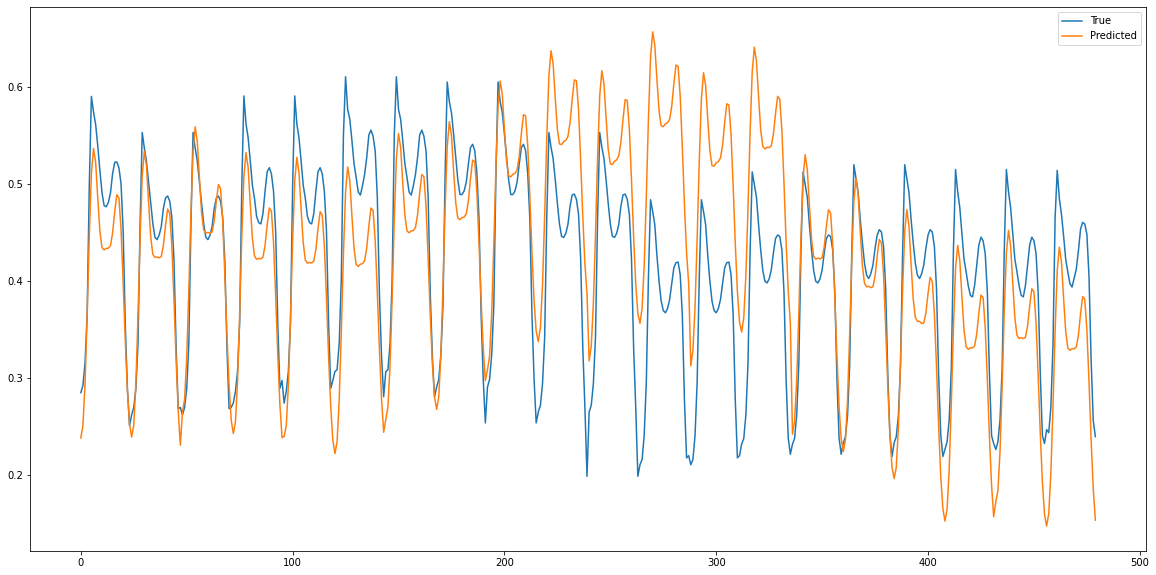

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(np.array(y_true[:10]).reshape(-1,1), label="True")
plt.plot(np.array(y_pred[:10]).reshape(-1,1), label="Predicted")
plt.legend()

plt.show()

In [161]:
mse_list

[0.0013514961601499913,
 0.0011938391506379348,
 0.00447759787745768,
 0.001635785387876145,
 0.0062273926396891255,
 0.02039313638543752,
 0.018917580240159913,
 0.00044387495638823345,
 0.003567649335011964,
 0.004941950441677265,
 0.00508956963643546,
 0.00440553096382687,
 0.0016708946747706545,
 0.0013985612973412794,
 0.001735582433025128,
 0.003909188014459681,
 0.003155101595552537,
 0.0015160495934371306,
 0.008898373308129865,
 0.016730455867093097,
 0.02434156804644218,
 0.022040664879227723,
 0.011311706623084283,
 0.0013914741693813373,
 0.007357594676366111,
 0.012444638550691953,
 0.01324655264715019,
 0.021594820889888375,
 0.008516643415398957,
 0.0004548980148466179,
 0.004403458088852375,
 0.0029390072202681527,
 0.0047874981836529456,
 0.015721197013614244,
 0.008373920094586106,
 0.001376546991576794,
 0.010552038905066485,
 0.014243650995715479,
 0.0162977118655832,
 0.01352720515121234,
 0.0013770631053823413,
 0.0012114375126738375,
 0.006784607949380052,
 0.006

Compute eval loss on 2013 (2day forecast horizon)

In [160]:
np.array(mse_list).mean()

0.007121082837901256

In [133]:
np.array(mse_list).mean()

148430195.422138

37823963.06527024

In [102]:
m.fit(X_list[2])

19:54:28 - cmdstanpy - INFO - Chain [1] start processing
19:54:28 - cmdstanpy - INFO - Chain [1] done processing


In [103]:
len(y_list[0])

48

In [104]:
future = m.make_future_dataframe(periods=len(y_list[2]), freq='H')
forecast = m.predict(future)

In [105]:
future

,ds
0,2008-01-03 00:00:00
1,2008-01-03 01:00:00
2,2008-01-03 02:00:00
3,2008-01-03 03:00:00
4,2008-01-03 04:00:00
...,...
763,2008-02-03 19:00:00
764,2008-02-03 20:00:00
765,2008-02-03 21:00:00
766,2008-02-03 22:00:00


In [106]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-03 00:00:00,156130.274846,109904.133642,127184.361829,156130.274846,156130.274846,-37840.240268,-37840.240268,-37840.240268,-44729.567847,-44729.567847,-44729.567847,6889.327579,6889.327579,6889.327579,0.0,0.0,0.0,118290.034578
1,2008-01-03 01:00:00,155802.989052,112328.122858,129805.226562,155802.989052,155802.989052,-34609.399464,-34609.399464,-34609.399464,-41542.429695,-41542.429695,-41542.429695,6933.030231,6933.030231,6933.030231,0.0,0.0,0.0,121193.589587
2,2008-01-03 02:00:00,155475.703257,123360.345156,139737.938561,155475.703257,155475.703257,-23417.132491,-23417.132491,-23417.132491,-30386.790268,-30386.790268,-30386.790268,6969.657776,6969.657776,6969.657776,0.0,0.0,0.0,132058.570766
3,2008-01-03 03:00:00,155148.417463,141886.215136,158713.853815,155148.417463,155148.417463,-5099.589350,-5099.589350,-5099.589350,-12099.218099,-12099.218099,-12099.218099,6999.628748,6999.628748,6999.628748,0.0,0.0,0.0,150048.828113
4,2008-01-03 04:00:00,154821.131669,162546.584566,178820.816573,154821.131669,154821.131669,15836.747235,15836.747235,15836.747235,8813.427100,8813.427100,8813.427100,7023.320135,7023.320135,7023.320135,0.0,0.0,0.0,170657.878904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2008-02-03 19:00:00,113945.604382,109713.571183,128706.117169,110108.158723,118410.768884,4838.310551,4838.310551,4838.310551,10742.087012,10742.087012,10742.087012,-5903.776461,-5903.776461,-5903.776461,0.0,0.0,0.0,118783.914934
764,2008-02-03 20:00:00,114007.633886,95201.785255,115432.498085,109948.168416,118620.413333,-9144.893344,-9144.893344,-9144.893344,-3289.284195,-3289.284195,-3289.284195,-5855.609150,-5855.609150,-5855.609150,0.0,0.0,0.0,104862.740542
765,2008-02-03 21:00:00,114069.663390,79973.579108,99314.795732,109819.908700,118815.007977,-24709.935648,-24709.935648,-24709.935648,-18900.981697,-18900.981697,-18900.981697,-5808.953952,-5808.953952,-5808.953952,0.0,0.0,0.0,89359.727741
766,2008-02-03 22:00:00,114131.692893,67691.508436,86362.365982,109741.876899,119056.086741,-37999.198557,-37999.198557,-37999.198557,-32235.134038,-32235.134038,-32235.134038,-5764.064519,-5764.064519,-5764.064519,0.0,0.0,0.0,76132.494336


In [107]:
len(list(y_list[2]['y']))

48

In [108]:
len(list(forecast.iloc[-48:,-1] ))

48

In [109]:
from sklearn.metrics import r2_score
print(r2_score(list(y_list[2]['y']), list(forecast.iloc[-48:,-1] )))

0.5406122481651944


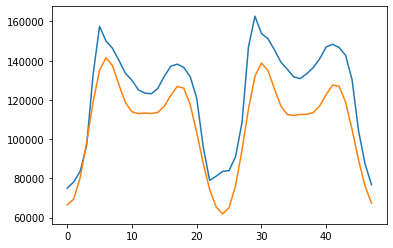

In [110]:
import matplotlib.pyplot as plt
plt.plot(list(y_list[2]['y']))
plt.plot(list(forecast.iloc[-48:,-1]))
plt.show()

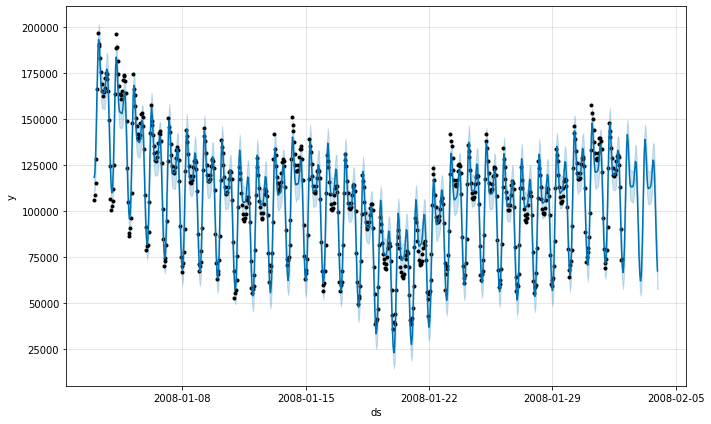

In [111]:
fig1 = m.plot(forecast)
plt.show()

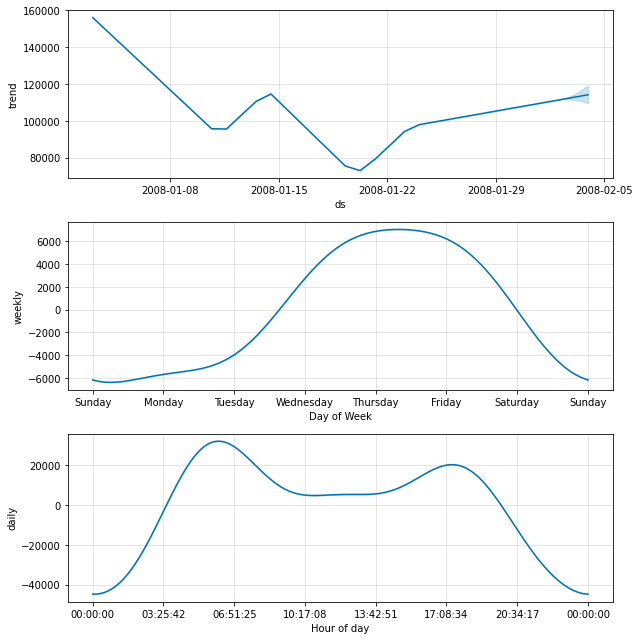

In [112]:
fig2 = m.plot_components(forecast)
plt.show()

19:35:27 - cmdstanpy - INFO - Chain [1] start processing
19:35:27 - cmdstanpy - INFO - Chain [1] done processing


0.8833342266998259


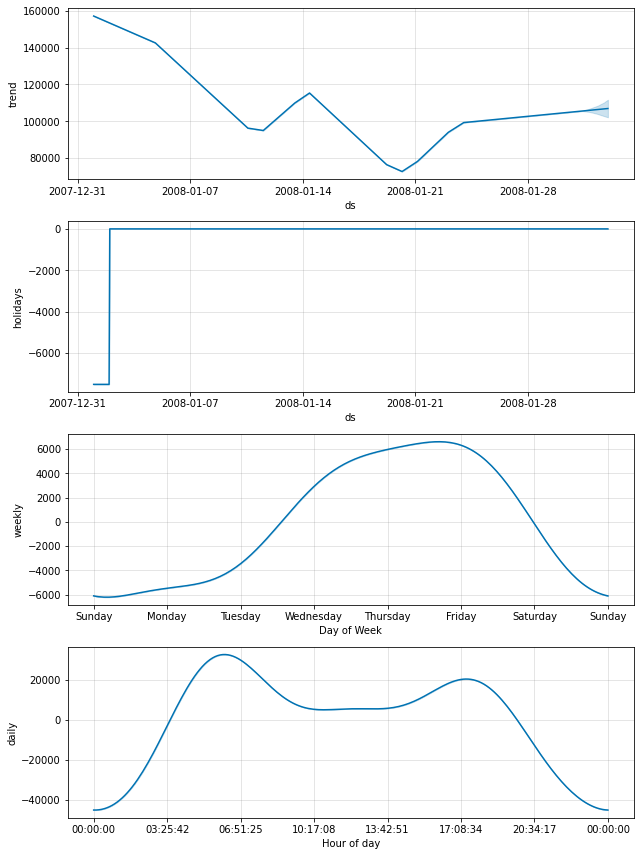

In [88]:
m3 = Prophet()
m3.add_country_holidays(country_name='DE')
m3.fit(X_list[0])
future3 = m3.make_future_dataframe(periods=len(y_list[0]))
forecast3 = m3.predict(future)

print(r2_score(list(y_list[0]['y']), list(forecast3.iloc[-48:,-1] )))

fig2 = m3.plot_components(forecast3)
plt.show()